In [37]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
# import cvxpy as cvx
import os

from util import *
# from data_loader import * 
# from module_deconv import *
# from module_exp import *
from sc_deconv import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scanpy.api as sc
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import pairwise_distances

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy 0.4.2 on 2018-02-02 15:28.


In [3]:
import seaborn as sns

[ 2.4   2.15  1.2  -0.7  -5.  ]


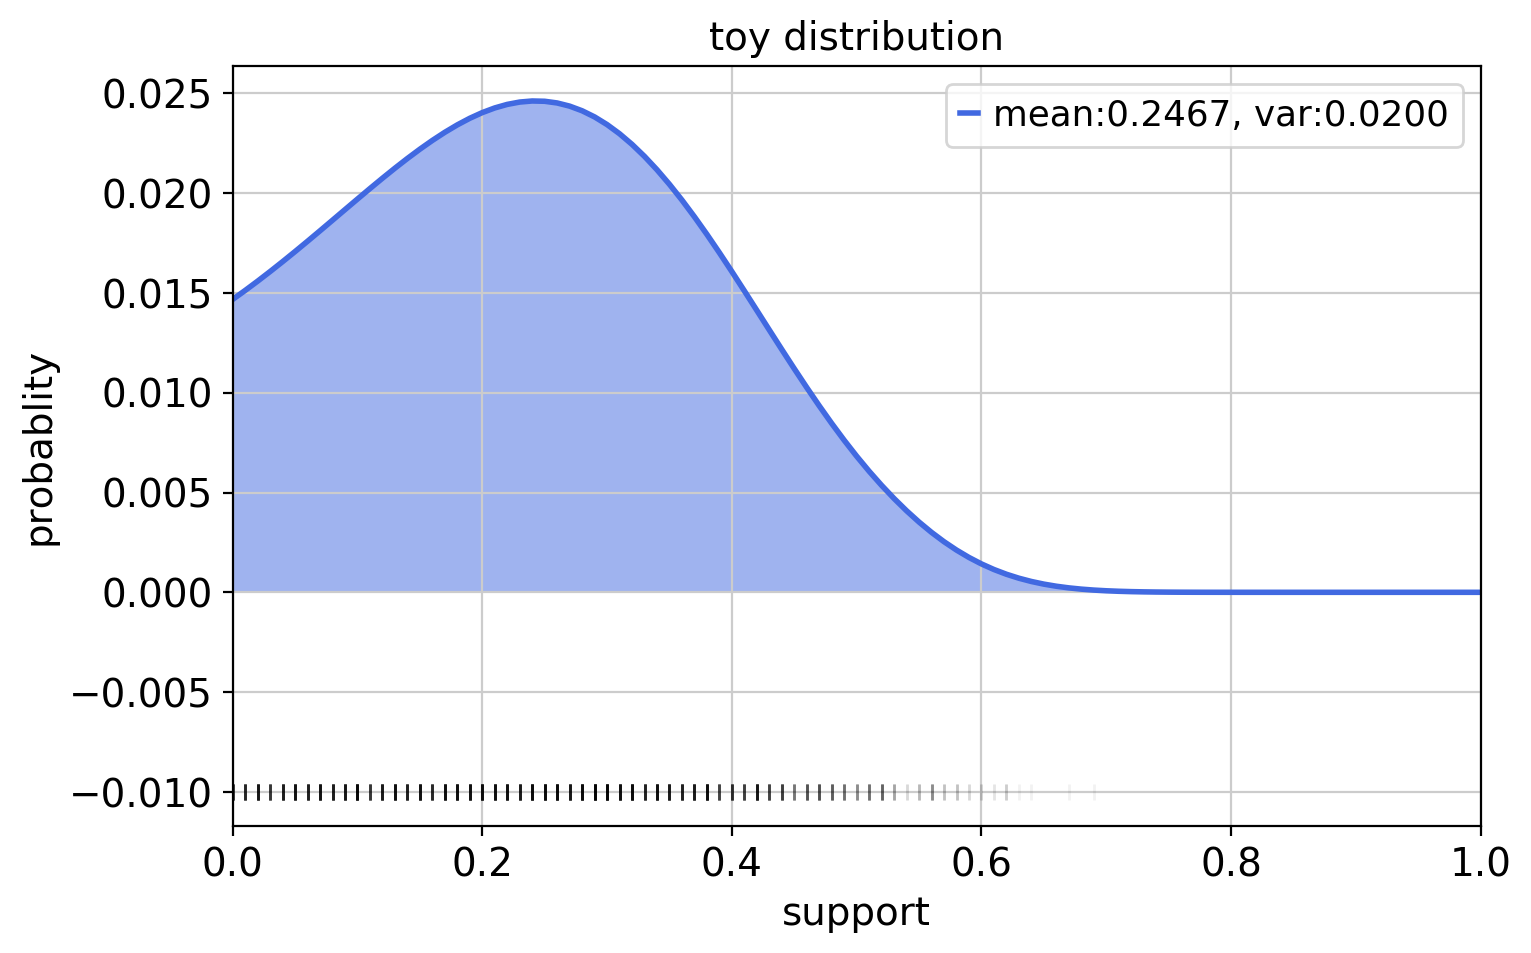

In [4]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1,opt='1d_Q')

In [5]:
## generate the simulated read count data
N_c=8000
N_r=38
X,Y,data_info=data_gen_1d(p_hat,dd_info['x'],N_c,N_r,noise='poi',vis=1)

NameError: name 'p_hat' is not defined

### distribution estimation

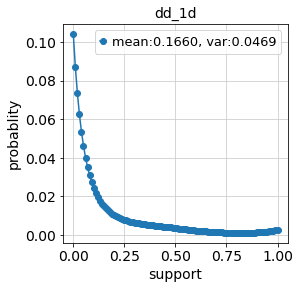

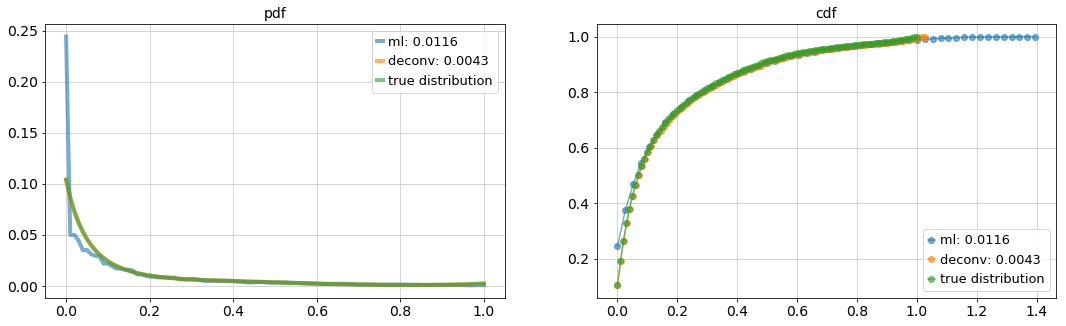

In [87]:
## distribution estimation
# input: Y  
# summary function: Y --> Y_pdf, Y_supp
# specify the scale of x and N_r 

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
p_hat_ml,ml_info=ml_1d(Y)
_=plot_result_1d(p_hat,p_hat,p_hat_ml,dd_info,ml_info,data_info)

## 8k PBMC @ 100K rpc

In [6]:
filename_data = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
filename_genes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/genes.tsv'
filename_barcodes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [7]:
%%time
adata = sc.read(filename_data, cache=True).transpose()
adata.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
adata.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
sc.logging.print_memory_usage()

... writing an h5 cache file to speedup reading next time
Memory usage: current 0.24 GB, difference +0.24 GB
CPU times: user 51.9 s, sys: 607 ms, total: 52.5 s
Wall time: 52.7 s


CST3
Average counts per cell = 7.001789762558167


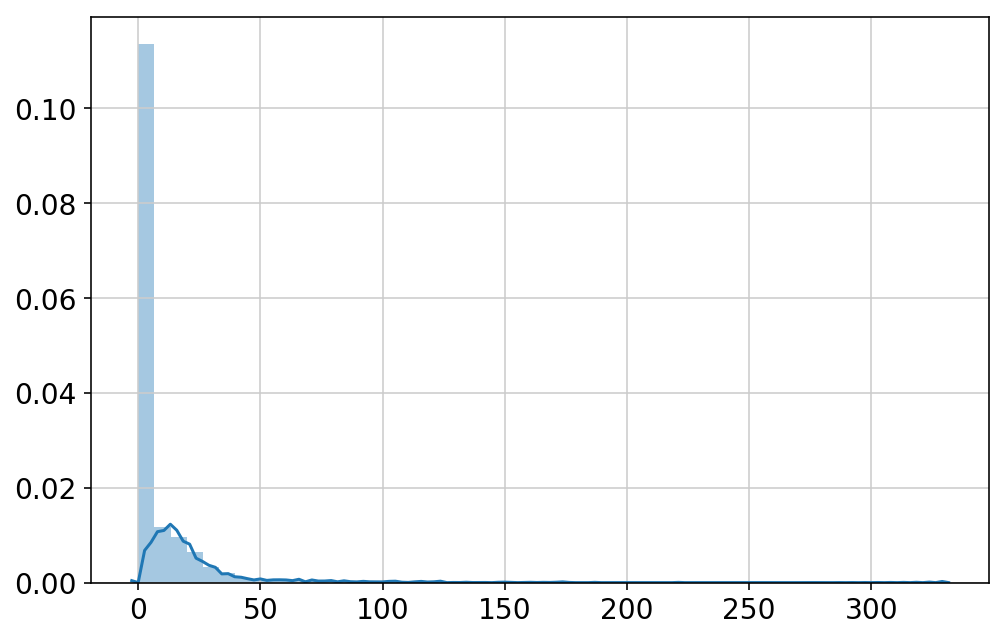

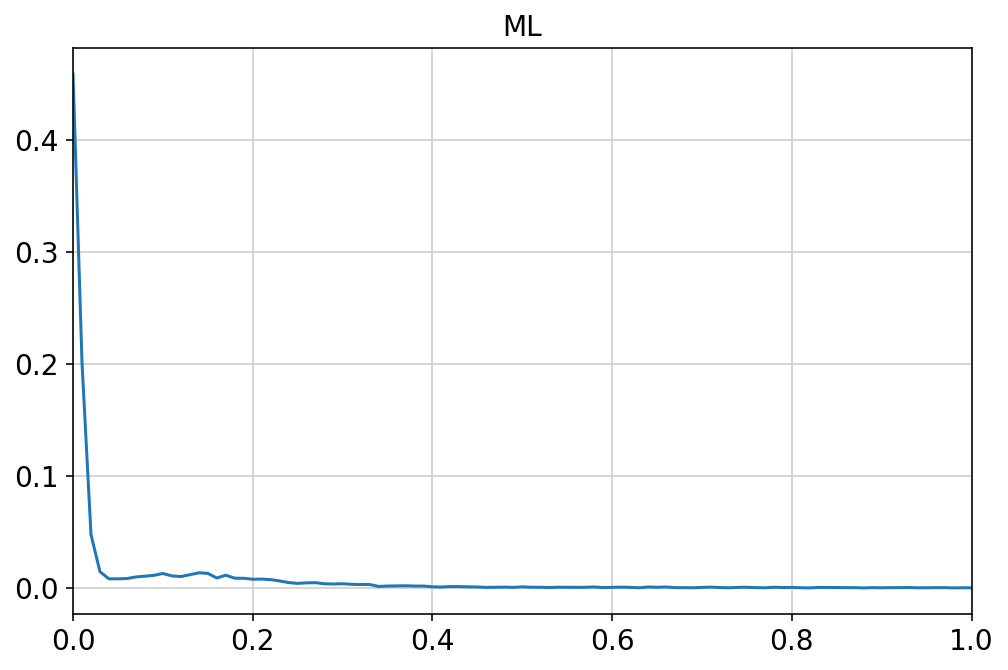

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


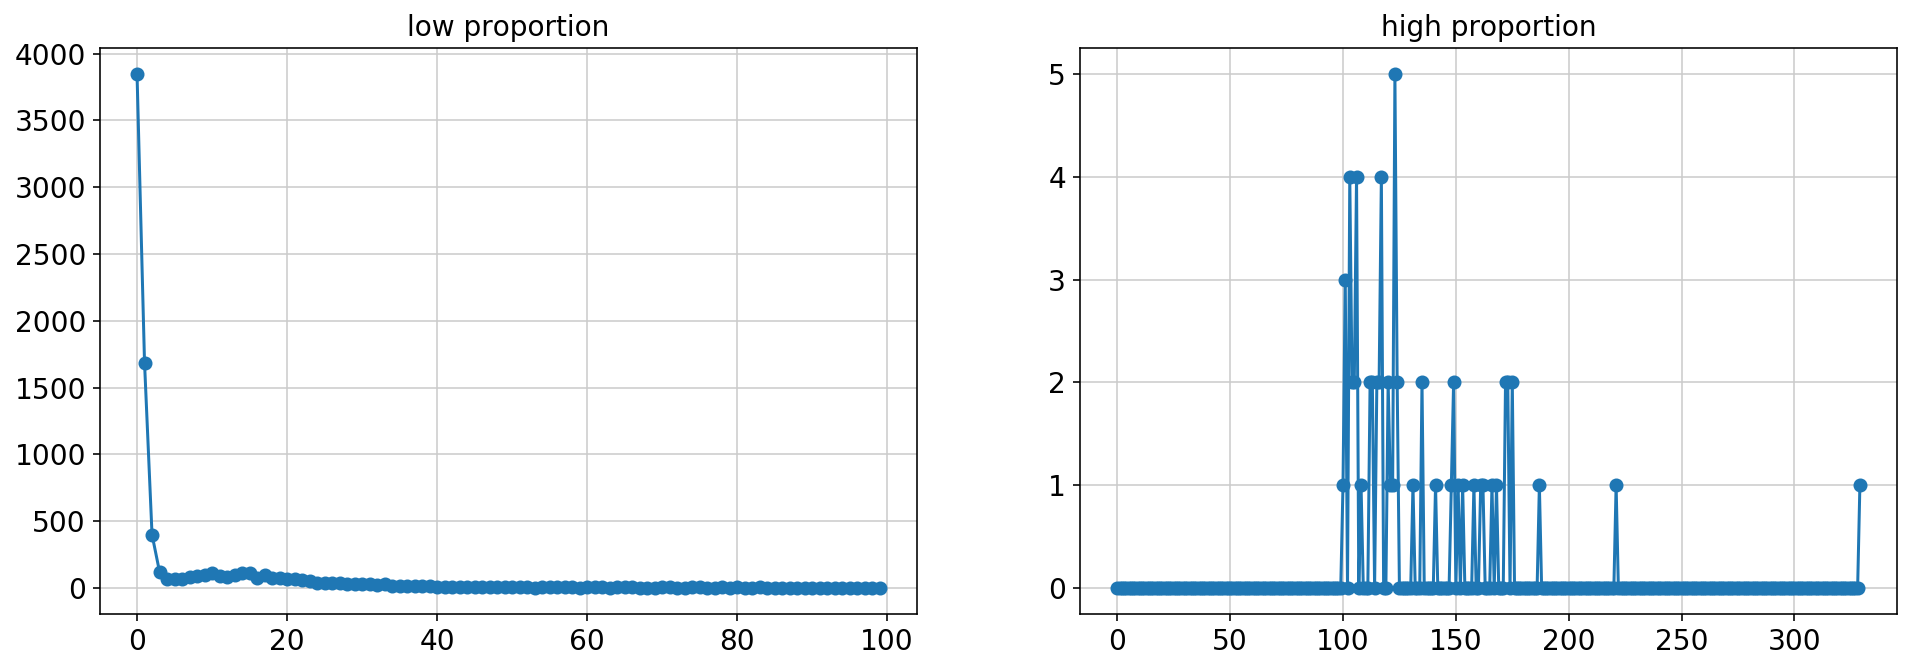

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.727438768727723
-13.361024493896423
8.647671902117793
-0.6724184800077637
-1.3418065565318216
Close-form gradients
[  6.72744183 -13.36101378   8.64768151  -0.67240635  -1.34180322]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.4555497898039667, reg:0.005347625380124079
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  8.76400075   9.32087886   5.63329599  -6.47088727 -17.24730821]
gamma:100


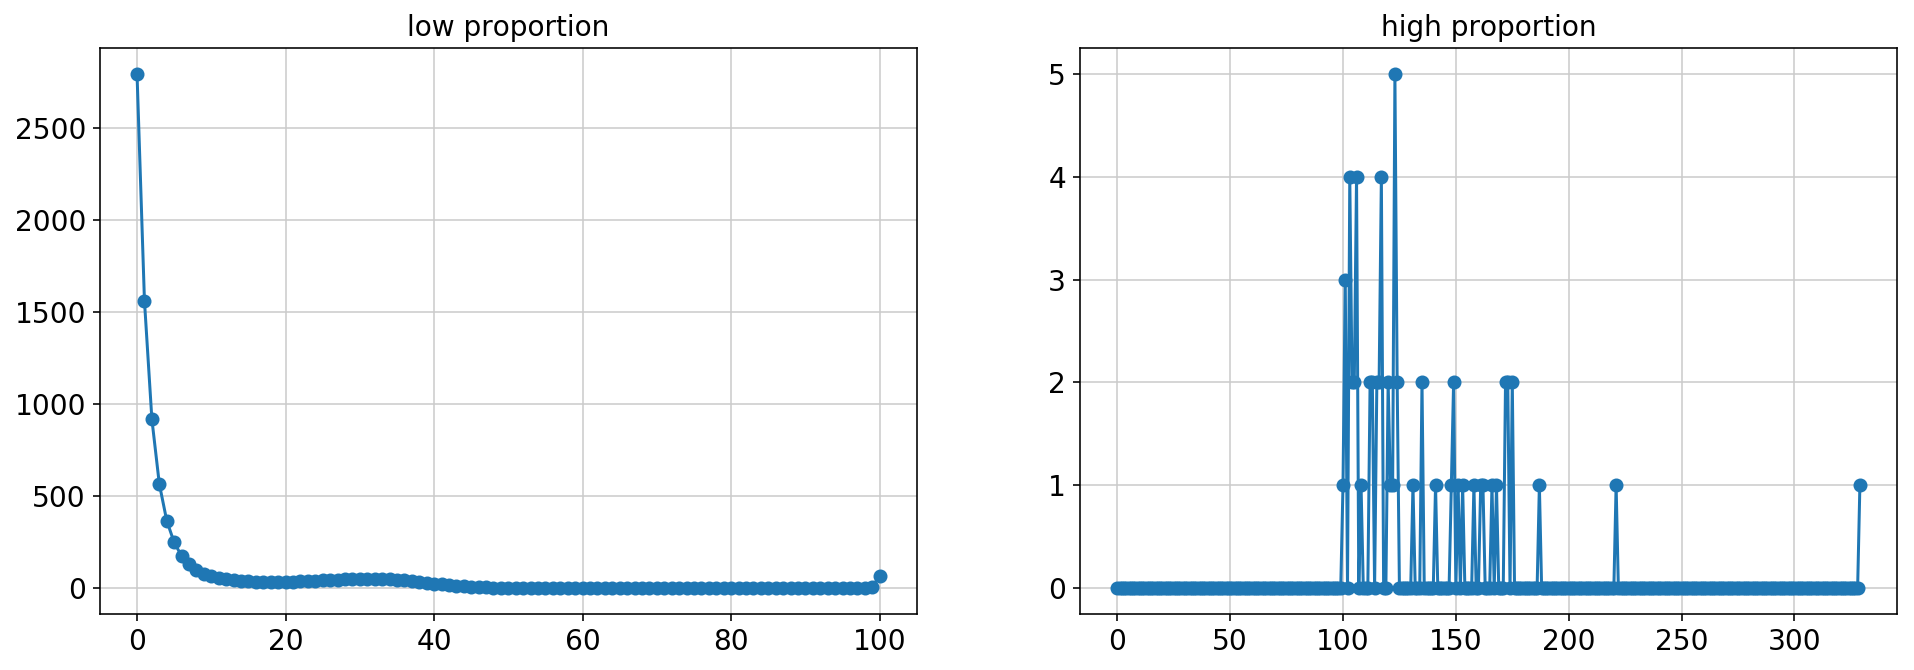

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:329.0


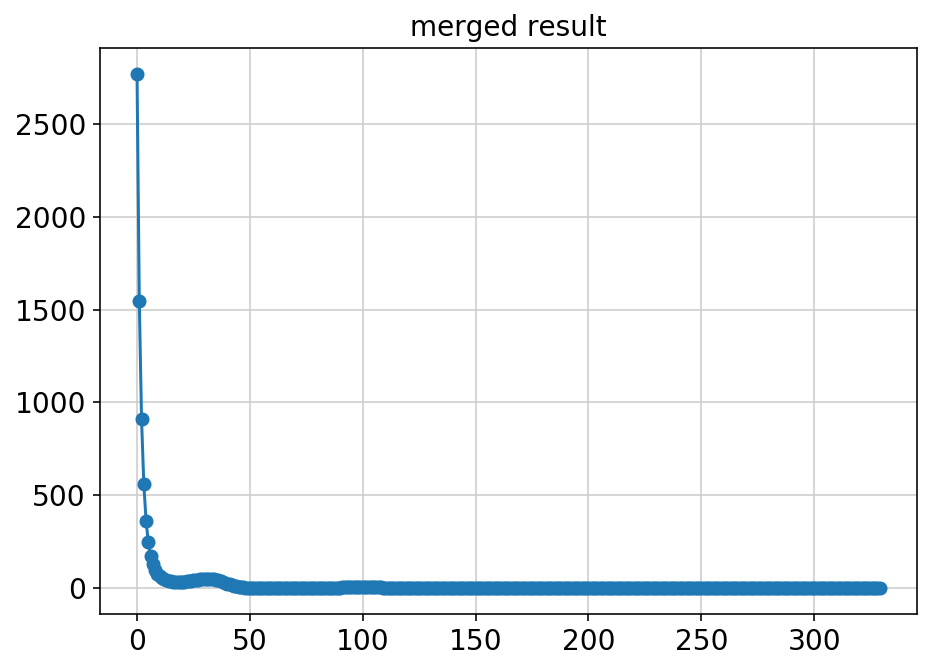

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 13.73%
>0.1: 6.034%
>0.15: 1.613%
>0.2: 1.602%
>0.25: 1.599%
>0.3: 1.101%
>0.35: 0.500%
>0.4: 0.291%


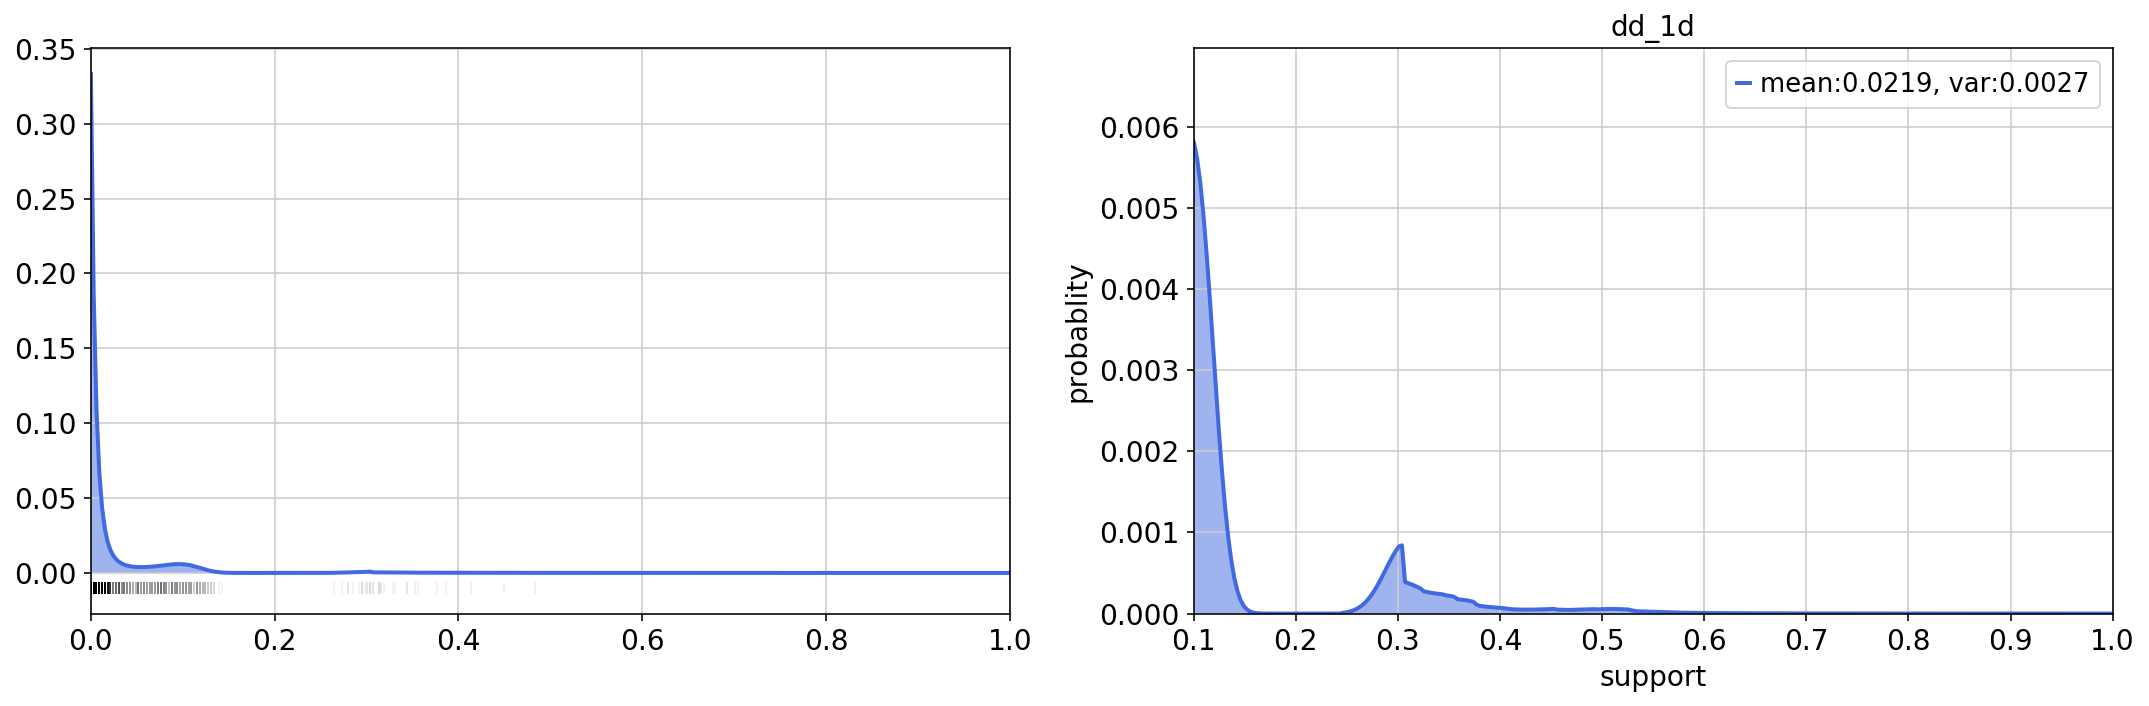

estimated gamma: 329.0


In [125]:
gene='CST3'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.xlim([0,1])
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

FTL
Average counts per cell = 27.60064431452094


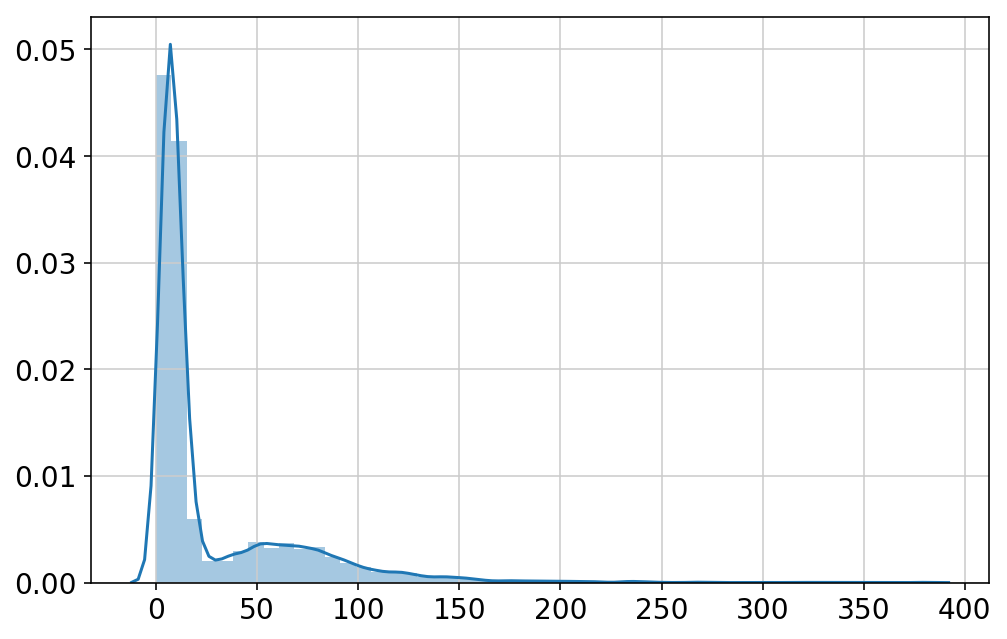

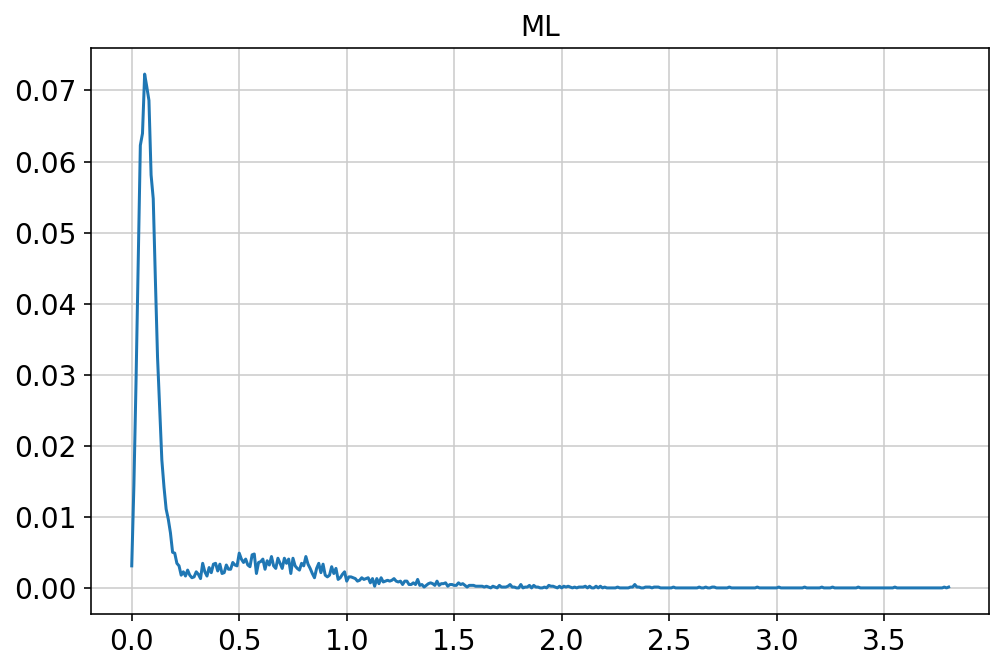

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


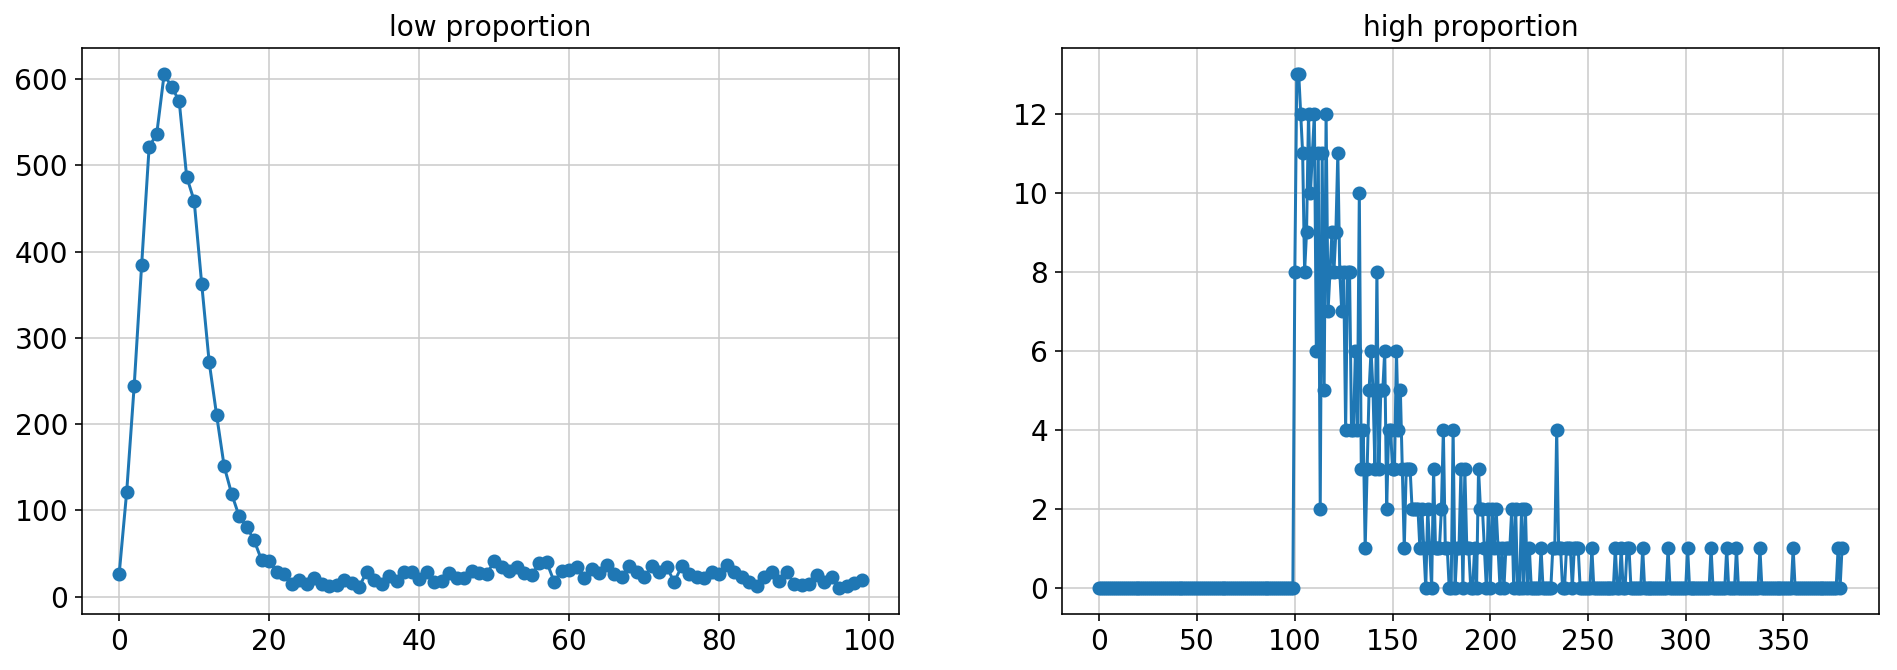

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
3.356890028172188
-6.020673867901394
3.2312169064852014
0.4639422428454054
-1.0315103393665481
Close-form gradients
[ 3.35689285 -6.02066434  3.23122533  0.46395336 -1.03150722]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:3.8889112118400706, reg:0.0001361054044067426
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 0.85687686 -1.50798917 -2.22205468  0.55988234  2.31328249]
gamma:100


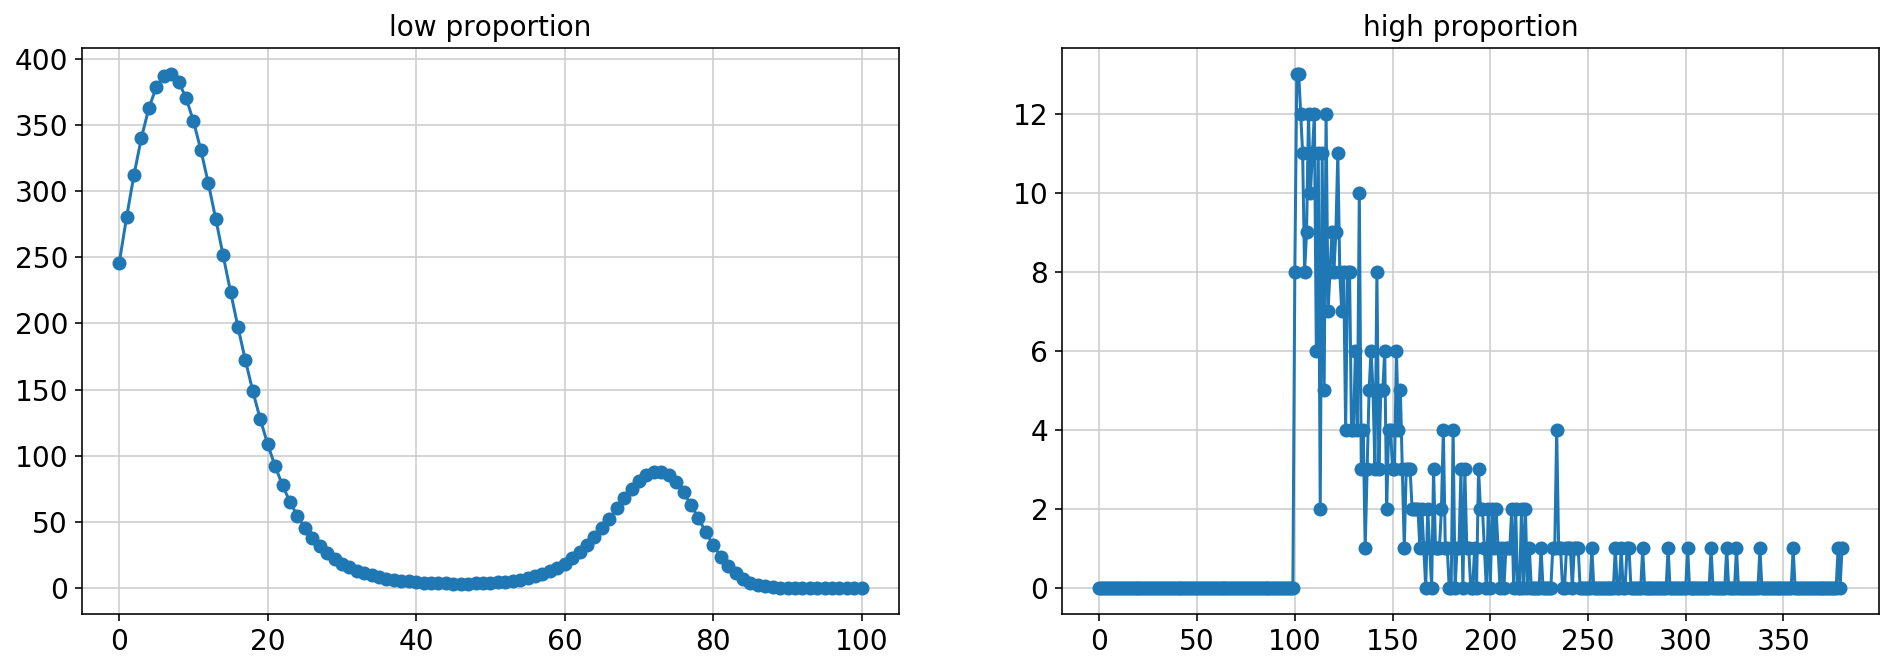

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:380.0


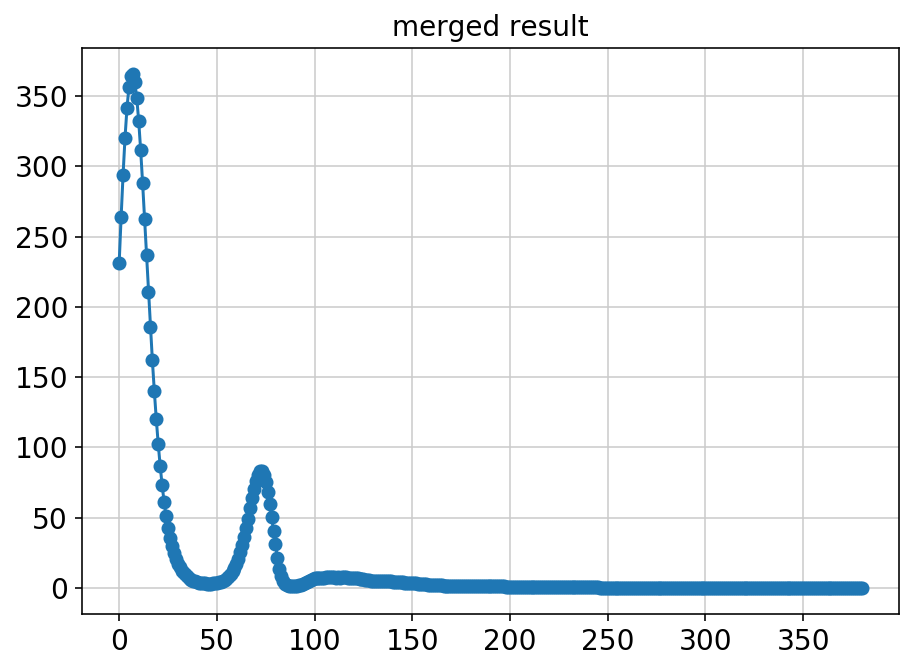

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 30.33%
>0.1: 22.51%
>0.15: 21.41%
>0.2: 8.917%
>0.25: 5.723%
>0.3: 4.057%
>0.35: 2.546%
>0.4: 1.555%


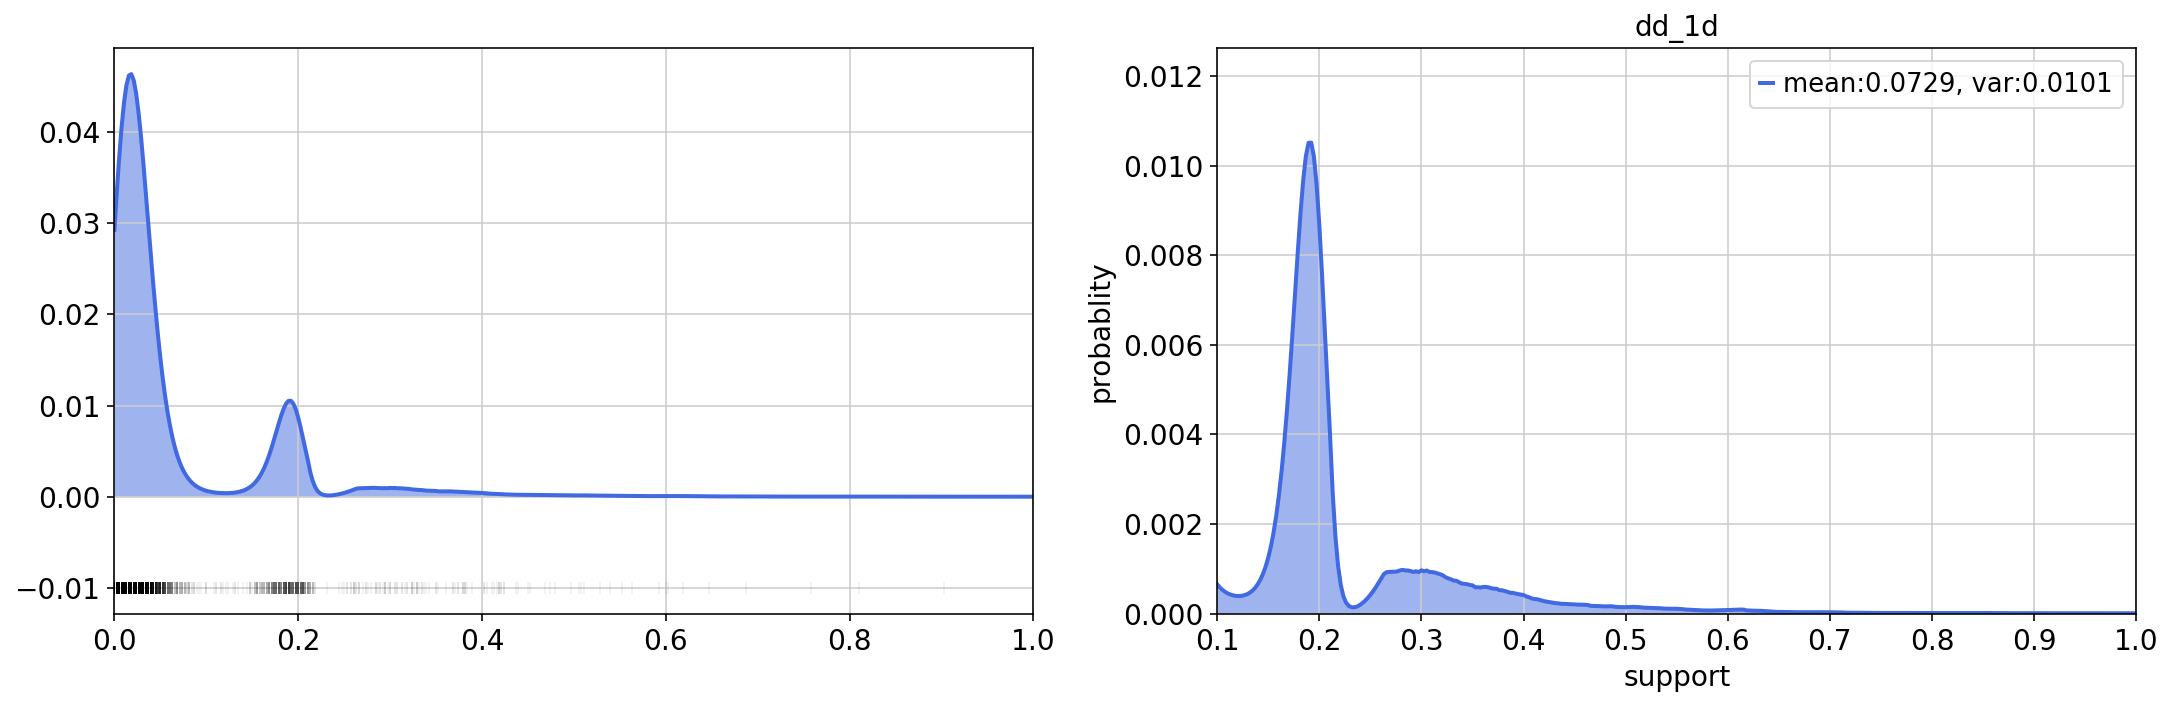

estimated gamma: 380.0


In [126]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

# plt.figure(figsize=[8,5])
# X=np.random.choice(dd_info['x'], 2000, p=p_hat)
# plt.plot(dd_info['x'],p_hat,marker='.',lw=2,markersize=0,color="royalblue")
# # plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
# # plt.xlim([0,1])
# # plt.ylim([0,1.05*np.max(p)])
# plt.plot(X, [-0.01]*len(X), '|', color='k',alpha=0.05)
# plt.show()

In [106]:
genes=["S100A9","S100A8","S100A4","LGALS2","FCN1","CD14","GZMB","IGFBP7","CD79A","CD3E","LYZ","MS4A1",
       "GNLY","FGFBP2","FCER1G","LDHB","IL7R","LST1","PF4","NKG7","CST3","CCR7"]

S100A9
Average counts per cell = 16.659587161436583


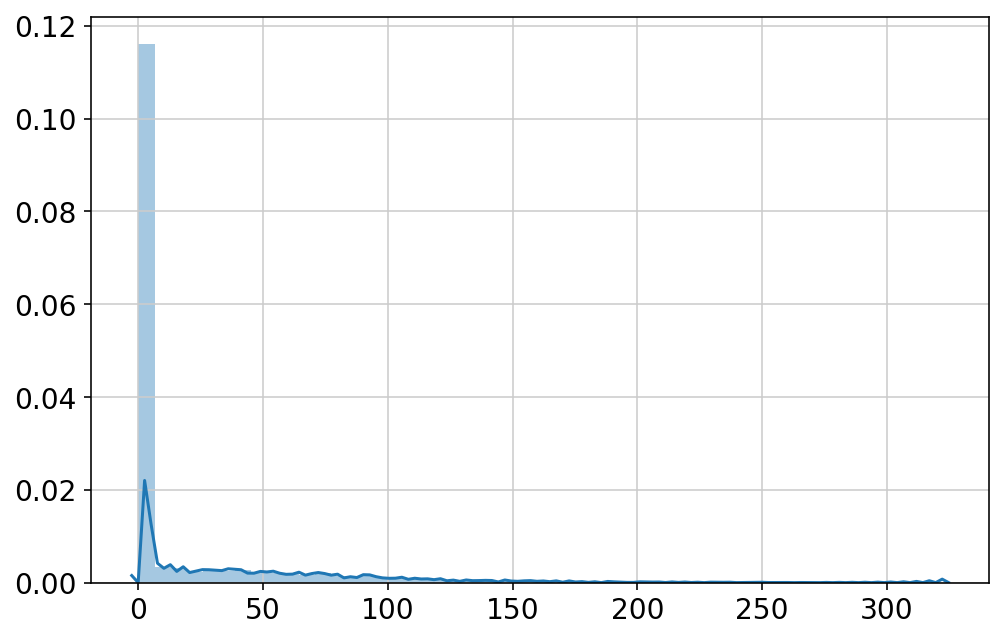

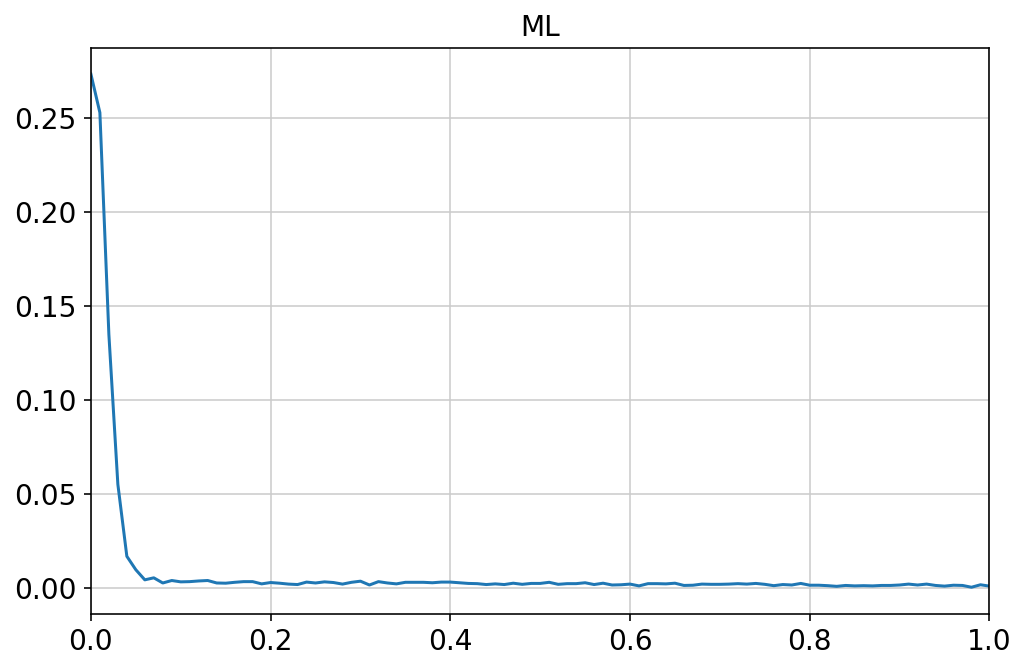

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


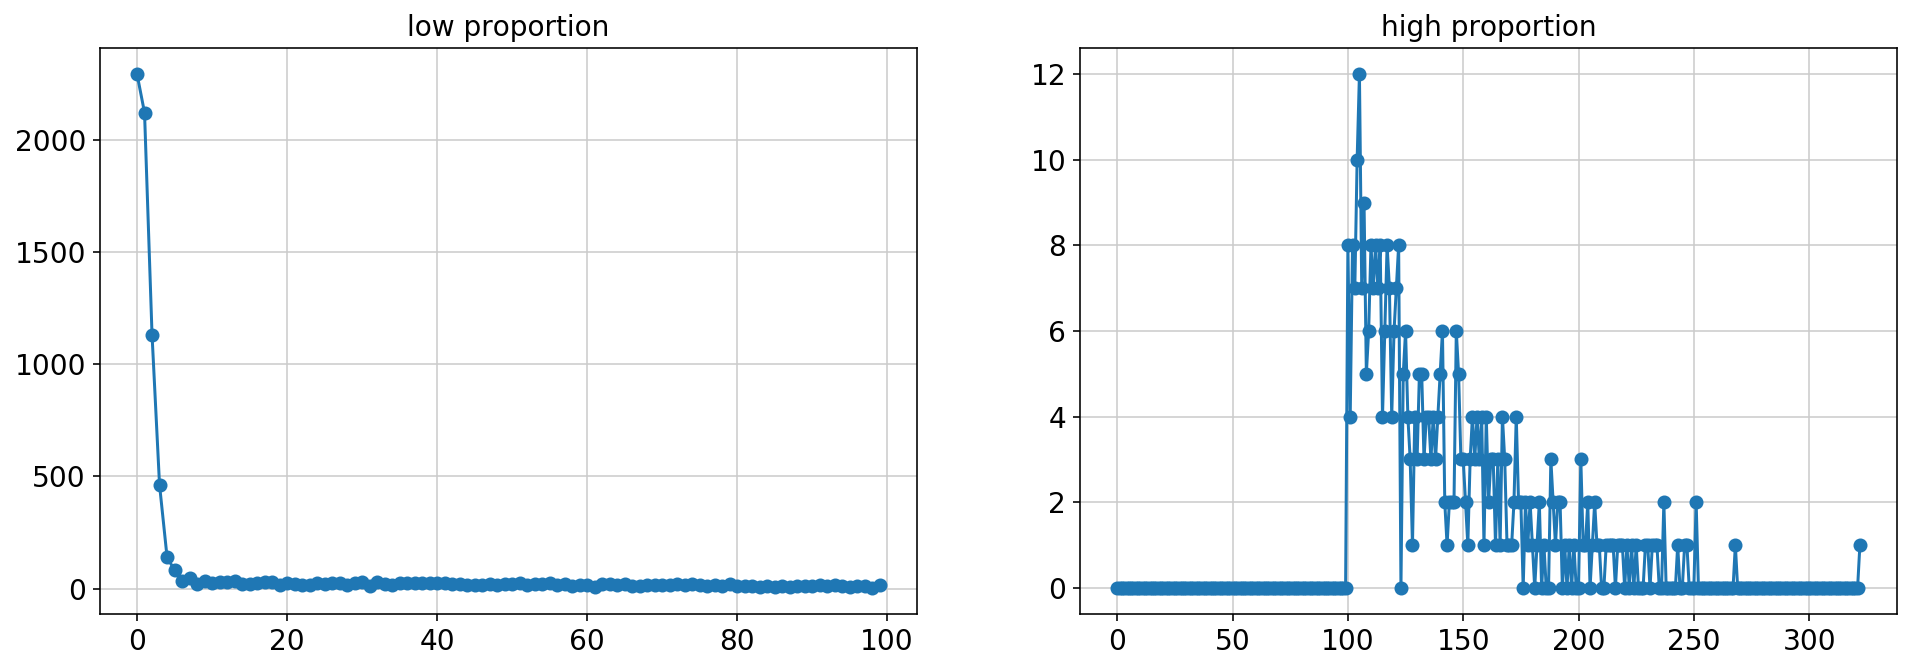

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.297455693804466
-12.63193802802931
8.268233533392788
-0.7546506575195622
-1.1792385352649148
Close-form gradients
[  6.29745877 -12.6319273    8.26824285  -0.75463903  -1.17923531]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.7681015121739696, reg:1.895120124568836e-05
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [-0.79107408 -0.0160886   0.9030324   0.42587842 -0.52175007]
gamma:100


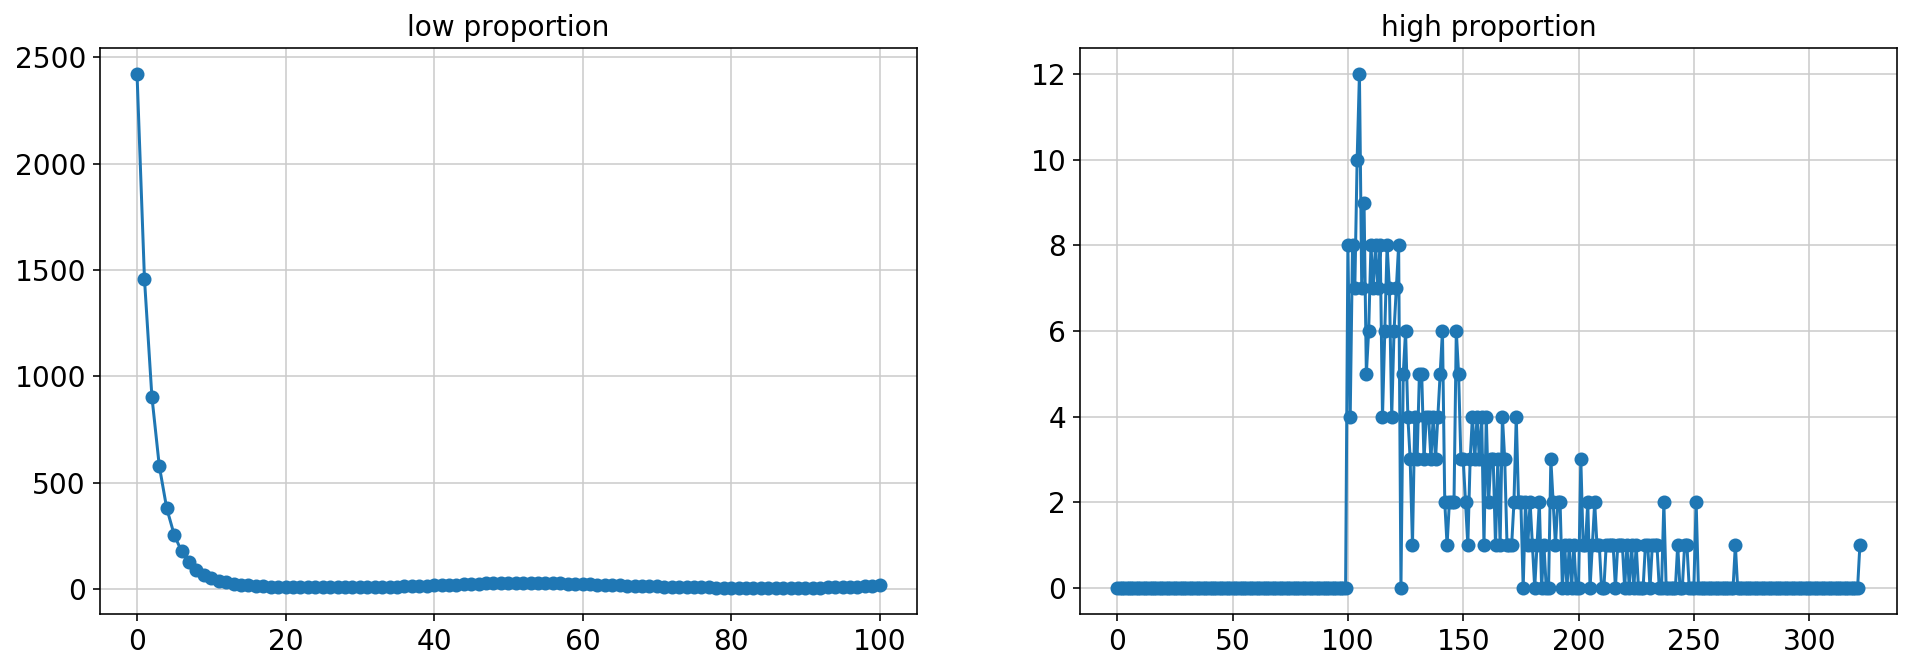

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:322.0


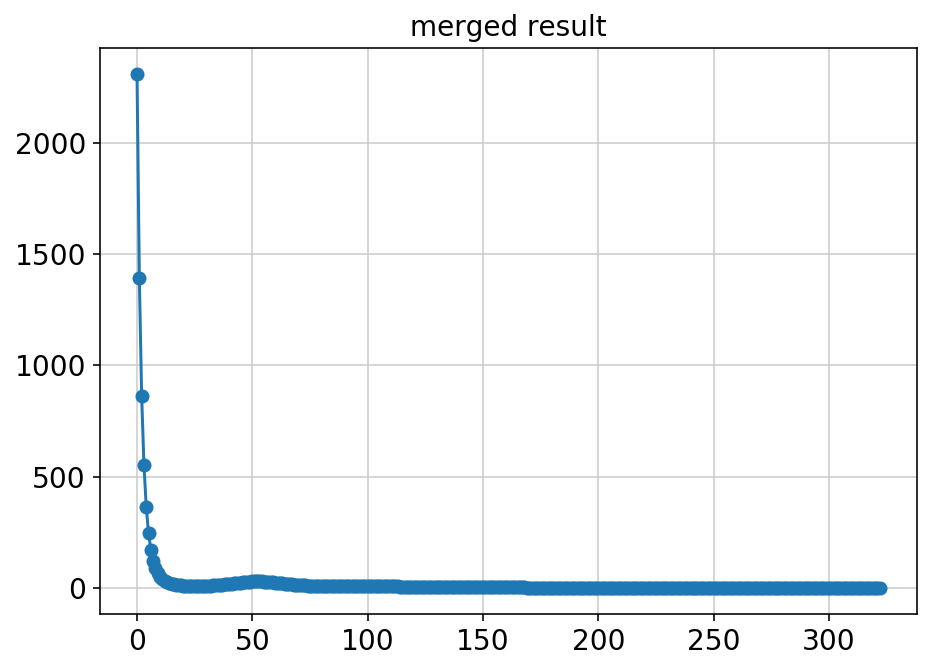

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 20.26%
>0.1: 18.23%
>0.15: 14.46%
>0.2: 9.243%
>0.25: 6.792%
>0.3: 5.066%
>0.35: 3.446%
>0.4: 2.422%


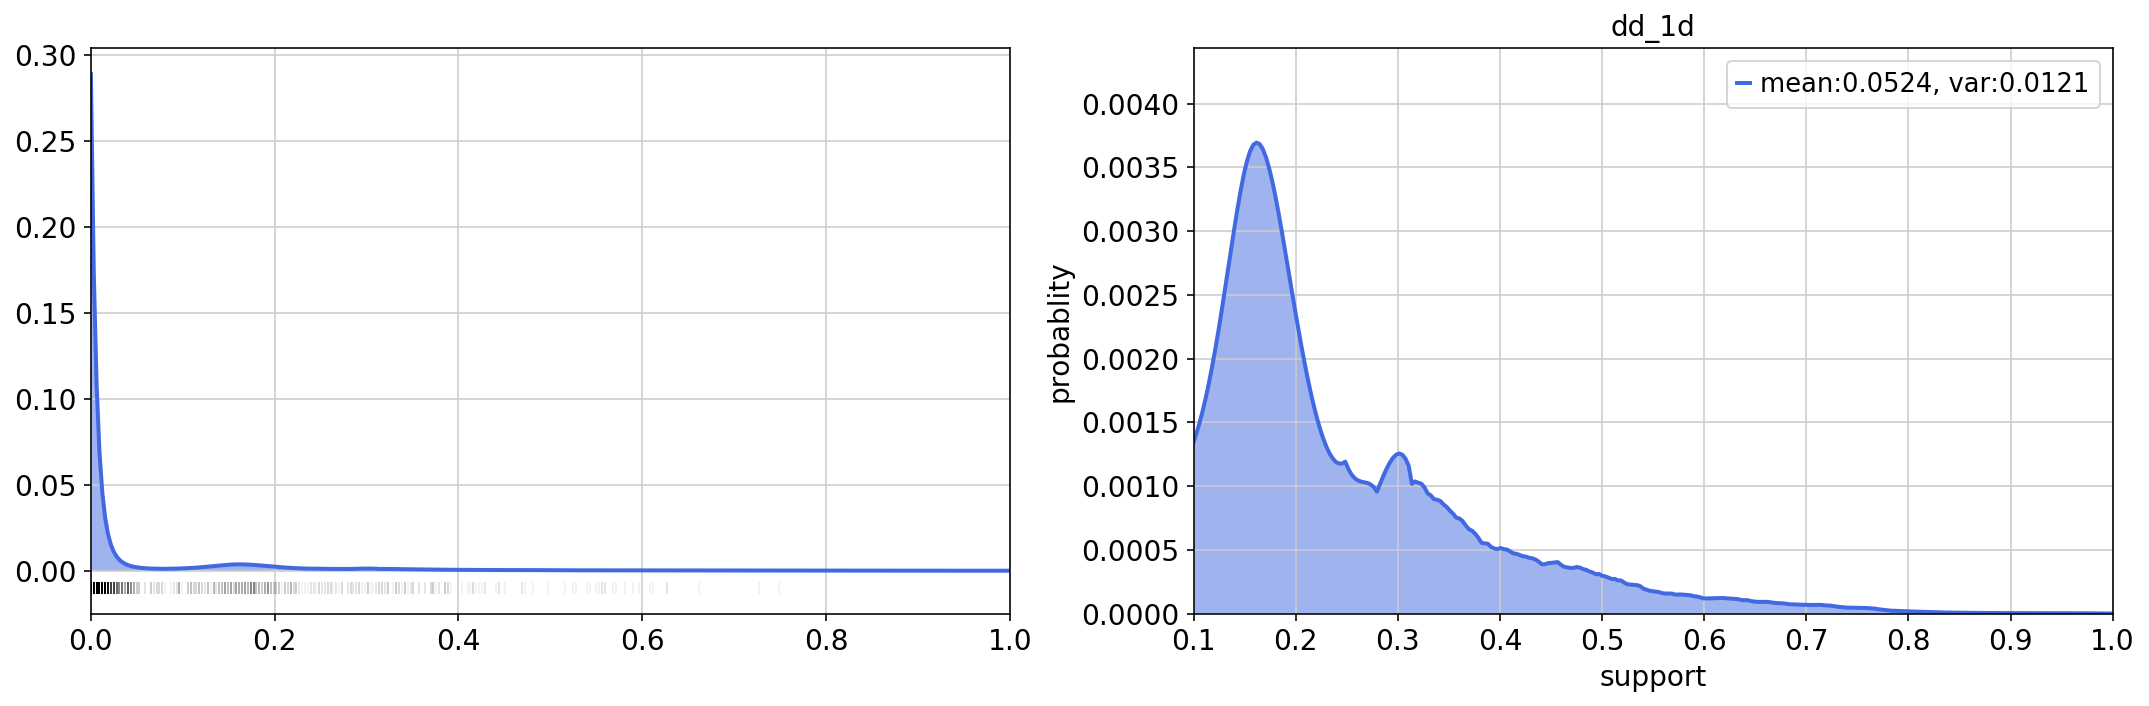

gamma: 322.0
-------------------------------------------------------------------------
S100A8
Average counts per cell = 13.68273475718888


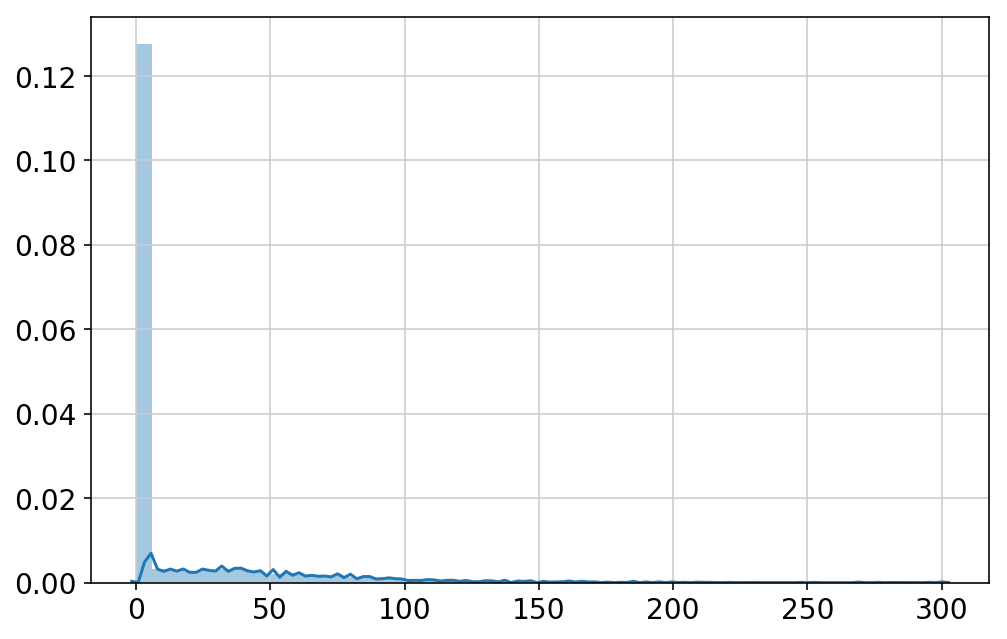

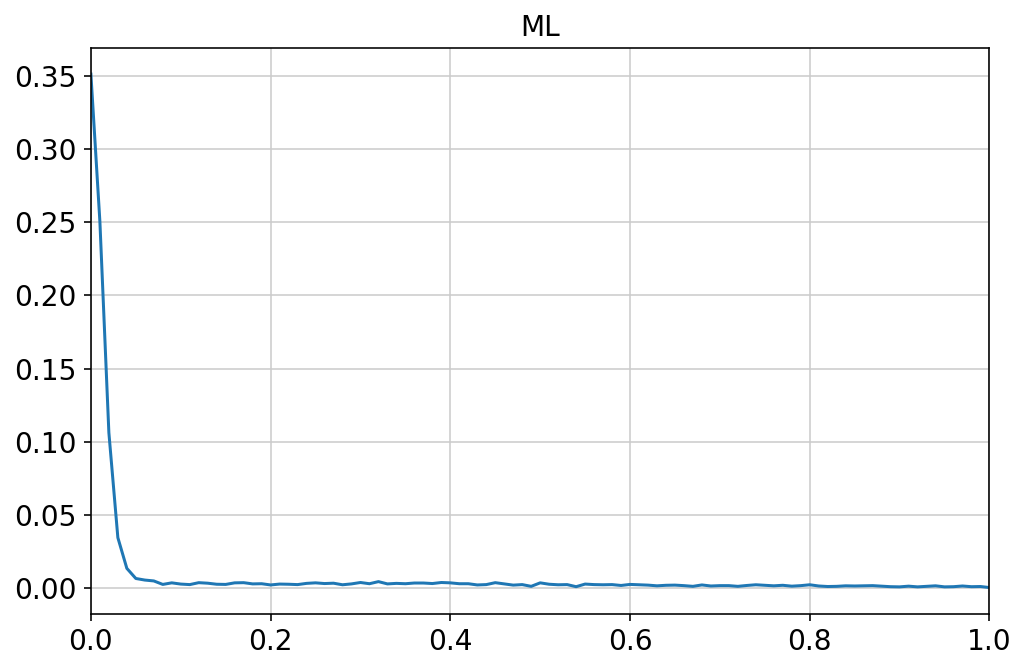

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


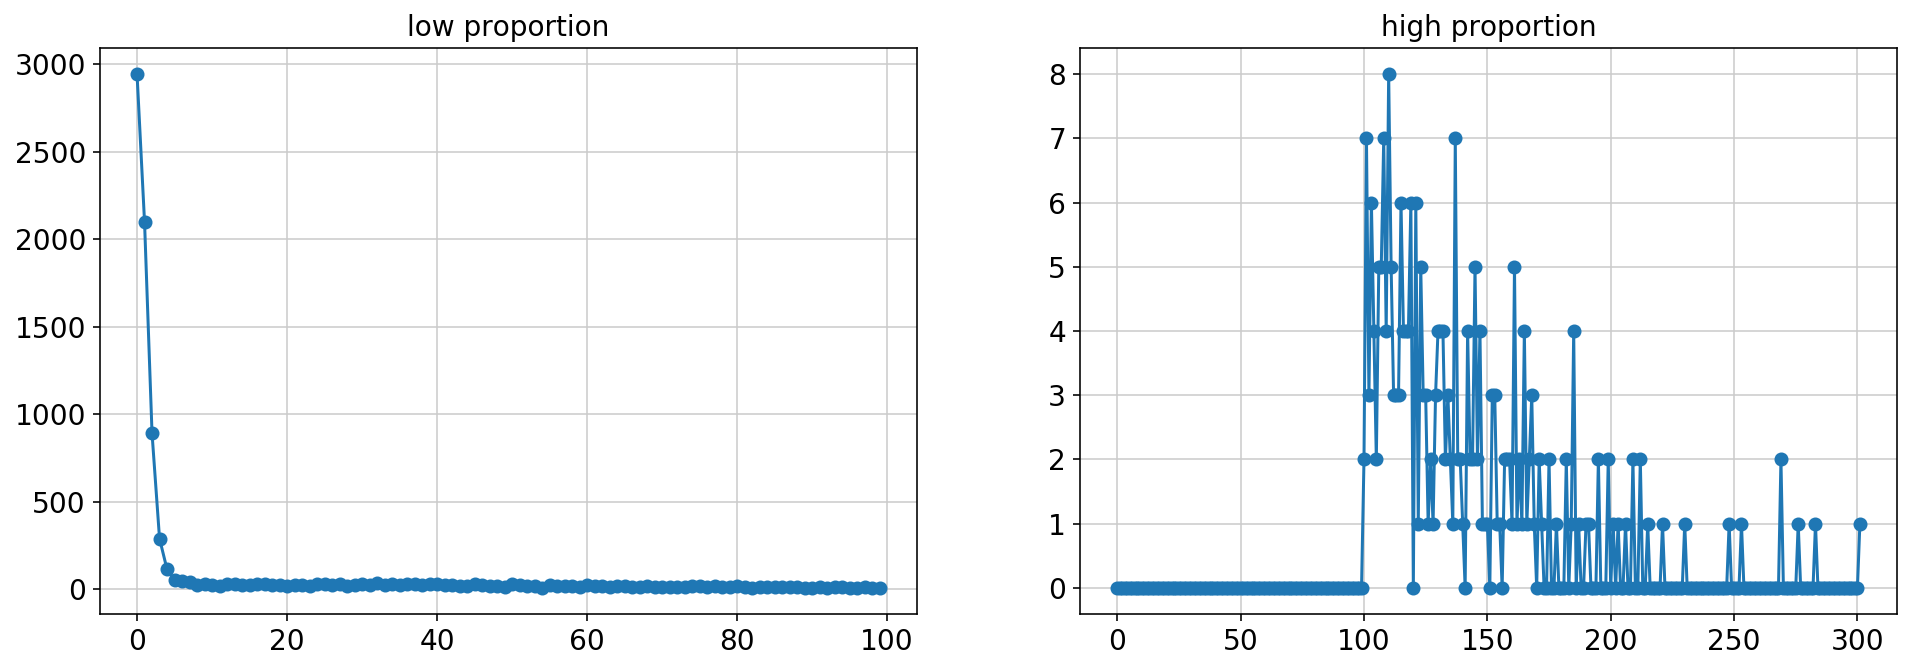

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.4674379078866195
-13.00707918439059
8.53825744151493
-0.7850906245110423
-1.2136639391258086
Close-form gradients
[  6.467441   -13.00706833   8.5382669   -0.78507889  -1.21366069]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.6160382544136676, reg:3.699389077858707e-05
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [-0.88937374  0.22182096  1.28362716  0.40670793 -1.02278486]
gamma:100


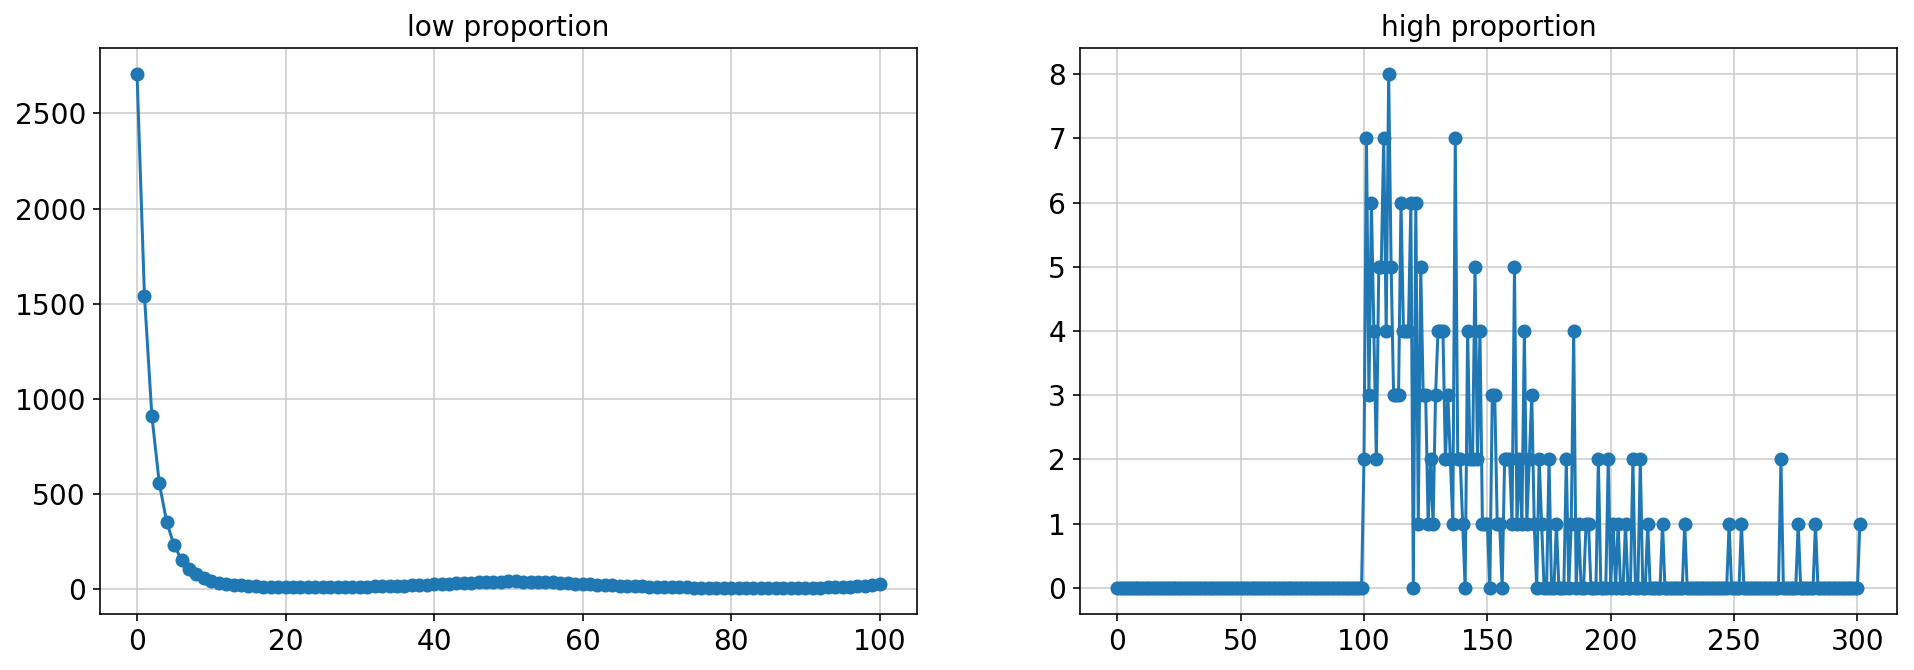

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:301.0


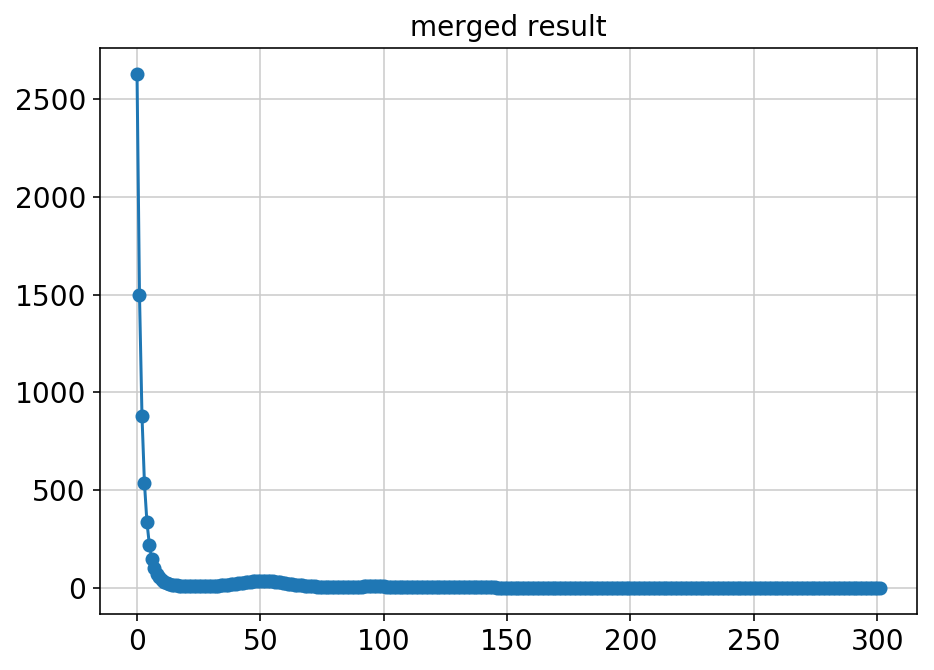

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 18.53%
>0.1: 16.89%
>0.15: 13.37%
>0.2: 7.360%
>0.25: 5.093%
>0.3: 4.061%
>0.35: 2.682%
>0.4: 1.844%


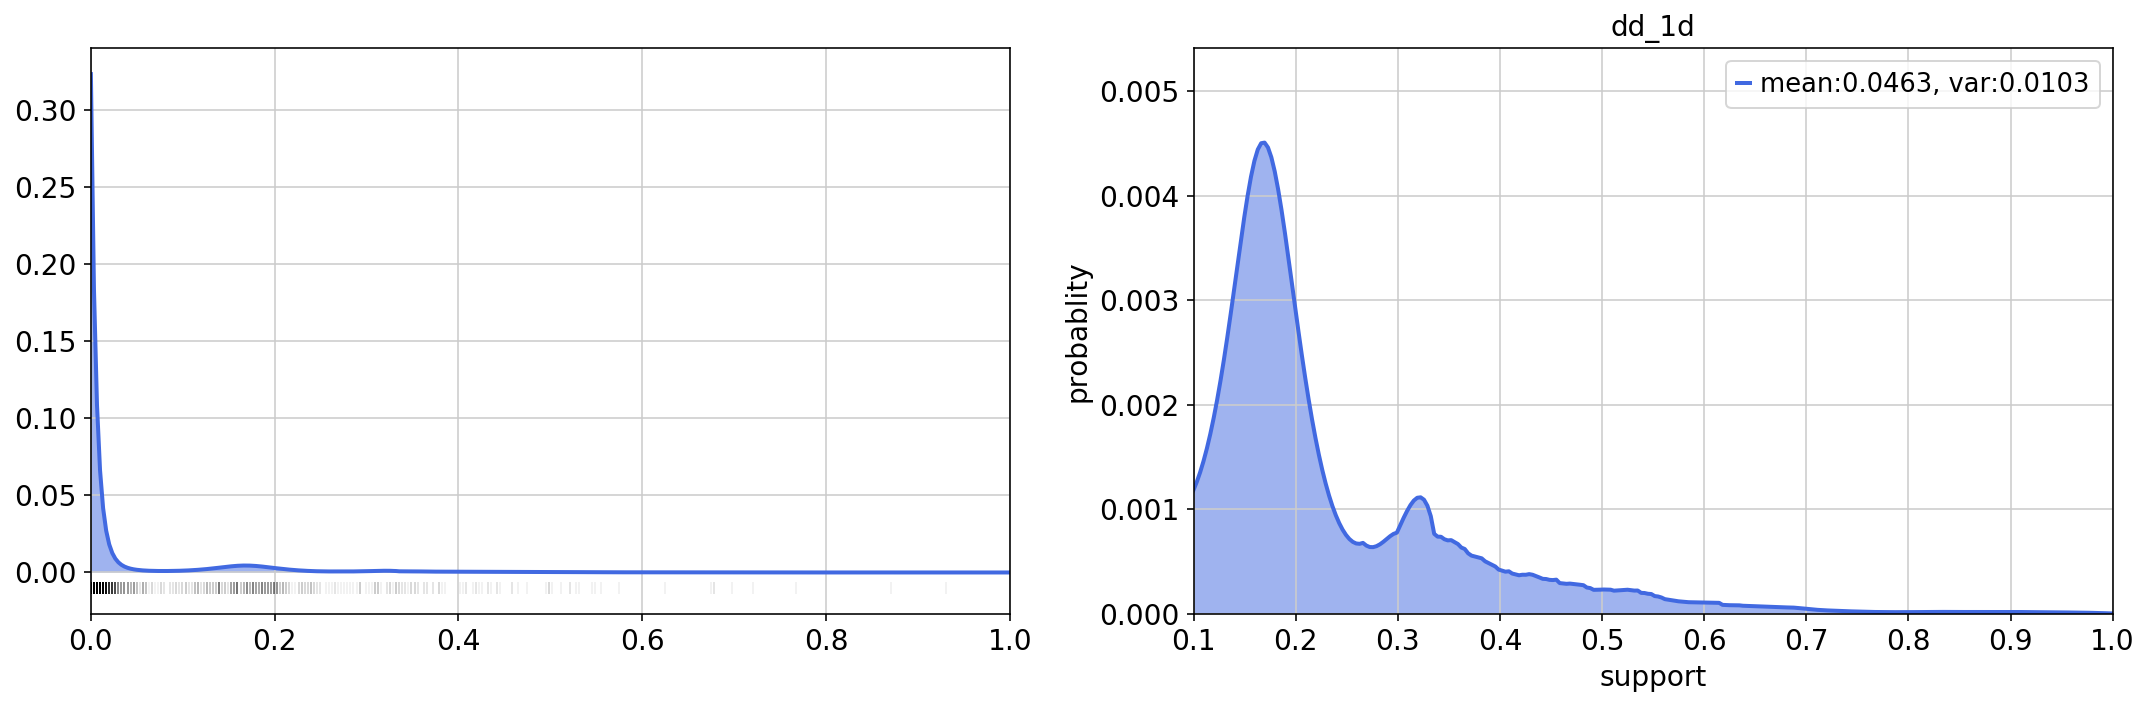

gamma: 301.0
-------------------------------------------------------------------------
S100A4
Average counts per cell = 10.855745137811716


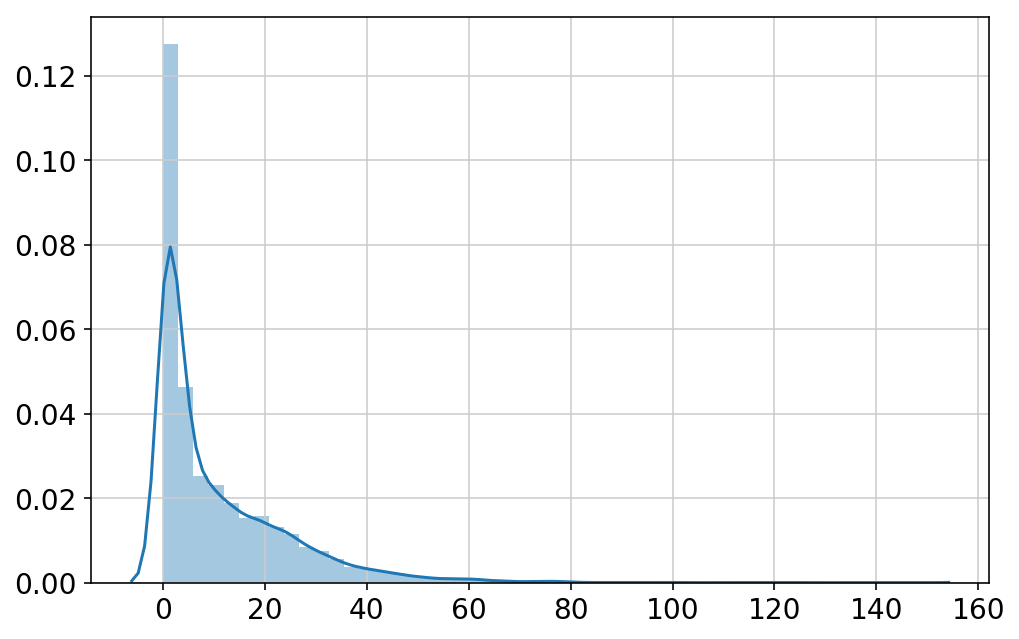

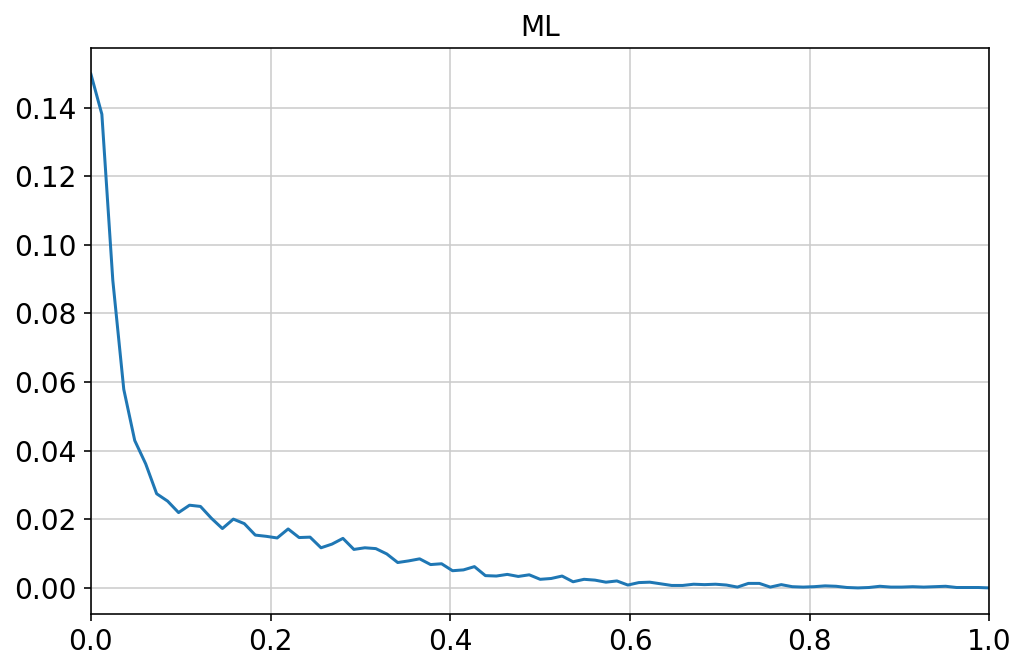

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 82

### debug: proportion separation ### start ###


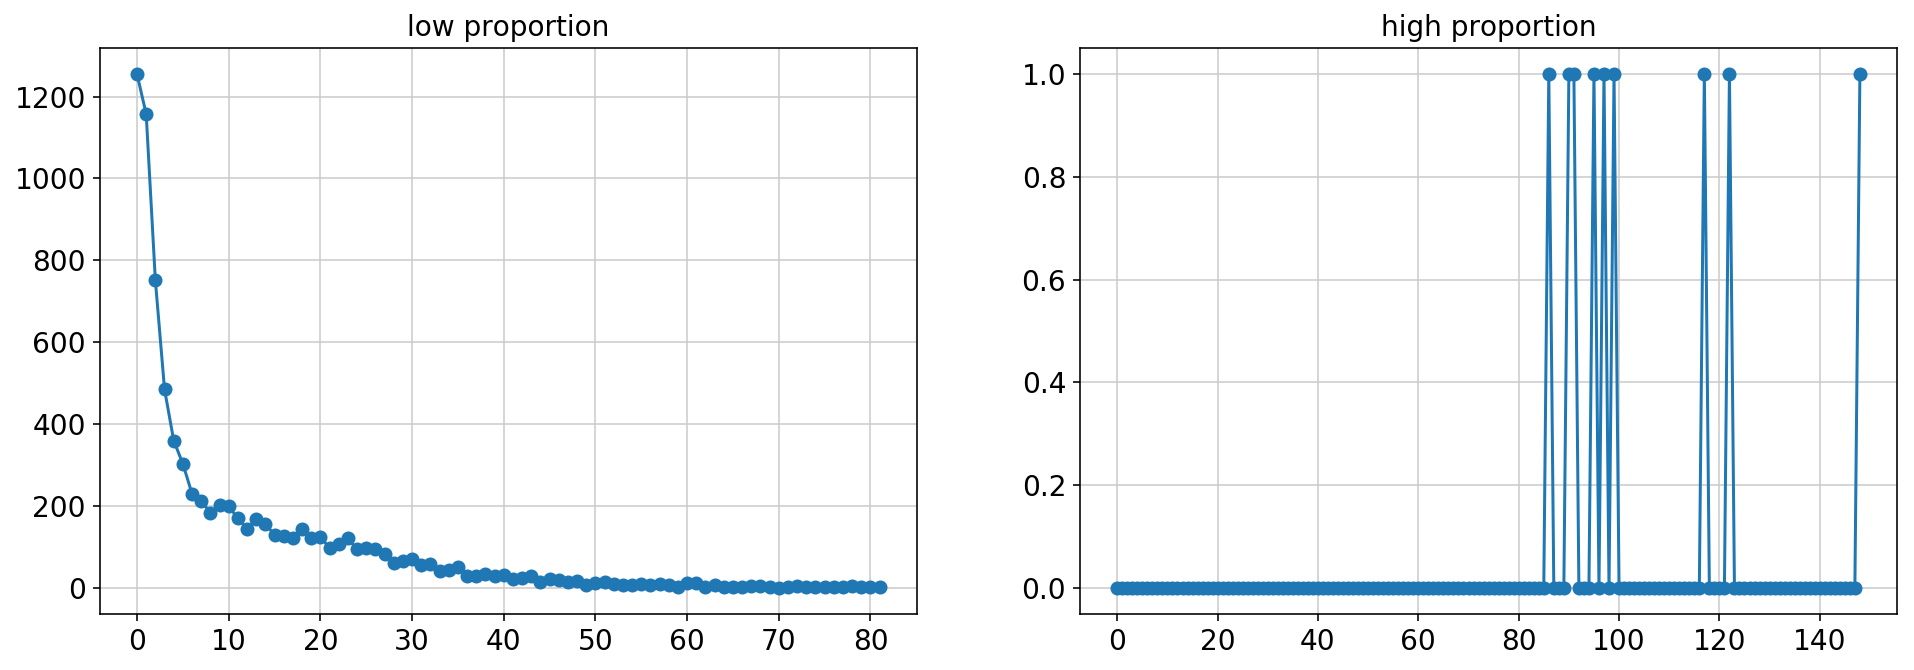

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
4.371739285247145
-8.126817831133337
4.664804360565711
0.4218329383576247
-1.3316958593634354
Close-form gradients
[ 4.37174214 -8.12680804  4.66481344  0.42184499 -1.33169254]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:3.3651371674380703, reg:0.00011538719904859938
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 1.48744999  1.25898685  0.69619916 -0.90566073 -2.53697653]
gamma:82


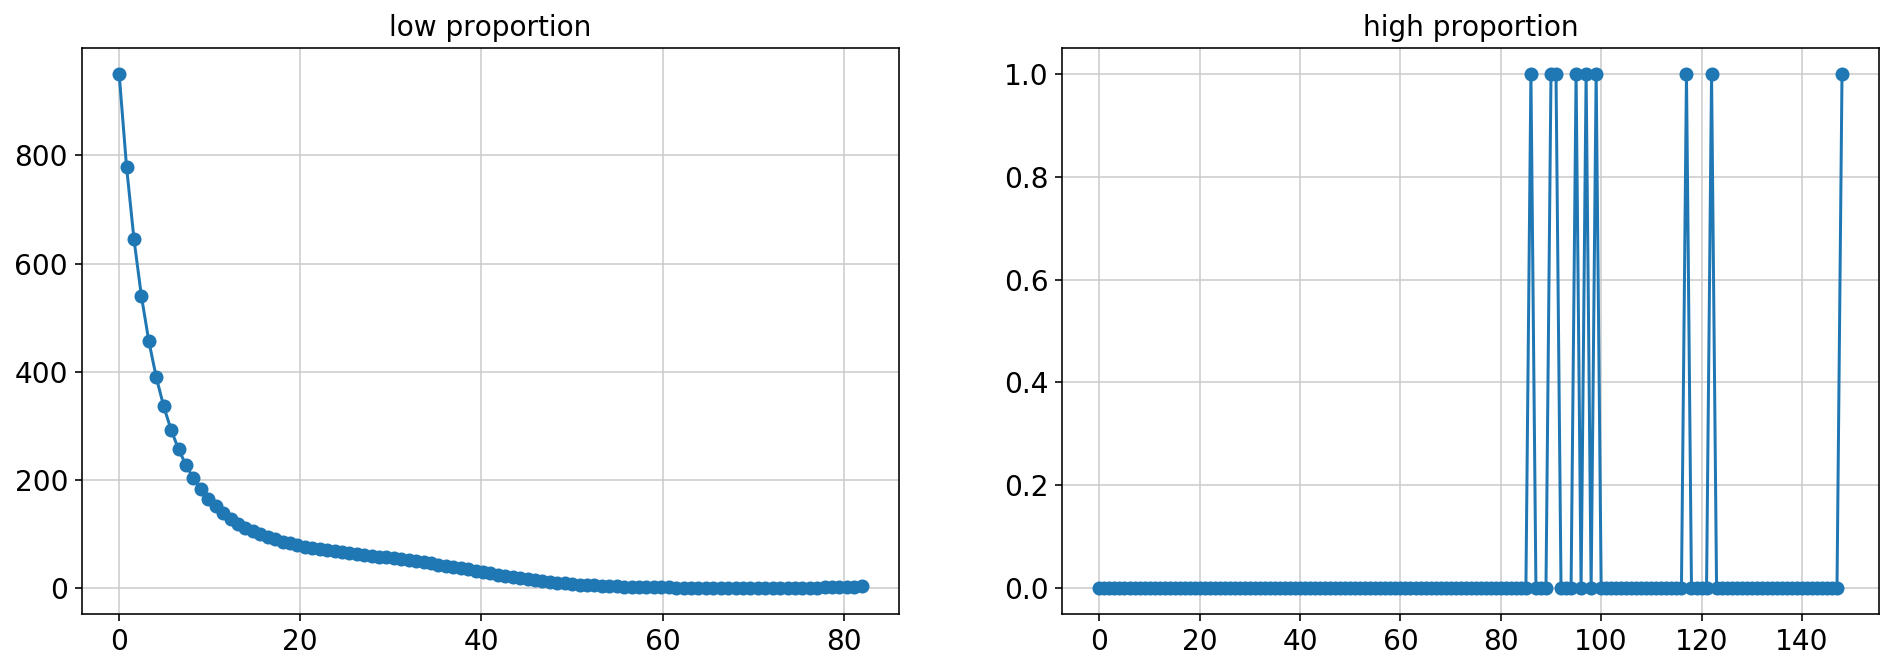

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:148.0


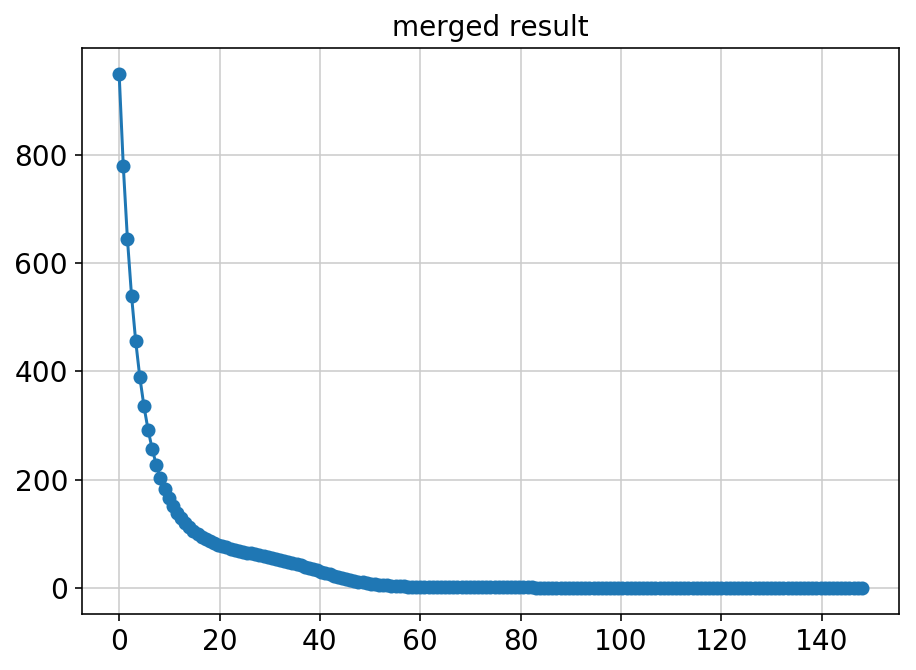

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 41.78%
>0.1: 26.16%
>0.15: 17.09%
>0.2: 10.23%
>0.25: 5.087%
>0.3: 2.121%
>0.35: 0.978%
>0.4: 0.607%


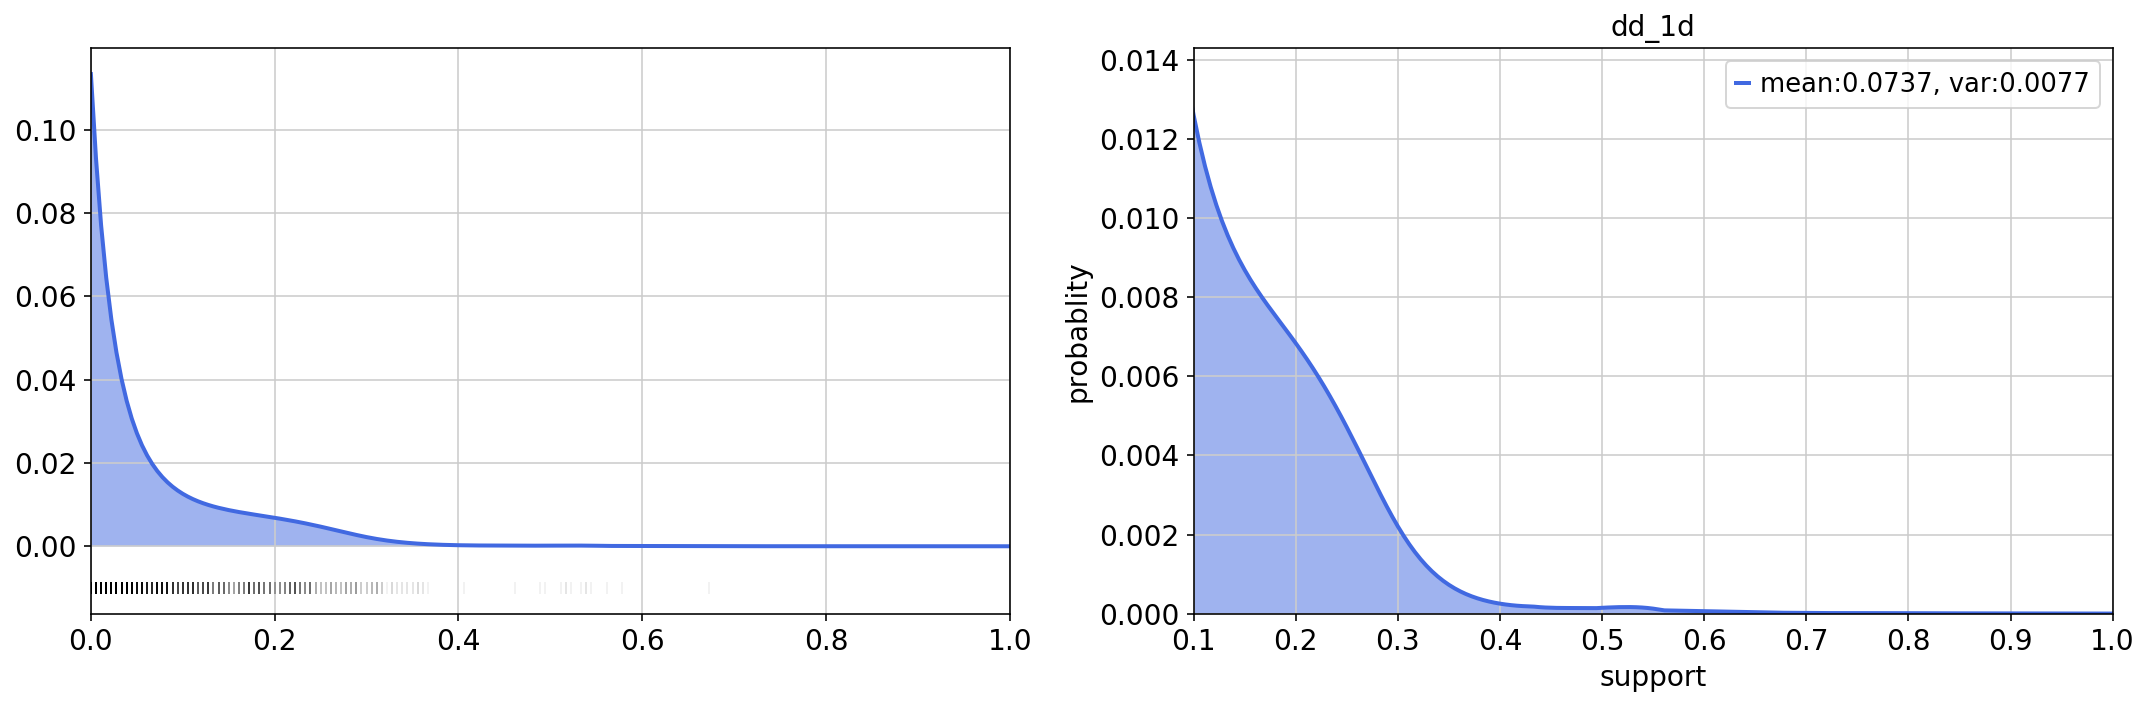

gamma: 148.0
-------------------------------------------------------------------------
LGALS2
Average counts per cell = 1.2554587758024103


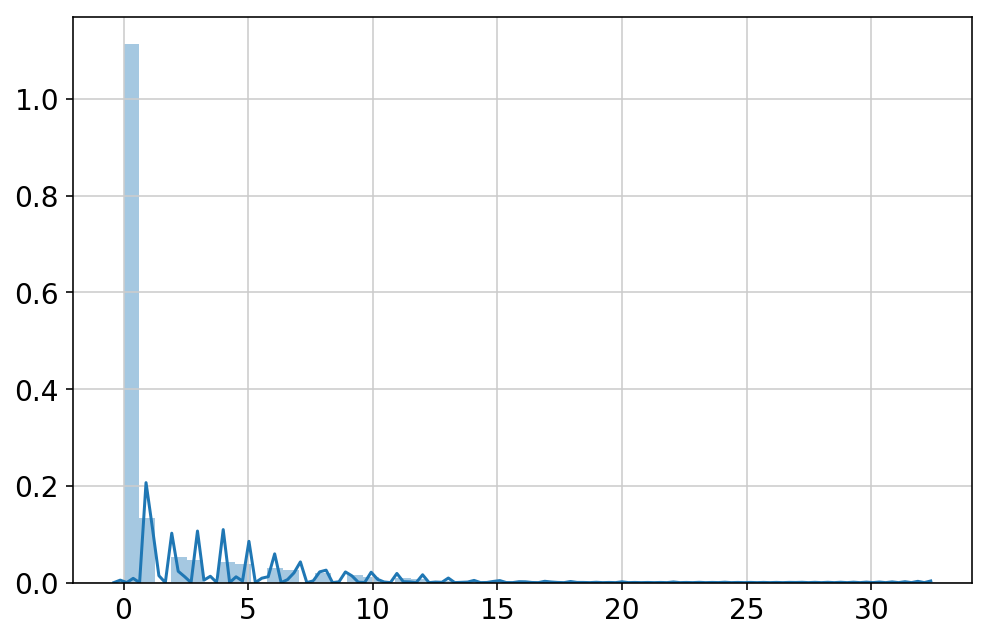

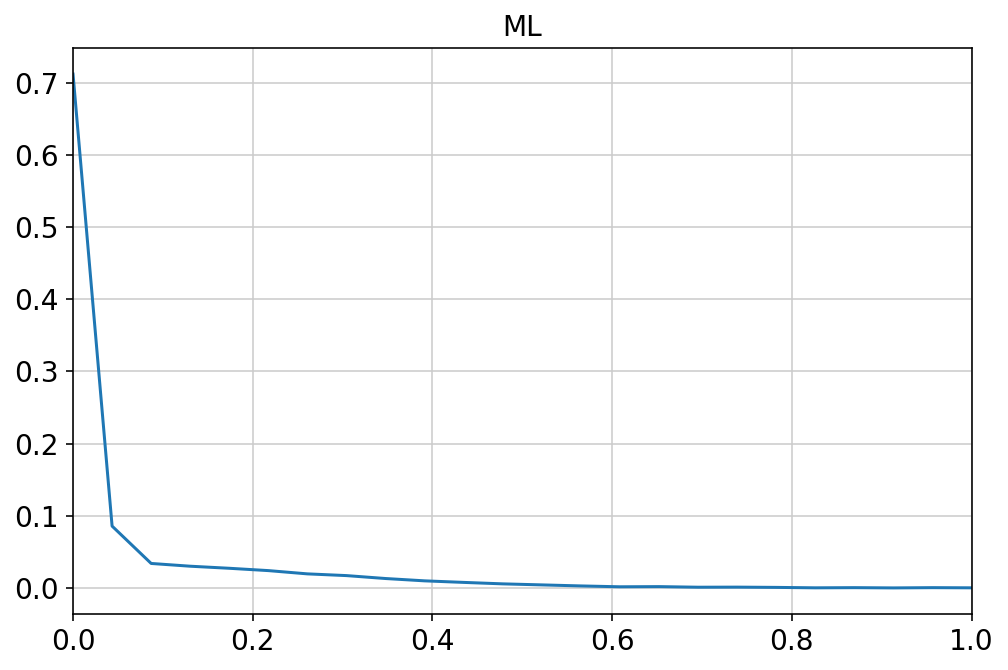

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 23

### debug: proportion separation ### start ###


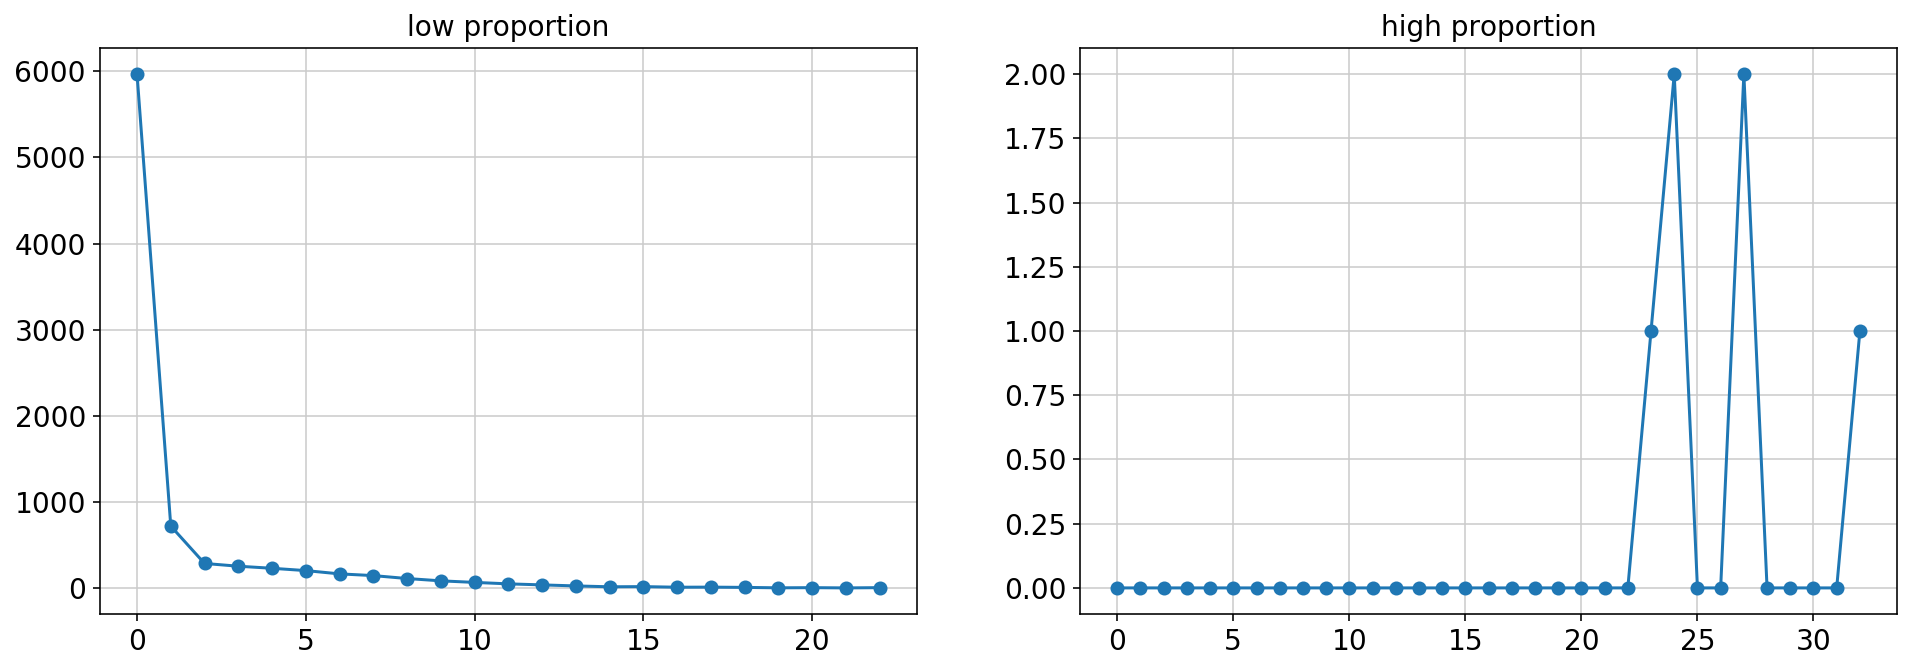

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
5.721890719456724
-11.040367466019774
6.817434321959581
-0.14987728969018121
-1.3492032606698956
Close-form gradients
[  5.72189215 -11.04036535   6.81743874  -0.14986561  -1.34919993]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.2764027230113144, reg:0.0064670236736517886
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  8.77296514  10.27115891   6.85562589  -6.65628675 -19.31152467]
gamma:23


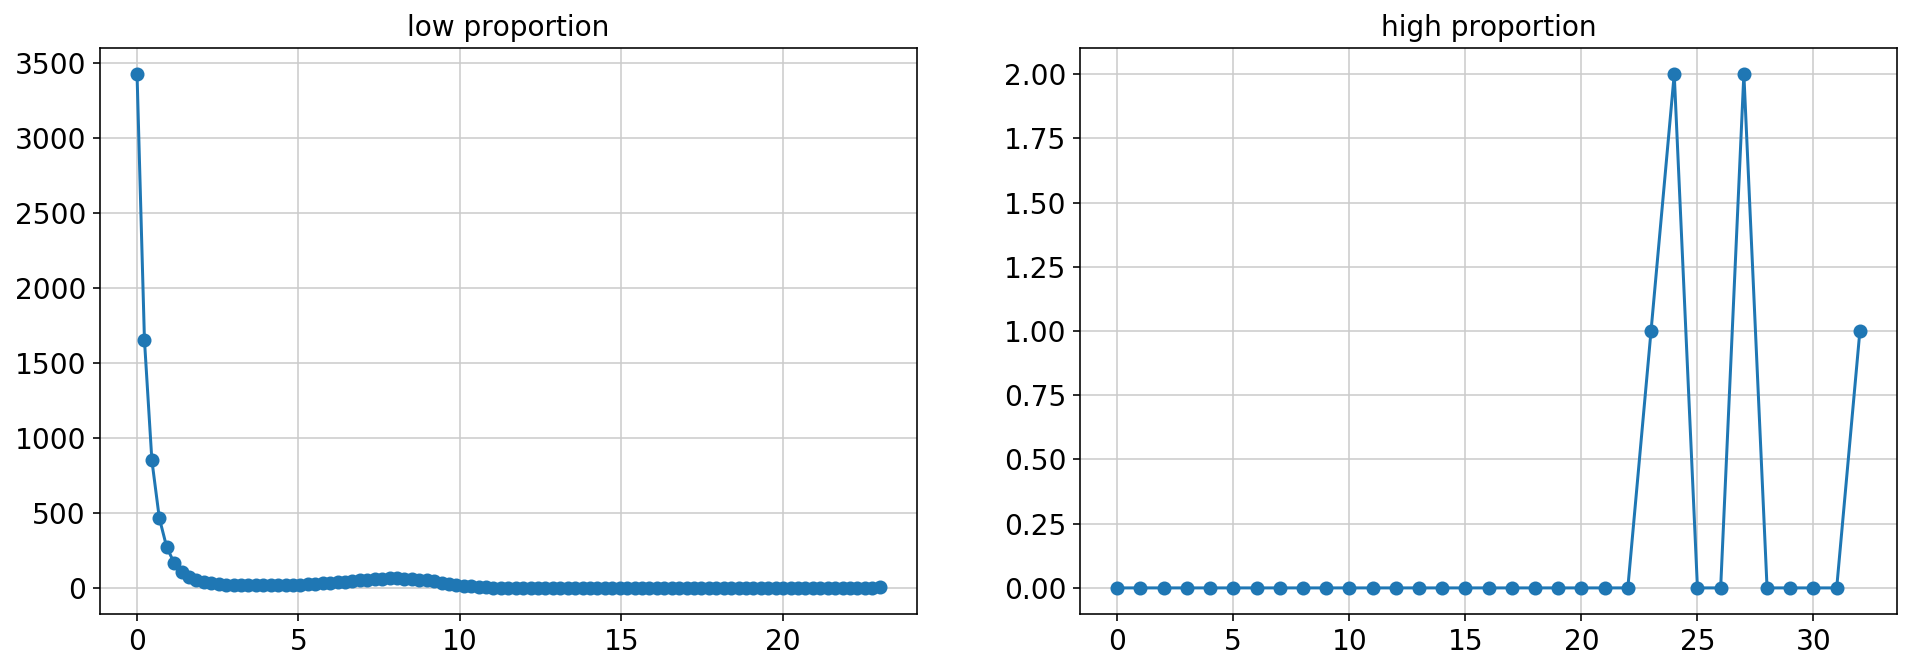

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:32.0


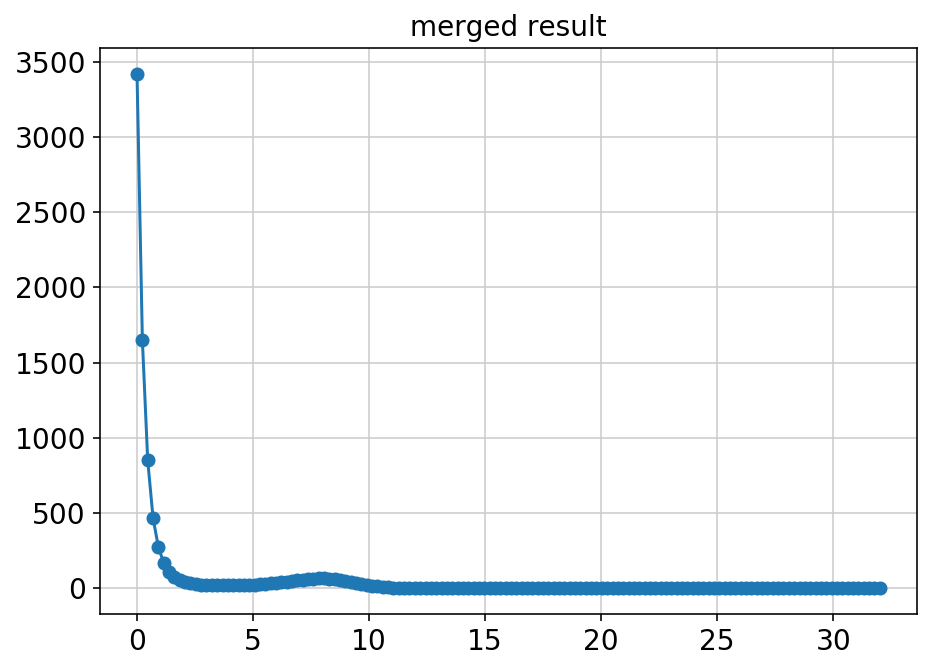

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 17.25%
>0.1: 14.03%
>0.15: 12.55%
>0.2: 10.18%
>0.25: 5.666%
>0.3: 1.282%
>0.35: 0.197%
>0.4: 0.162%


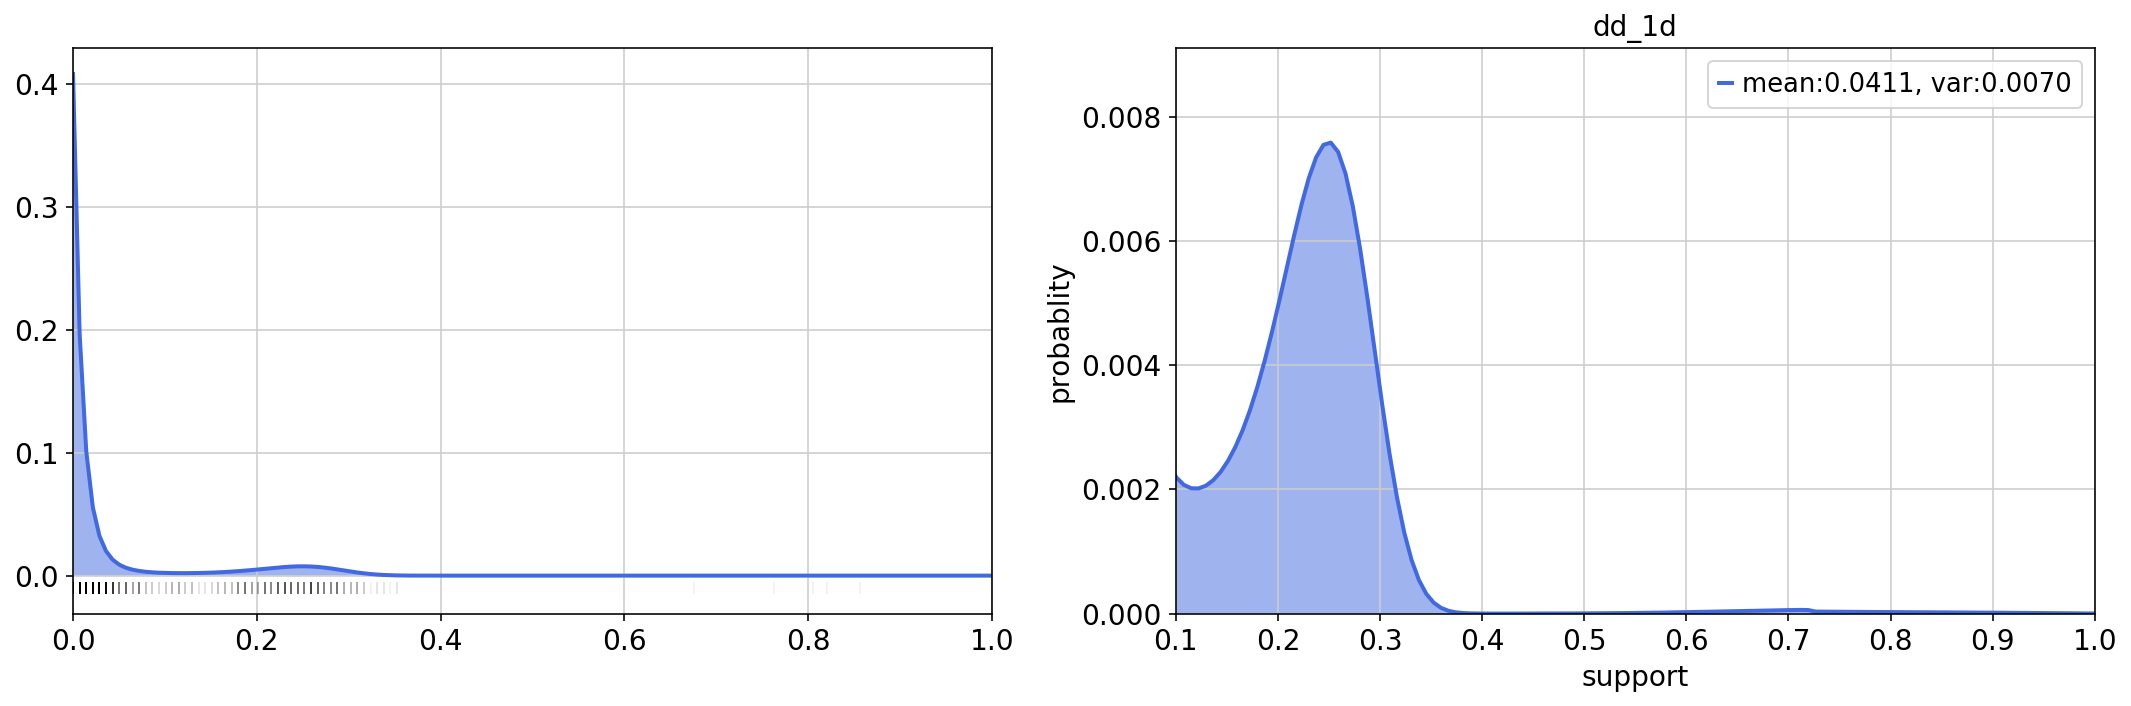

gamma: 32.0
-------------------------------------------------------------------------
FCN1
Average counts per cell = 2.1746808256771266


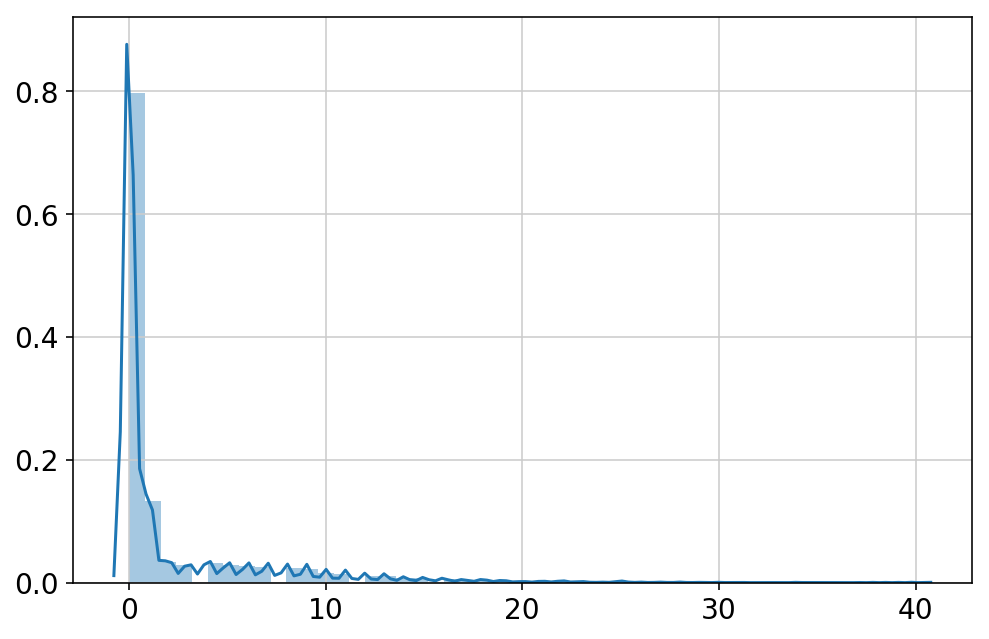

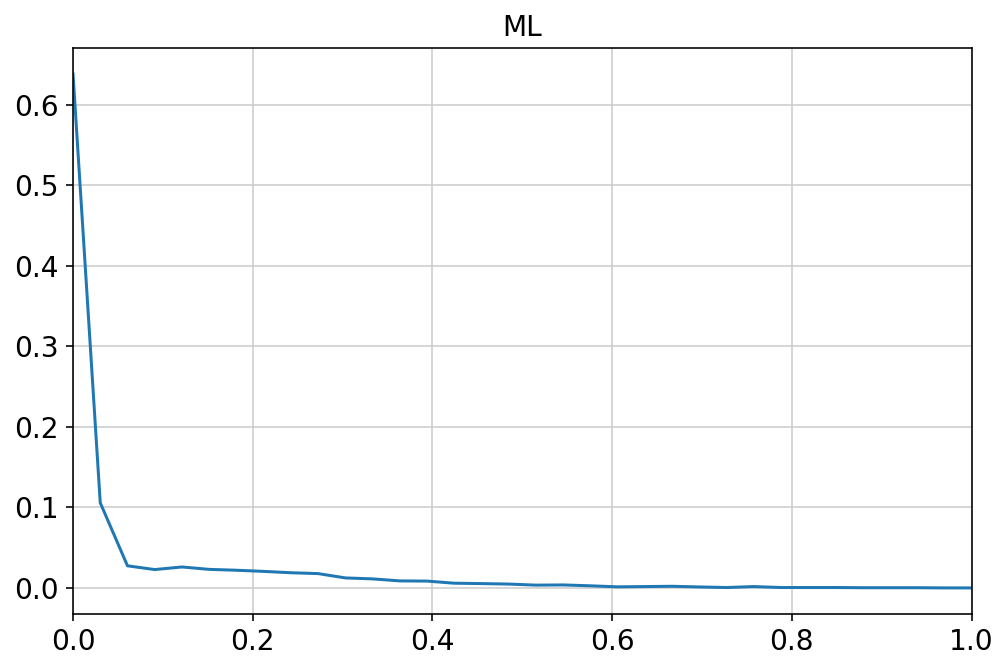

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 33

### debug: proportion separation ### start ###


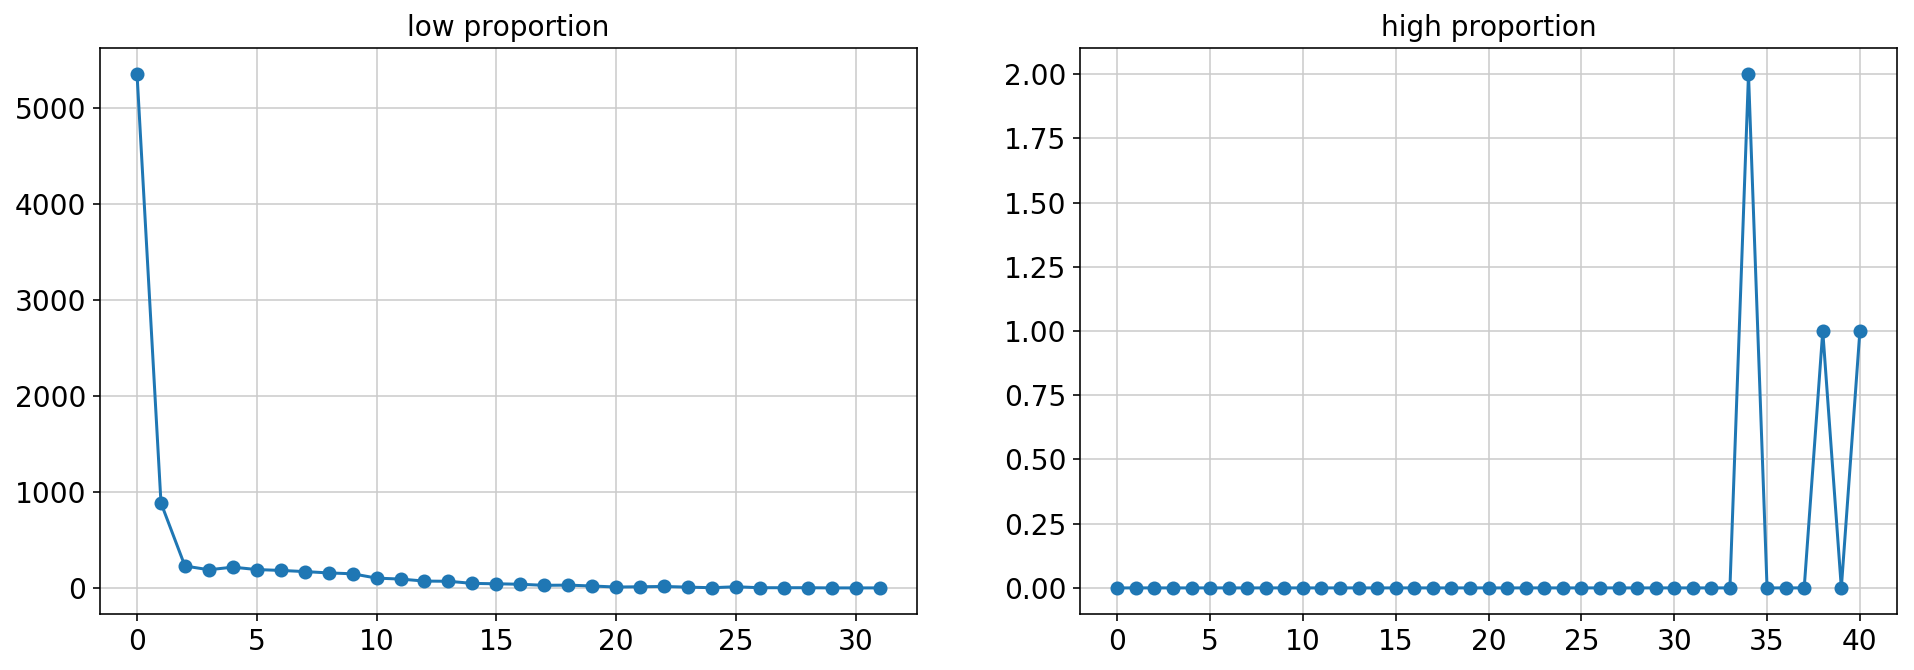

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
5.9188988044134305
-11.53511284890385
7.228476146536877
-0.2672429872951909
-1.345148830989018
Close-form gradients
[  5.91890094 -11.53510705   7.22848275  -0.26723115  -1.34514551]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.6319433759325133, reg:0.006641660502298835
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  9.07963934  10.43712603   6.81798179  -6.86091878 -19.47397026]
gamma:33


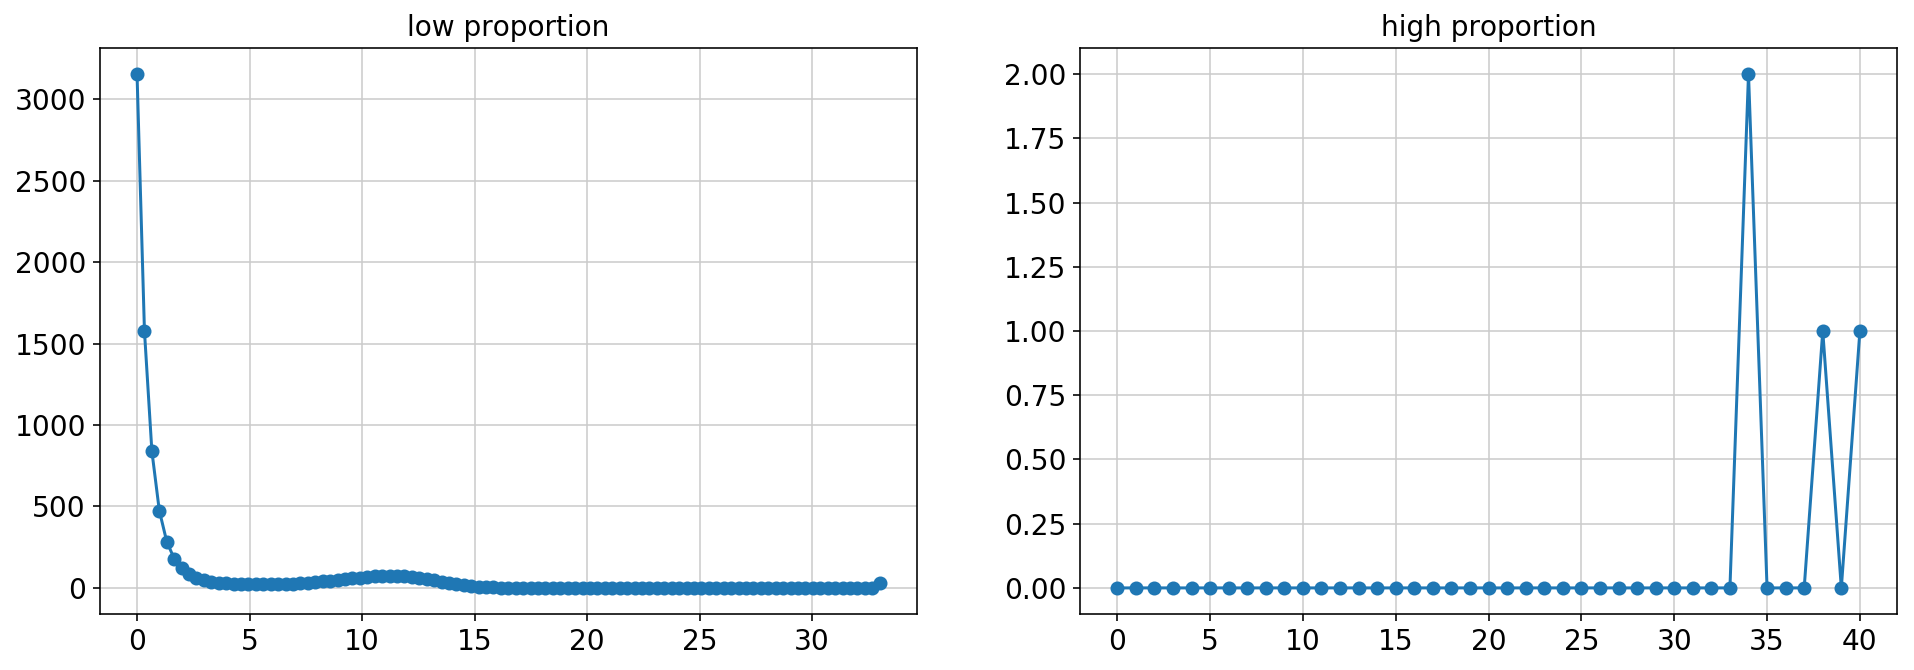

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:40.0


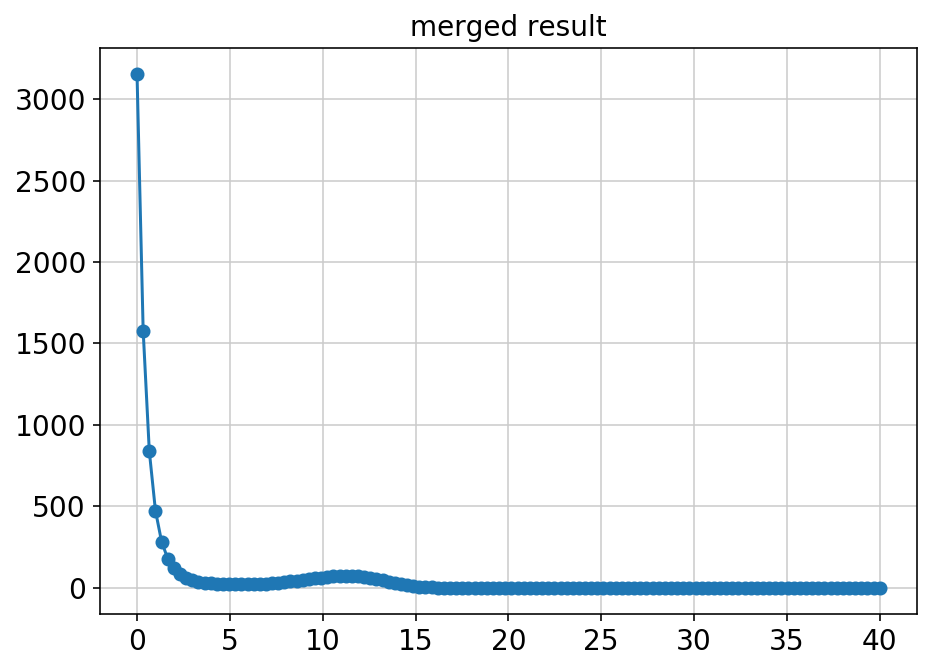

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 20.87%
>0.1: 17.37%
>0.15: 15.74%
>0.2: 13.68%
>0.25: 9.992%
>0.3: 4.764%
>0.35: 1.187%
>0.4: 0.425%


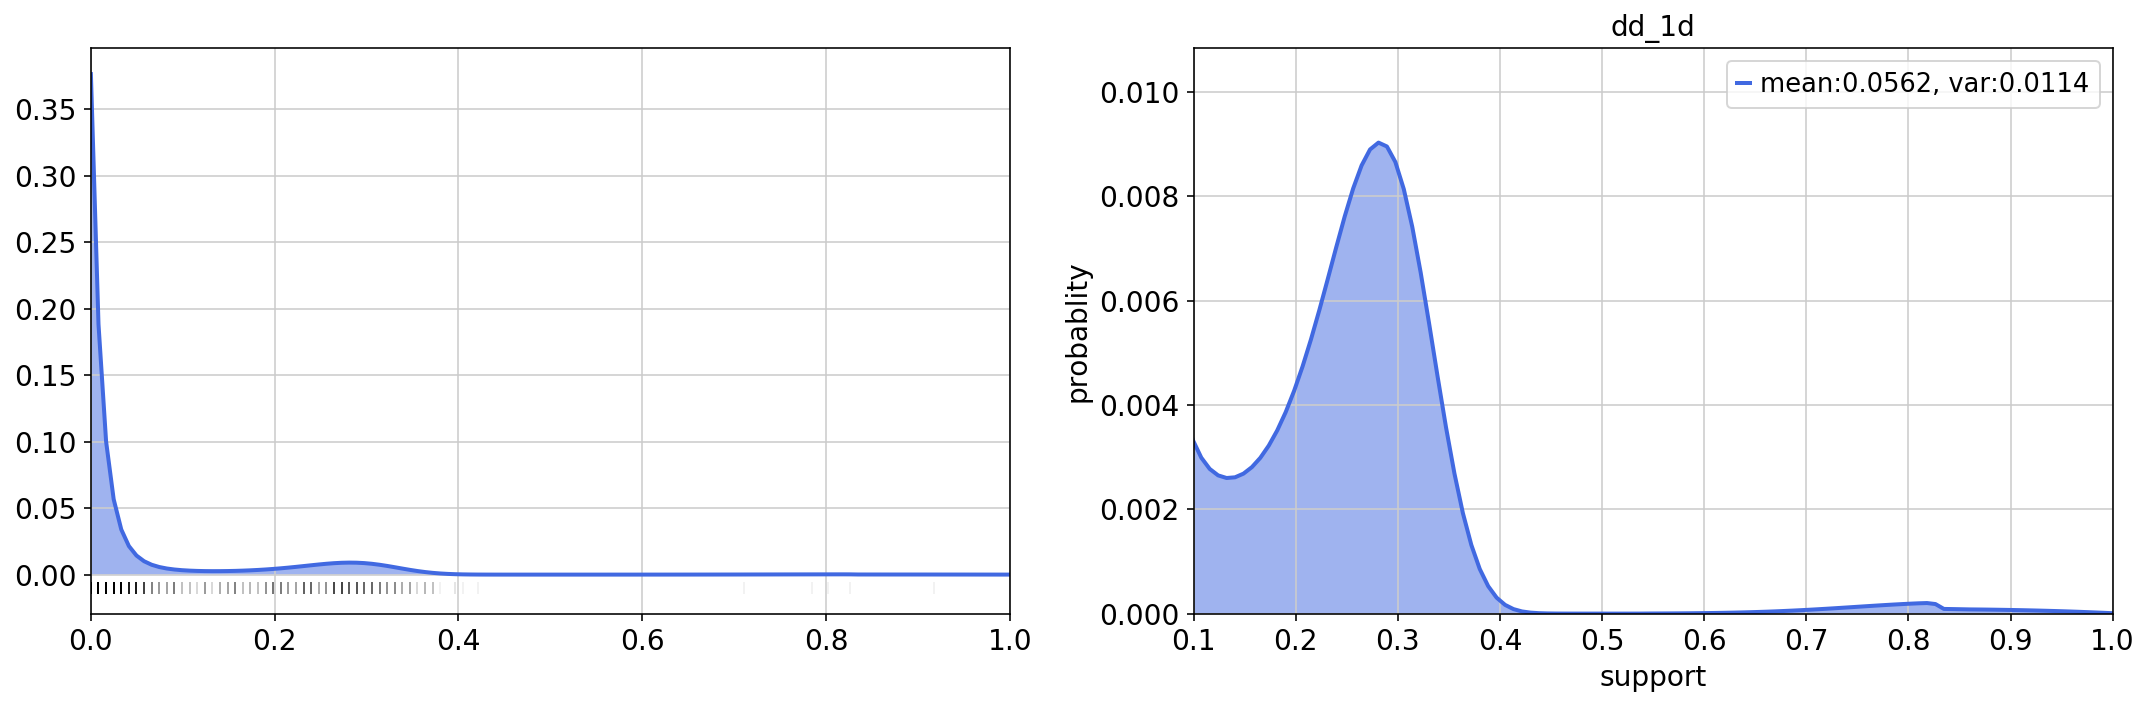

gamma: 40.0
-------------------------------------------------------------------------
CD14
Average counts per cell = 0.6564849063357595


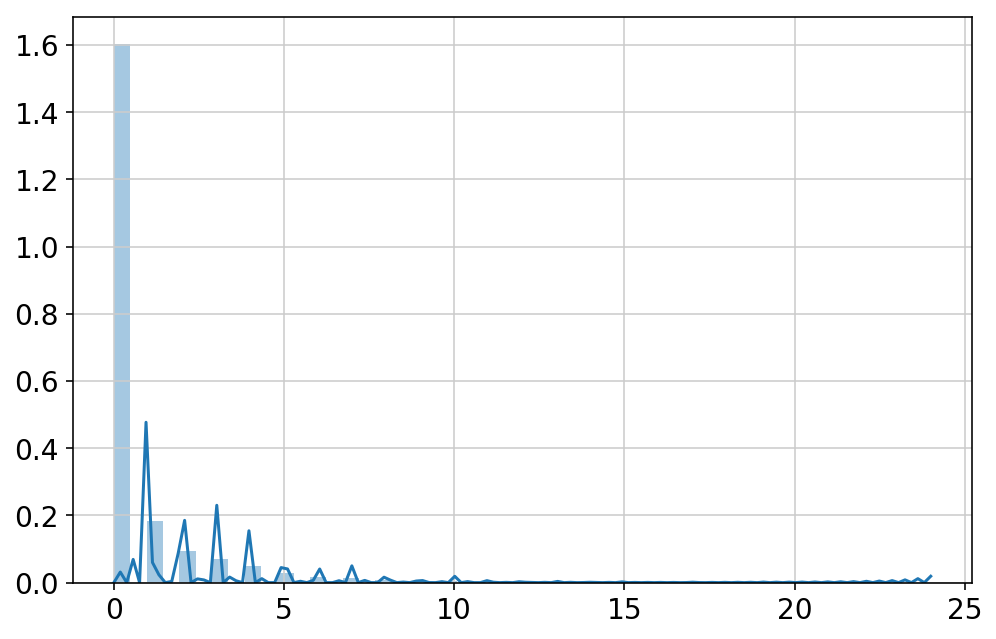

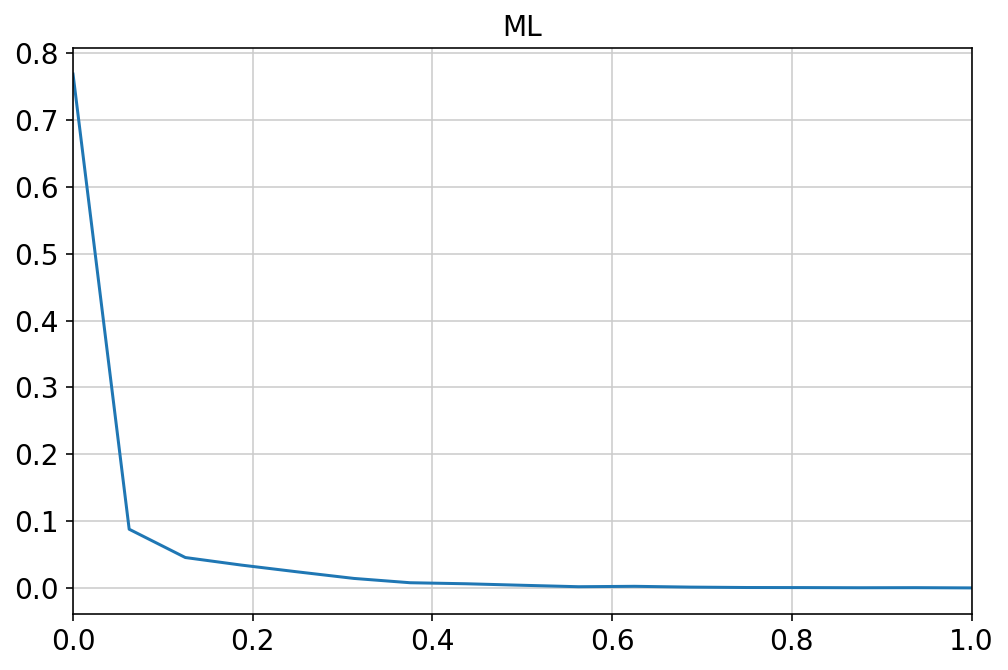

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 16

### debug: proportion separation ### start ###


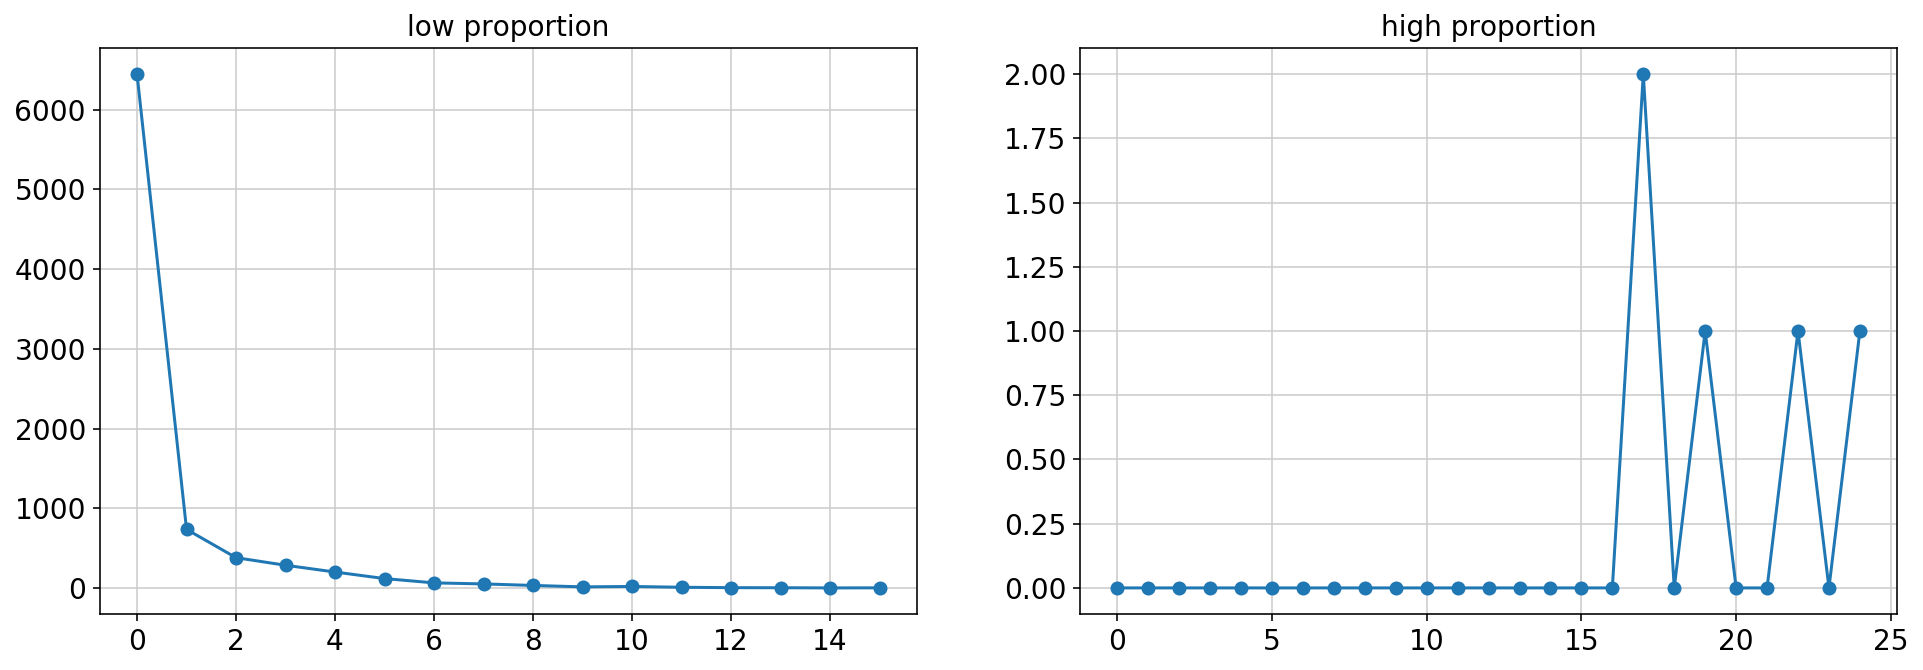

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
5.348985531394845
-10.144572108572447
6.101684749459935
0.045570454076937494
-1.3517824393183275
Close-form gradients
[  5.34898593 -10.14457504   6.1016863    0.04558192  -1.35177911]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.9715647973527757, reg:0.0036182420484780612
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  6.56600108   7.62341117   5.16858229  -4.88073328 -14.49343426]
gamma:16


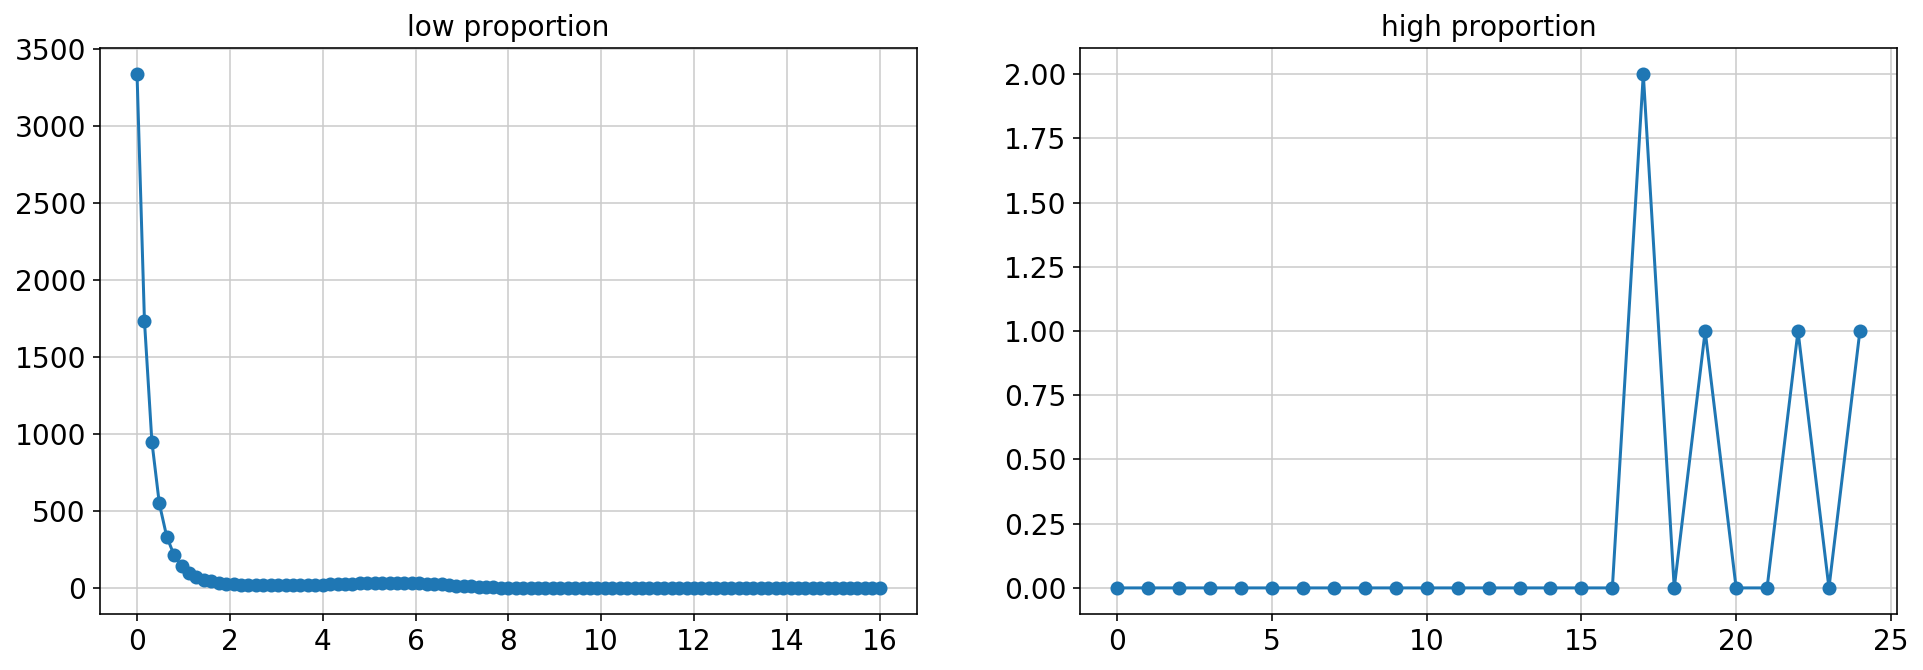

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:24.0


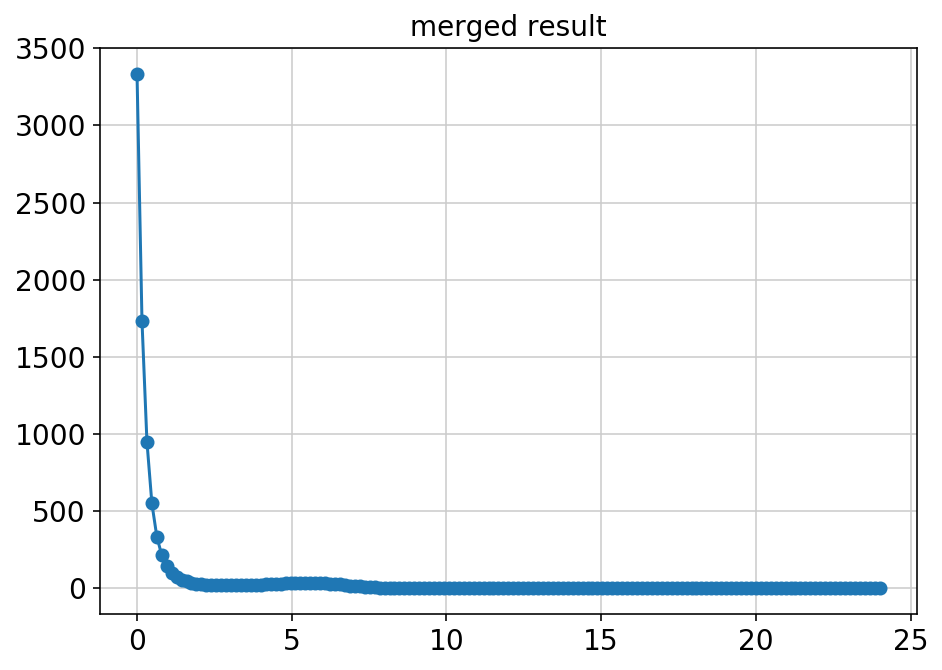

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 12.31%
>0.1: 8.799%
>0.15: 7.316%
>0.2: 5.018%
>0.25: 2.268%
>0.3: 0.323%
>0.35: 0.082%
>0.4: 0.076%


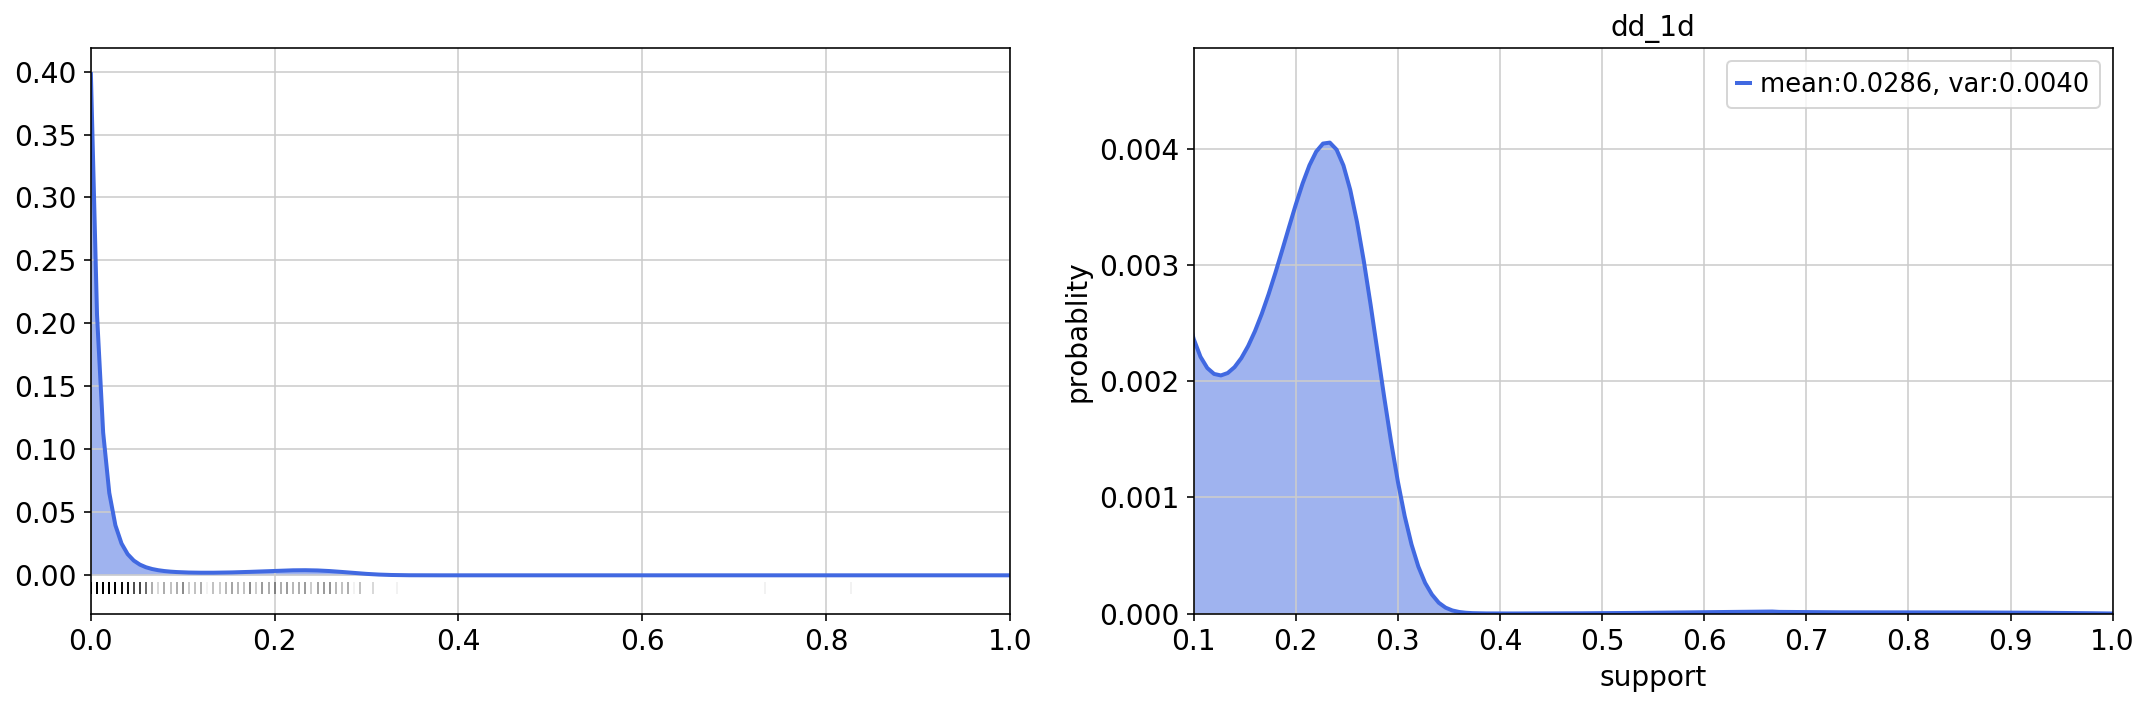

gamma: 24.0
-------------------------------------------------------------------------
GZMB
Average counts per cell = 0.46116215248777


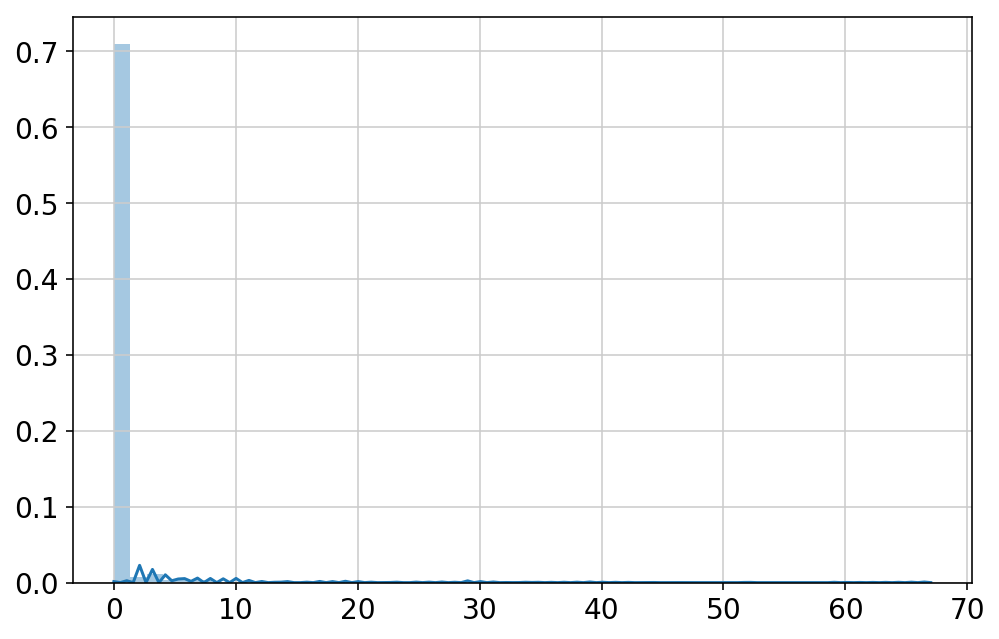

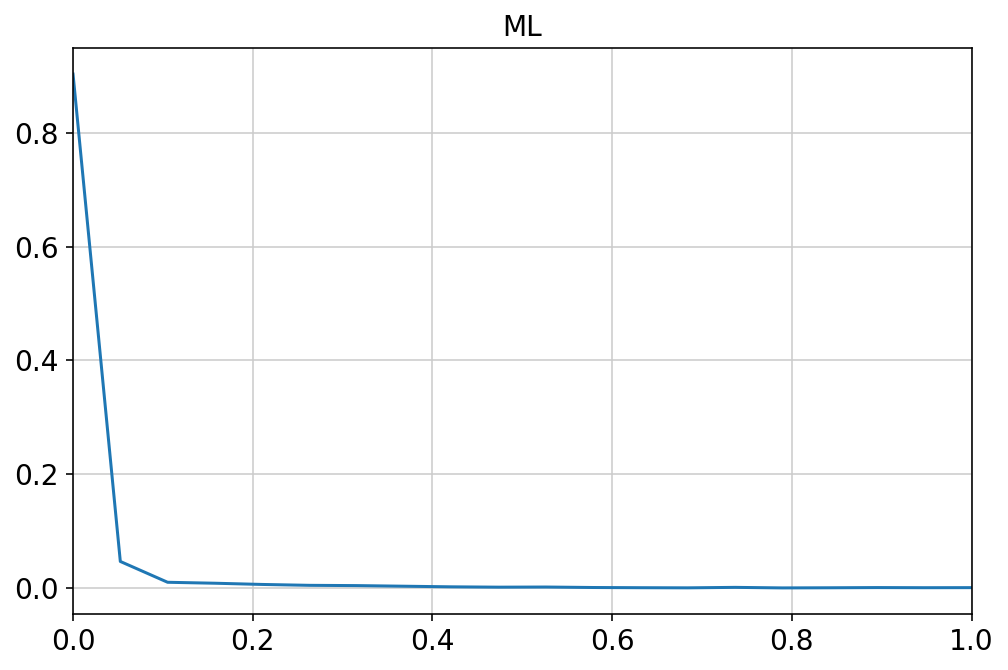

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 19

### debug: proportion separation ### start ###


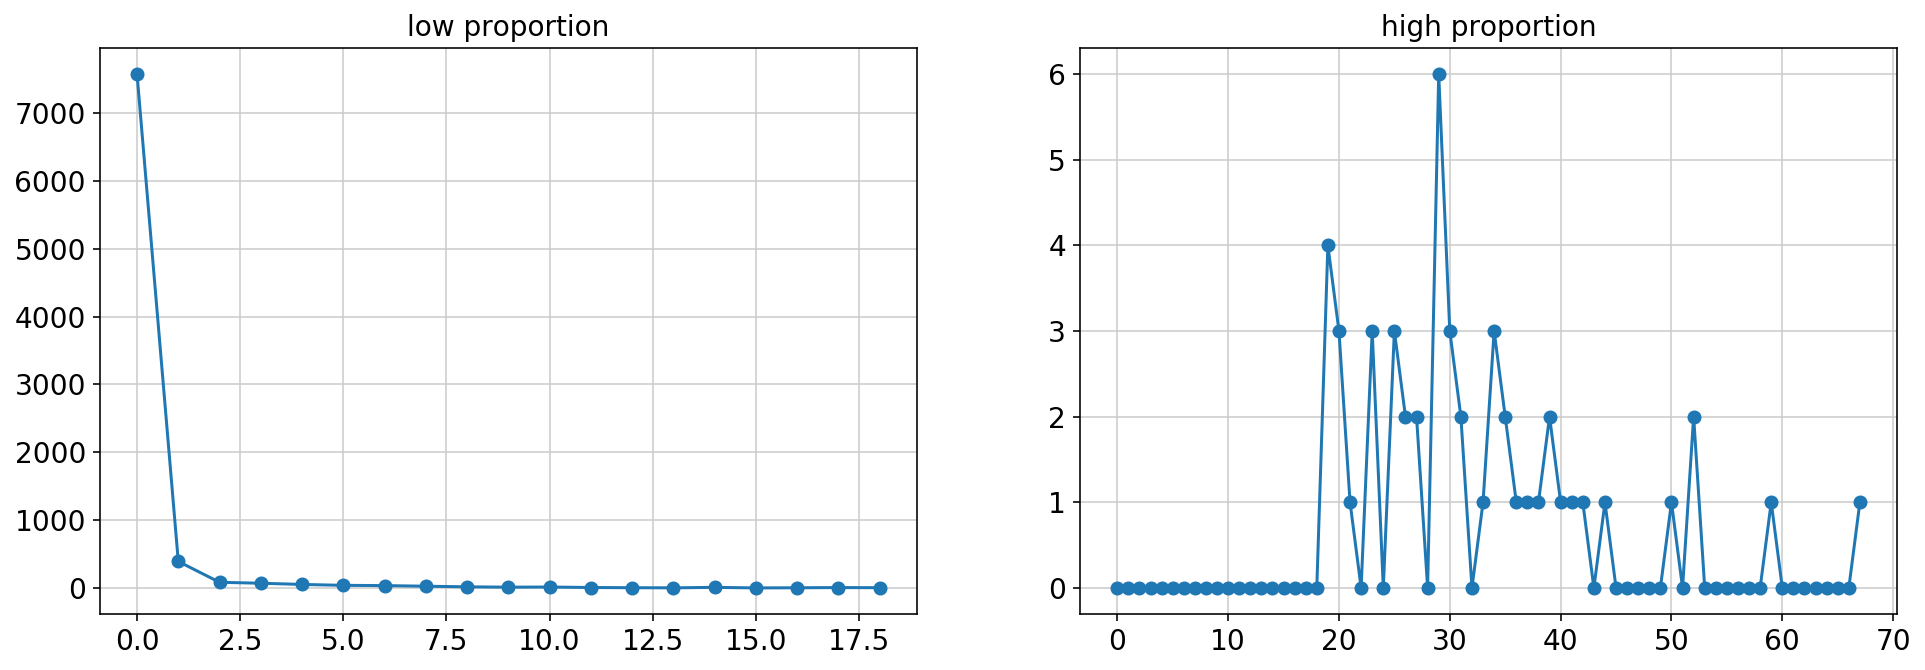

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.422336152667185
-12.498177779374231
7.867360633184717
-0.4292339337297335
-1.3624017838331781
Close-form gradients
[  6.42233696 -12.49817912   7.86736294  -0.42922234  -1.36239844]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.47944669731972644, reg:0.003060974802995463
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  3.00417307   6.87753104   7.00510292  -3.07700036 -13.82868732]
gamma:19


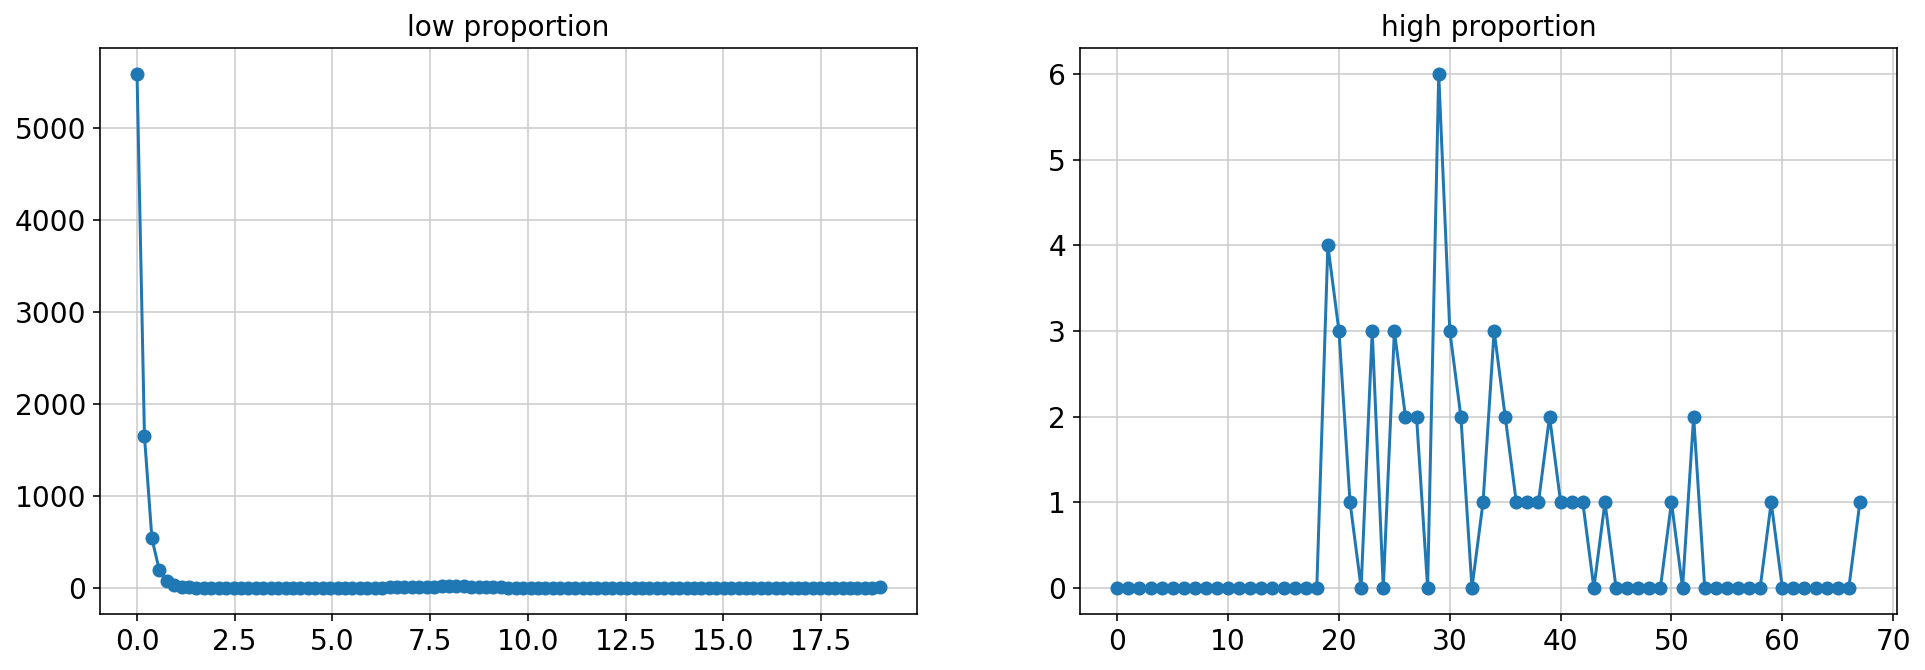

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:67.0


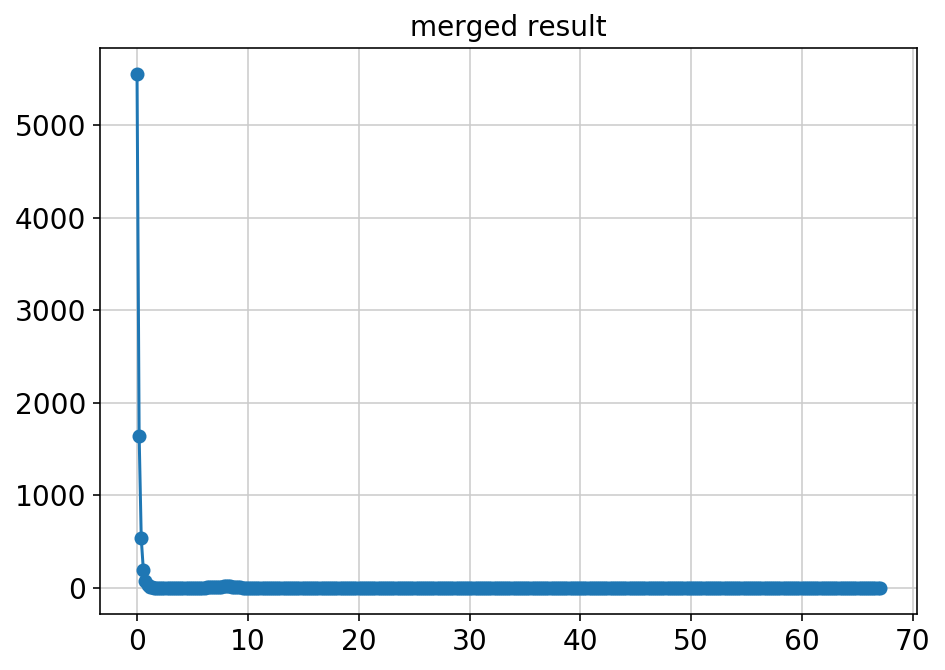

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 3.300%
>0.1: 2.895%
>0.15: 0.675%
>0.2: 0.647%
>0.25: 0.606%
>0.3: 0.515%
>0.35: 0.437%
>0.4: 0.355%


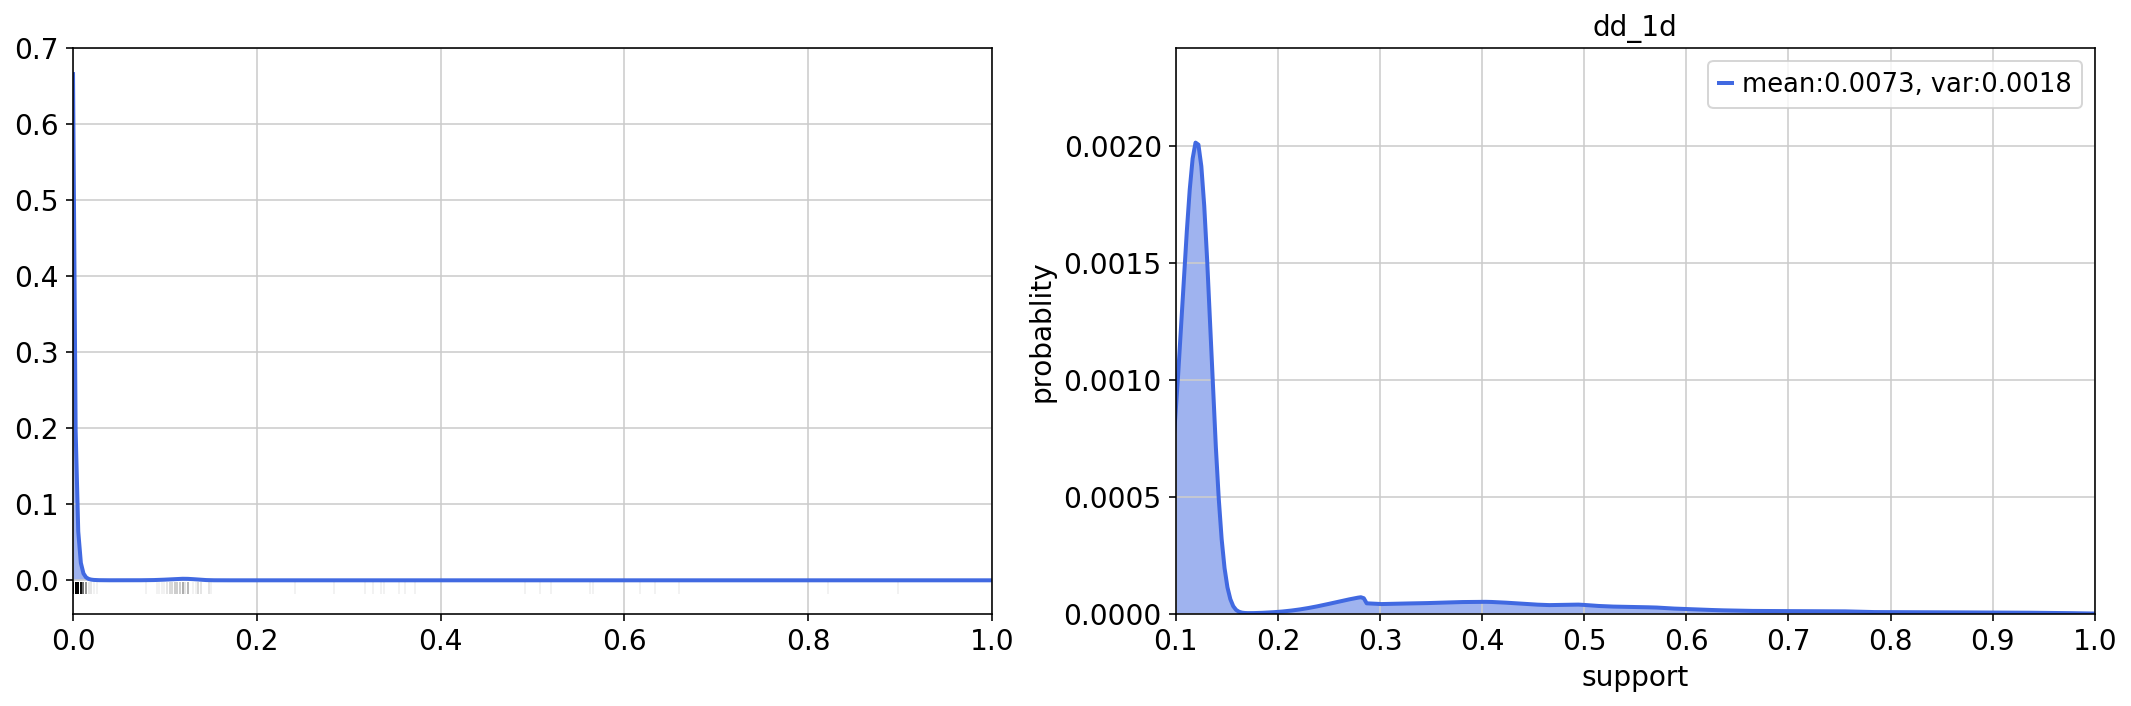

gamma: 67.0
-------------------------------------------------------------------------
IGFBP7
Average counts per cell = 0.09760171817205585


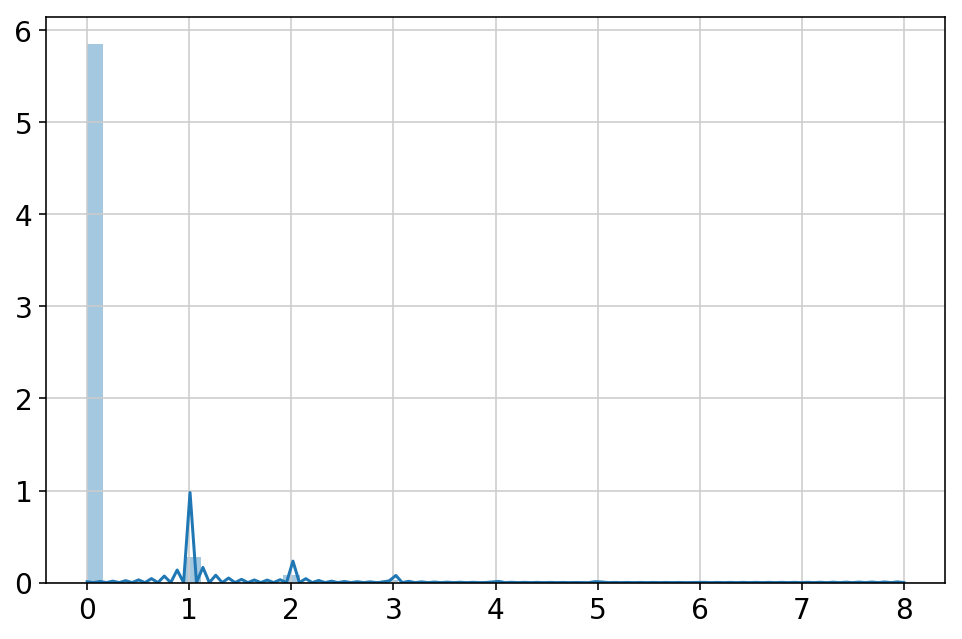

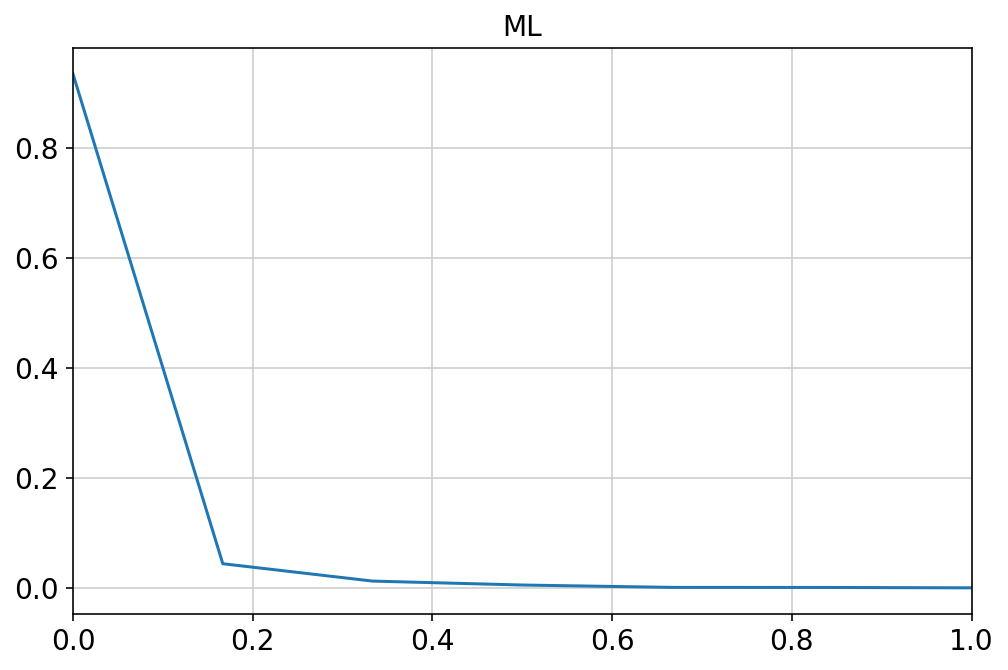

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 6

### debug: proportion separation ### start ###


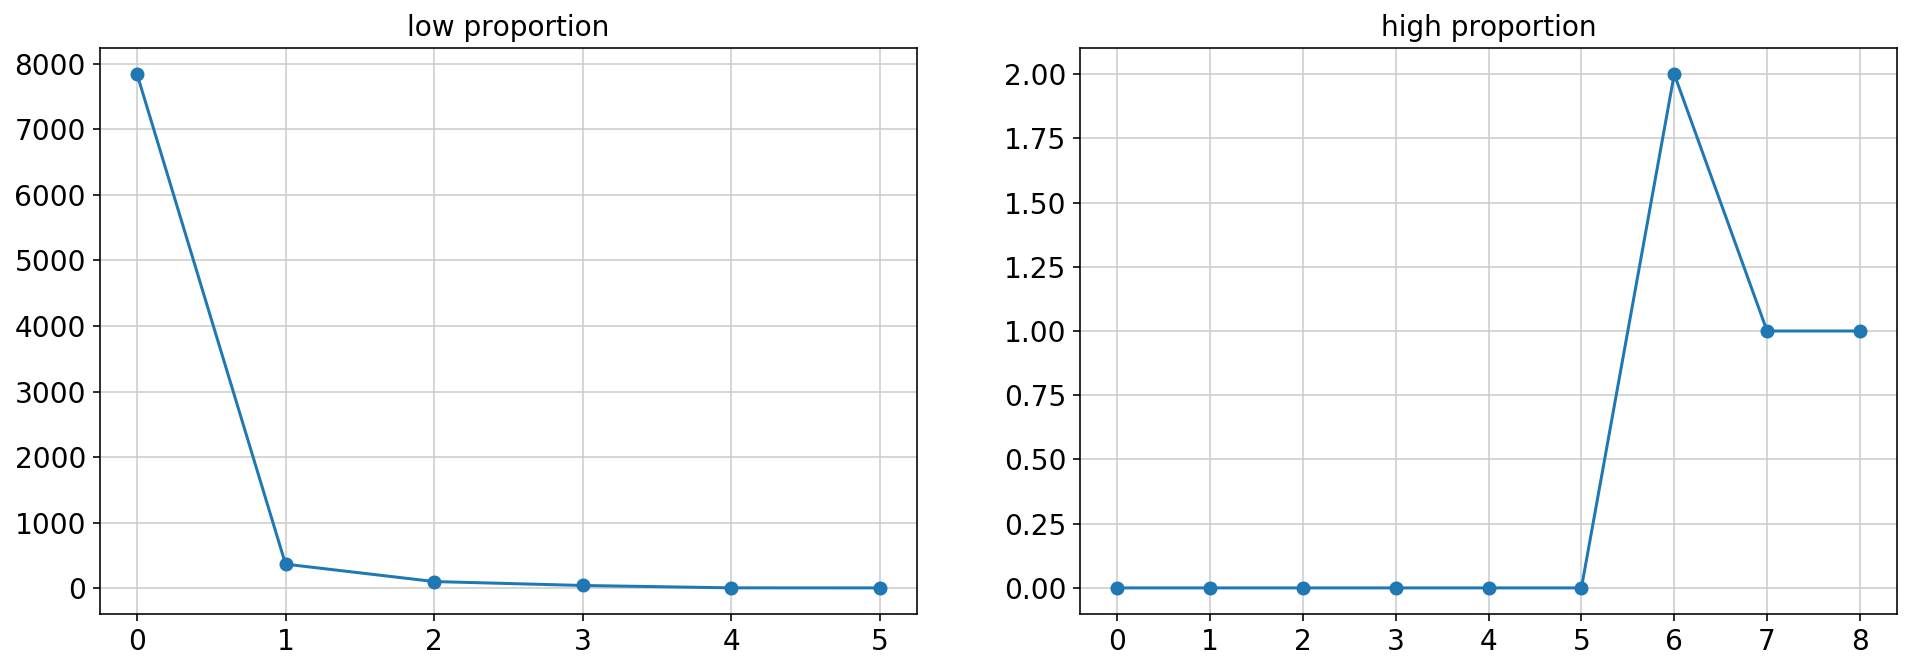

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
3.449735913152452
-6.07865091106774
3.1146567300854855
0.8212102331484061
-1.307045004228513
Close-form gradients
[ 3.44973344 -6.07866529  3.11465265  0.82122098 -1.30704179]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.29932594908266486, reg:0.0005418459093766654
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 0.84723016  2.66216458  3.26609553 -0.86208827 -5.9134673 ]
gamma:6


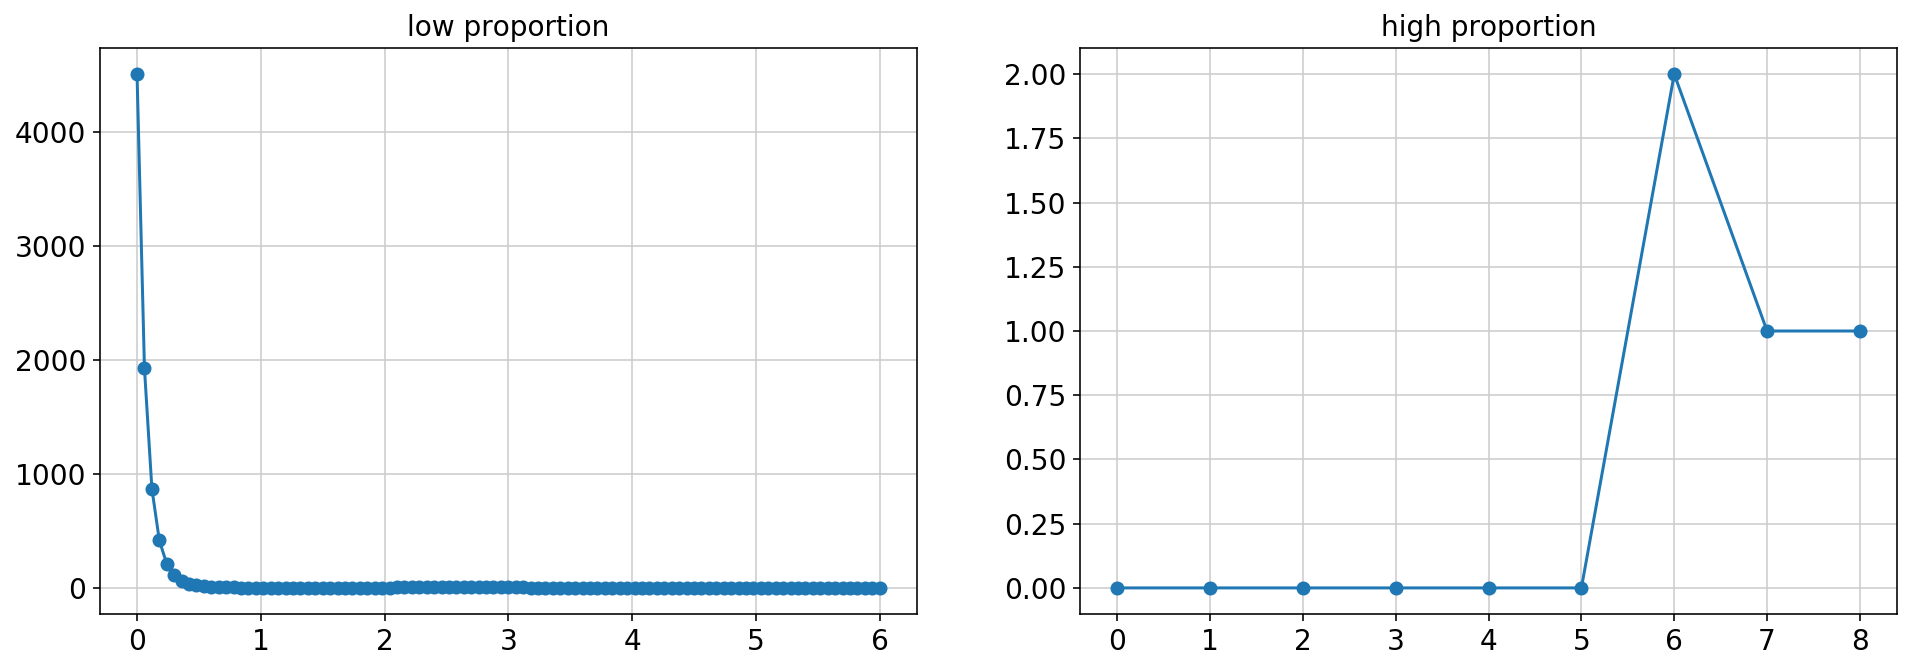

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:8.0


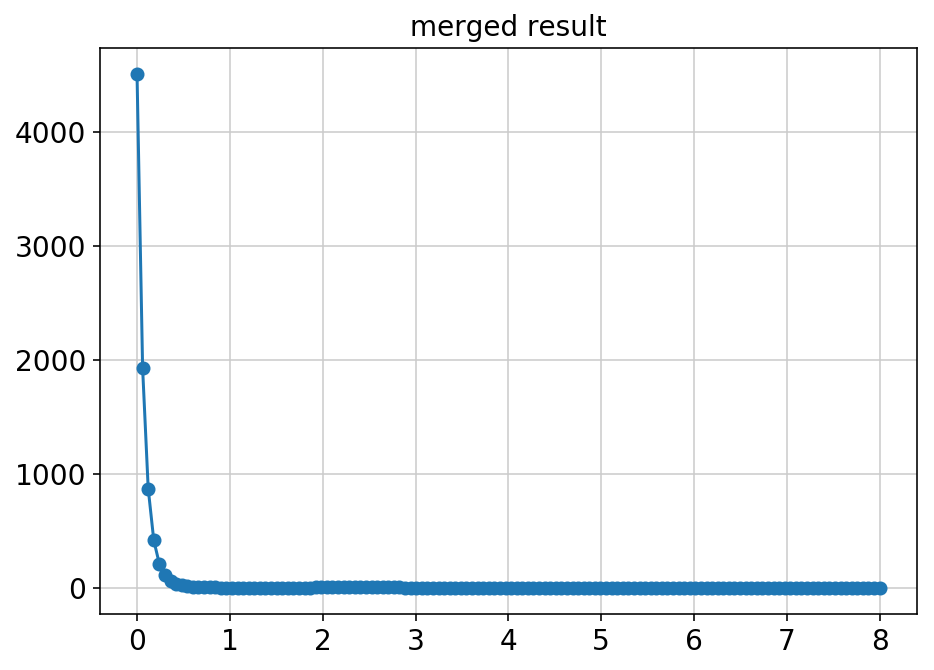

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 3.192%
>0.1: 1.954%
>0.15: 1.745%
>0.2: 1.533%
>0.25: 1.247%
>0.3: 0.913%
>0.35: 0.509%
>0.4: 0.291%


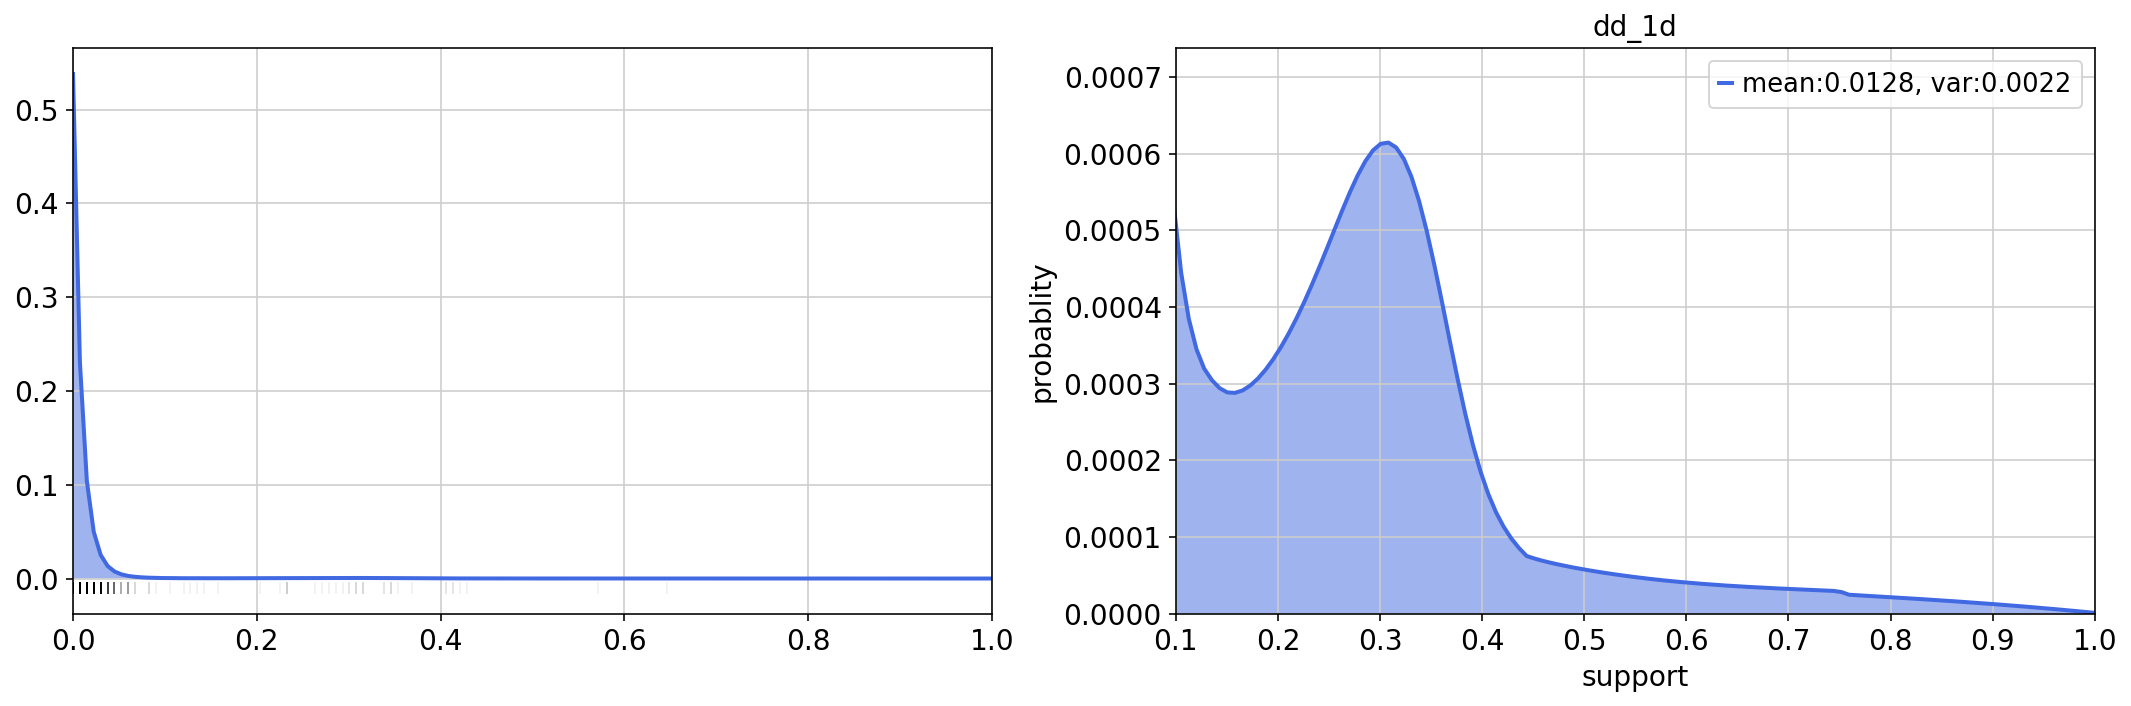

gamma: 8.0
-------------------------------------------------------------------------
CD79A
Average counts per cell = 1.003937477627968


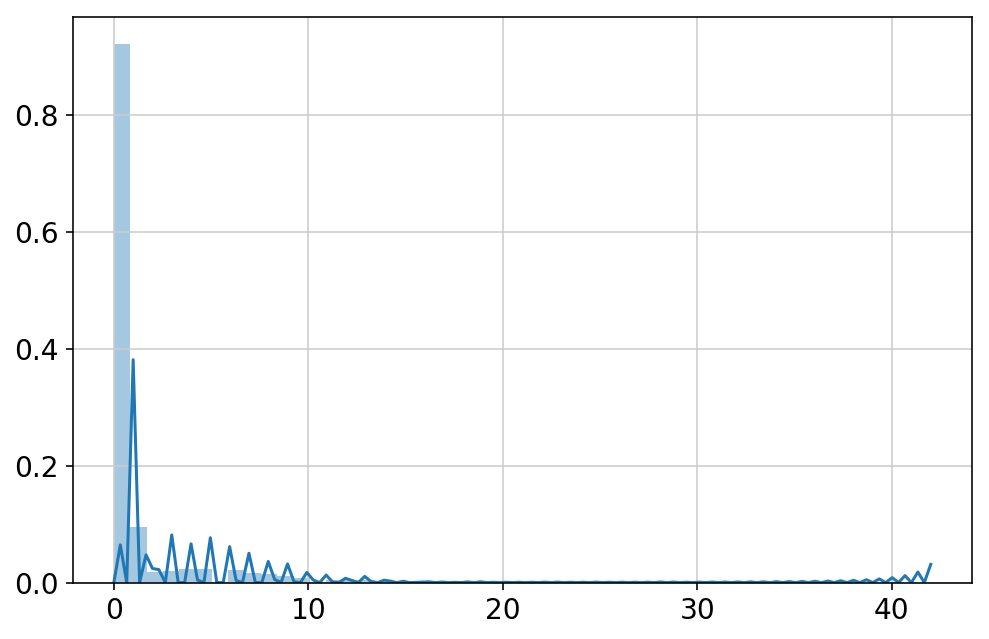

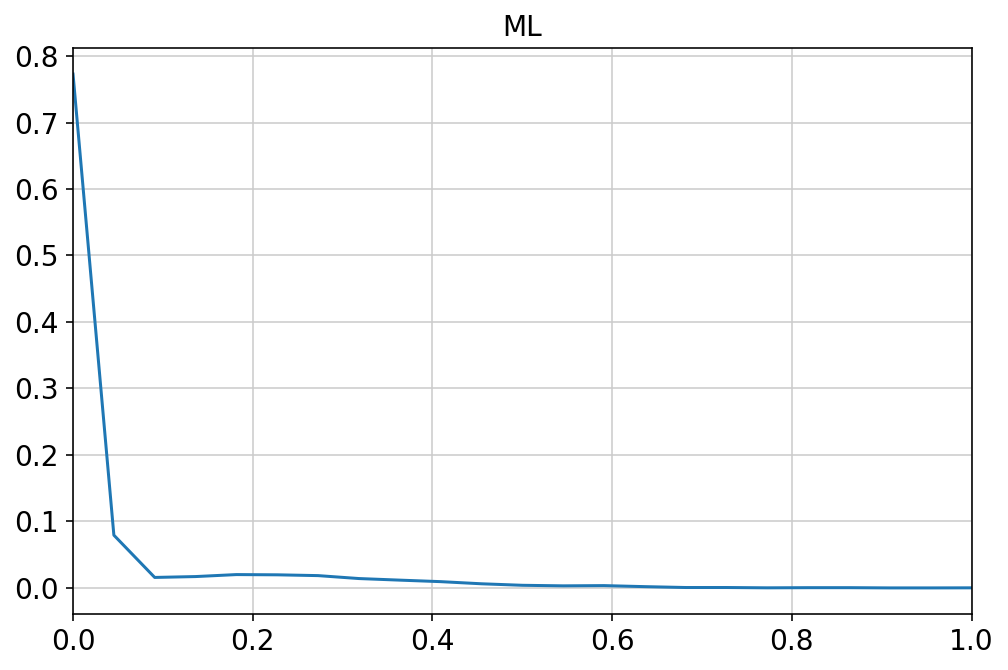

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 22

### debug: proportion separation ### start ###


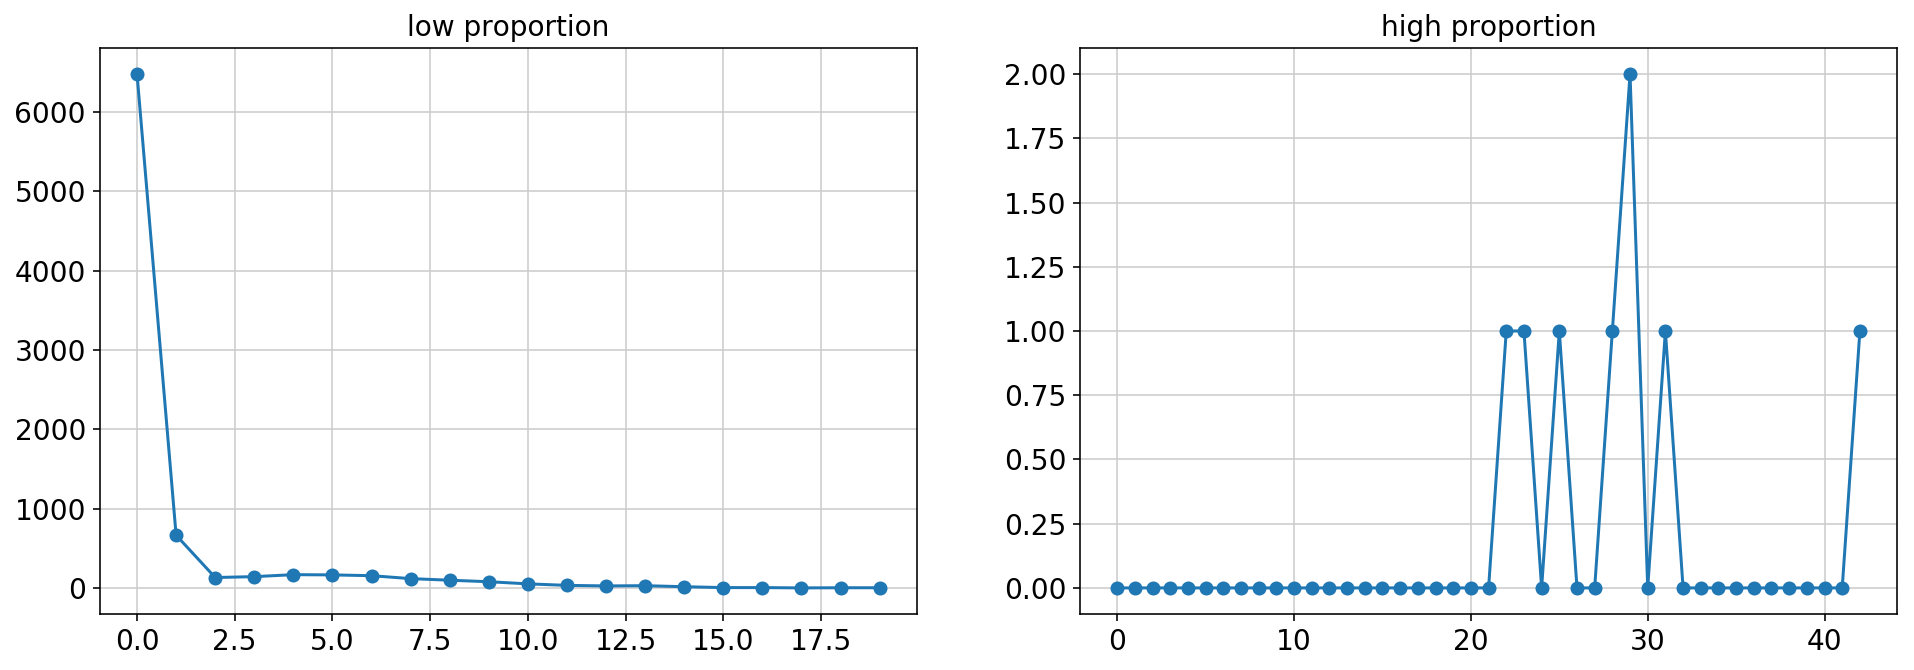

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
5.9438984121307215
-11.524655084915736
7.176771276817817
-0.24281285737615121
-1.3533235354579176
Close-form gradients
[  5.94389973 -11.52465362   7.17677528  -0.24280119  -1.3533202 ]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.0528134759099064, reg:0.007751015387966461
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  8.83604884  11.25040574   8.10285817  -6.85463752 -21.39653673]
gamma:22


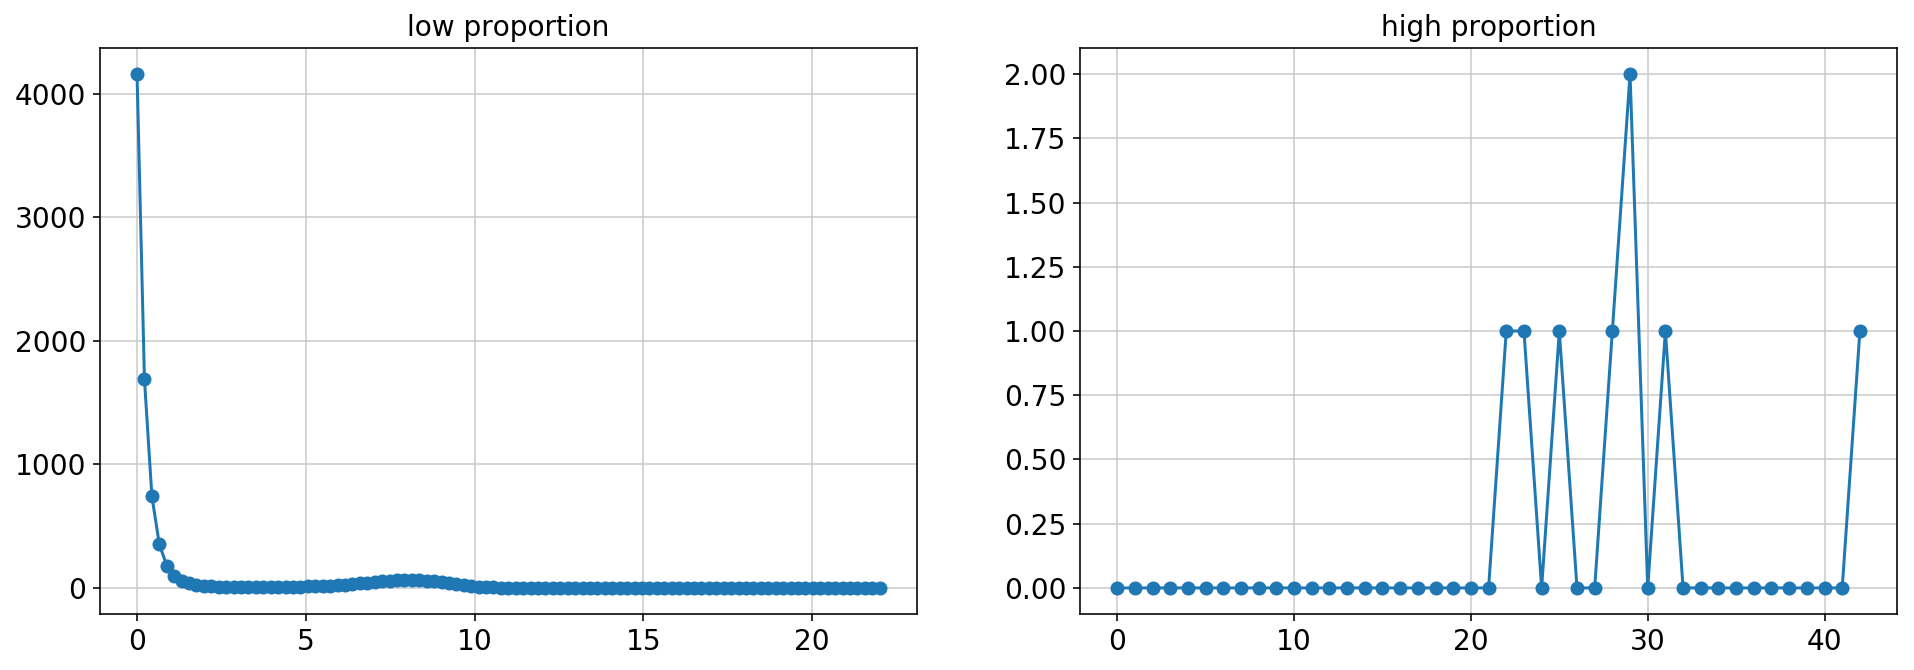

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:42.0


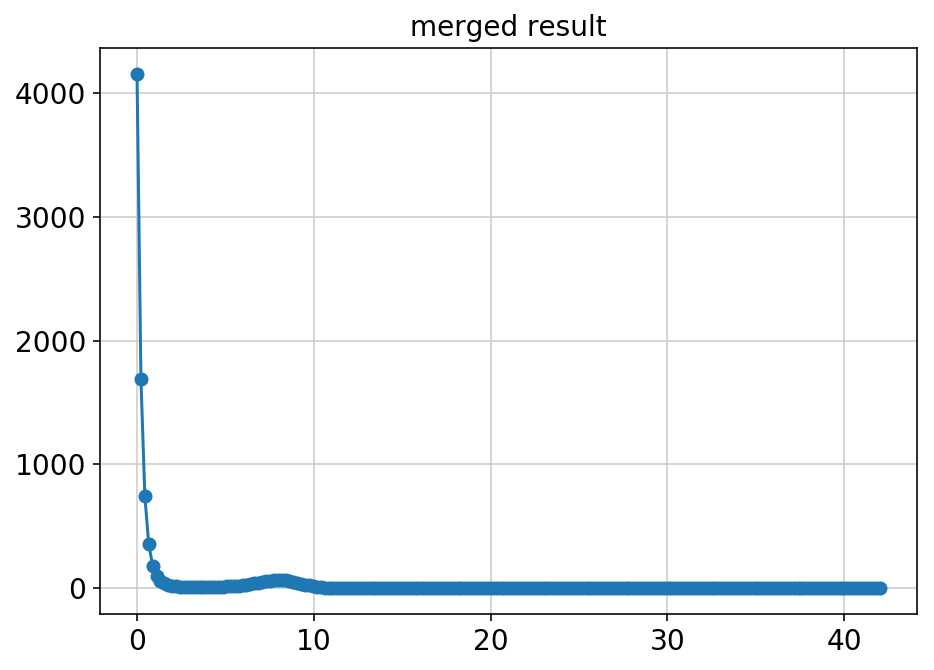

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 12.17%
>0.1: 11.22%
>0.15: 9.560%
>0.2: 3.312%
>0.25: 0.180%
>0.3: 0.104%
>0.35: 0.104%
>0.4: 0.102%


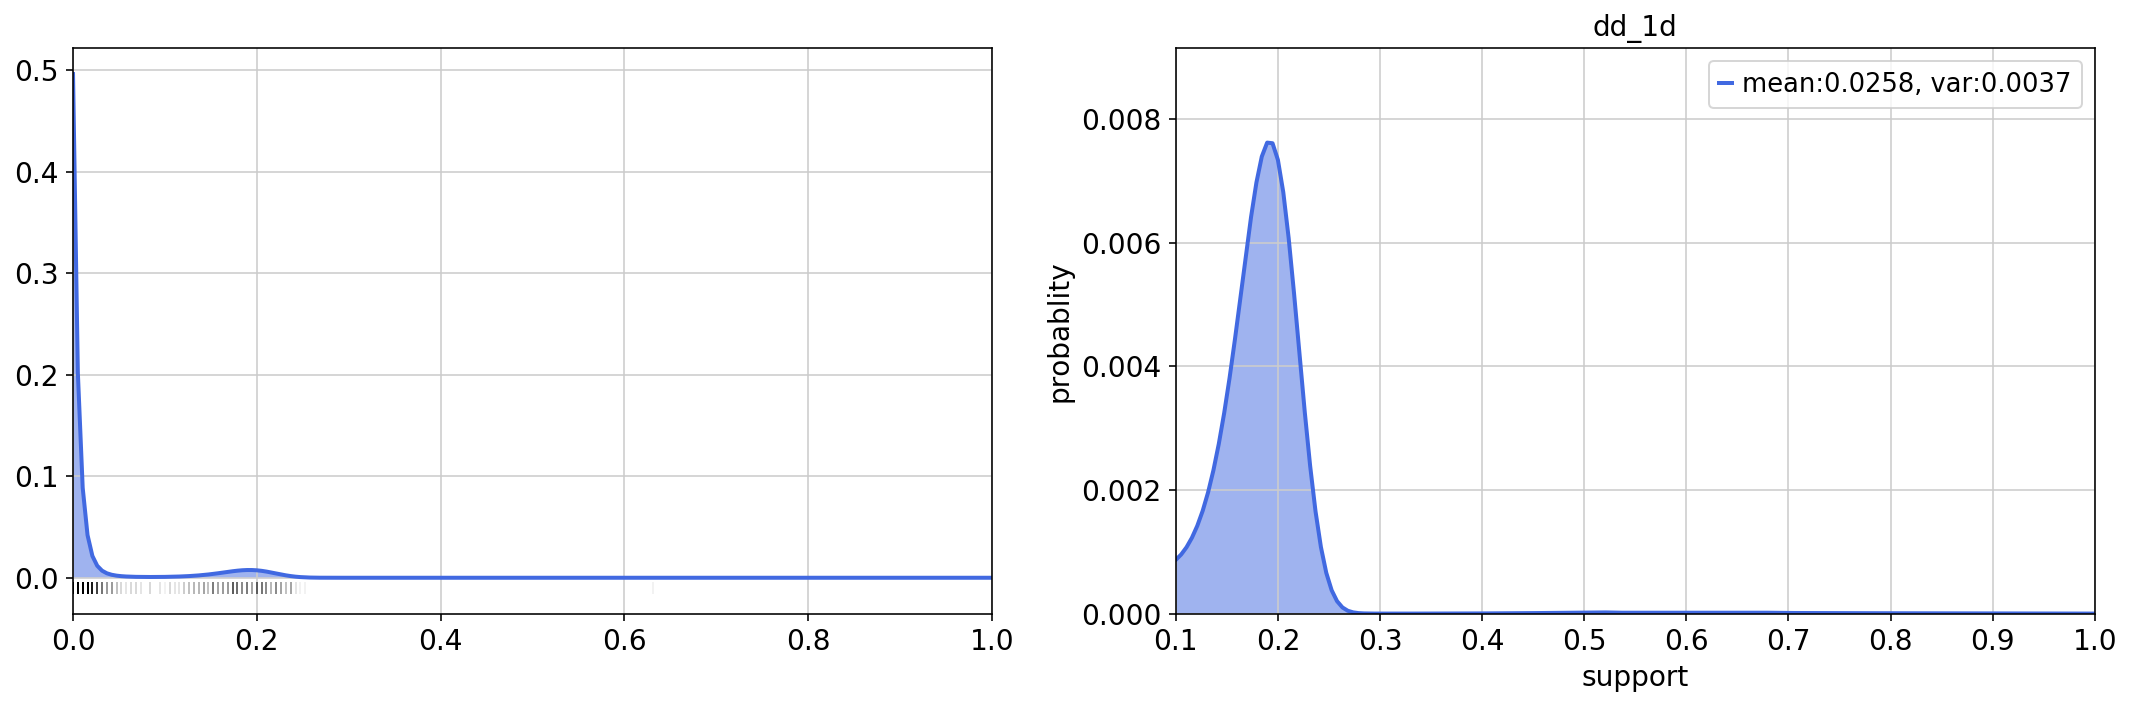

gamma: 42.0
-------------------------------------------------------------------------
CD3E
Average counts per cell = 1.6037465696217634


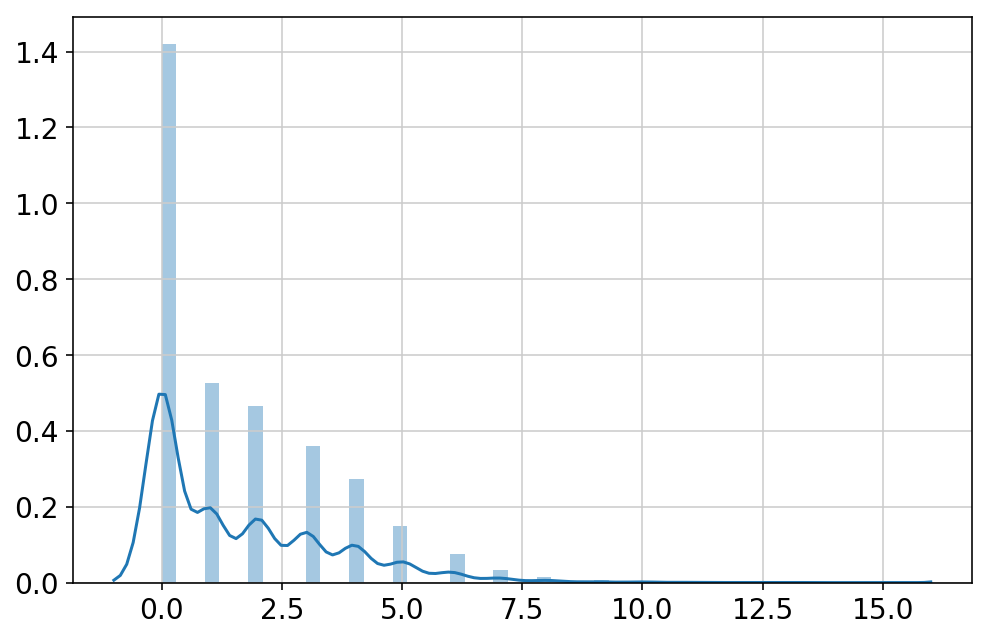

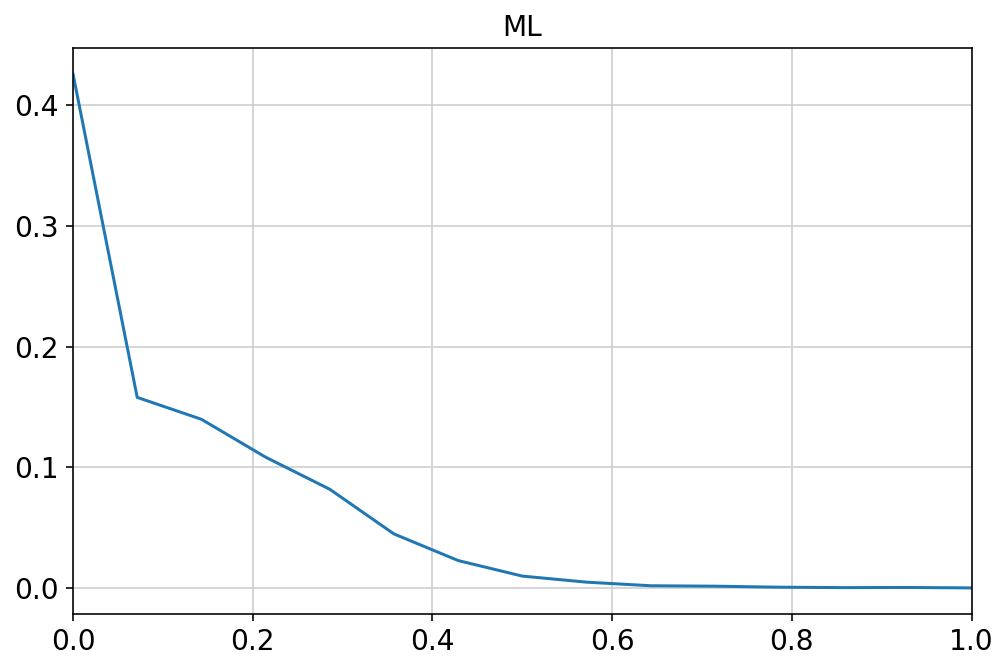

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 14

### debug: proportion separation ### start ###


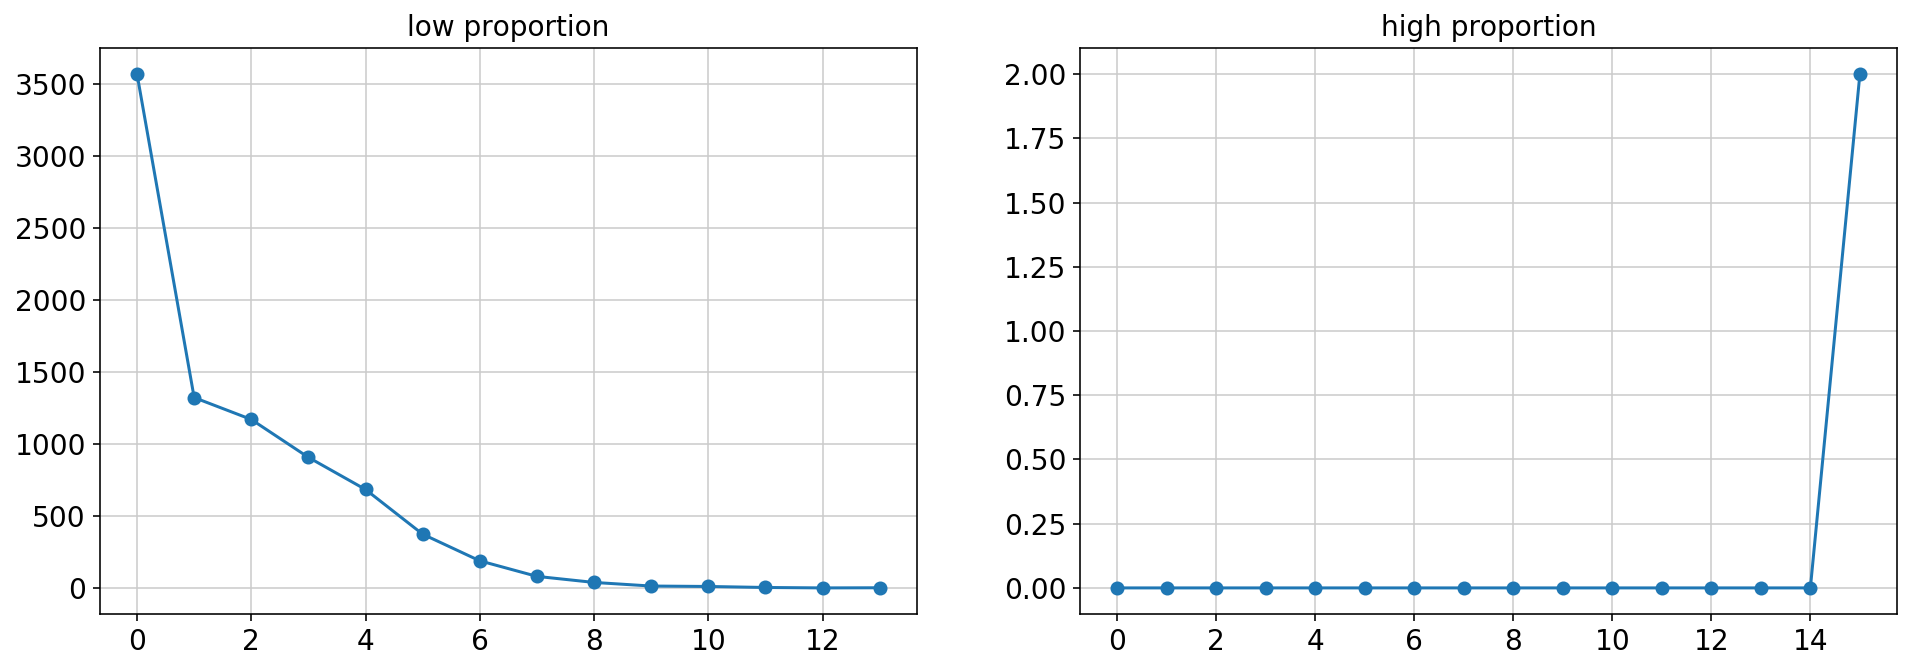

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
3.2545781465387336
-5.689643263639965
2.8360157795503937
0.9183592135642016
-1.3194271635263988
Close-form gradients
[ 3.25457872 -5.68964423  2.83601881  0.9183706  -1.3194239 ]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.7120668469739153, reg:0.003550274226023515
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  8.30579427   7.4469354    3.52633775  -5.62032945 -13.65874066]
gamma:14


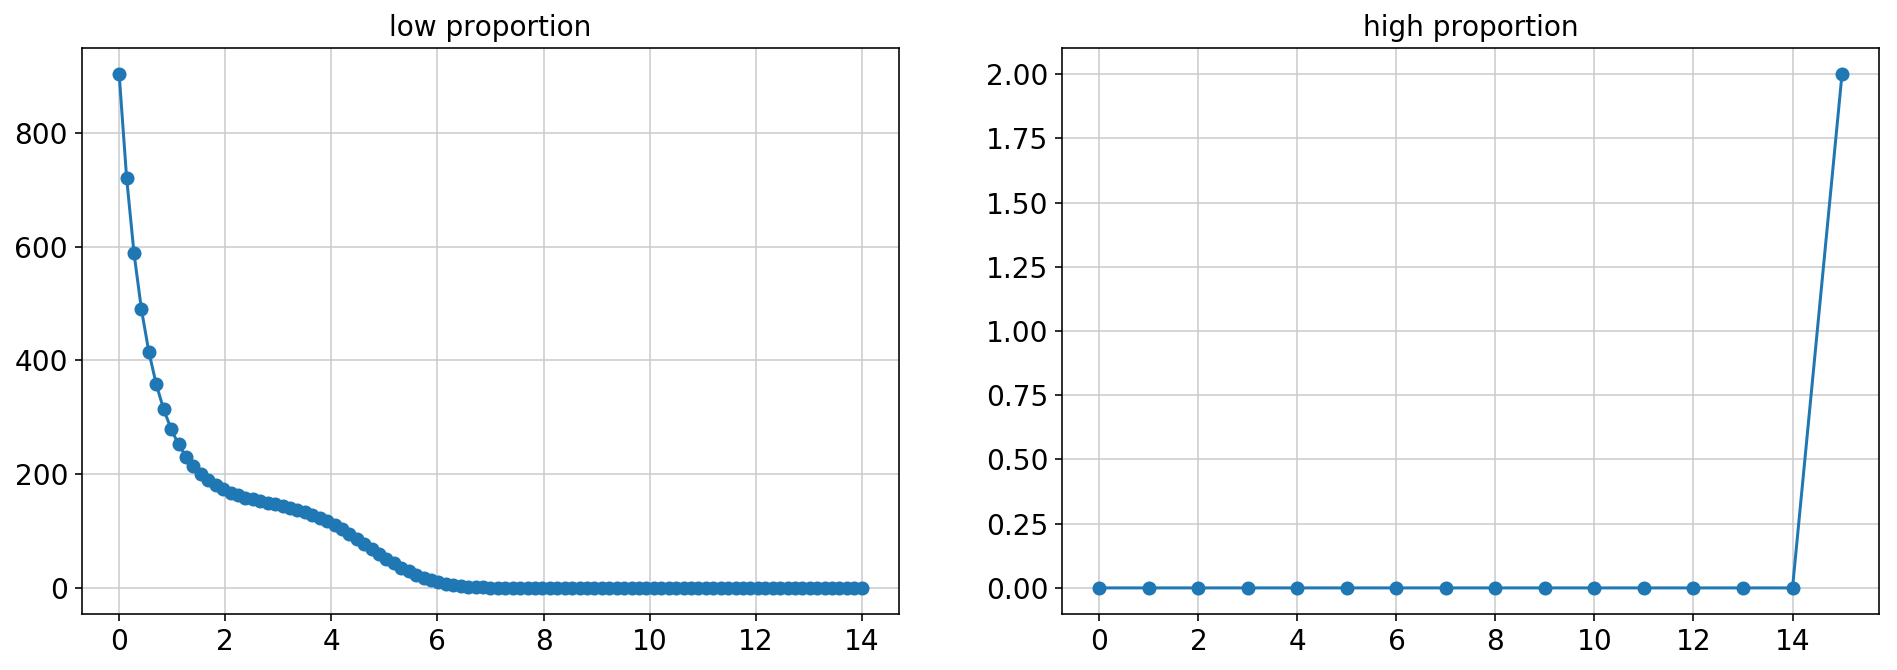

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:15.0


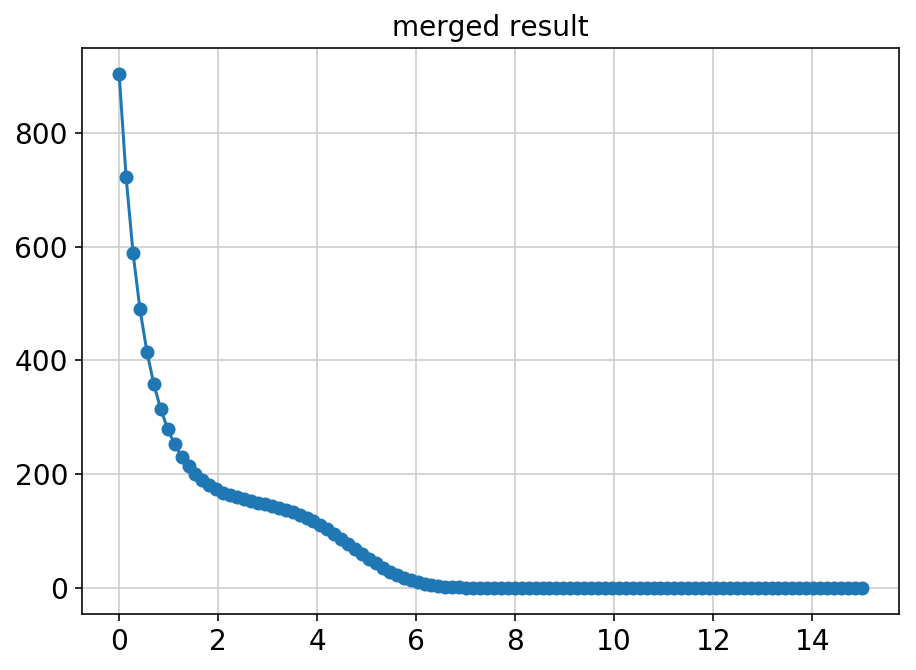

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 58.49%
>0.1: 43.09%
>0.15: 30.28%
>0.2: 21.15%
>0.25: 12.96%
>0.3: 5.381%
>0.35: 1.801%
>0.4: 0.395%


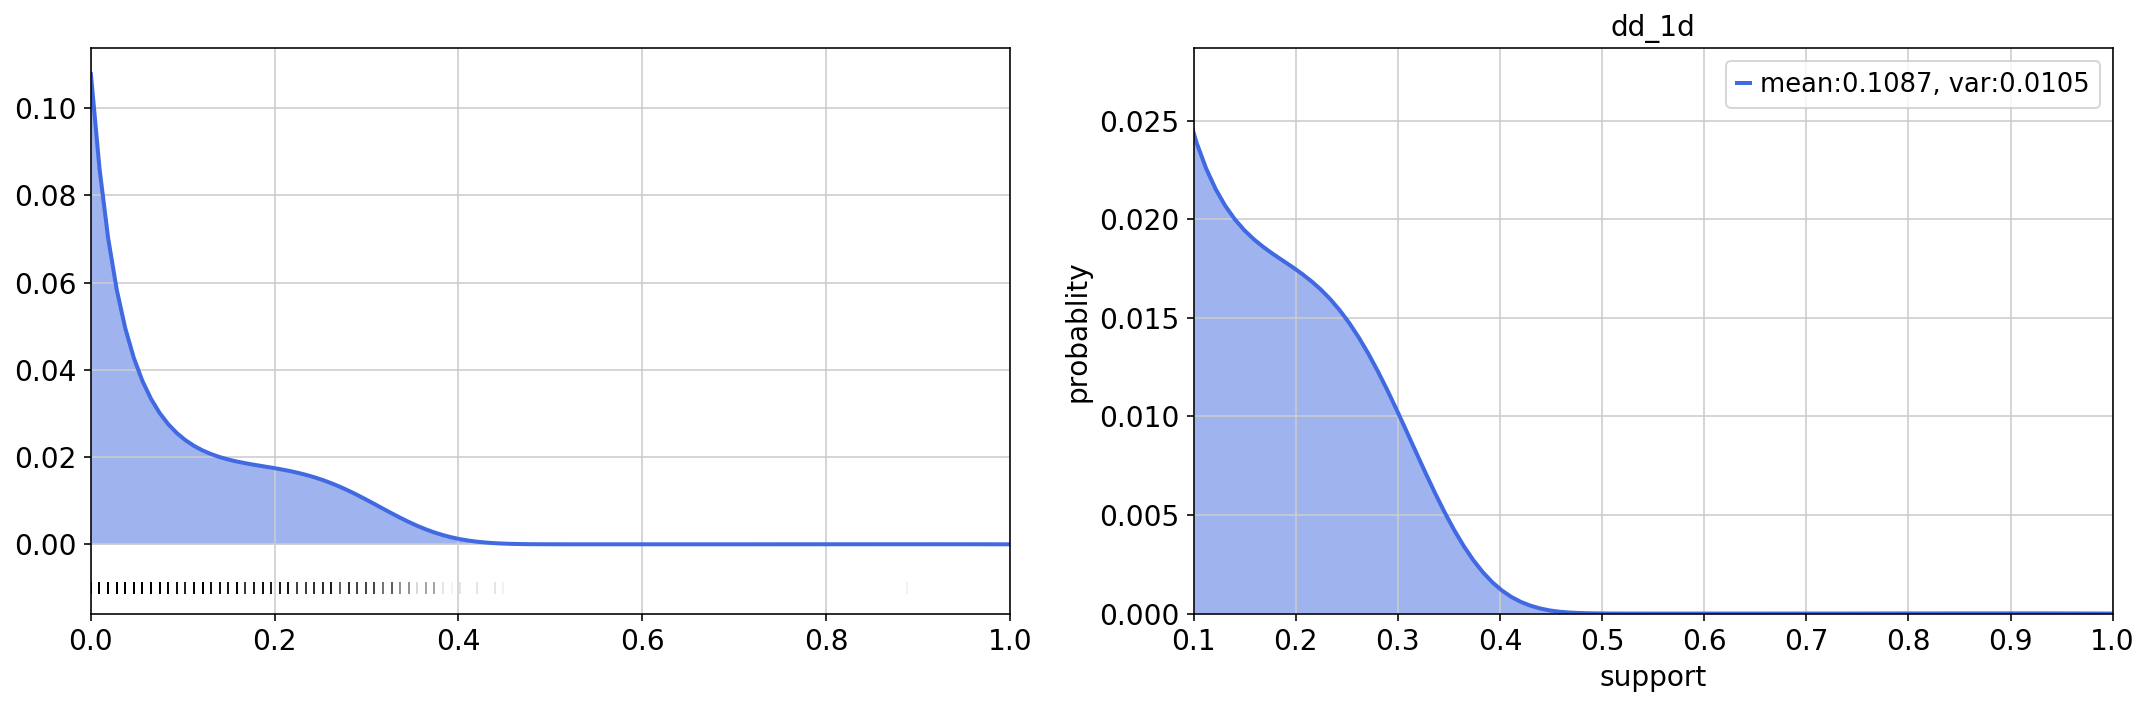

gamma: 15.0
-------------------------------------------------------------------------
LYZ
Average counts per cell = 17.511156186612578


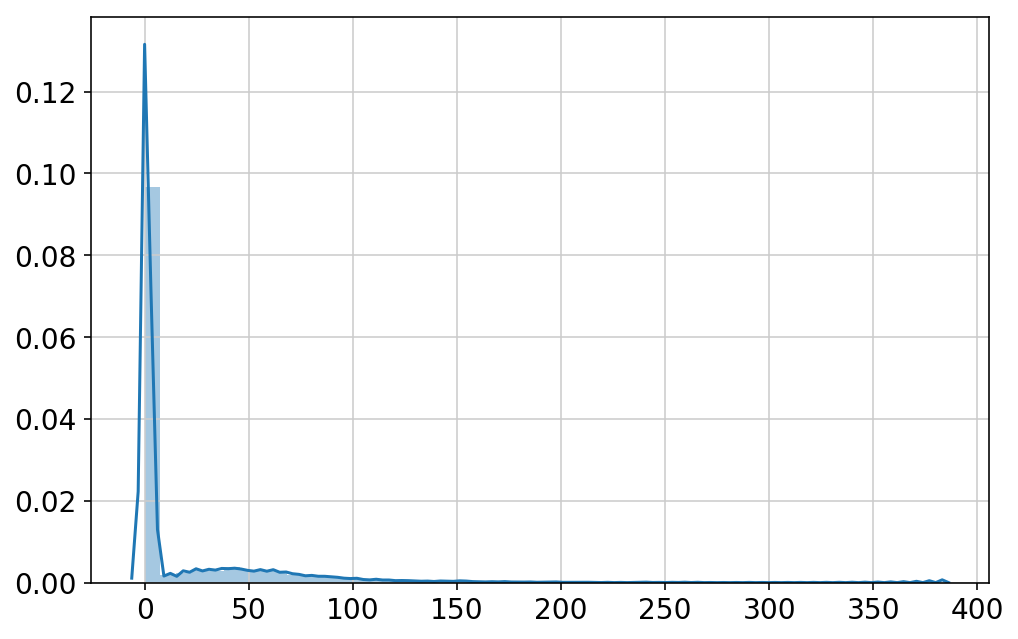

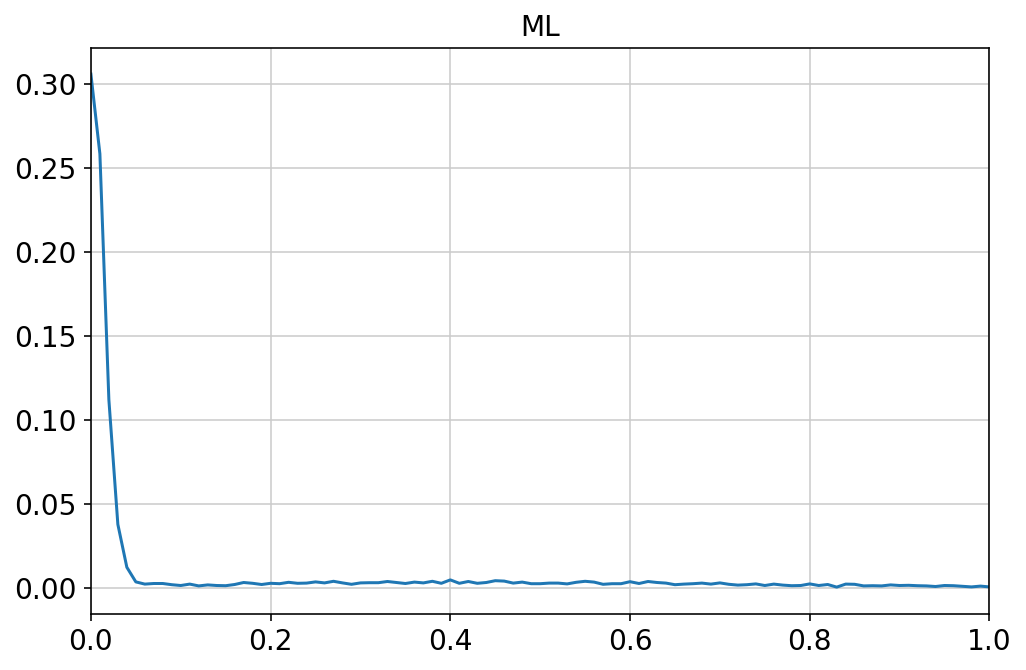

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


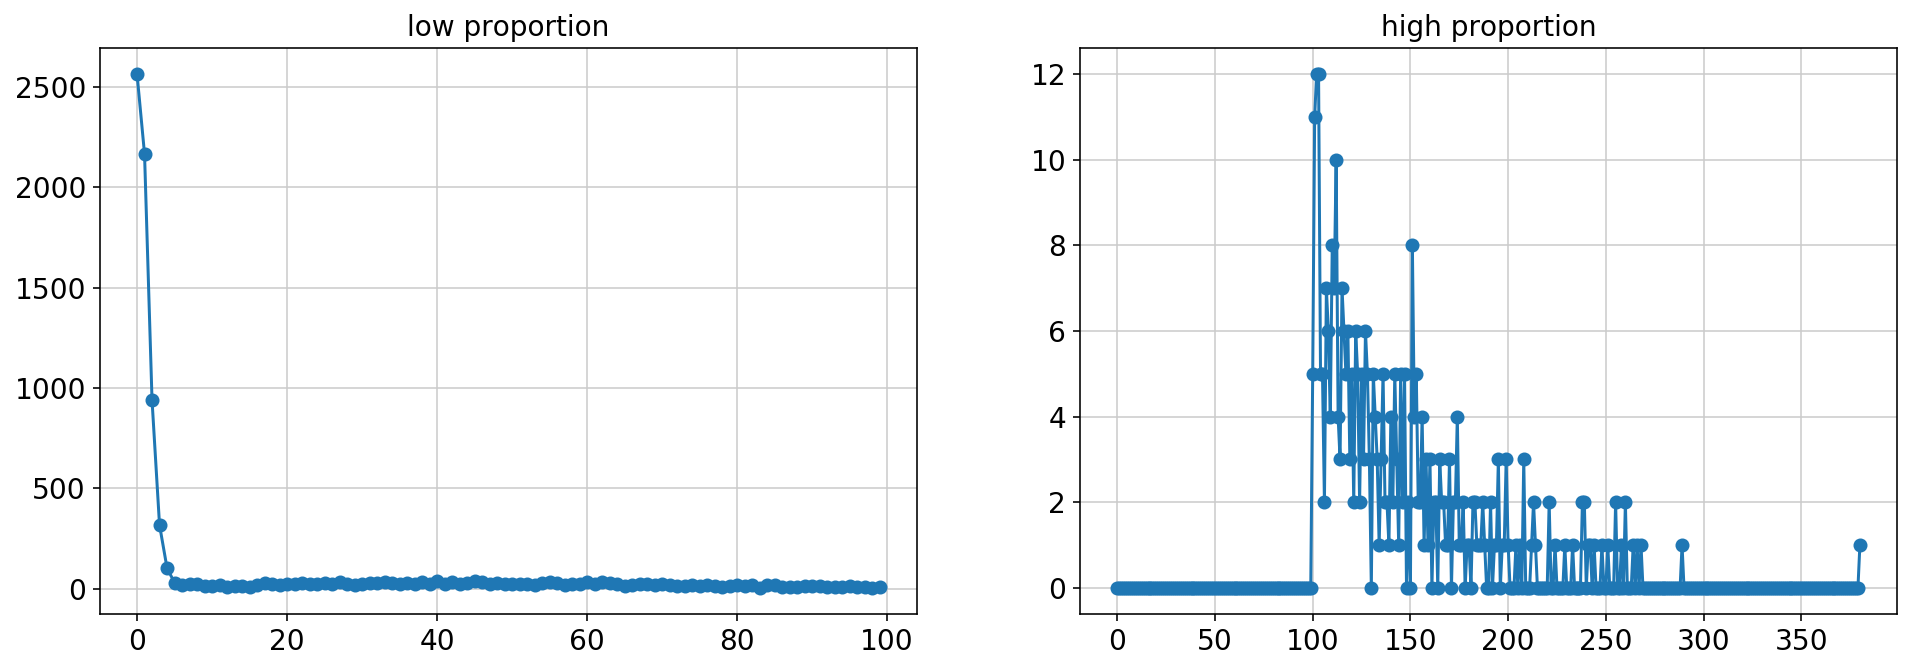

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.129642571295335
-12.339133277805558
8.077351393964705
-0.6924935576080316
-1.1755054440953927
Close-form gradients
[  6.12964568 -12.33912236   8.07736082  -0.69248193  -1.17550222]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.7756333451540454, reg:3.758960289021405e-05
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [-1.15859412  0.03982804  1.24949818  0.58472611 -0.71546024]
gamma:100


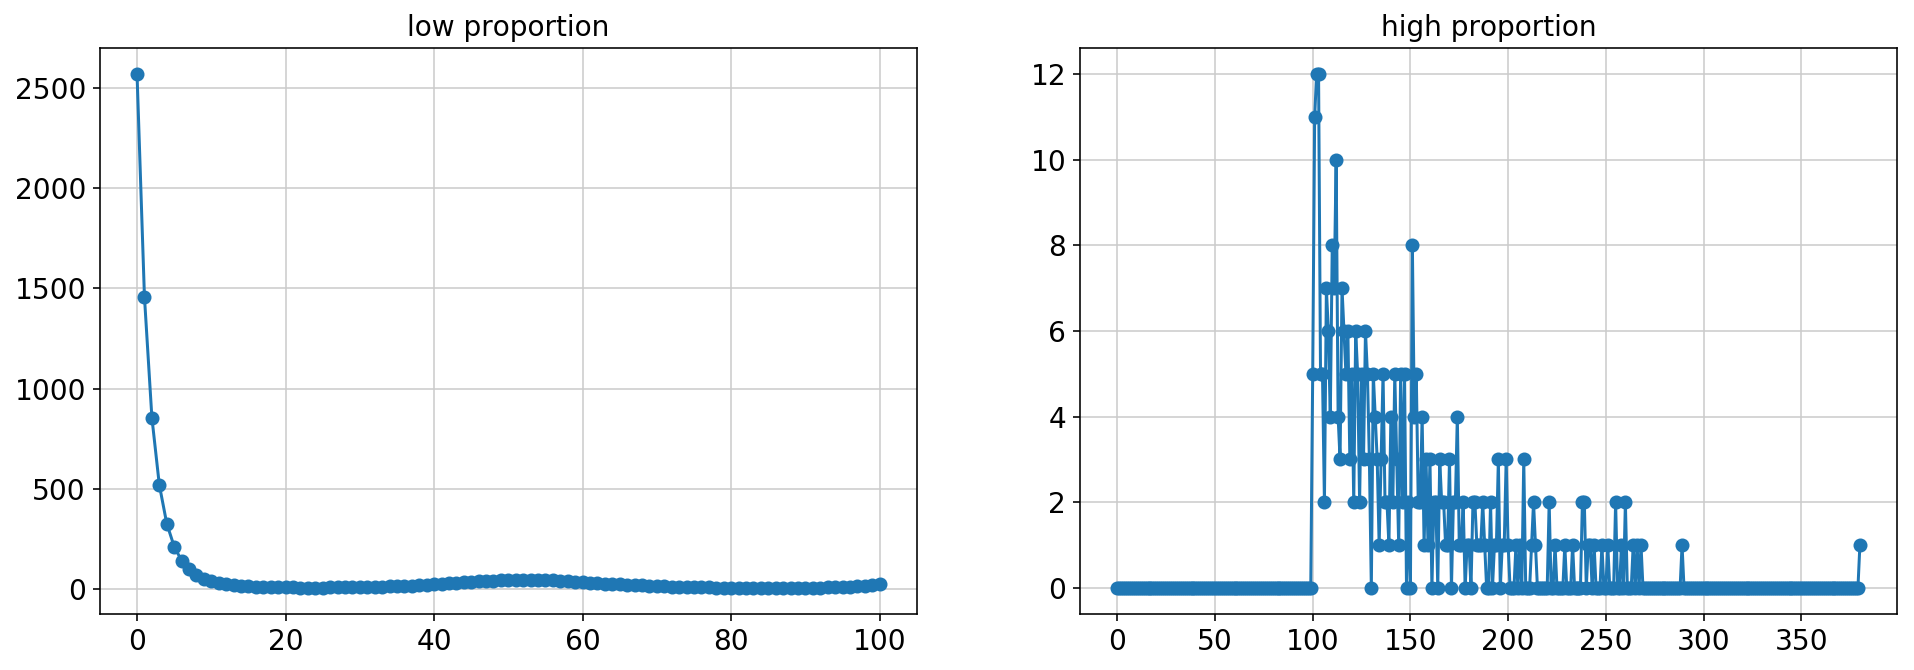

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:380.0


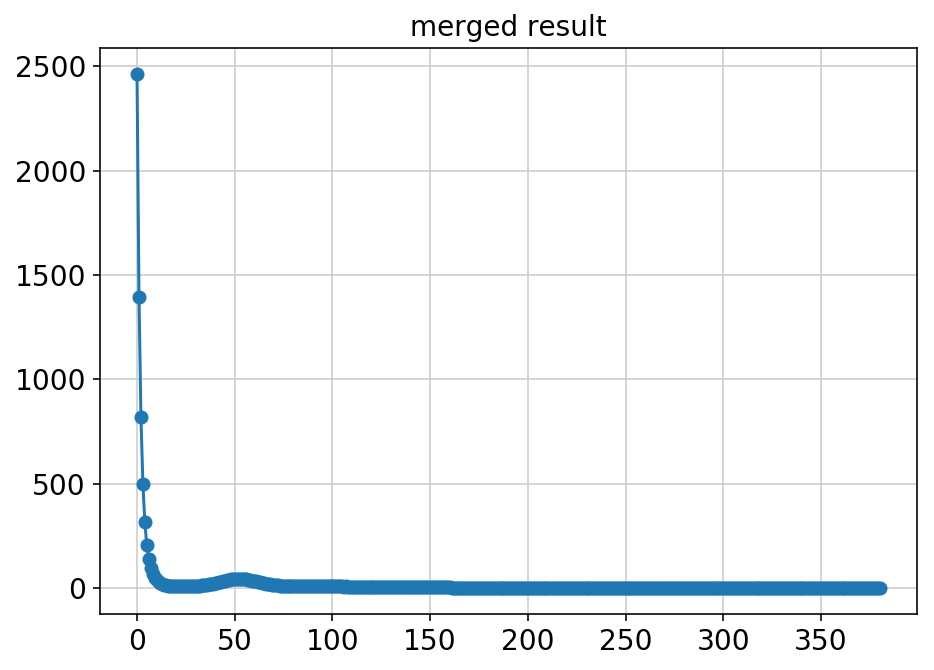

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 22.63%
>0.1: 20.17%
>0.15: 11.51%
>0.2: 6.629%
>0.25: 4.728%
>0.3: 2.955%
>0.35: 1.986%
>0.4: 1.295%


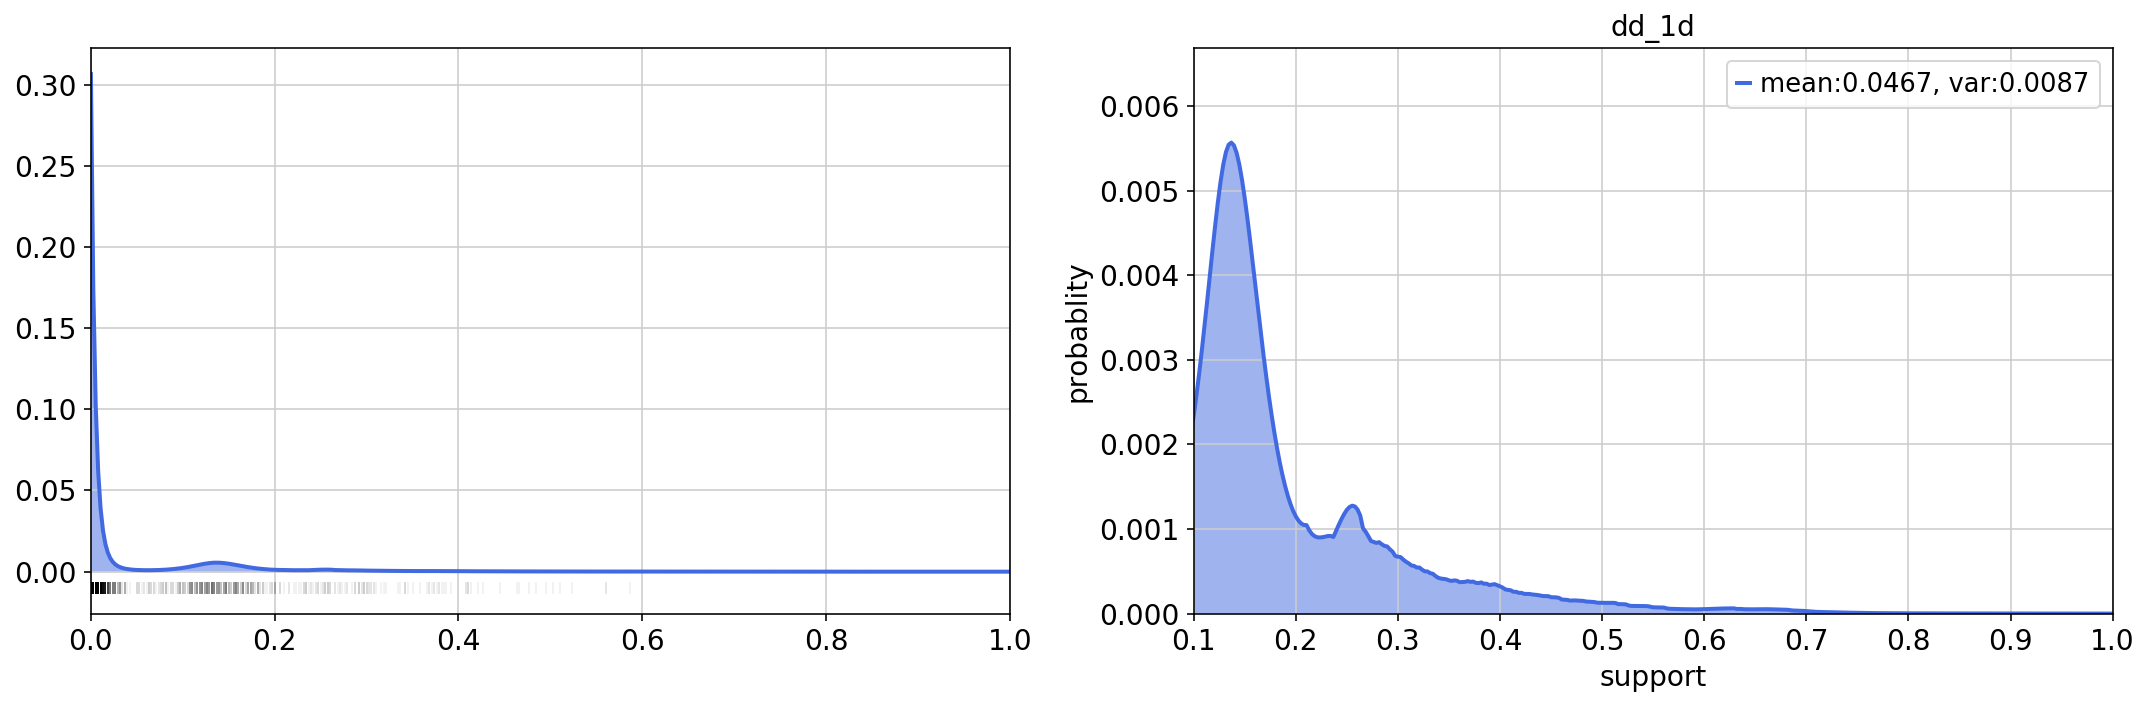

gamma: 380.0
-------------------------------------------------------------------------
MS4A1
Average counts per cell = 0.65481446128147


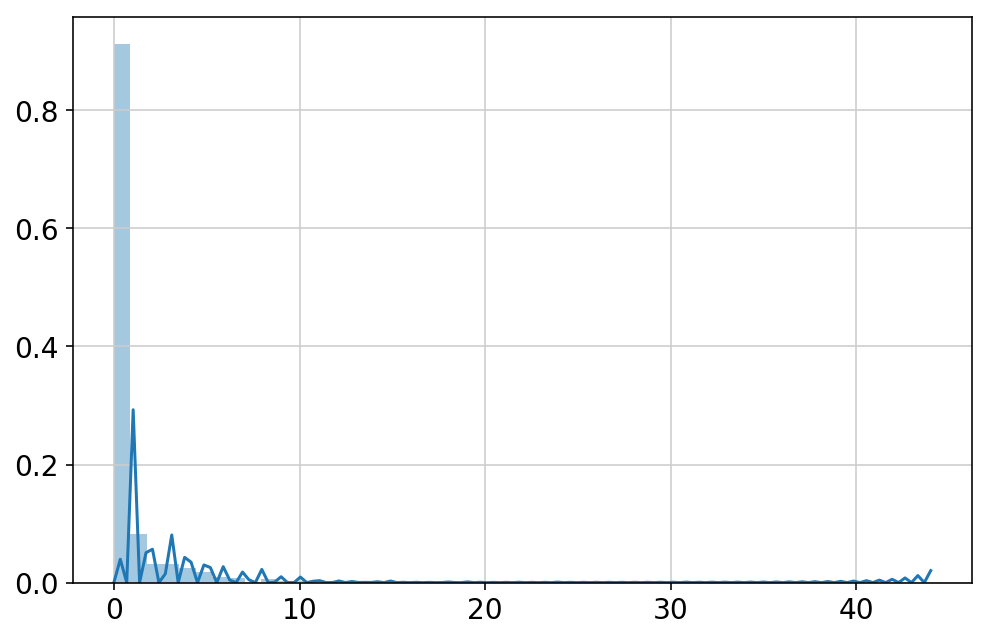

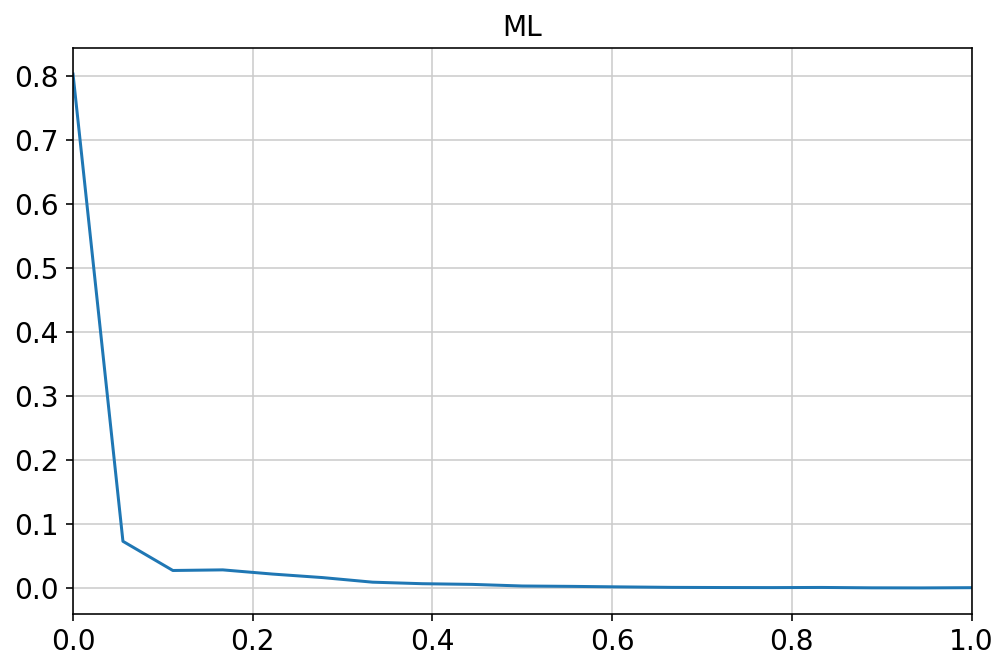

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 18

### debug: proportion separation ### start ###


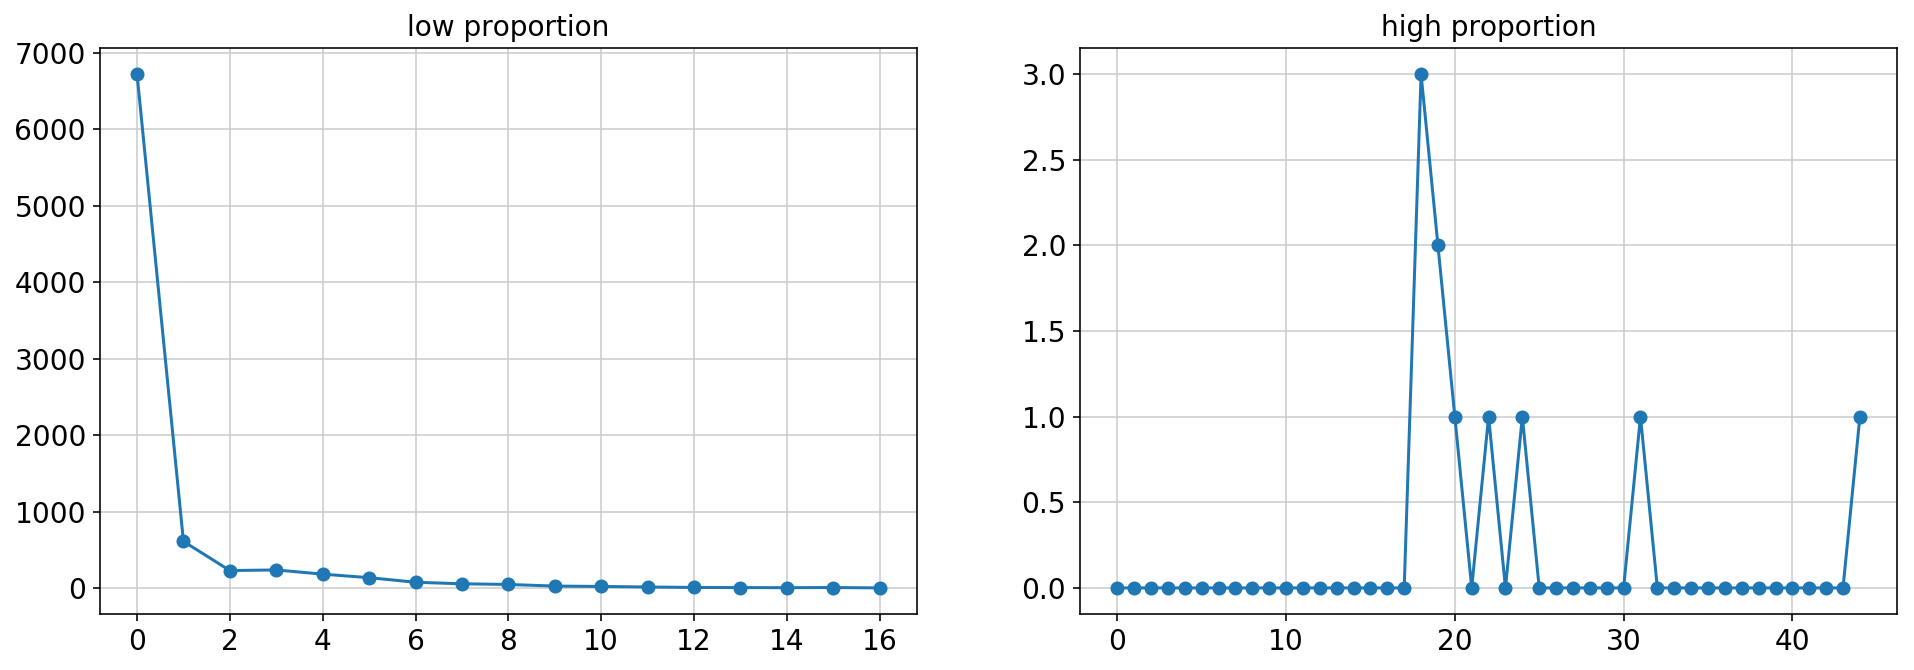

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
5.7508837496556
-11.03828682769148
6.778030150034198
-0.13465501558229676
-1.3560885223640184
Close-form gradients
[  5.75088448 -11.0382883    6.77803248  -0.13464346  -1.35608519]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.8971196821670986, reg:0.005632042684442825
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  7.81083175   9.55569409   6.7232805   -5.93626297 -18.17806831]
gamma:18


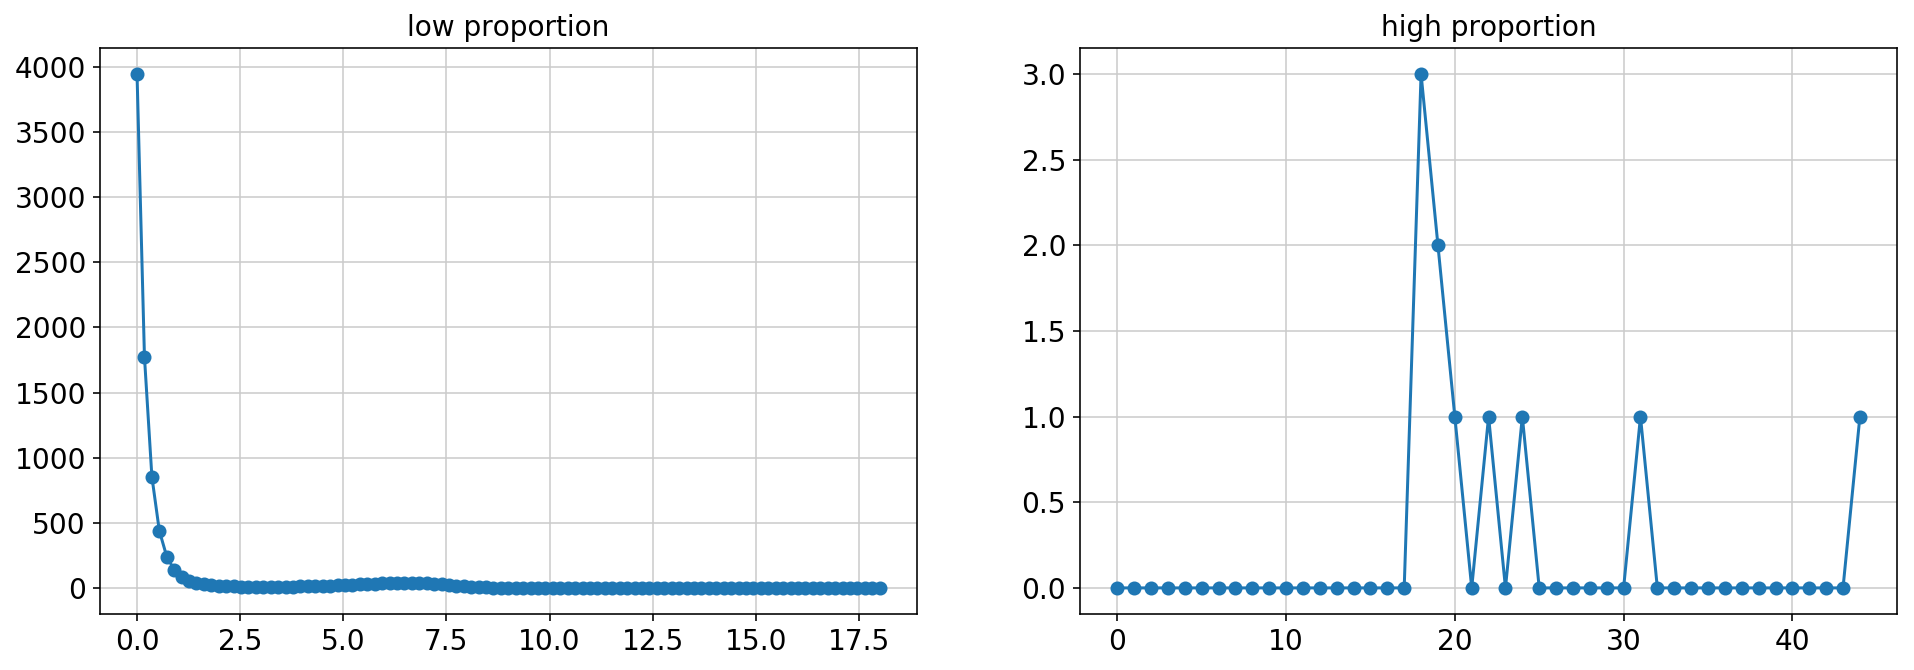

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:44.0


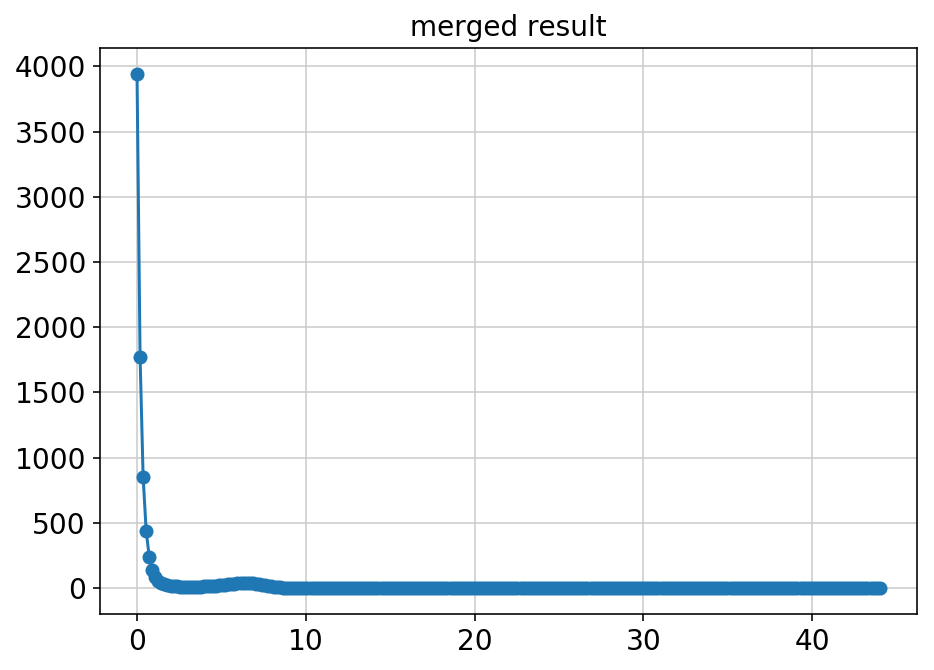

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 8.647%
>0.1: 7.106%
>0.15: 3.028%
>0.2: 0.167%
>0.25: 0.127%
>0.3: 0.124%
>0.35: 0.112%
>0.4: 0.085%


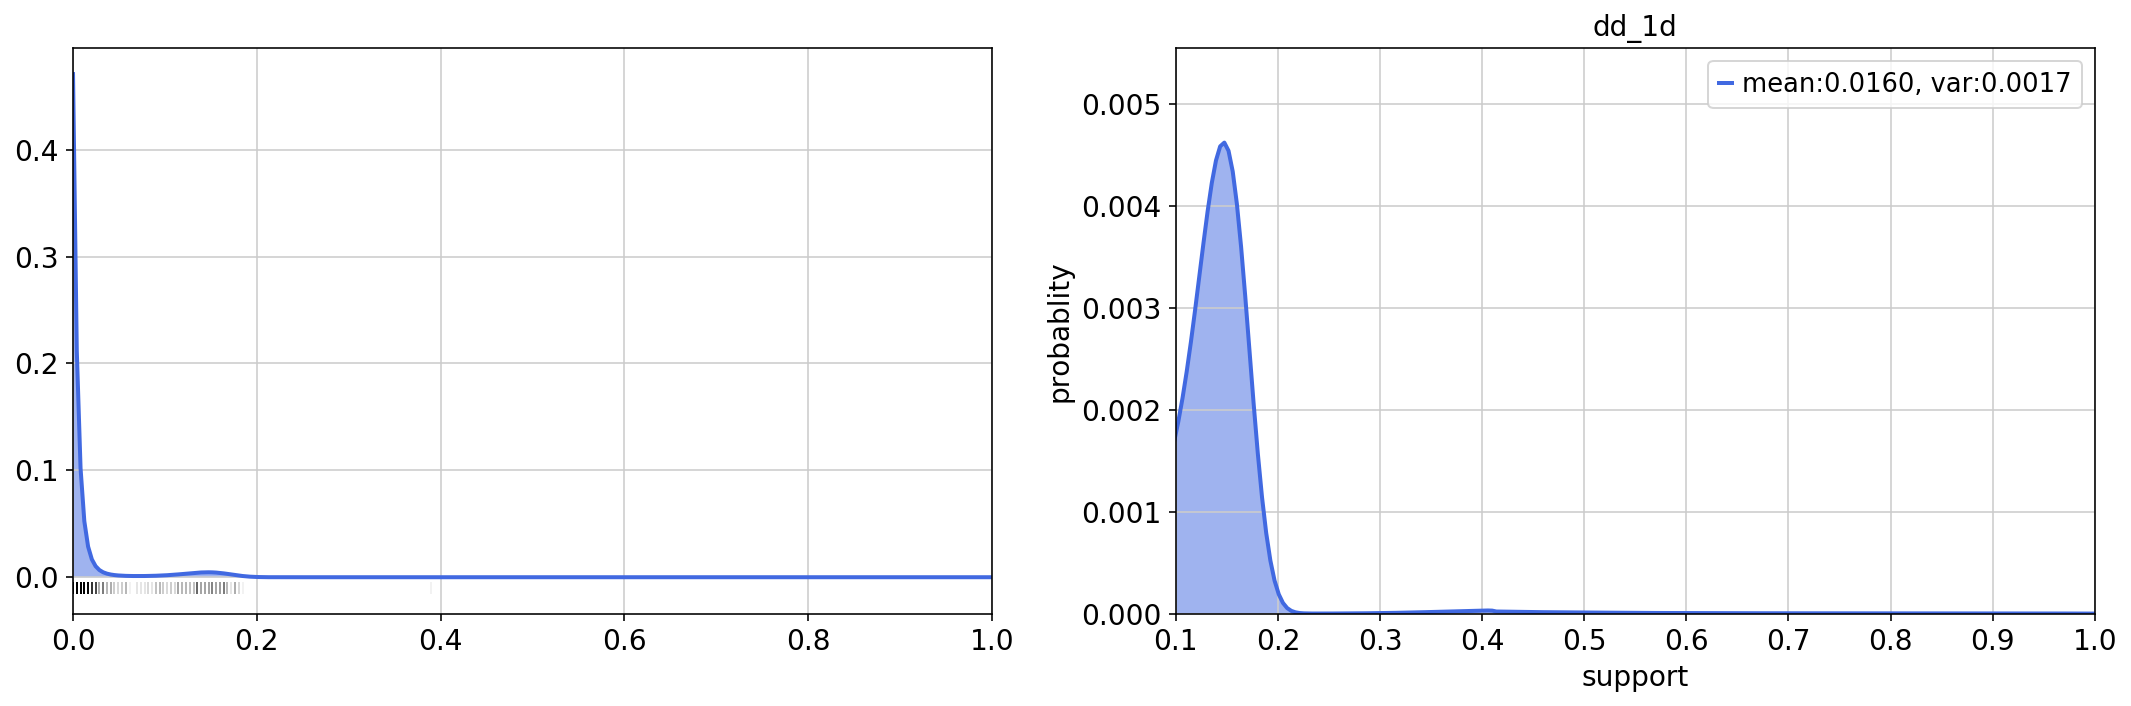

gamma: 44.0
-------------------------------------------------------------------------
GNLY
Average counts per cell = 1.9725569741081017


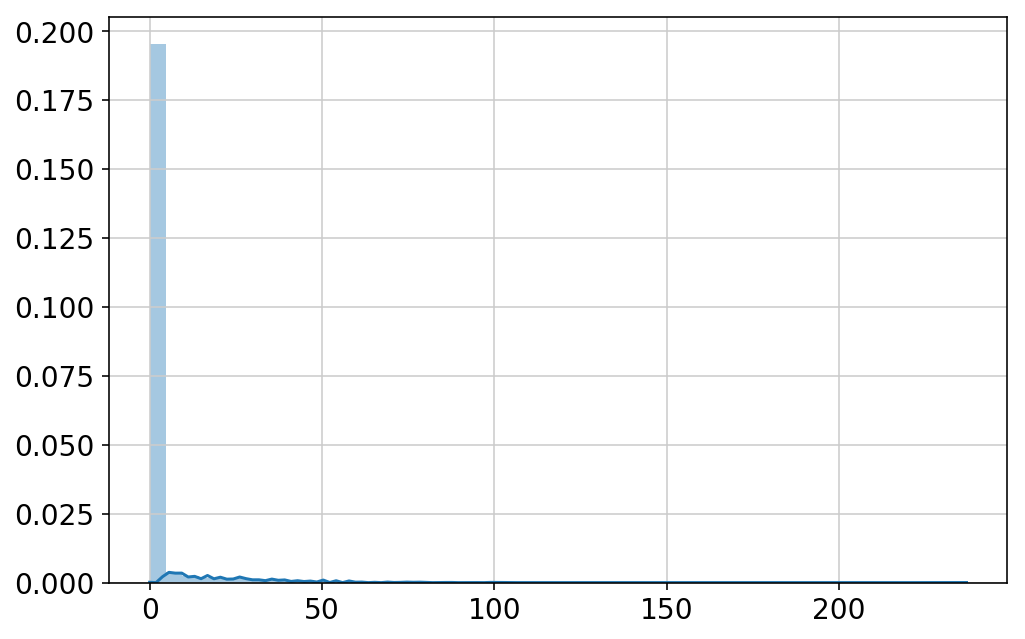

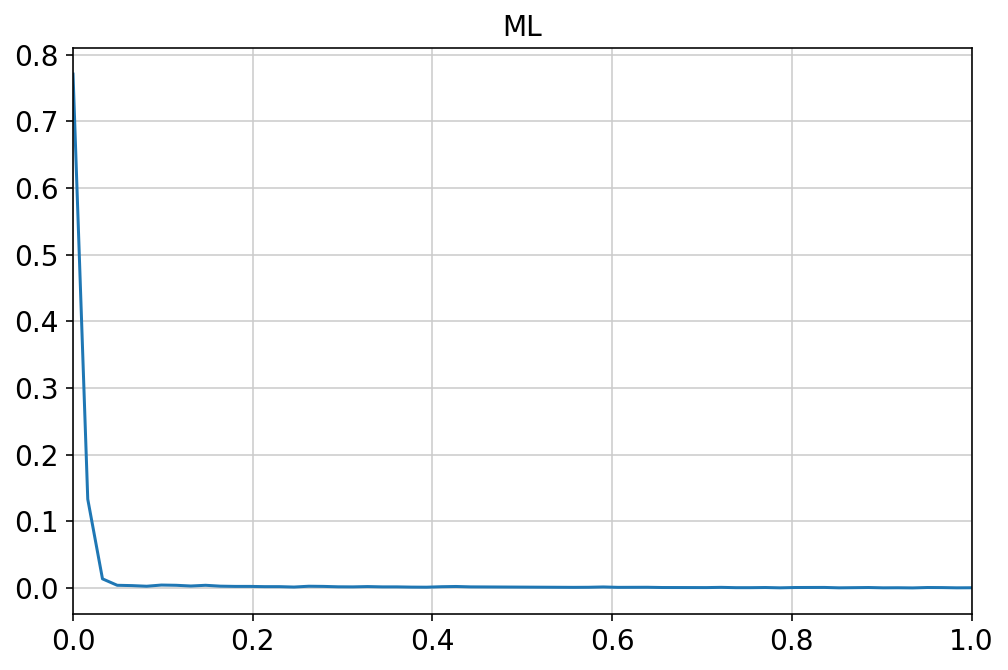

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 61

### debug: proportion separation ### start ###


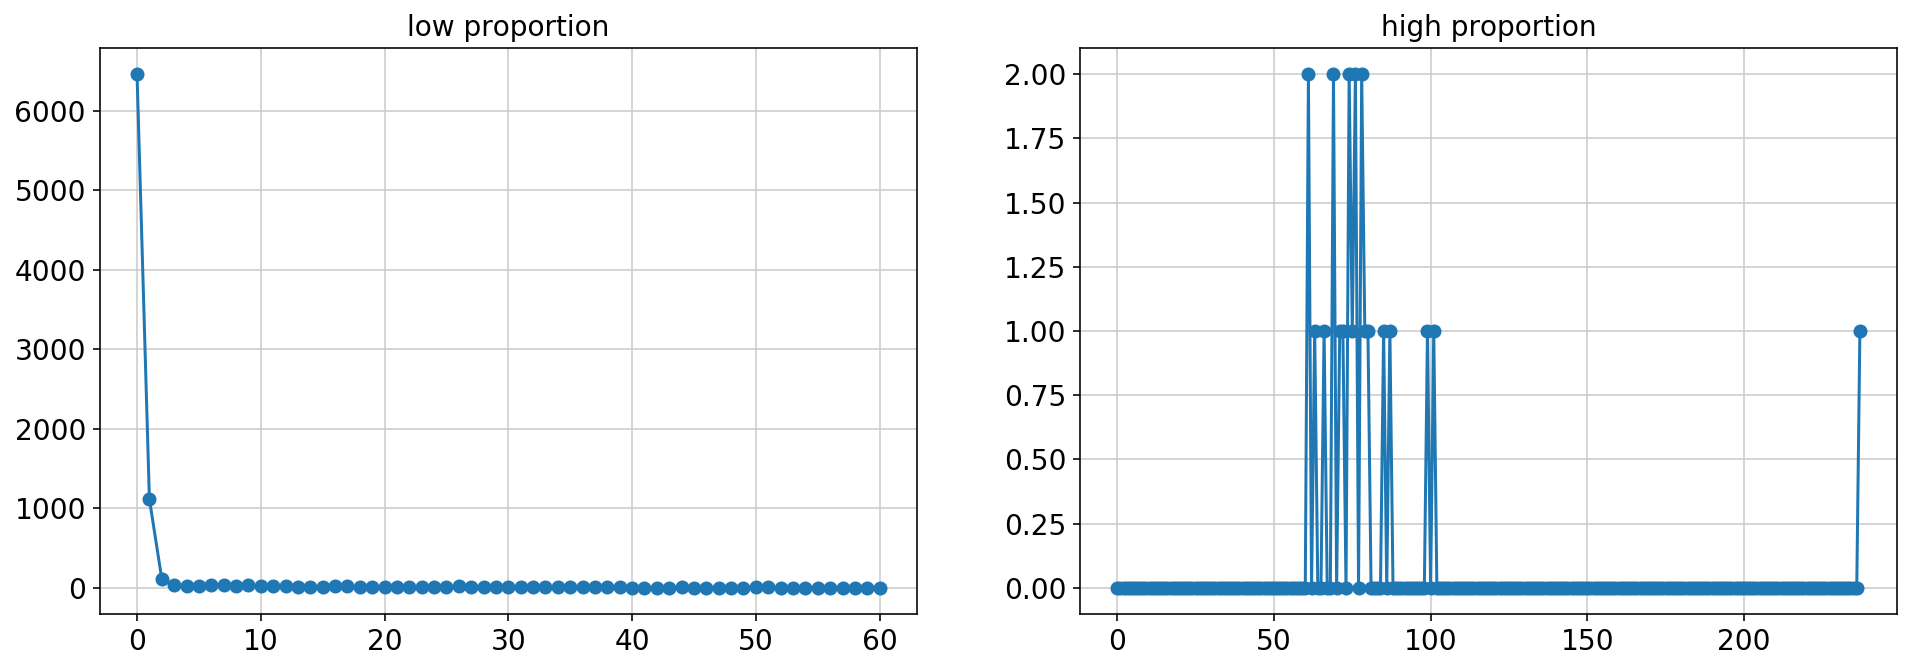

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
7.760593190742071
-15.69827248681932
10.43943234257938
-1.1599896447833657
-1.3419000999270736
Close-form gradients
[  7.76059607 -15.69826289  10.43944119  -1.15997761  -1.34189677]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.1012661061398383, reg:0.003037937198473605
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  3.52839349   6.90101896   6.55504468  -3.45922695 -13.73991393]
gamma:61


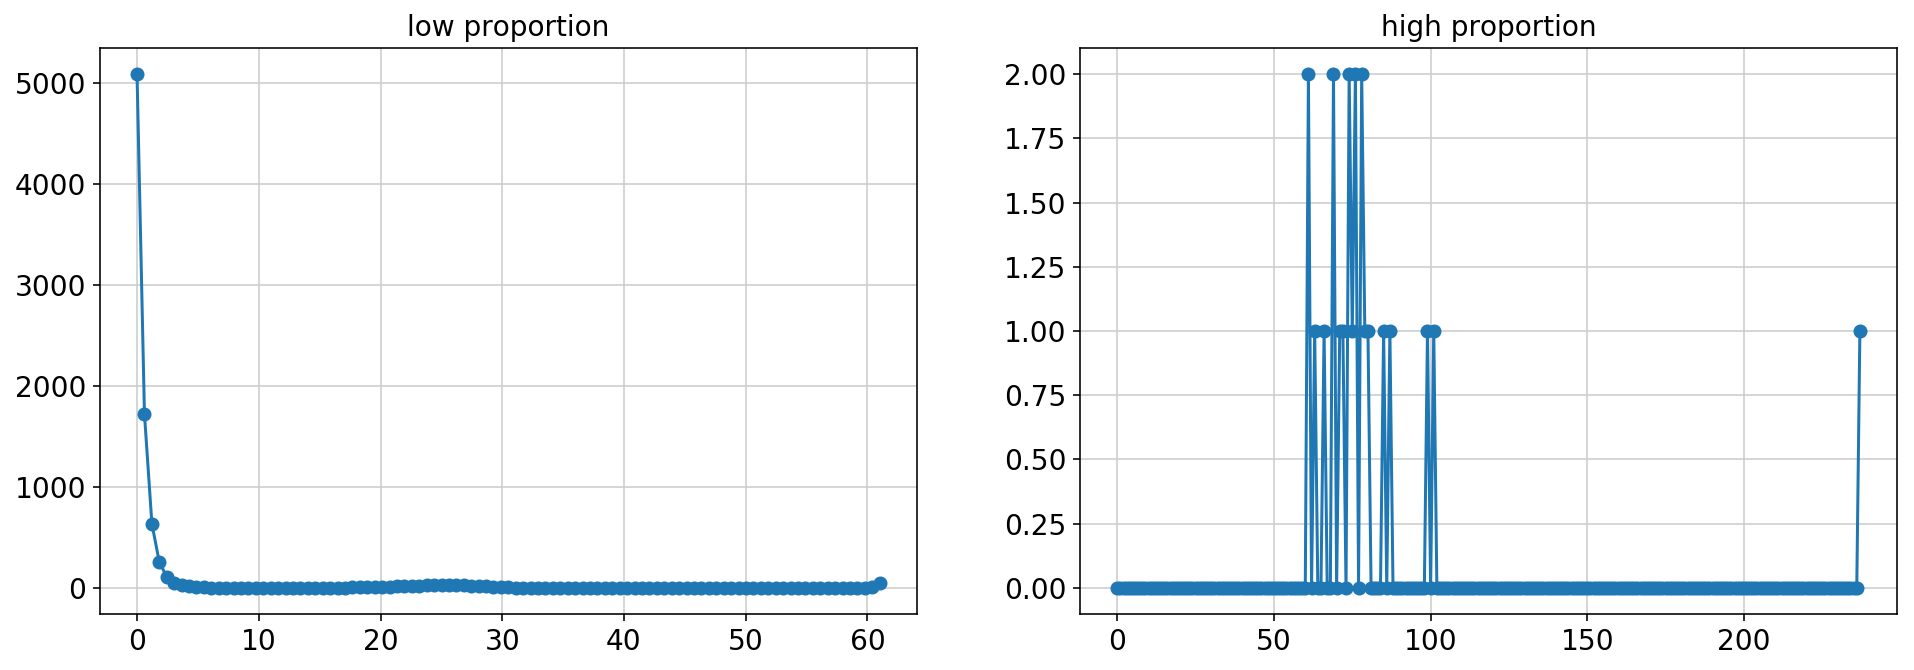

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:237.0


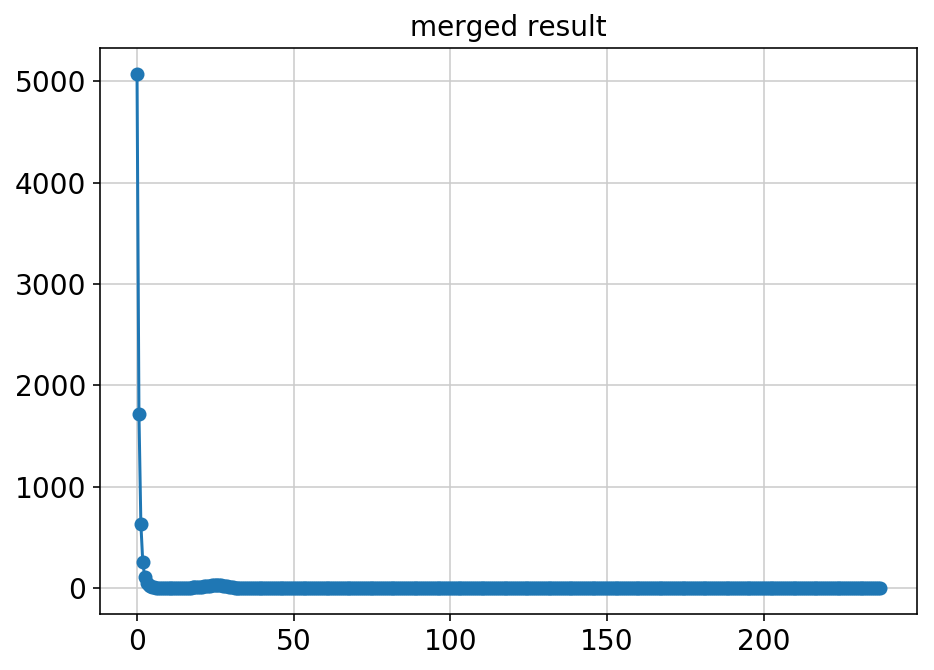

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 5.408%
>0.1: 3.773%
>0.15: 0.921%
>0.2: 0.918%
>0.25: 0.615%
>0.3: 0.213%
>0.35: 0.080%
>0.4: 0.034%


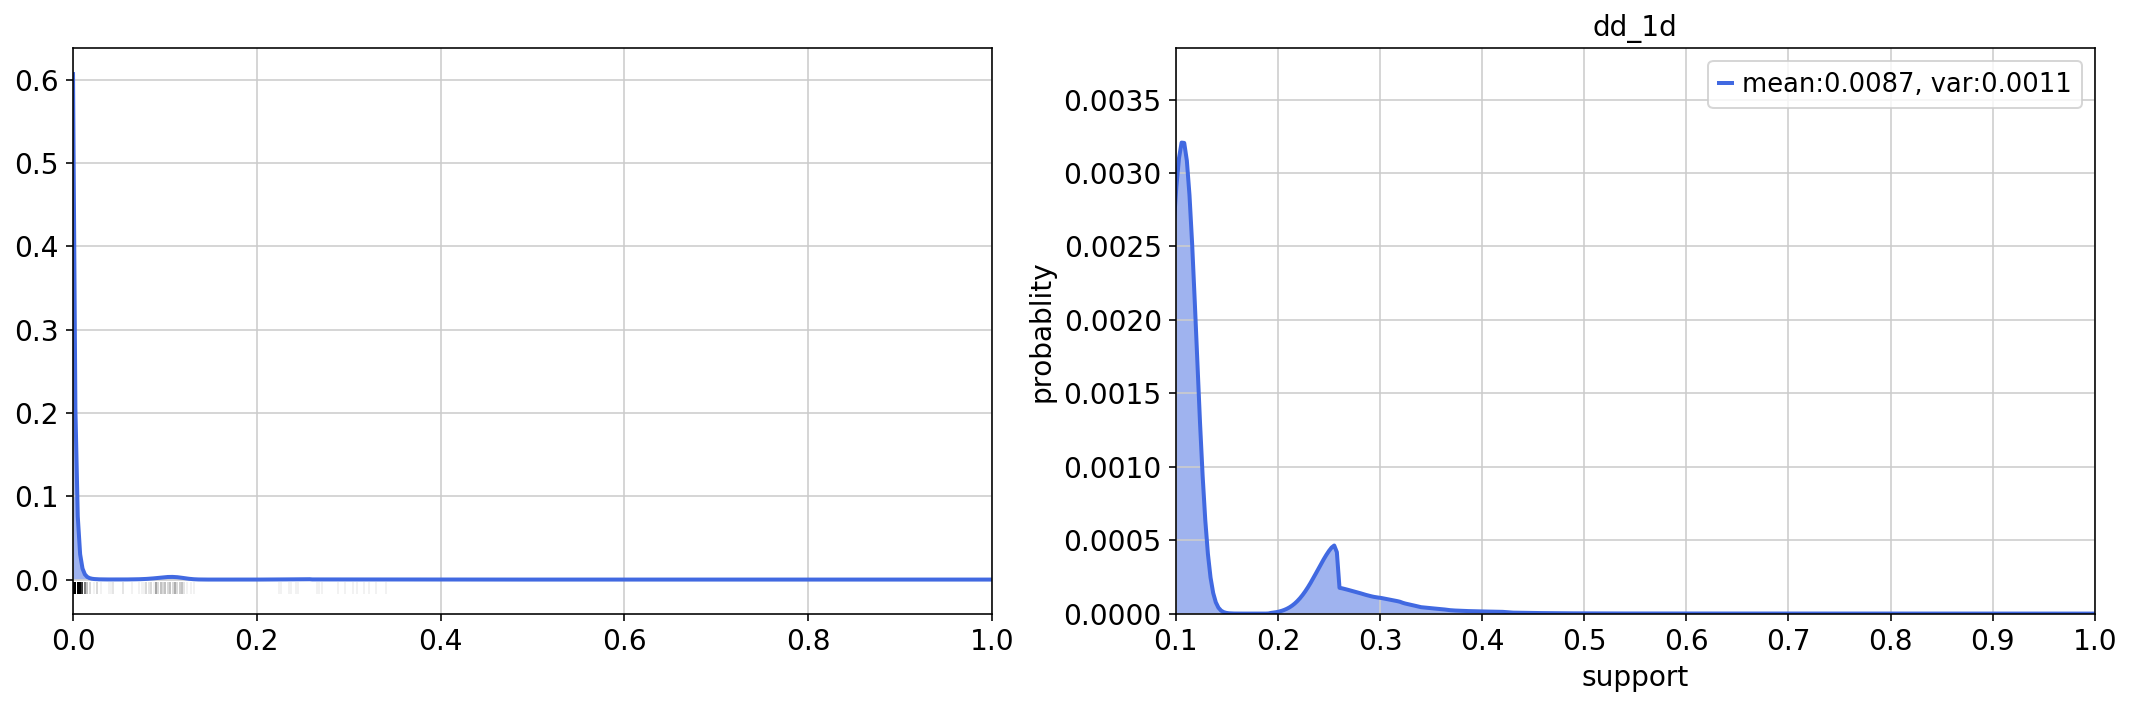

gamma: 237.0
-------------------------------------------------------------------------
FGFBP2
Average counts per cell = 0.2930437895239232


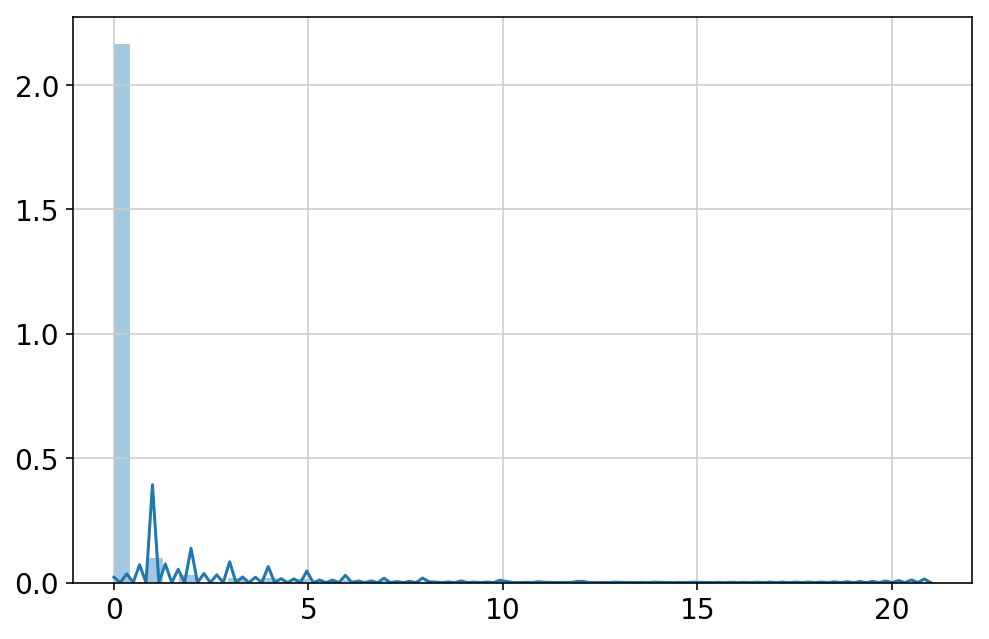

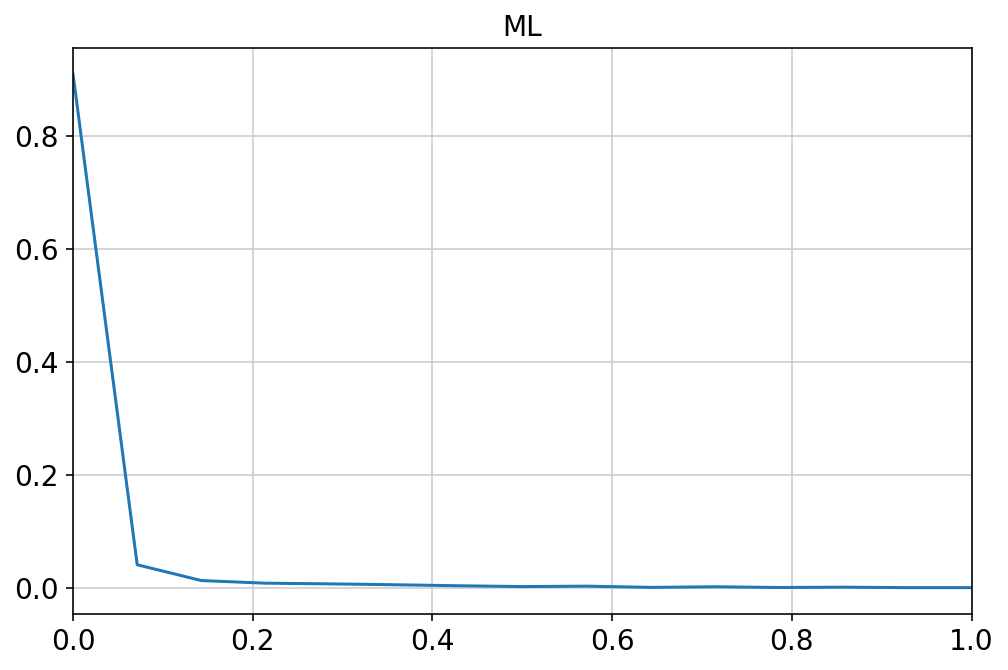

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 14

### debug: proportion separation ### start ###


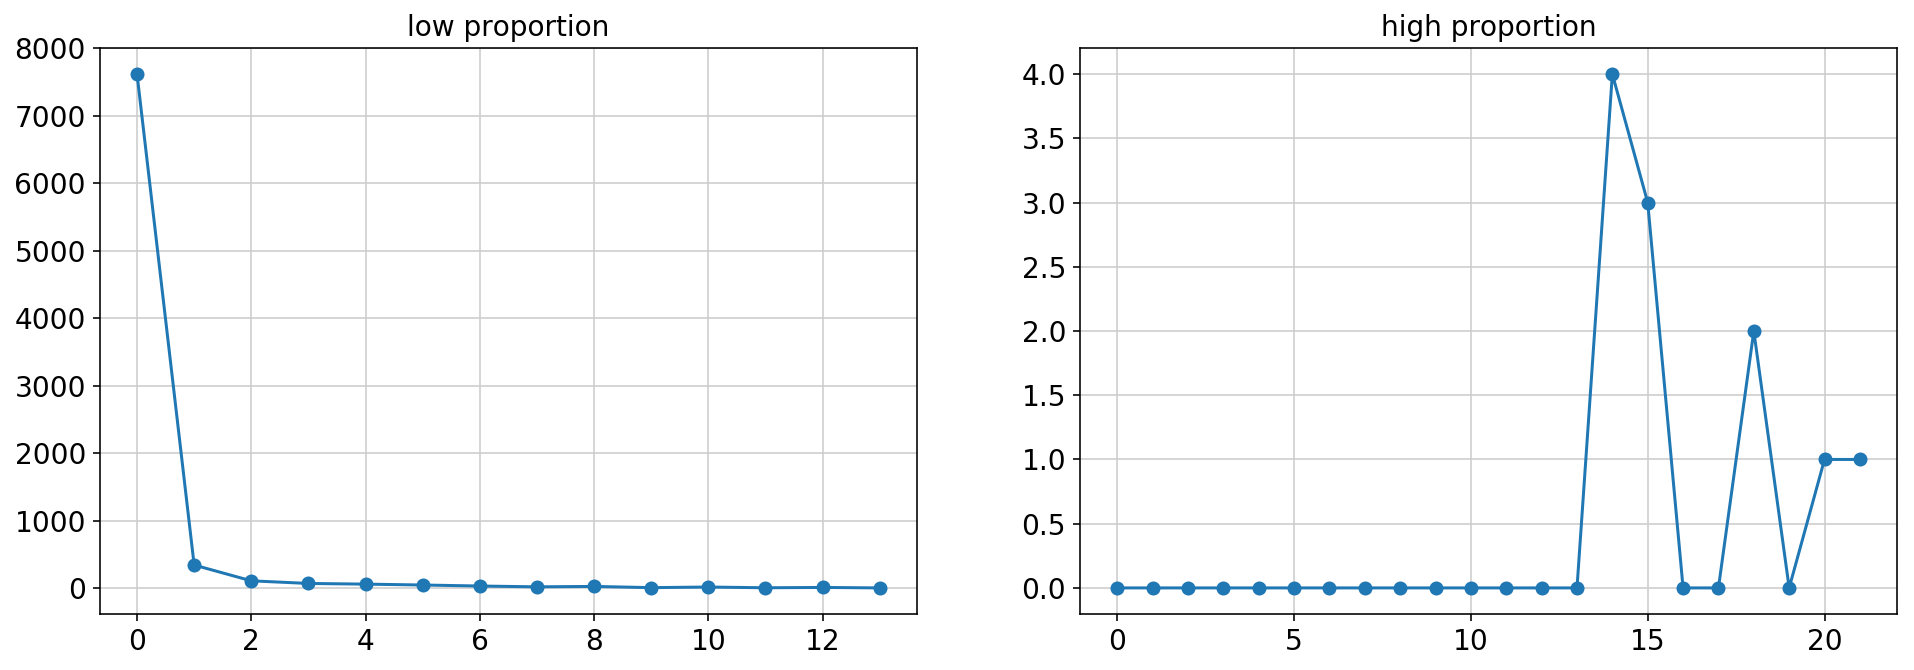

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
5.6655871780719735
-10.80949933163211
6.586514512907371
-0.09224080121938982
-1.350470080208055
Close-form gradients
[  5.66558703 -10.80950514   6.58651434  -0.09222948  -1.35046676]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.47480379477088247, reg:0.0016035013414182834
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  0.84808425   4.71614594   5.88521437  -1.42370233 -10.03624323]
gamma:14


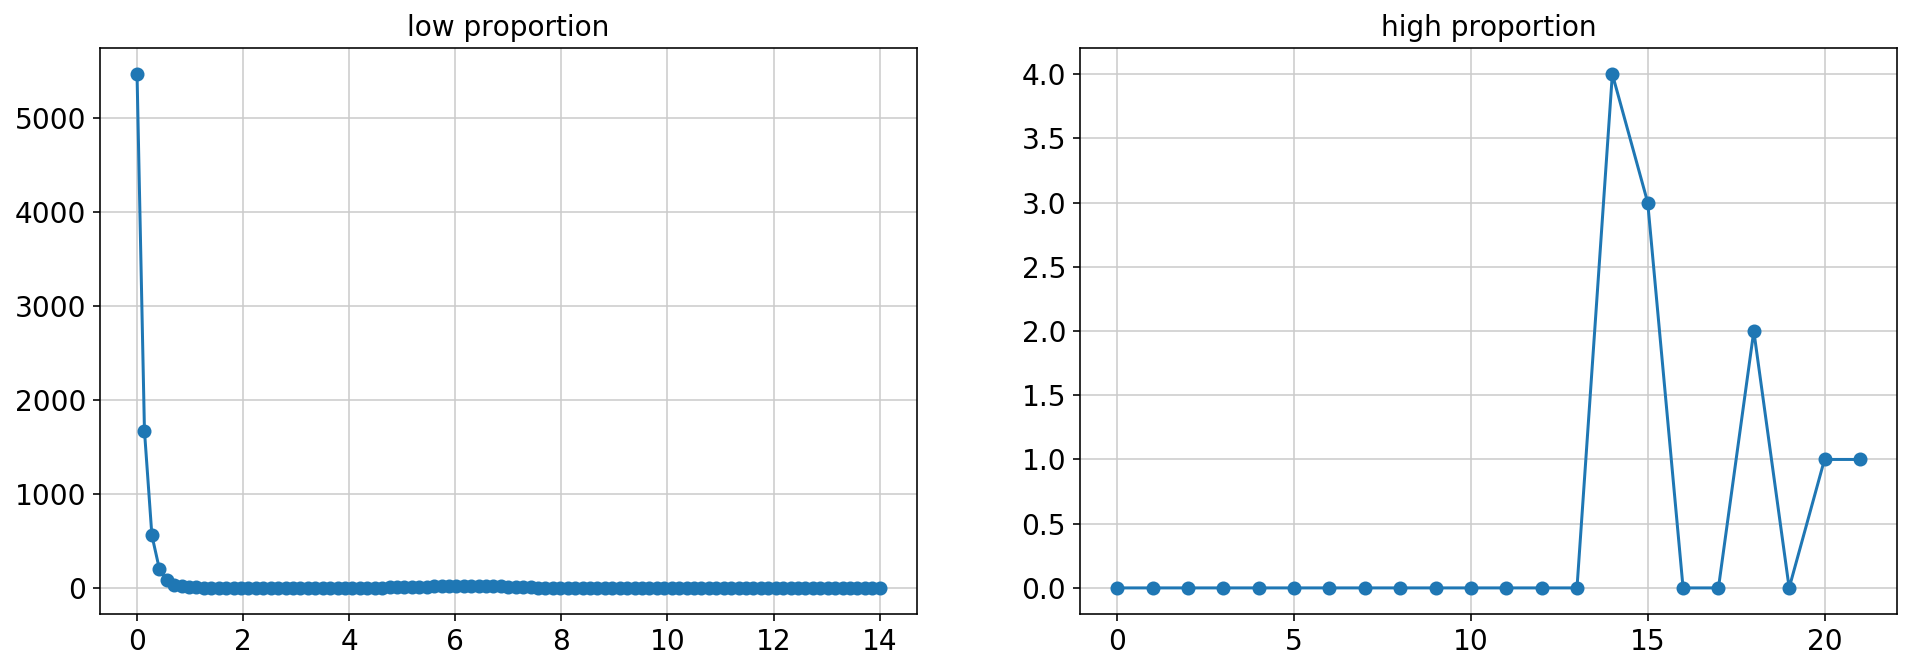

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:21.0


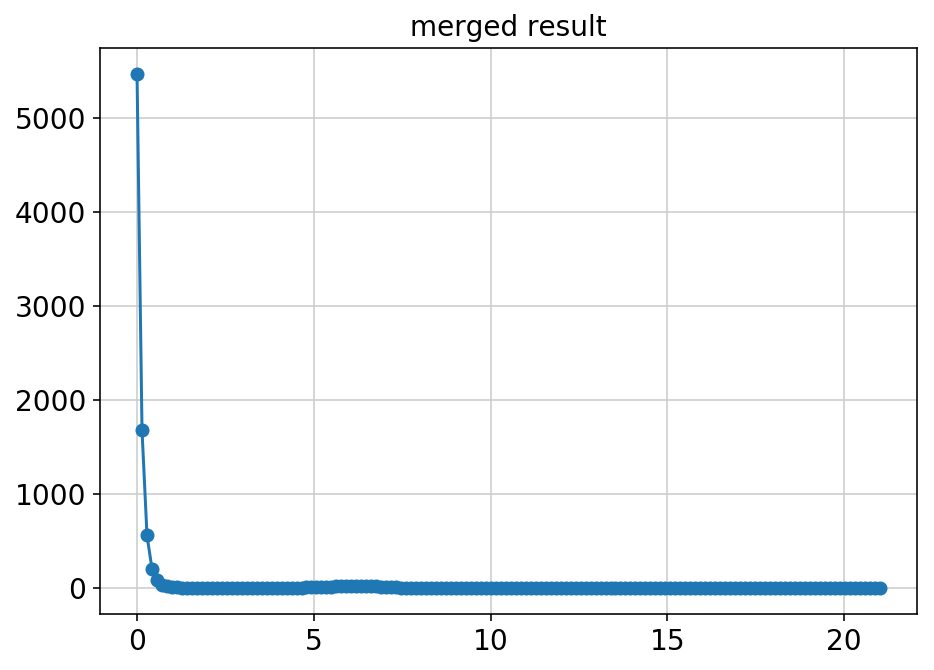

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 3.917%
>0.1: 3.781%
>0.15: 3.749%
>0.2: 3.679%
>0.25: 3.197%
>0.3: 1.676%
>0.35: 0.279%
>0.4: 0.165%


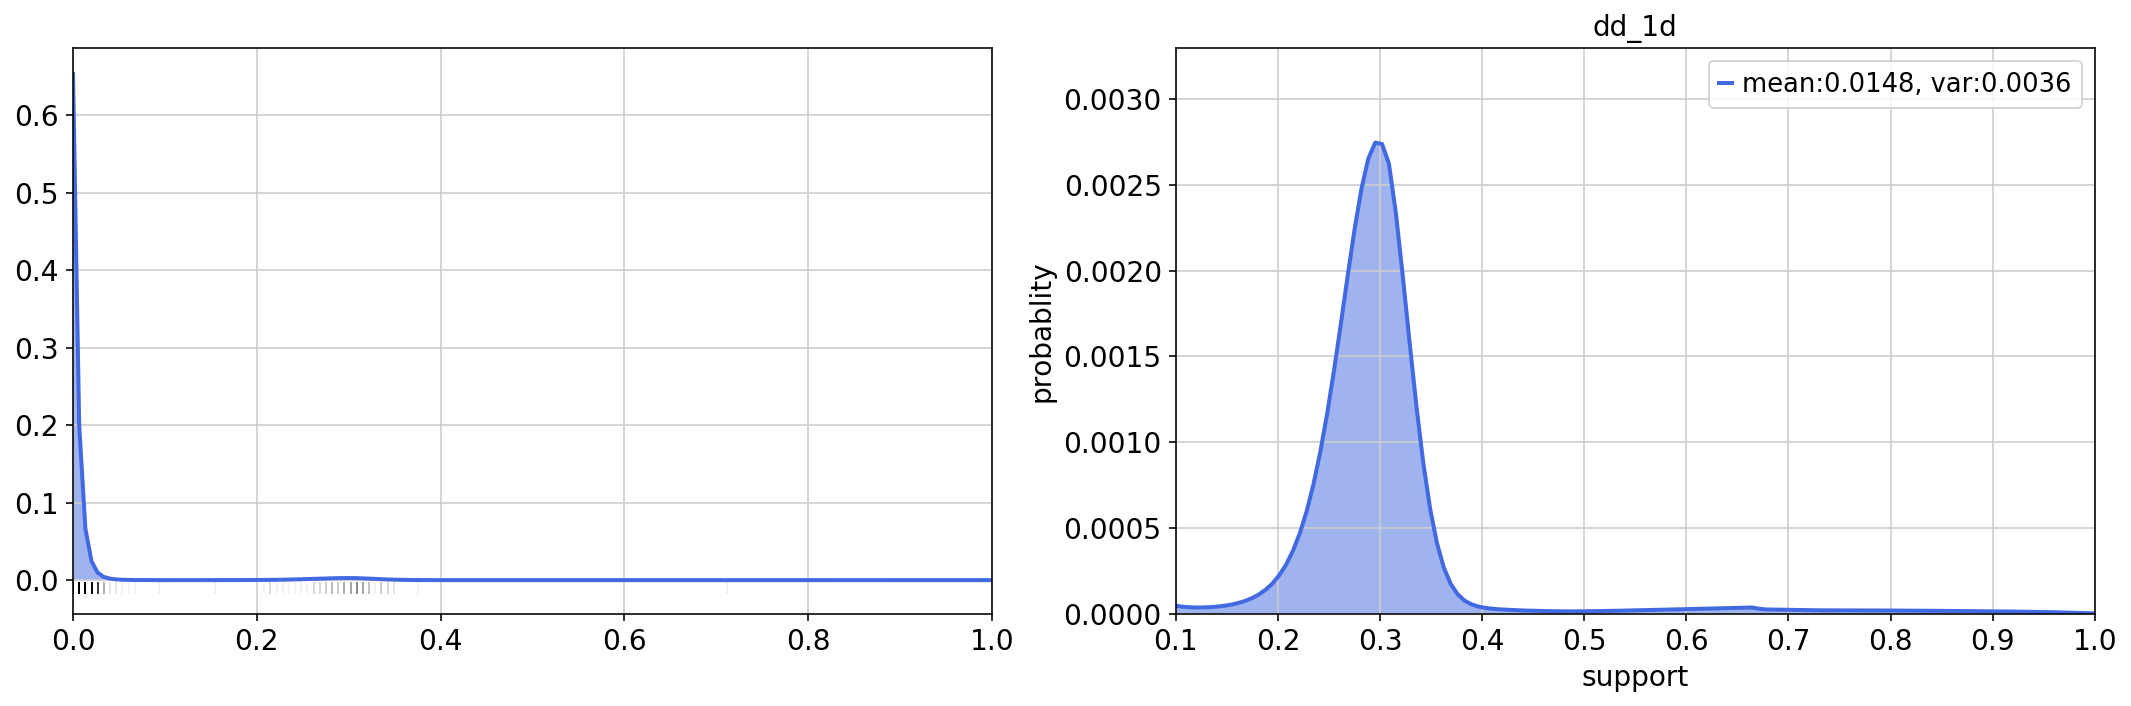

gamma: 21.0
-------------------------------------------------------------------------
FCER1G
Average counts per cell = 2.8796086385872806


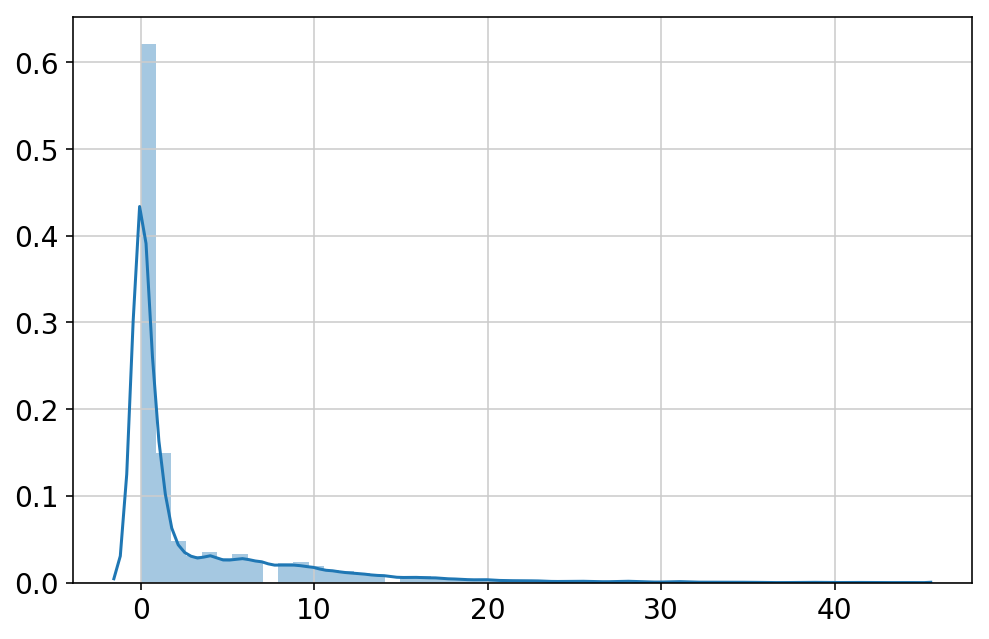

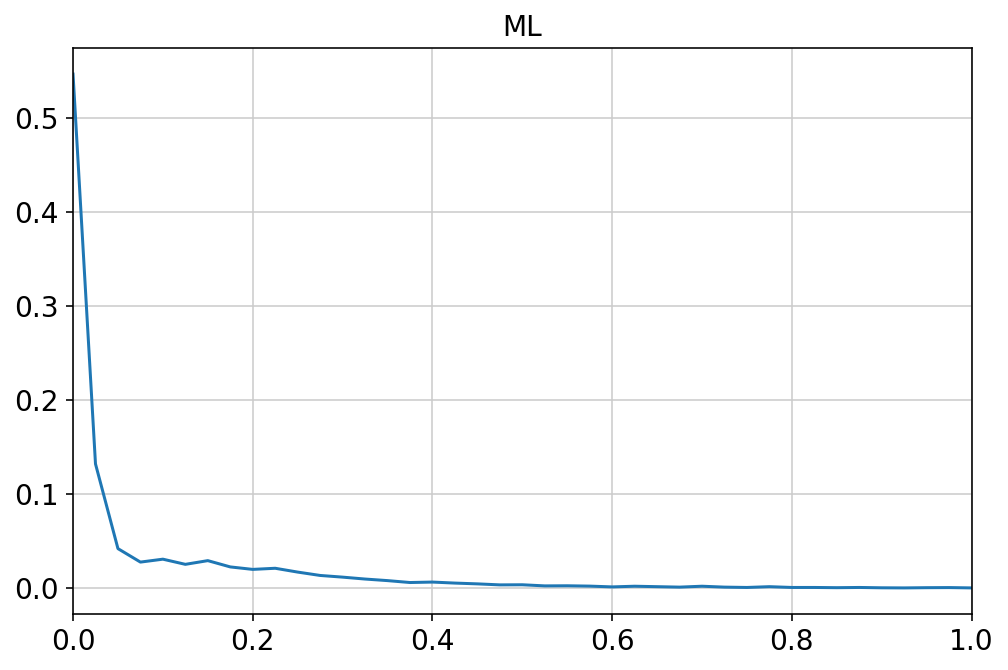

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 40

### debug: proportion separation ### start ###


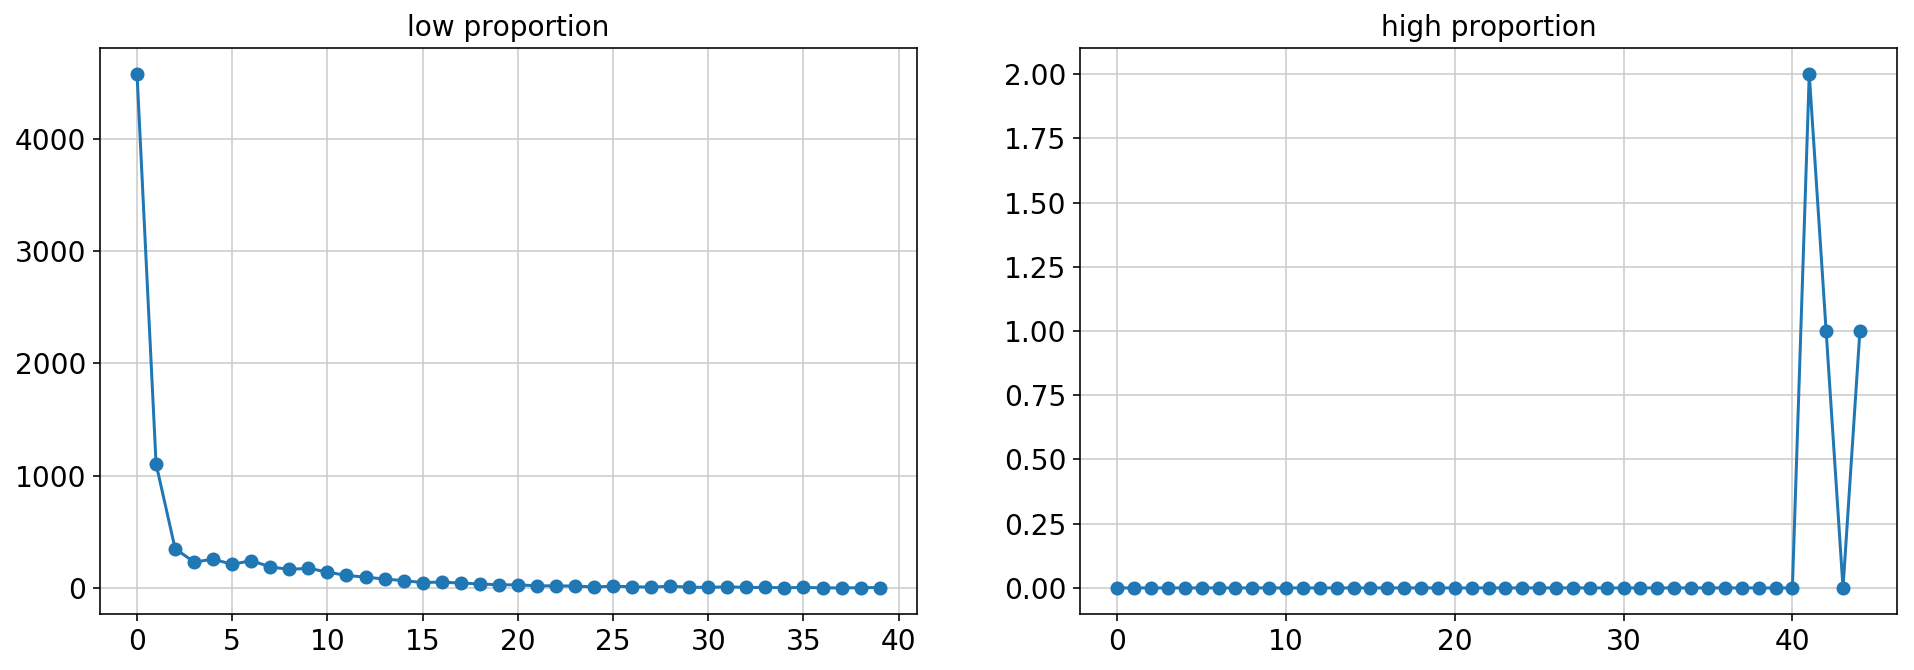

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
5.828591731038557
-11.323816478281401
7.066233179031656
-0.22615033135053864
-1.3449901139495068
Close-form gradients
[  5.82859409 -11.32380945   7.06624056  -0.22613842  -1.34498679]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.941784219157198, reg:0.00442172550909869
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  7.77531728   8.48081989   5.27978183  -5.7670338  -15.76889061]
gamma:40


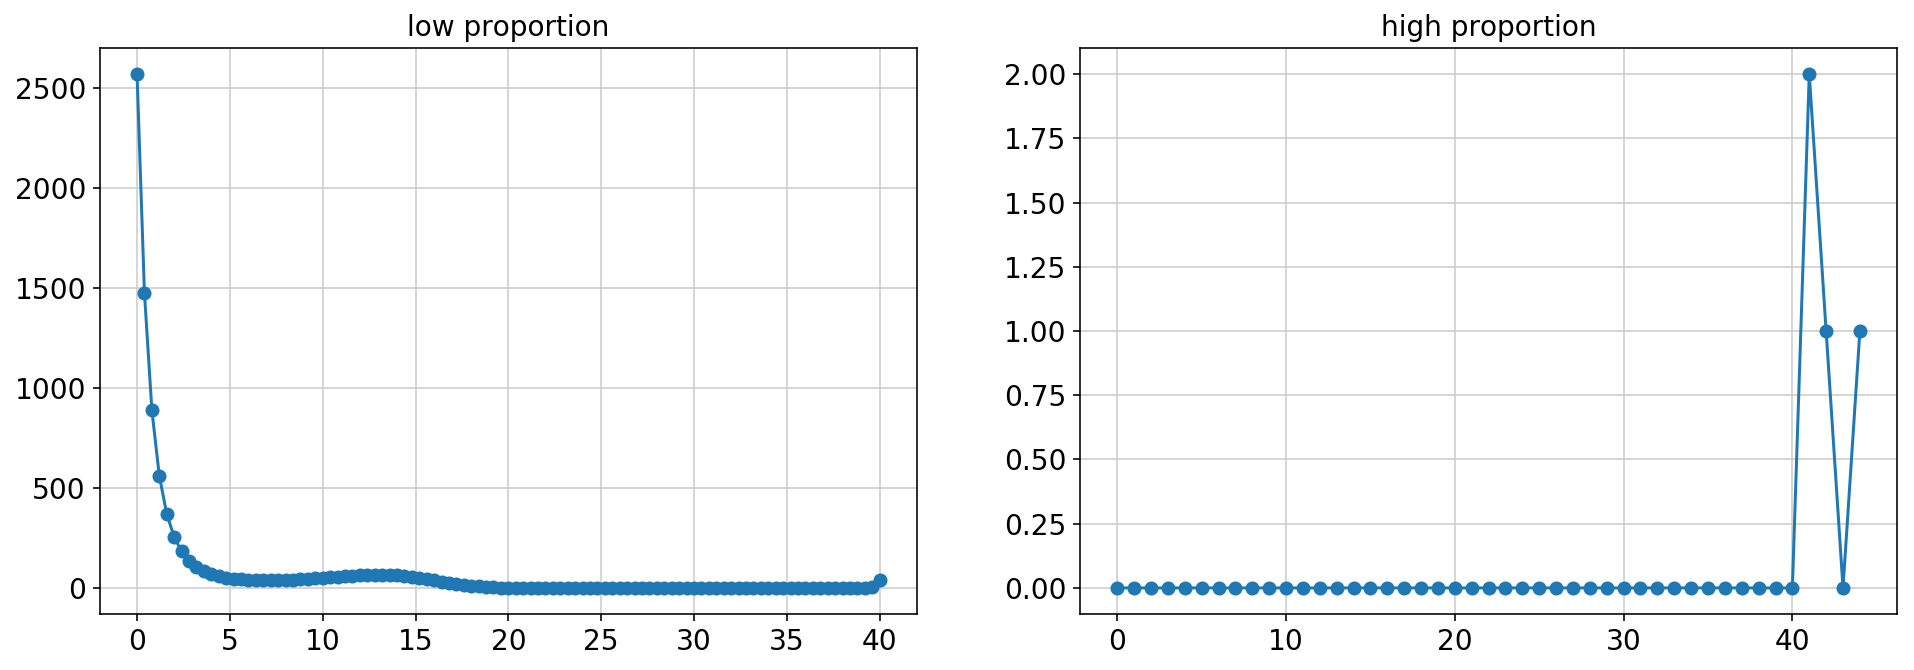

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:44.0


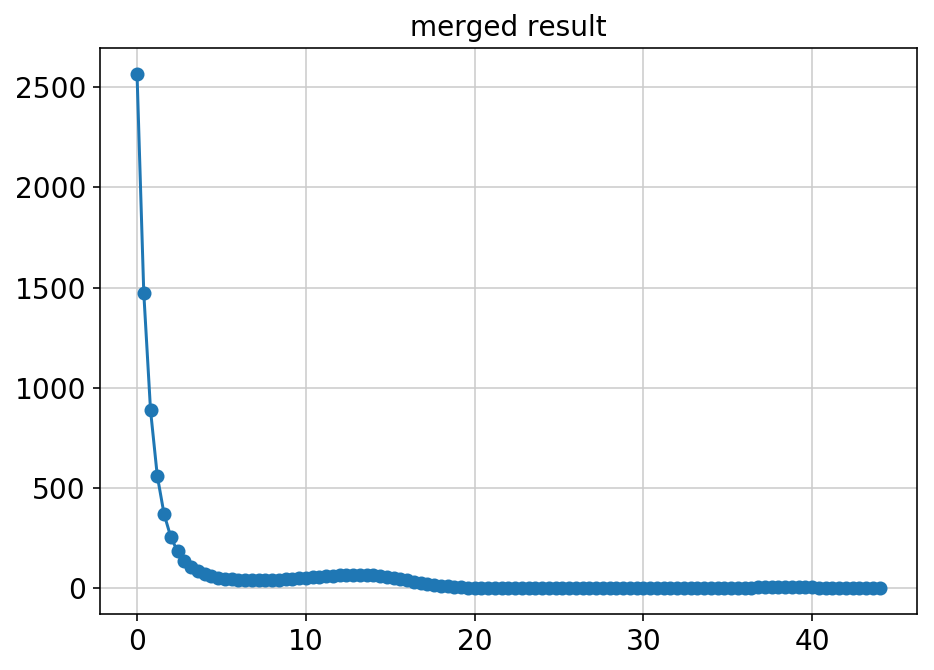

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 27.06%
>0.1: 19.47%
>0.15: 16.82%
>0.2: 13.97%
>0.25: 10.98%
>0.3: 7.242%
>0.35: 2.979%
>0.4: 0.923%


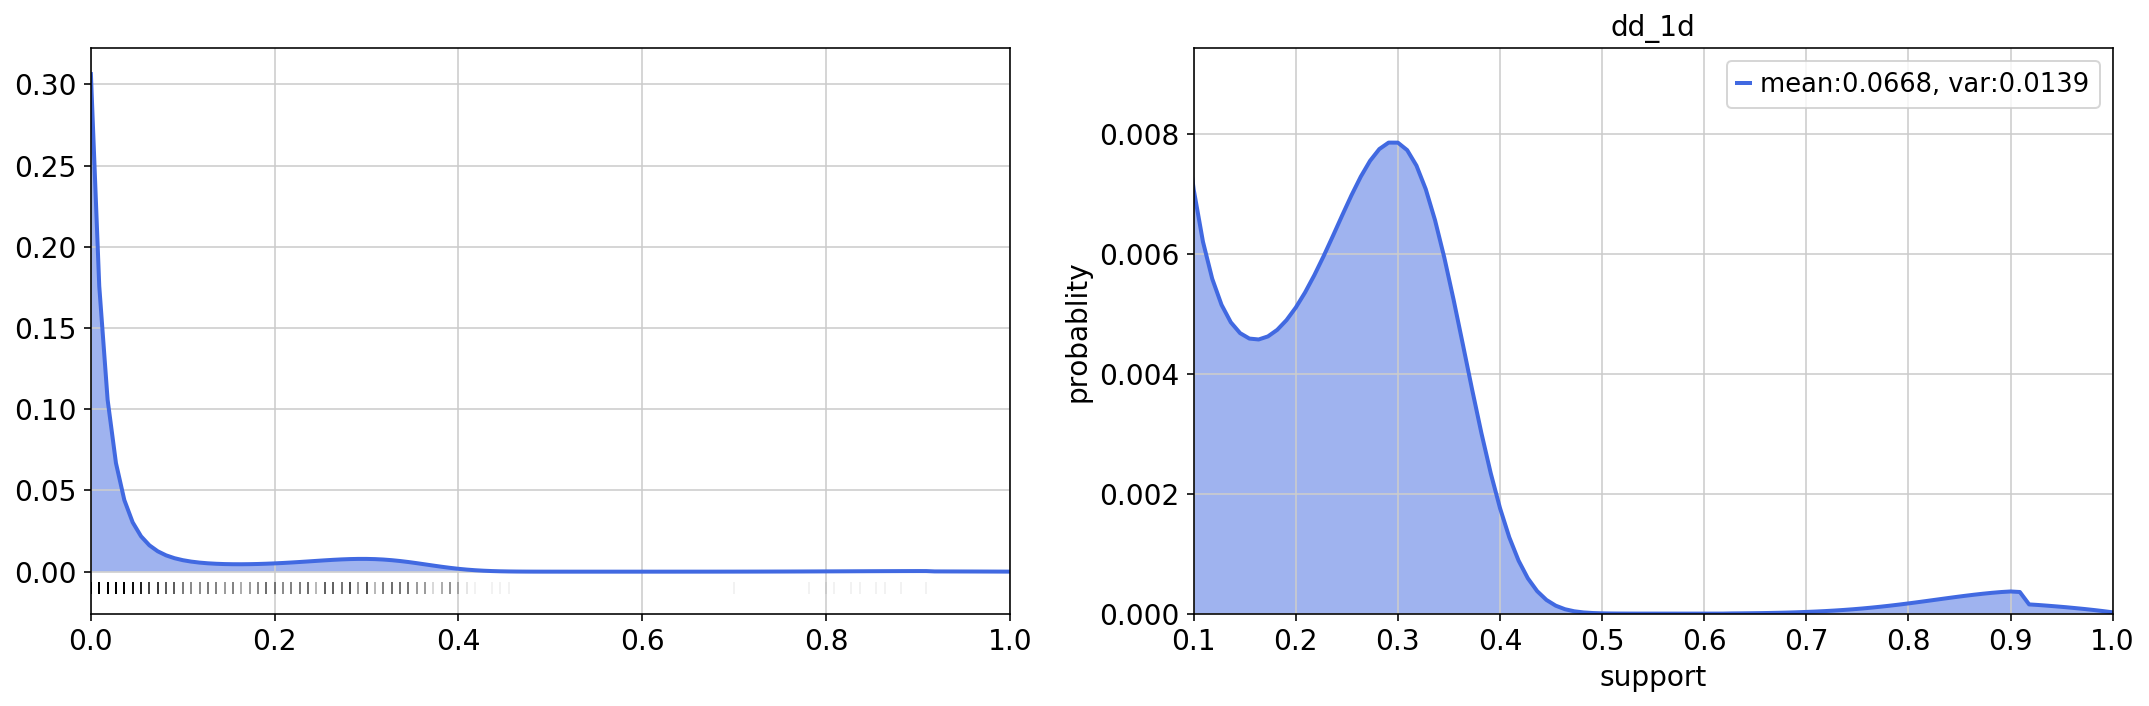

gamma: 44.0
-------------------------------------------------------------------------
LDHB
Average counts per cell = 2.5530366304736907


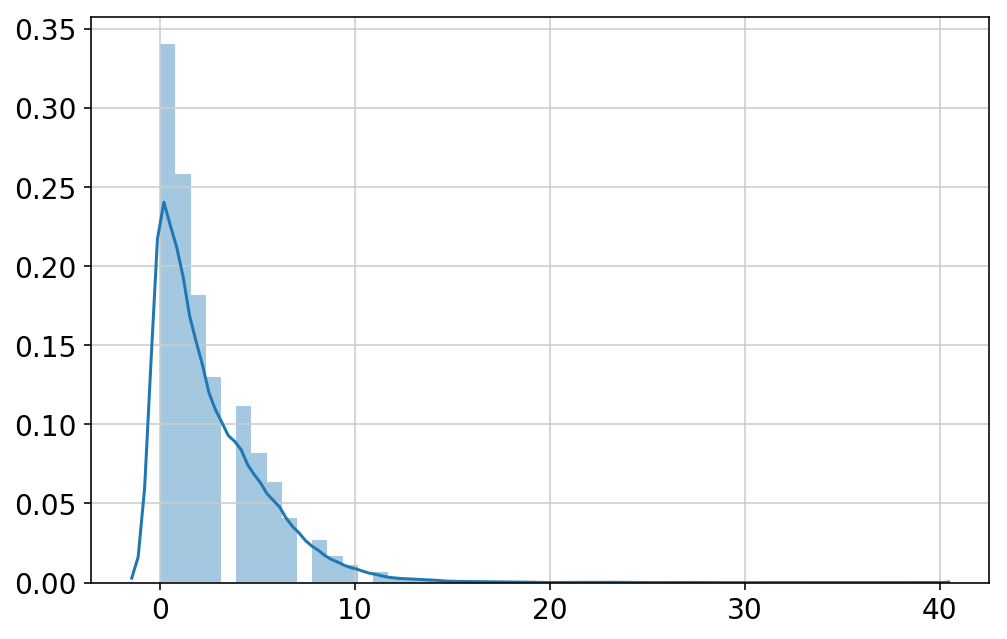

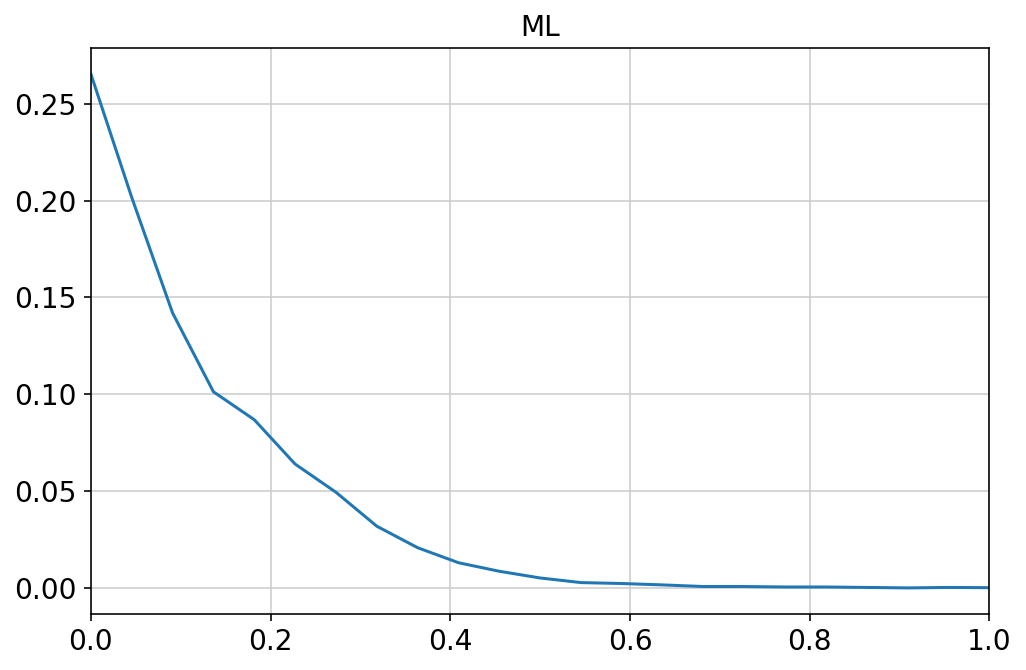

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 22

### debug: proportion separation ### start ###


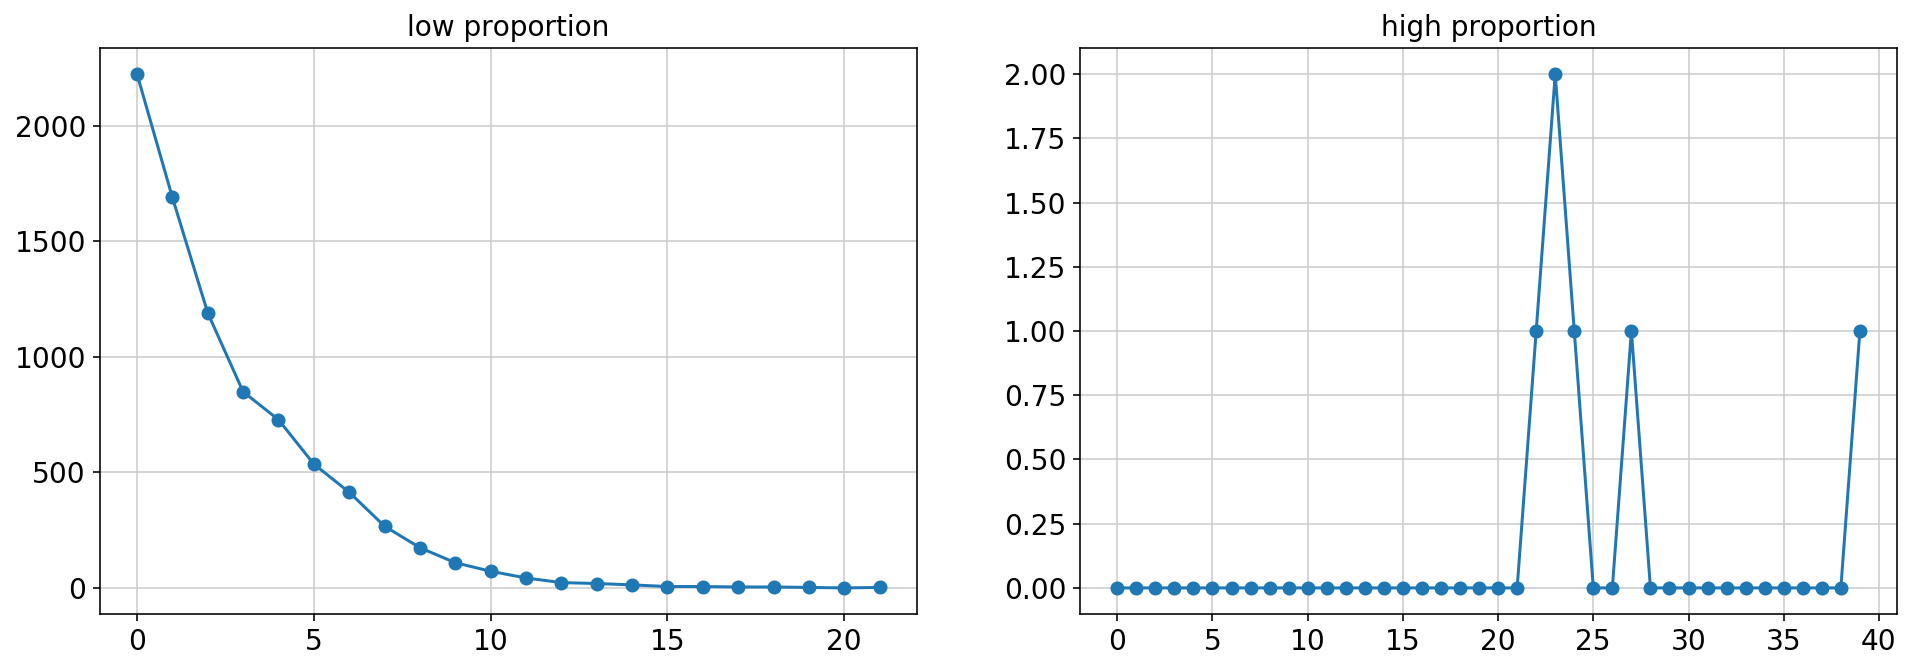

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
3.53992330781594
-6.197024878584756
3.151910430432281
0.853752843532618
-1.3486857217692716
Close-form gradients
[ 3.53992465 -6.19702234  3.15191549  0.85376458 -1.34868239]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.100461222143336, reg:0.00029149510742936956
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 3.24224573  1.8484048   0.15645446 -1.77791809 -3.46919044]
gamma:22


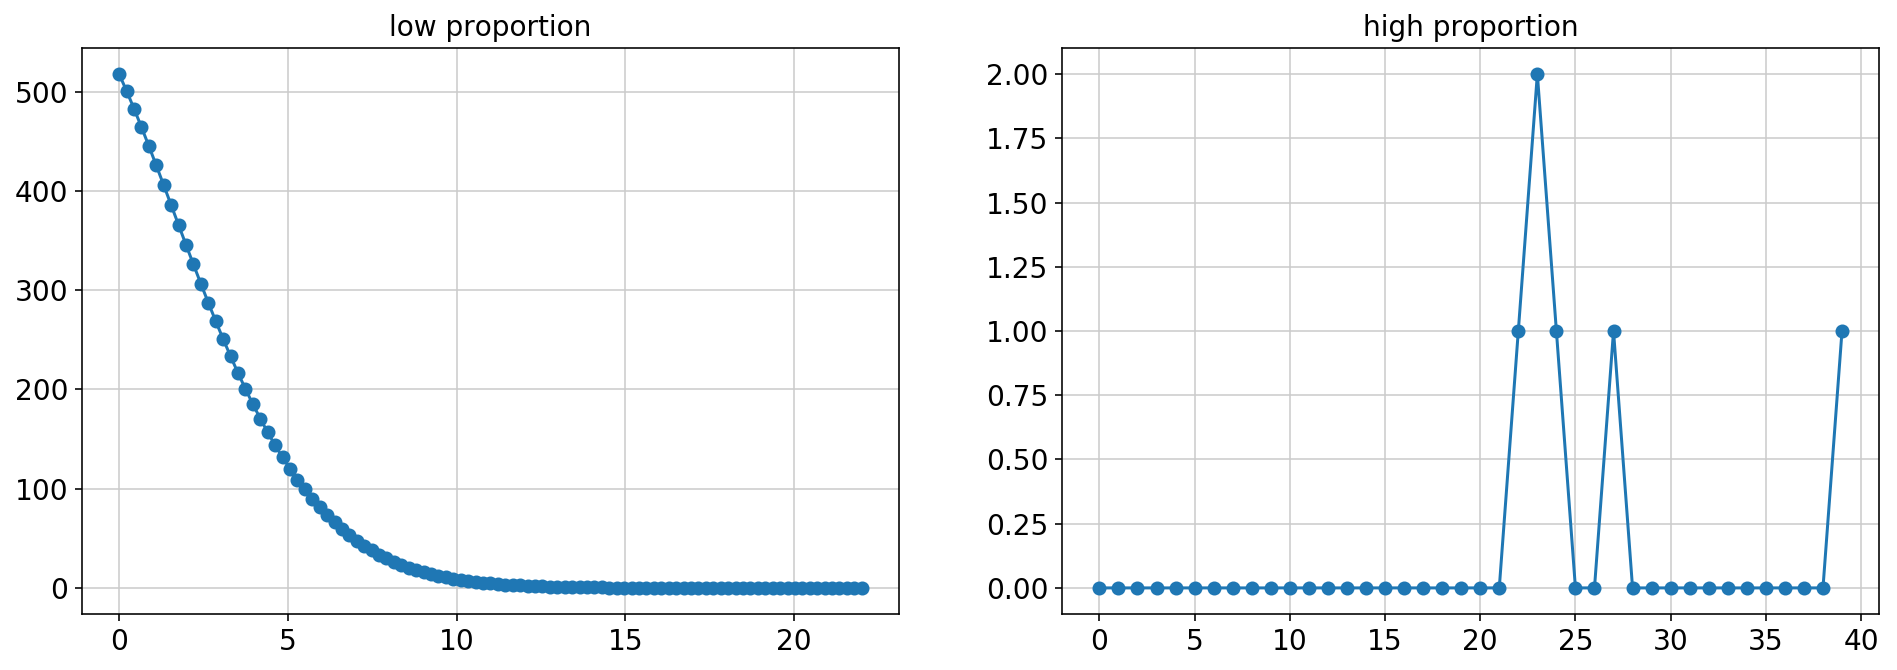

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:39.0


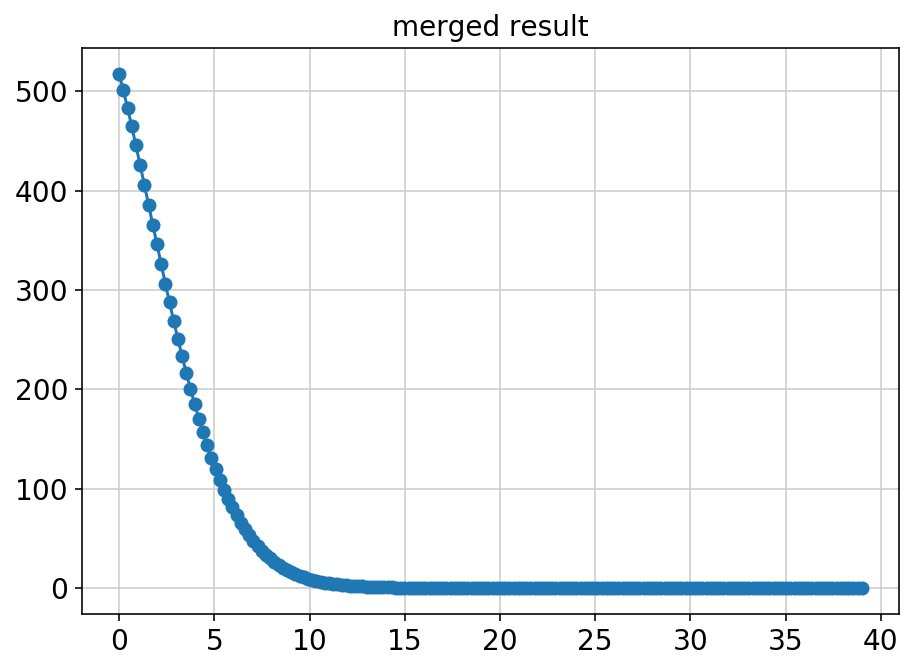

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 52.28%
>0.1: 23.20%
>0.15: 8.827%
>0.2: 2.943%
>0.25: 0.910%
>0.3: 0.301%
>0.35: 0.146%
>0.4: 0.101%


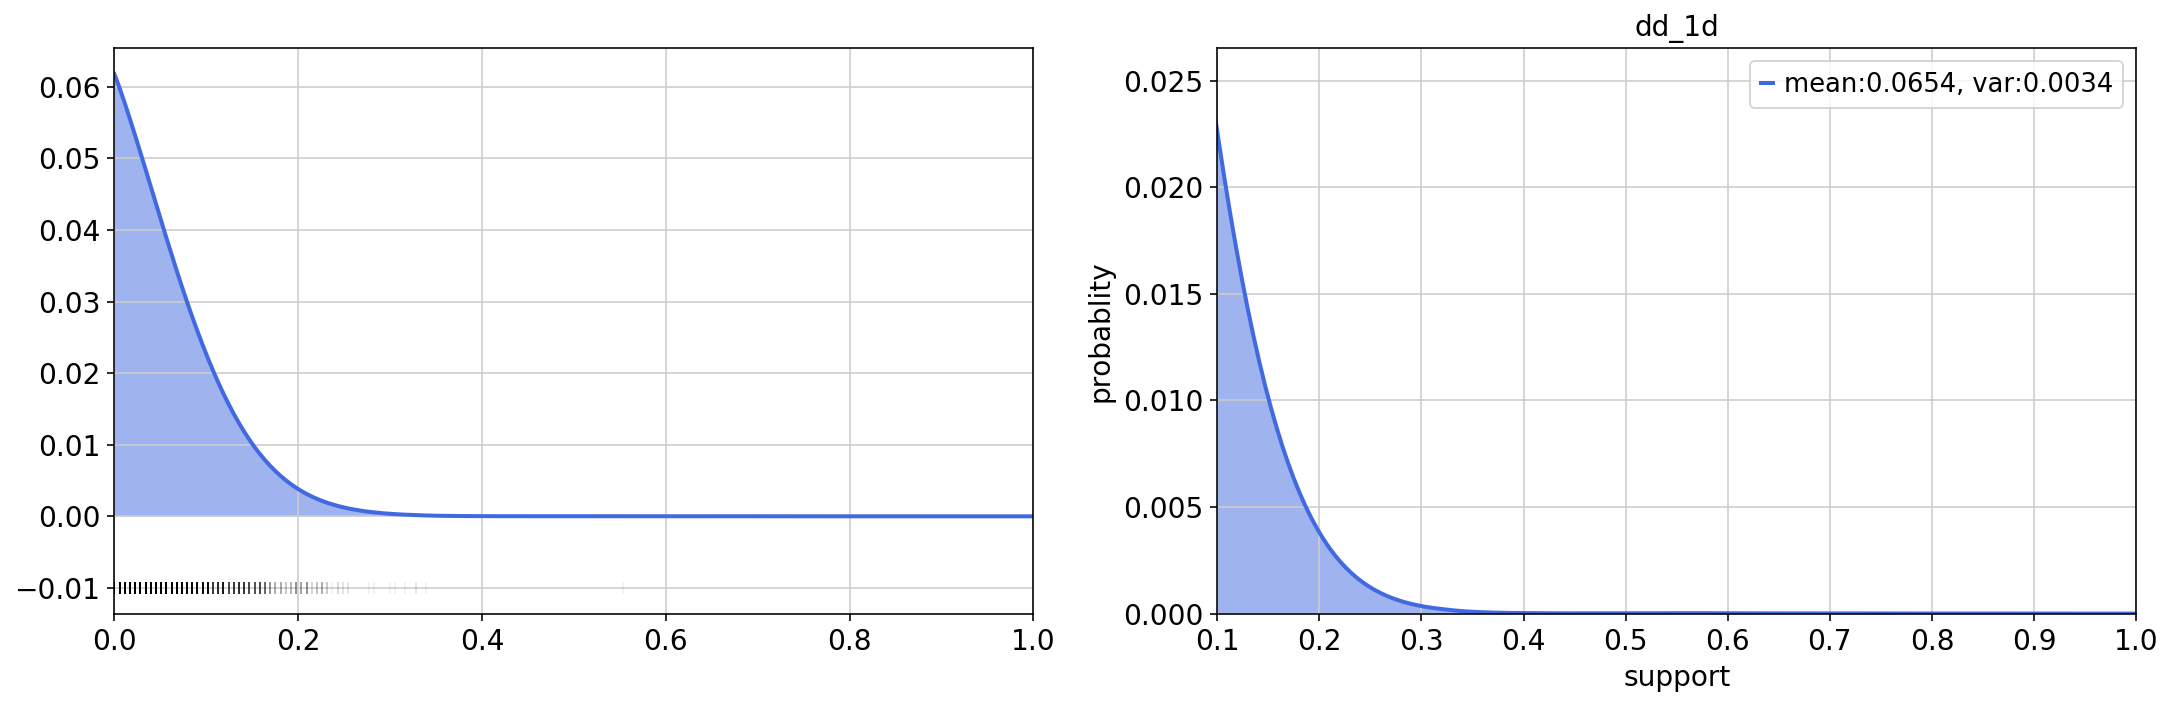

gamma: 39.0
-------------------------------------------------------------------------
IL7R
Average counts per cell = 1.2459133754921847


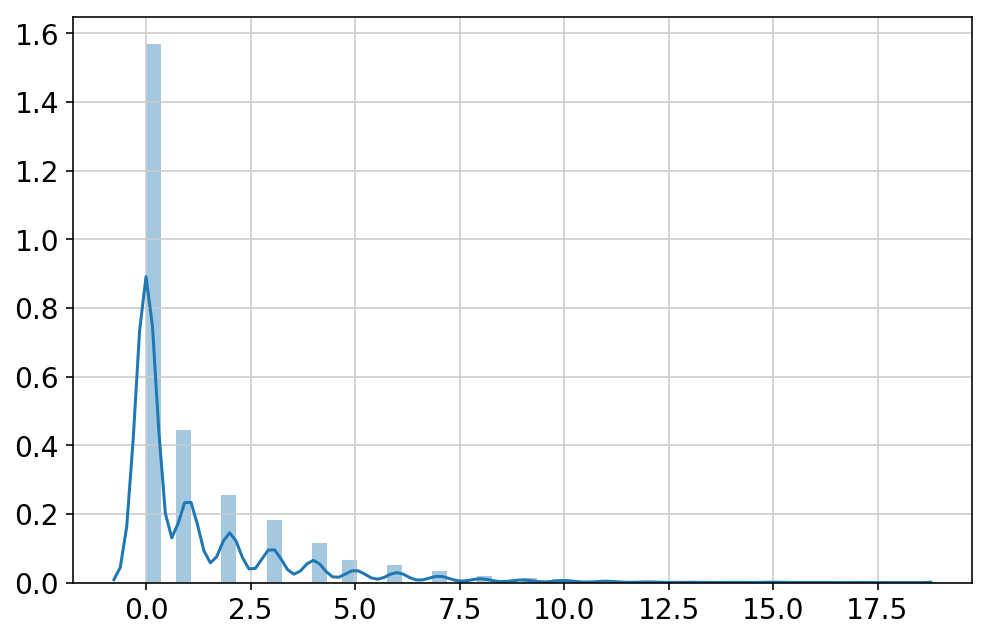

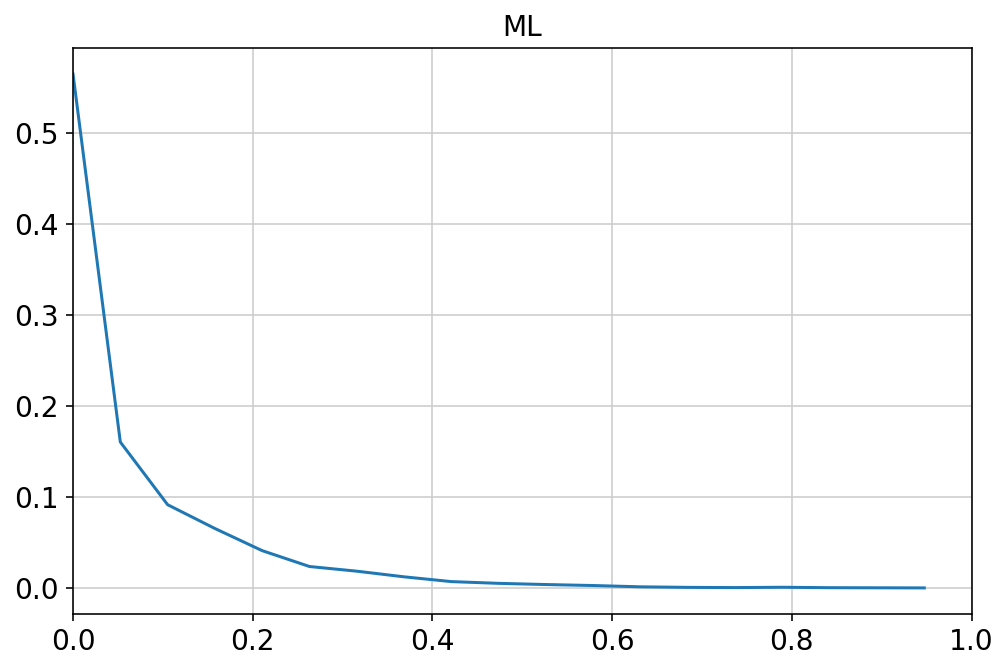

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 19

### debug: proportion separation ### start ###


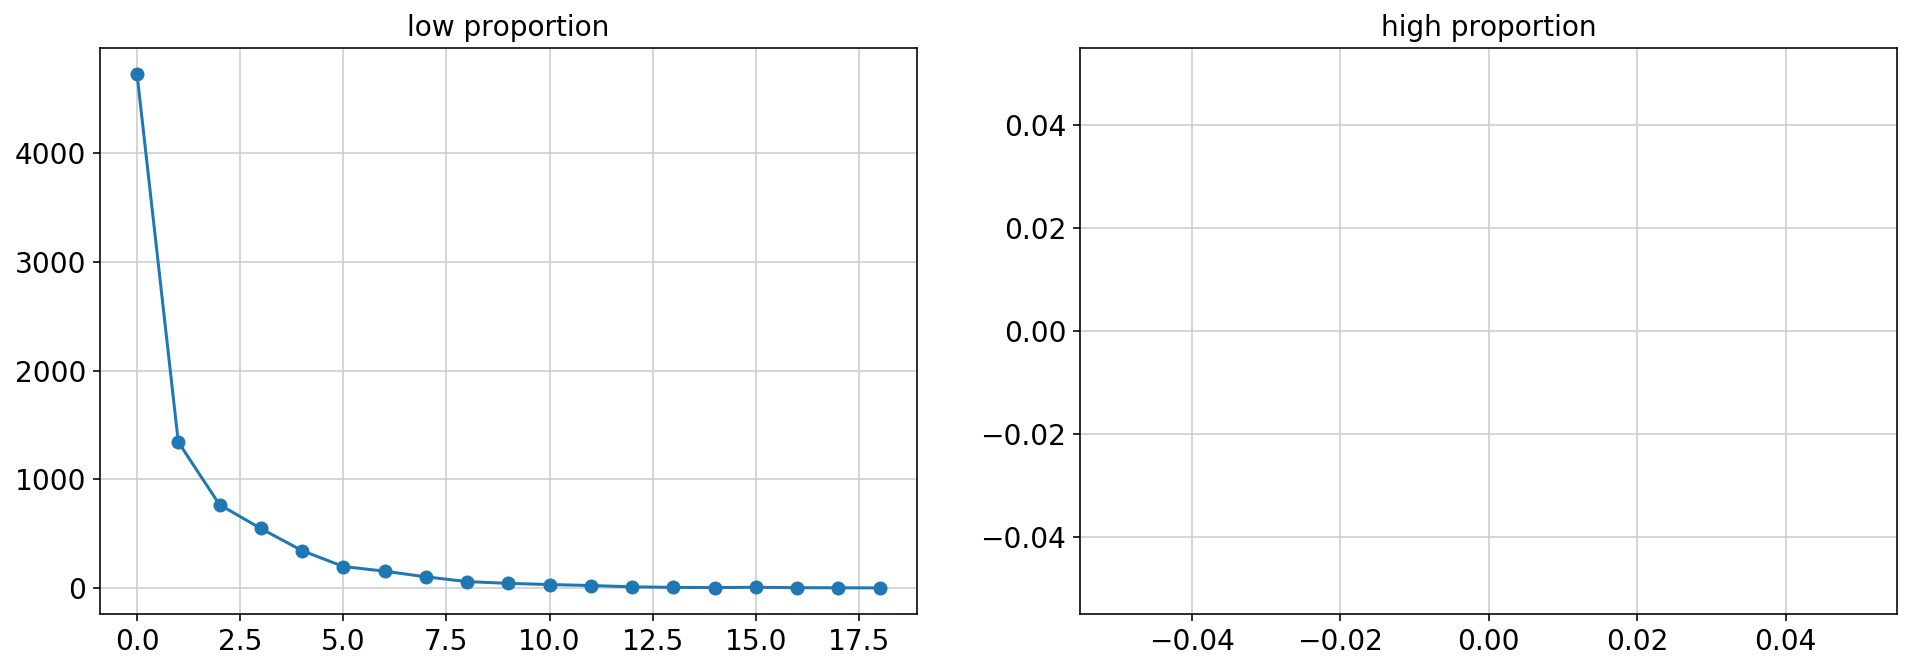

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
4.8503234069130485
-9.054982492262553
5.286429396900161
0.2695332224078584
-1.3514225720712147
Close-form gradients
[ 4.85032432 -9.05498261  5.2864327   0.26954483 -1.35141924]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.4944814551107413, reg:0.0008801761396253344
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 3.97032738  3.63650394  1.97399192 -2.64132045 -6.93950544]
gamma:19


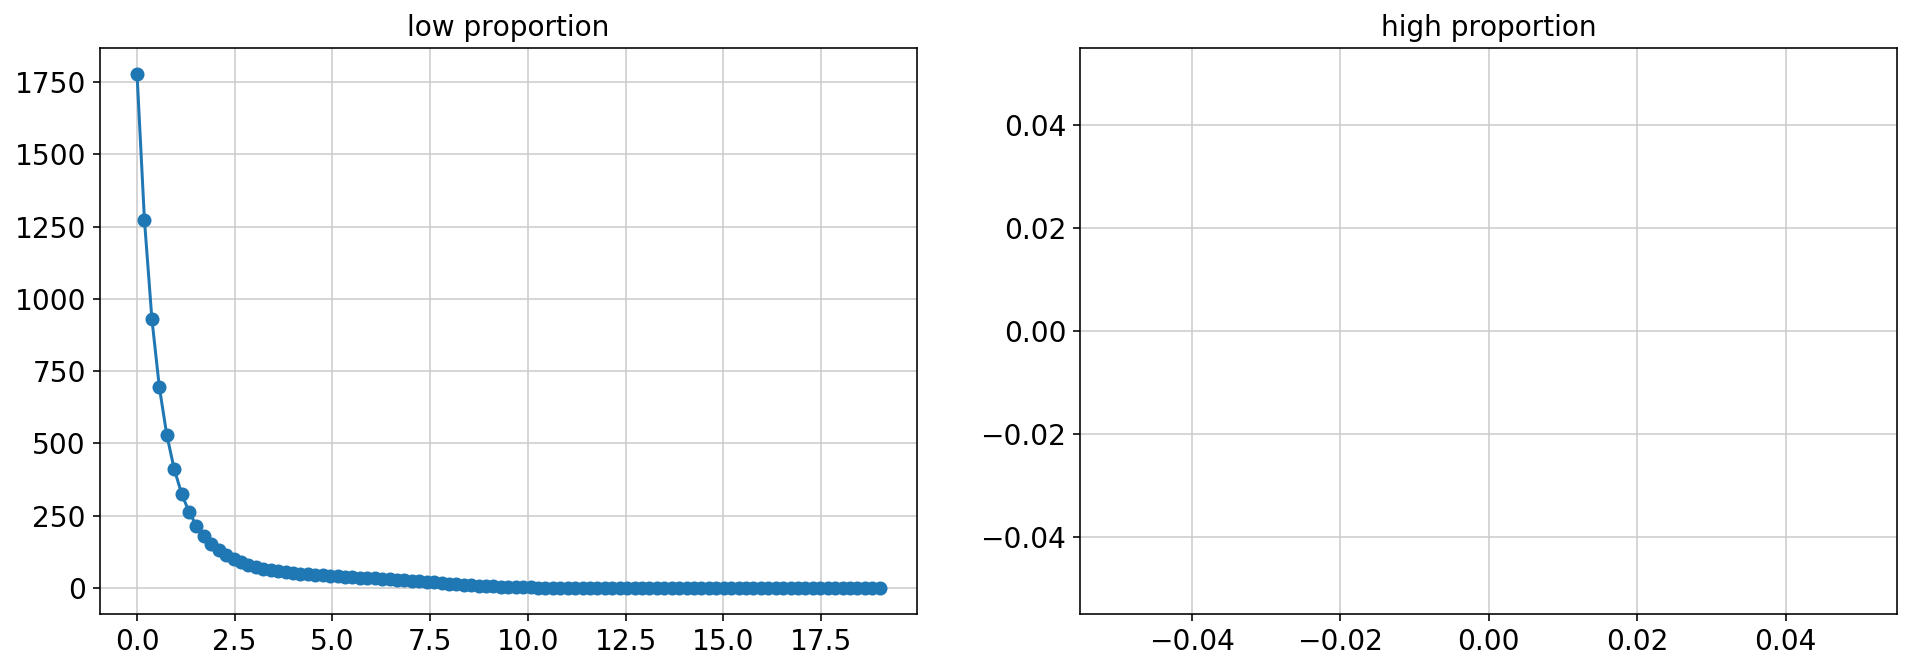

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:19.0


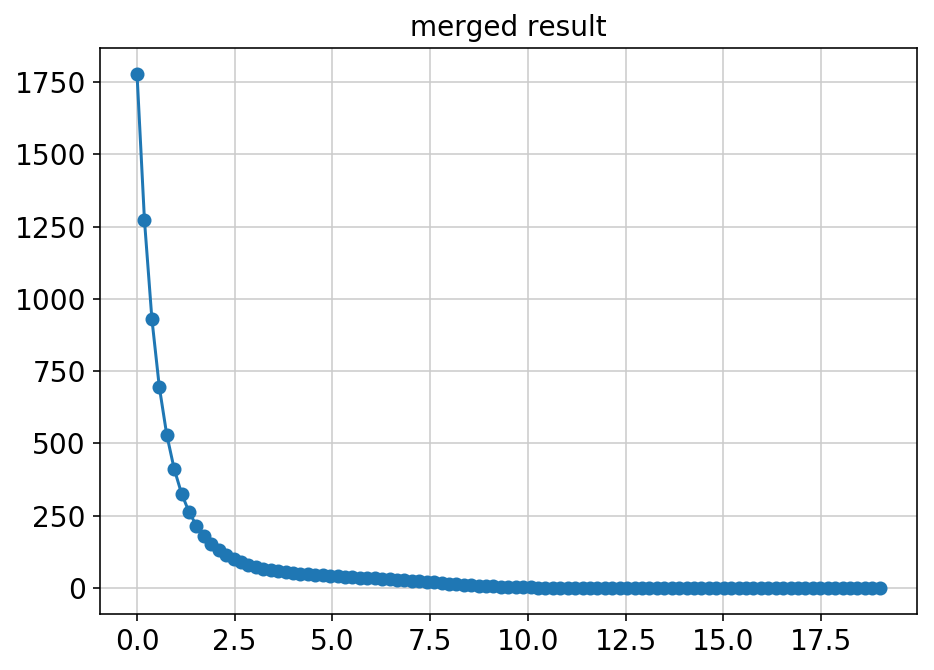

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 32.97%
>0.1: 19.42%
>0.15: 13.32%
>0.2: 9.575%
>0.25: 6.769%
>0.3: 4.466%
>0.35: 2.935%
>0.4: 1.254%


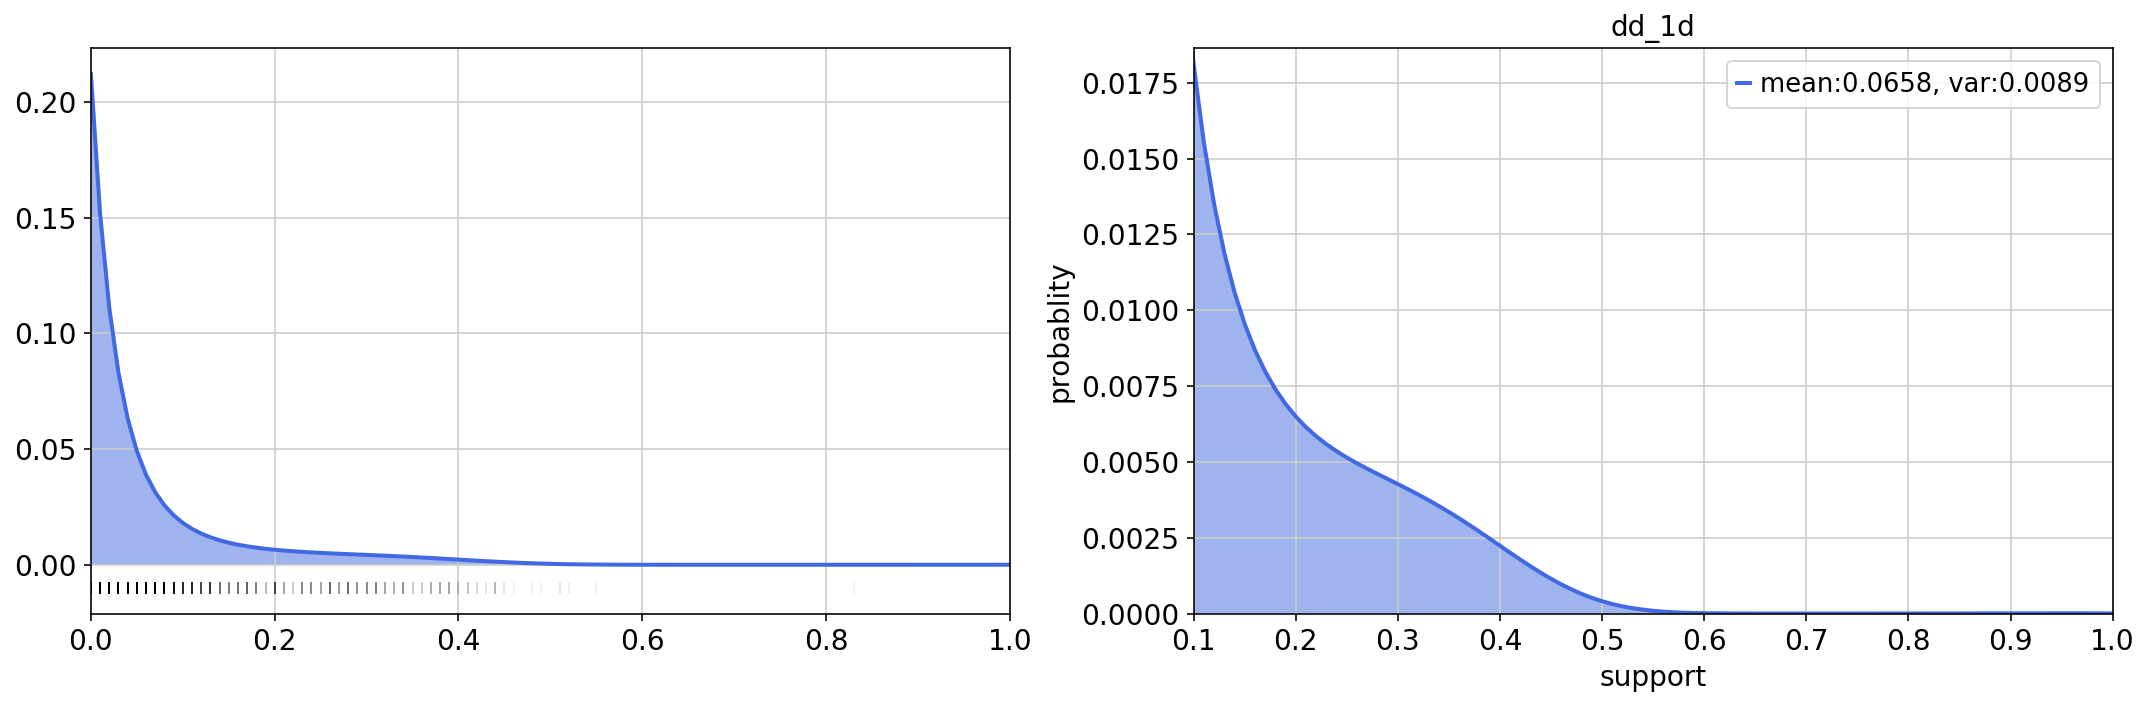

gamma: 19.0
-------------------------------------------------------------------------
LST1
Average counts per cell = 2.914568667223482


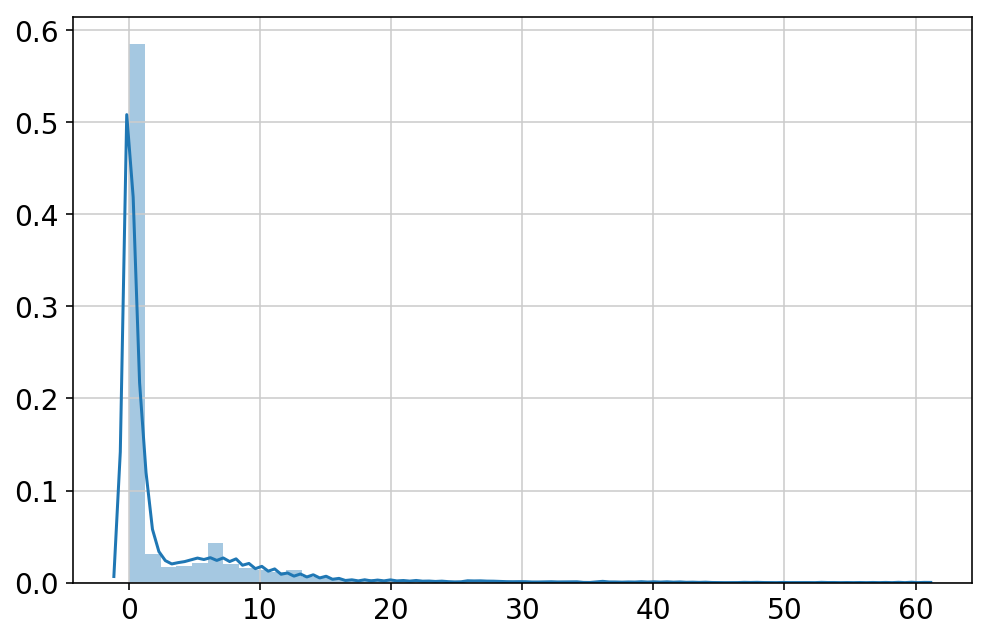

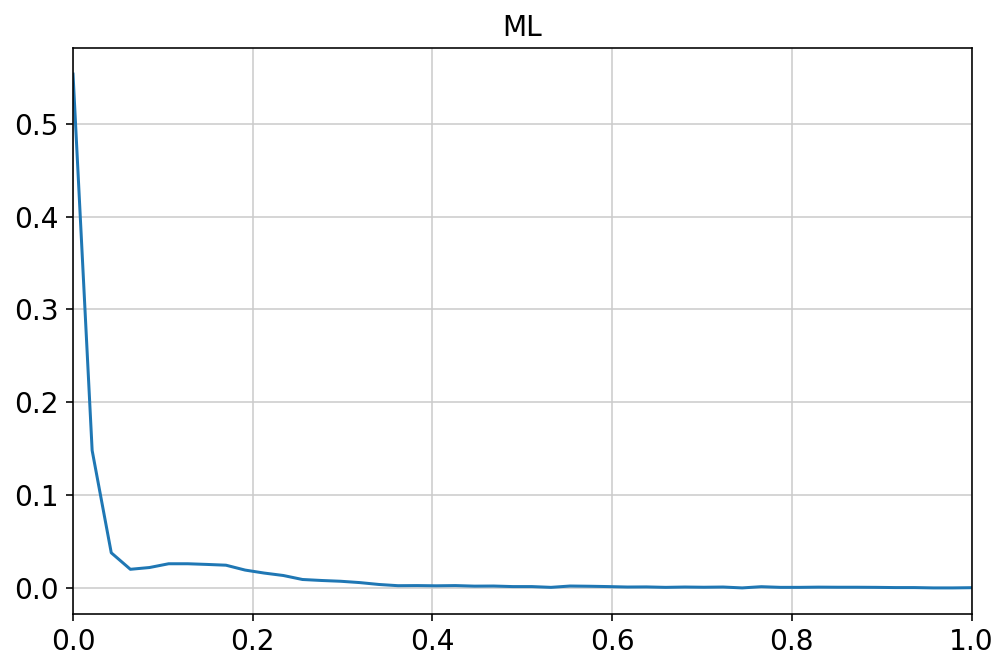

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 47

### debug: proportion separation ### start ###


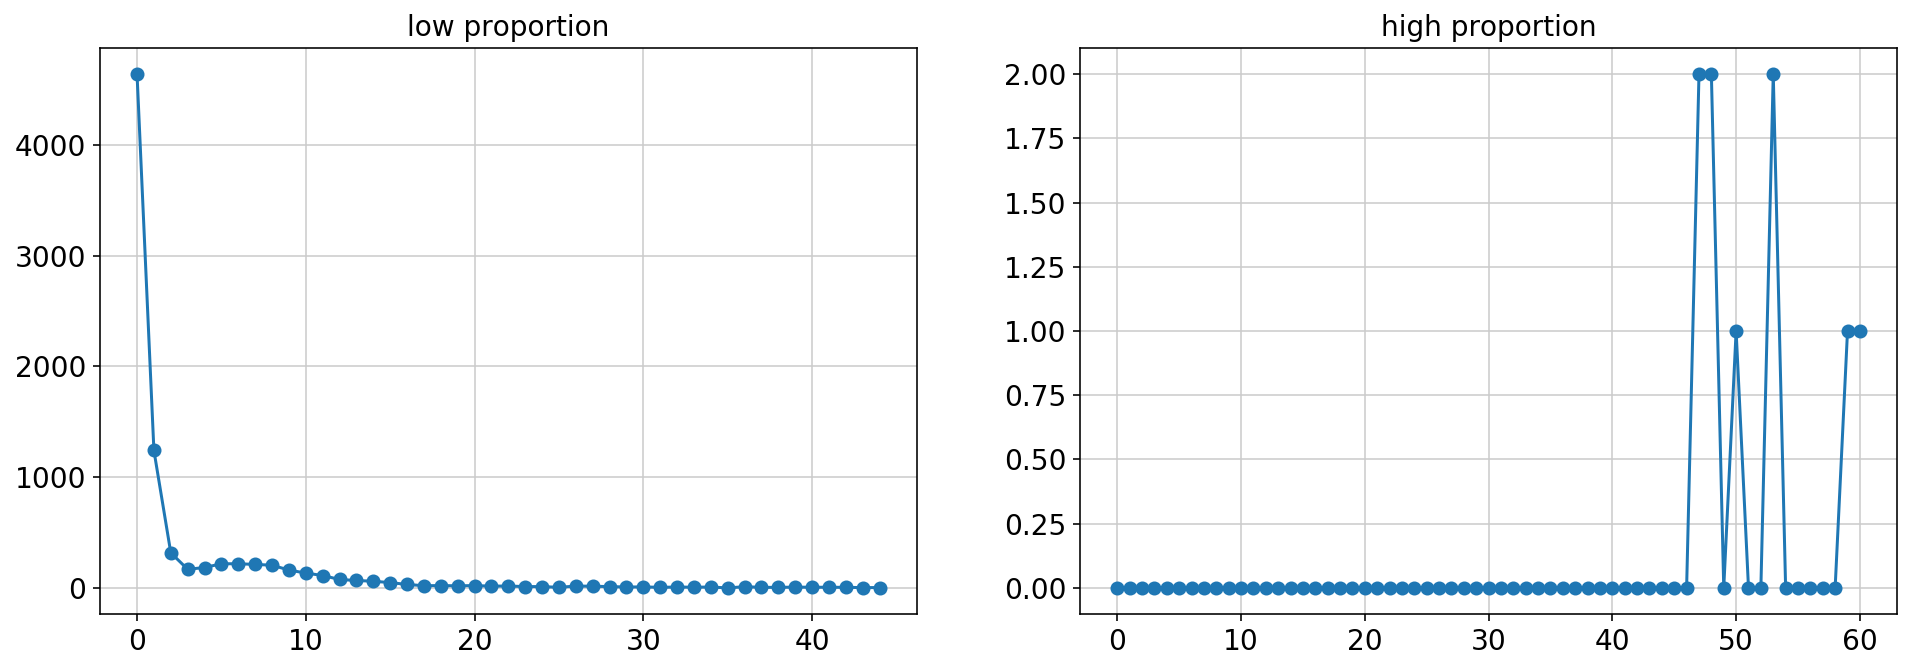

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.240724903960881
-12.2212517750242
7.742916396047406
-0.4210207213972694
-1.3415023563112527
Close-form gradients
[  6.24072743 -12.22124389   7.74292427  -0.42100879  -1.34149903]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.9293252069171485, reg:0.006229043905750556
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  9.73558332  10.04869936   5.83690404  -7.11612325 -18.50507471]
gamma:47


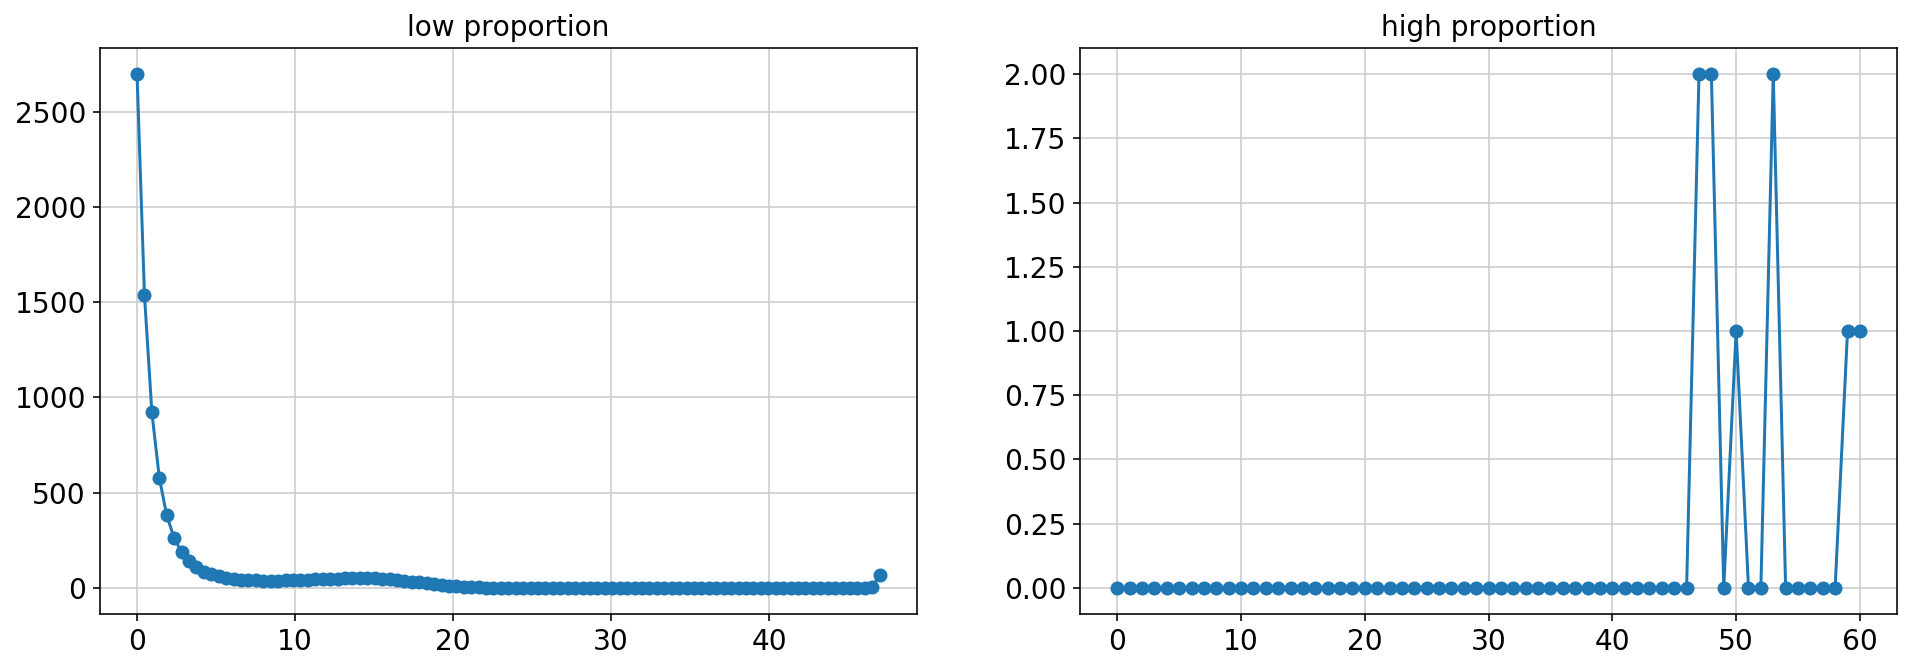

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:60.0


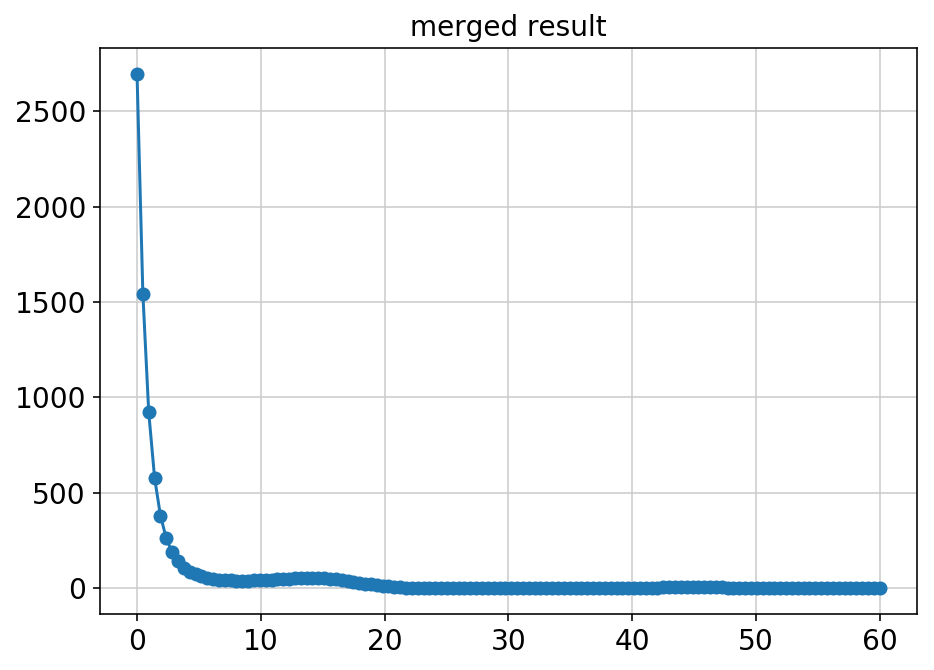

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 21.63%
>0.1: 15.48%
>0.15: 12.05%
>0.2: 9.000%
>0.25: 5.368%
>0.3: 1.976%
>0.35: 1.035%
>0.4: 0.938%


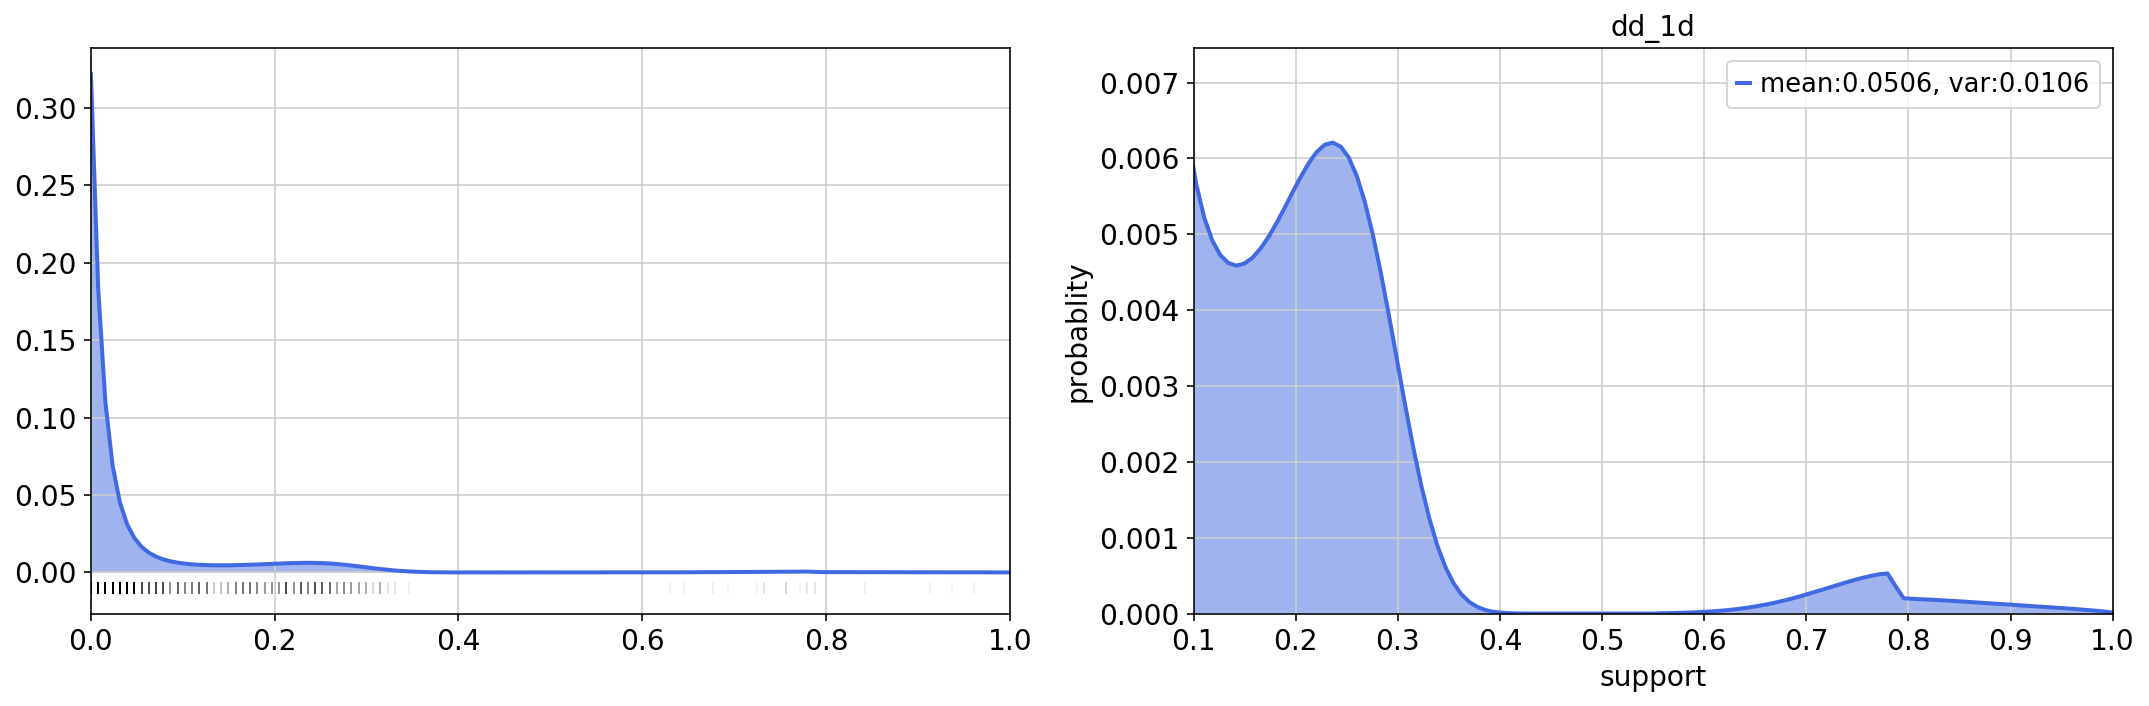

gamma: 60.0
-------------------------------------------------------------------------
PF4
Average counts per cell = 0.09402219305572128


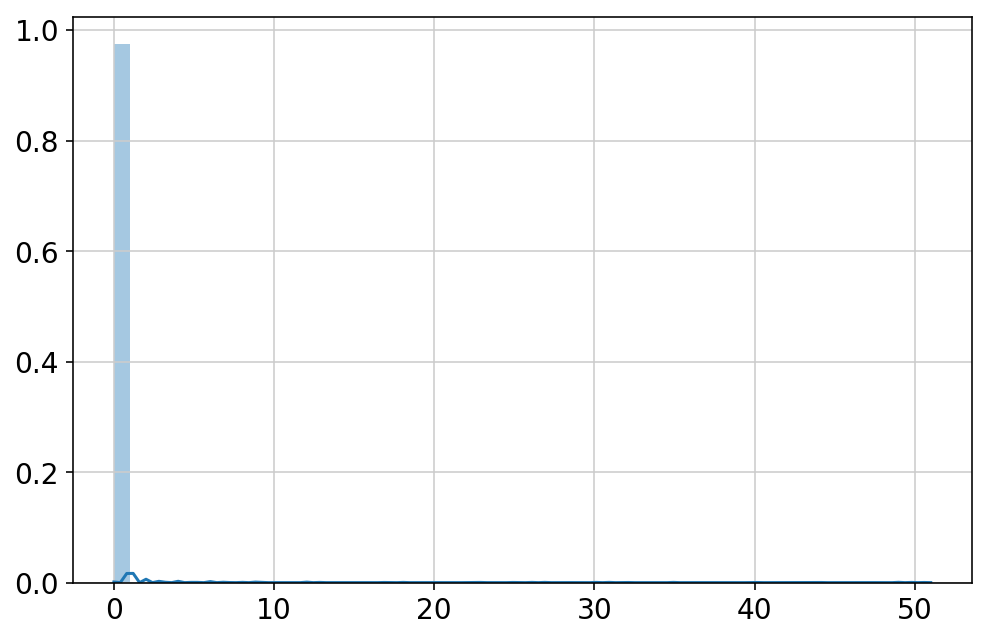

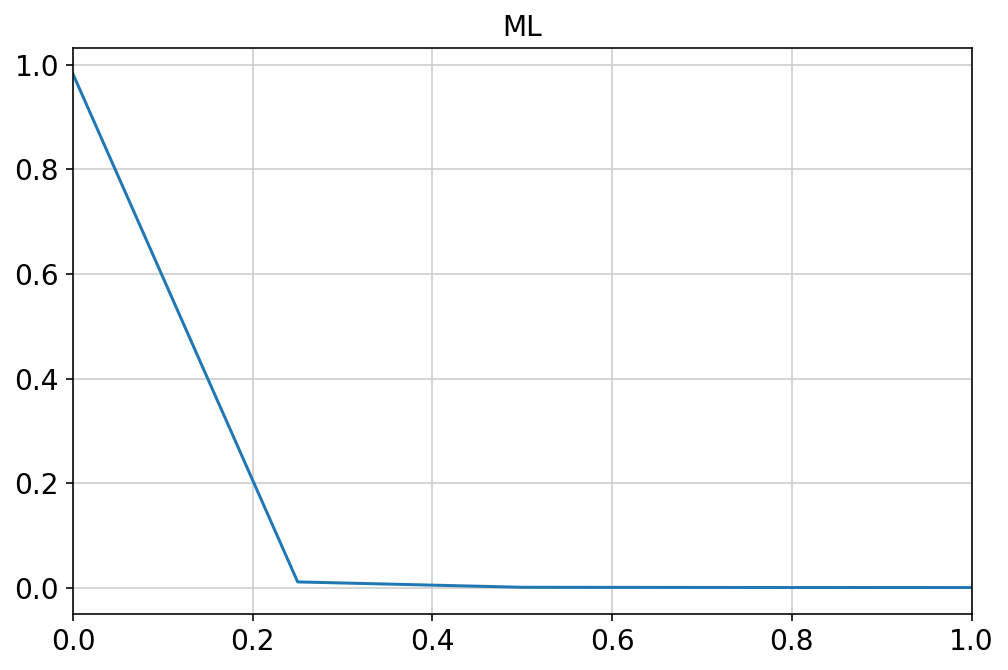

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 4

### debug: proportion separation ### start ###


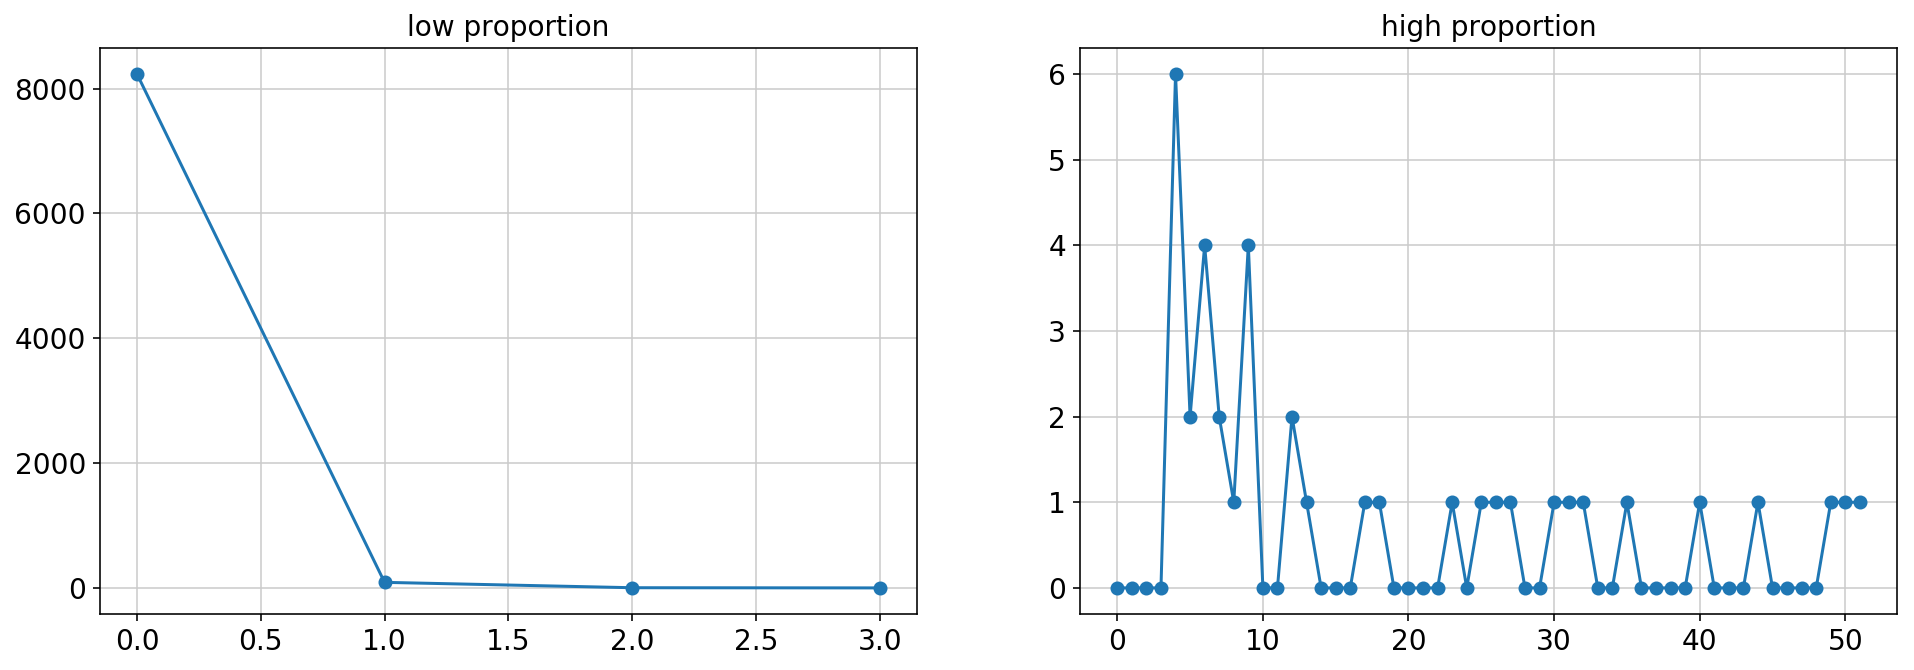

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
2.545829812072853
-4.303014941919869
1.9219395430702946
1.042287626429328
-1.2071341182195994
Close-form gradients
[ 2.54582699 -4.3030293   1.9219358   1.04229768 -1.20713117]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.08018732523109393, reg:5.030234366632012e-06
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 0.10638533 -0.4665341   0.50449465 -0.13969465 -0.00470003]
gamma:4


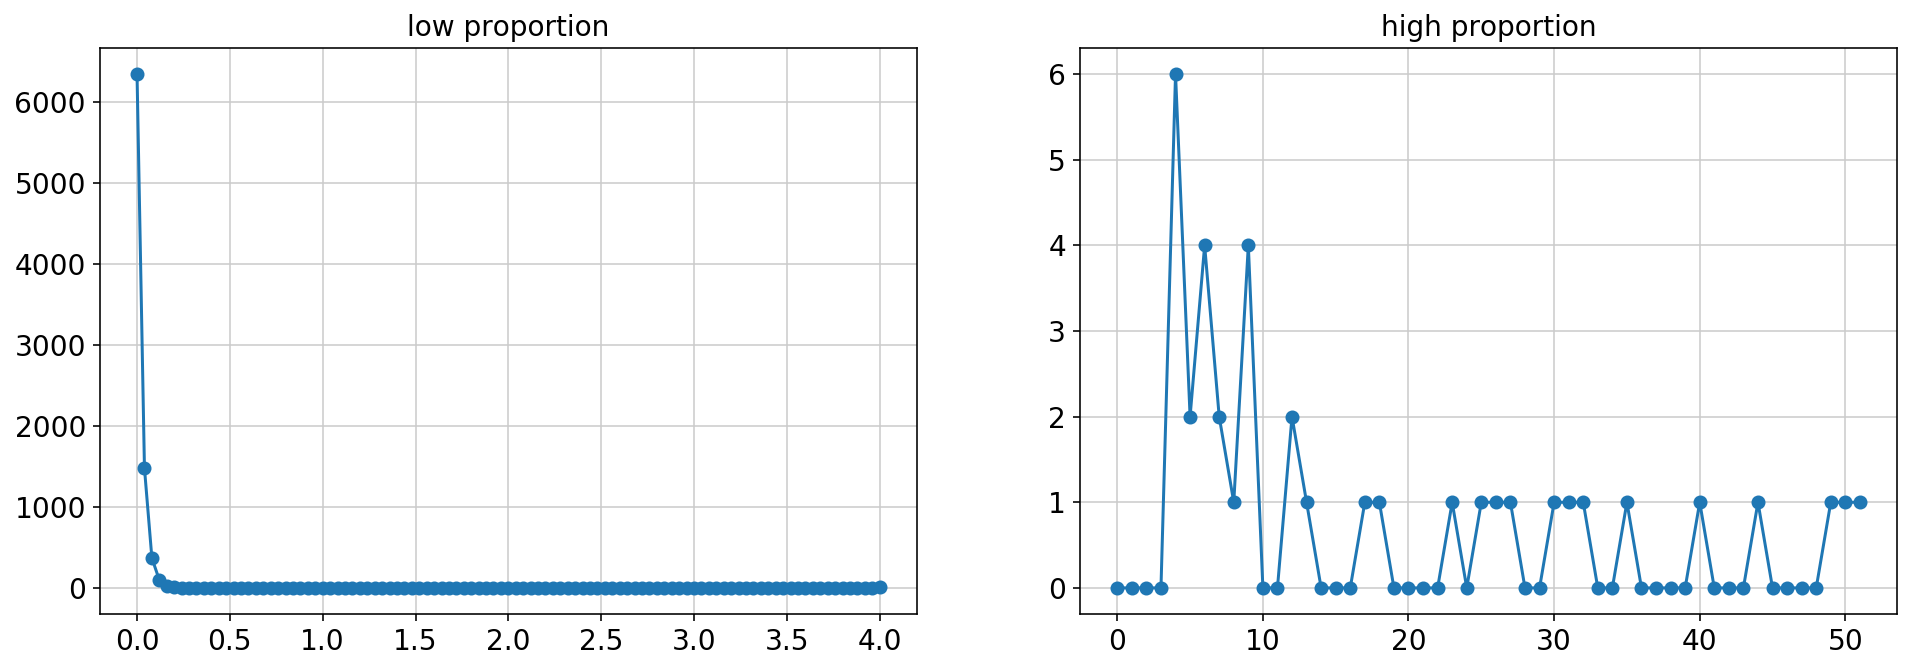

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:51.0


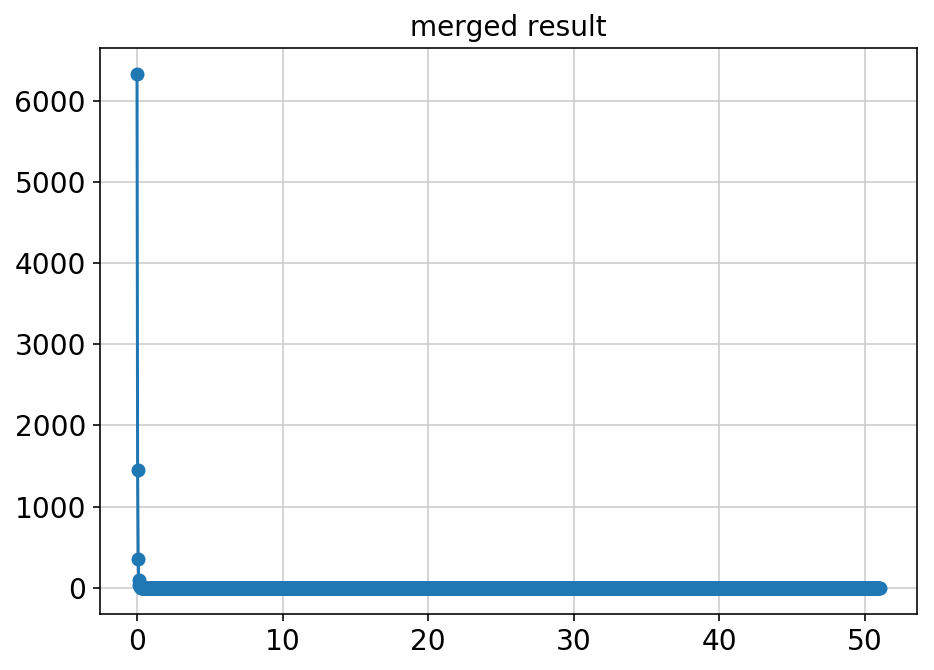

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 0.531%
>0.1: 0.353%
>0.15: 0.266%
>0.2: 0.216%
>0.25: 0.190%
>0.3: 0.174%
>0.35: 0.160%
>0.4: 0.149%


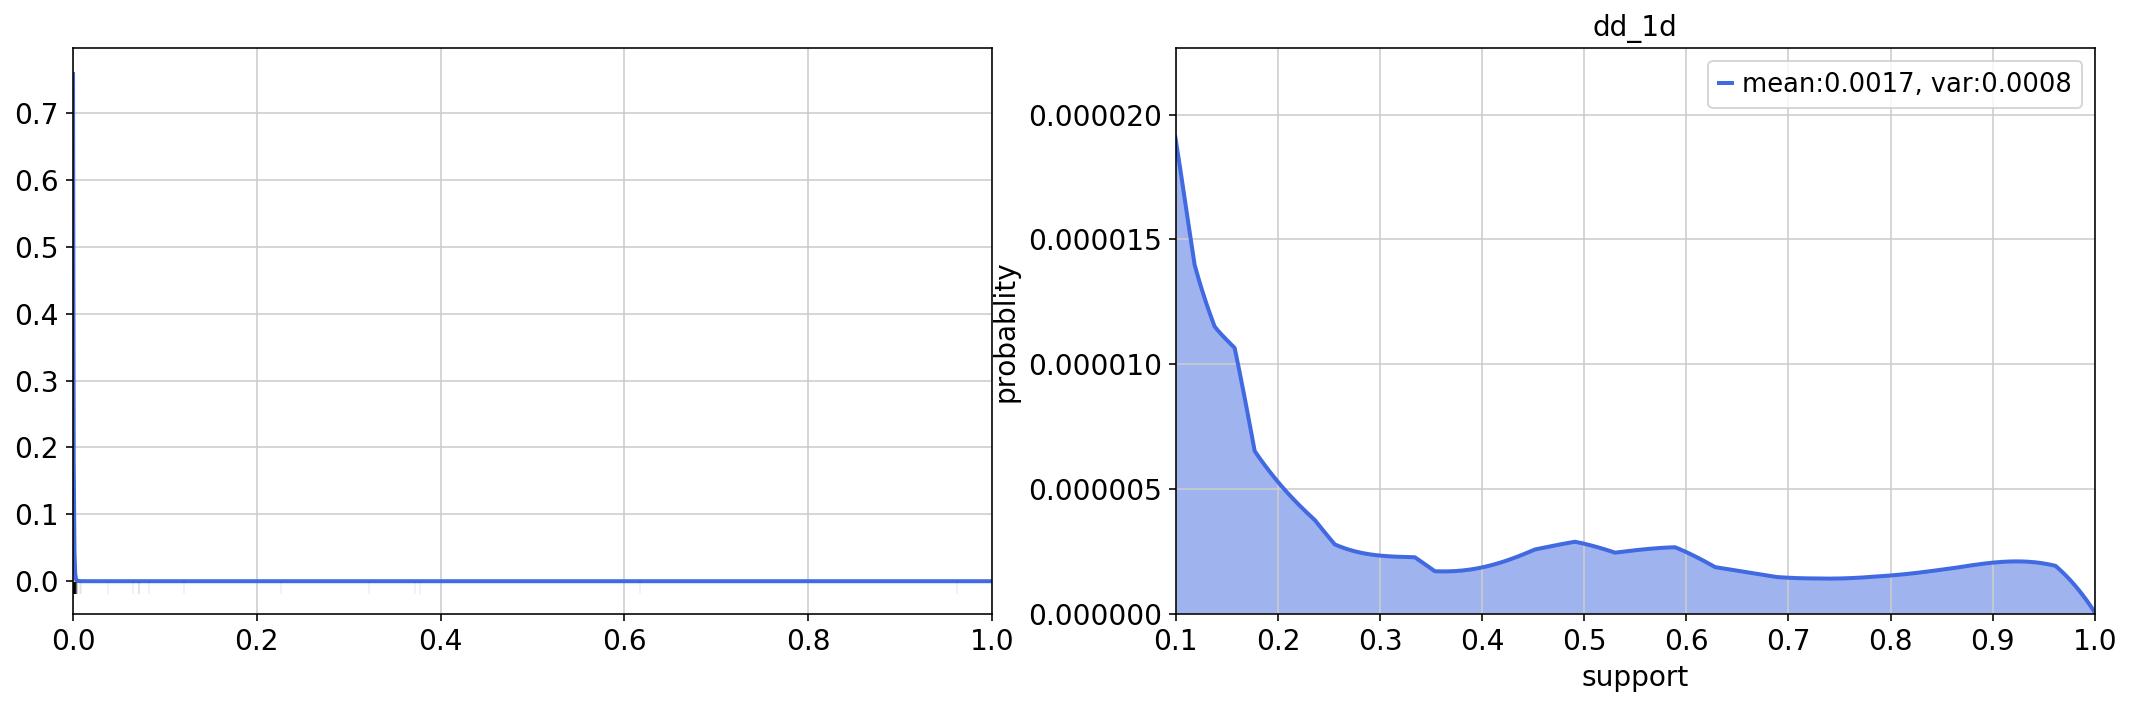

gamma: 51.0
-------------------------------------------------------------------------
NKG7
Average counts per cell = 2.4571053573559243


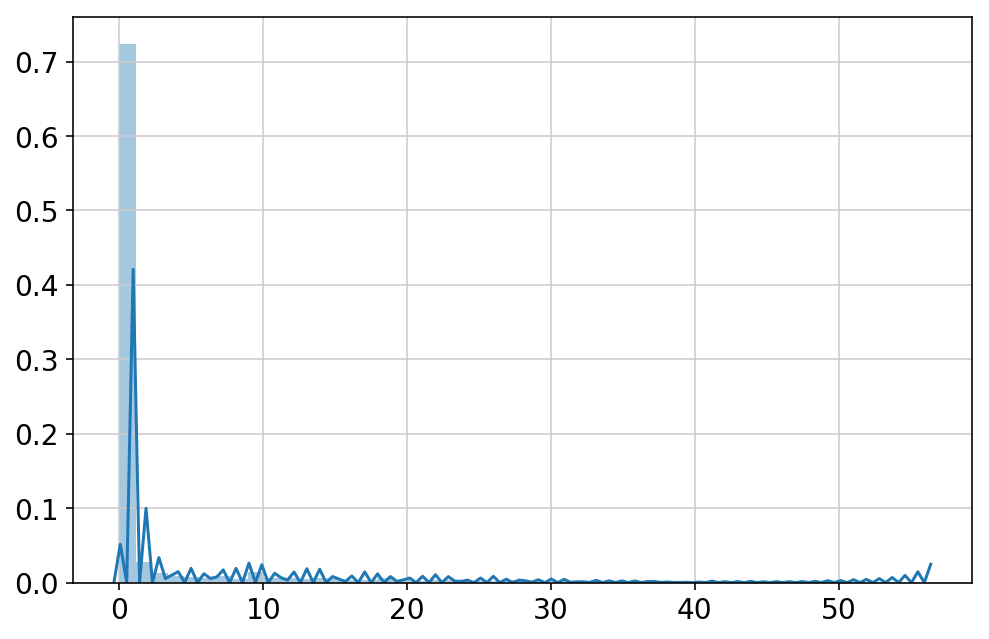

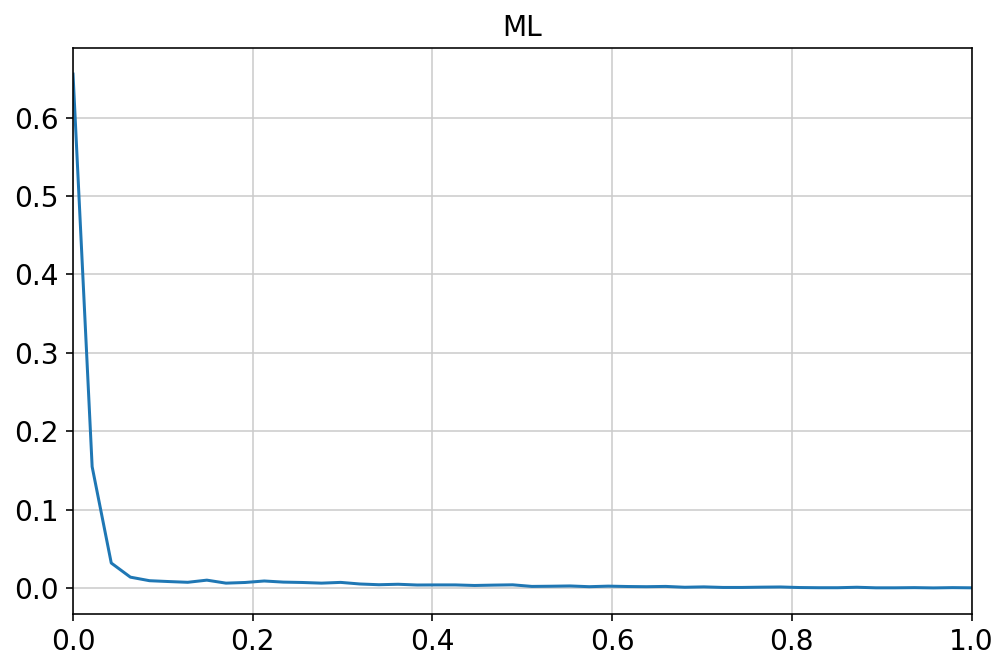

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 47

### debug: proportion separation ### start ###


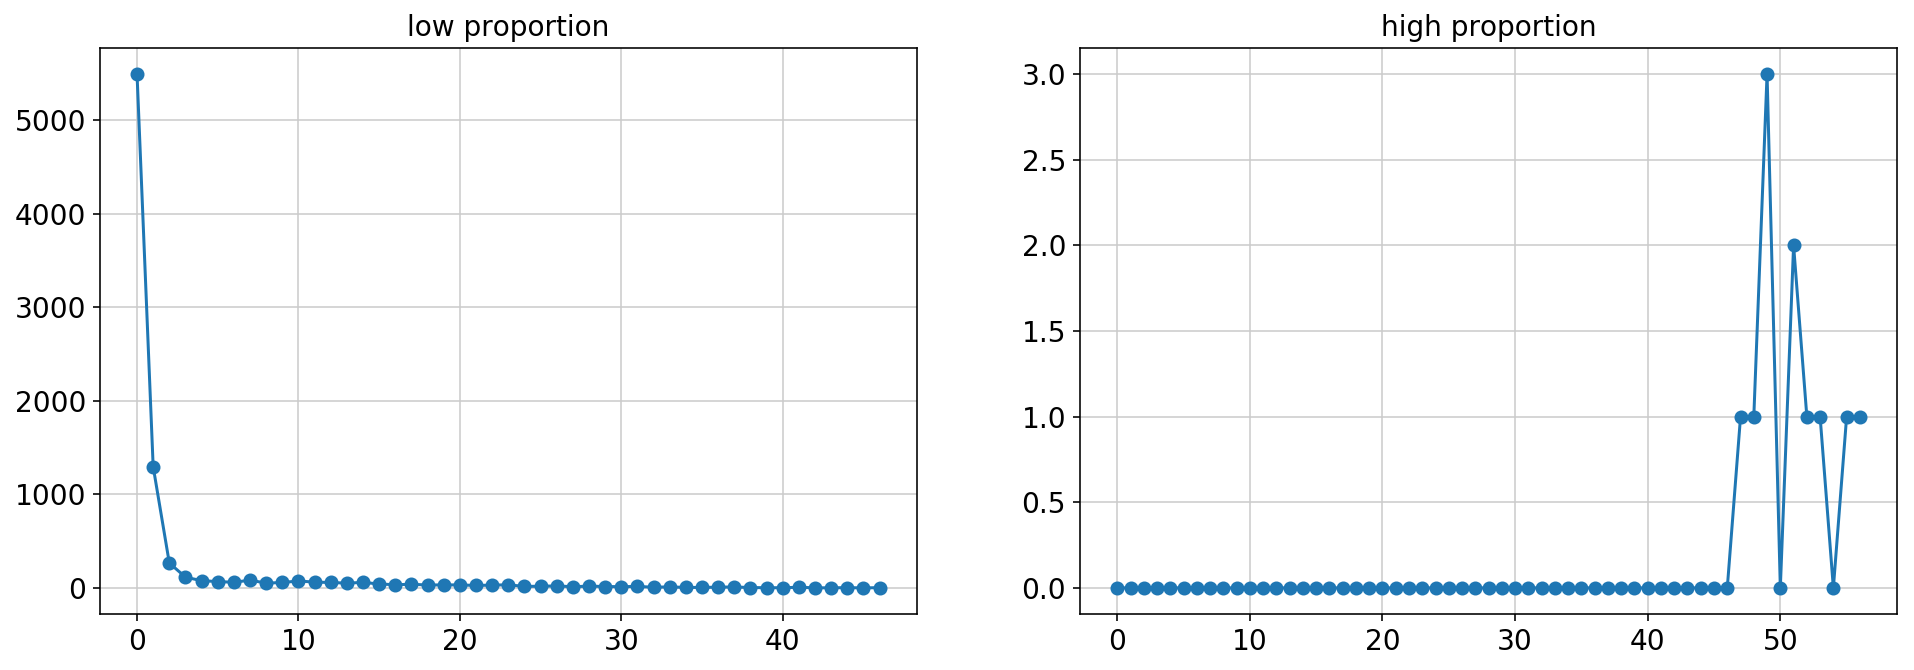

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.816491412209302
-13.569372142807623
8.796313070824624
-0.7031932578449585
-1.3403730769745437
Close-form gradients
[  6.81649402 -13.569364     8.79632104  -0.70318132  -1.34036975]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.539705920631779, reg:0.002177927399611991
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  3.83692527   5.87941113   4.94149314  -3.31422182 -11.5369341 ]
gamma:47


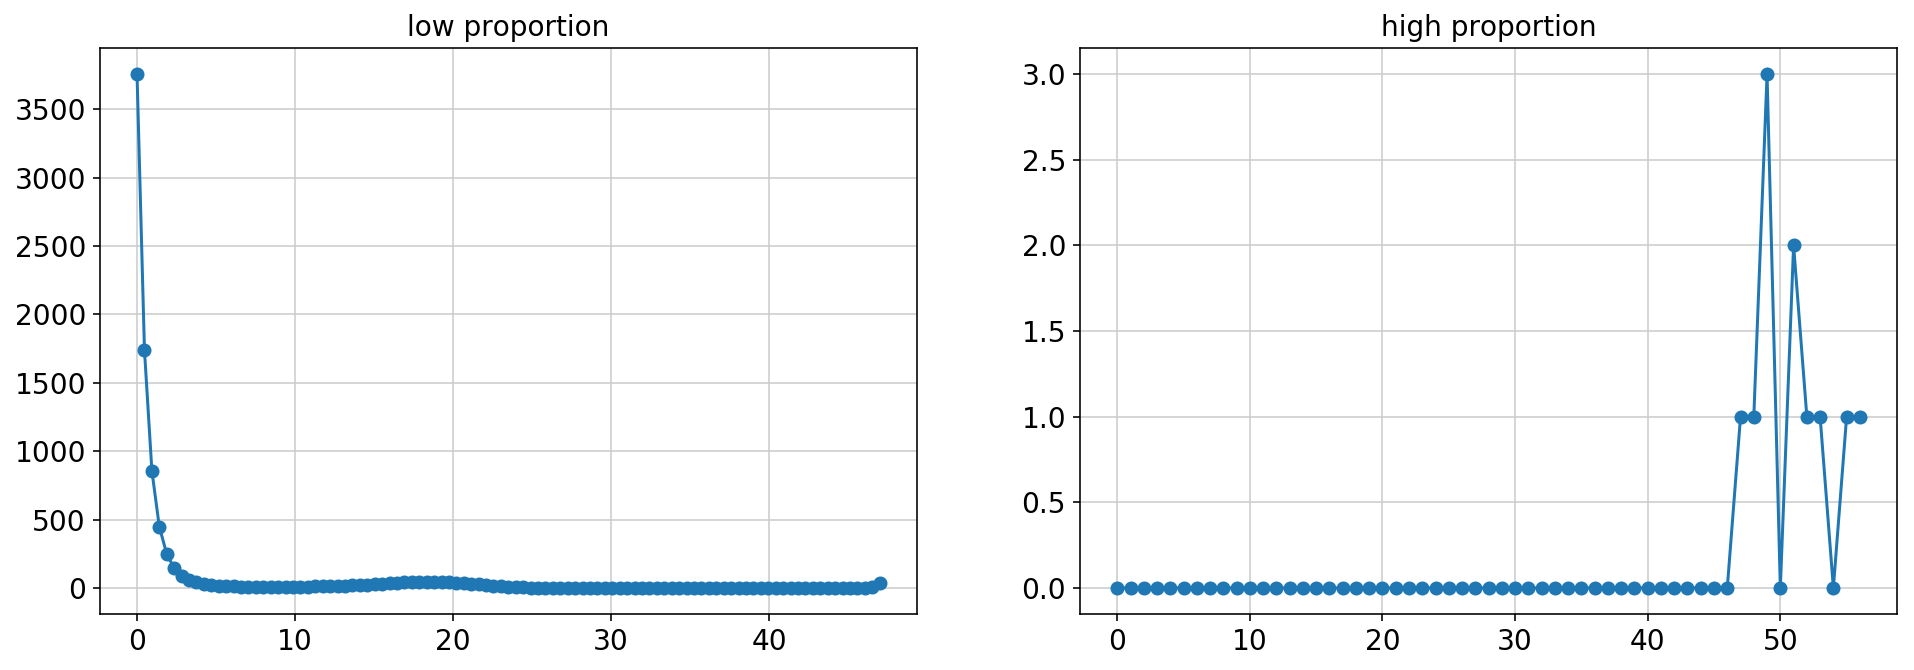

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:56.0


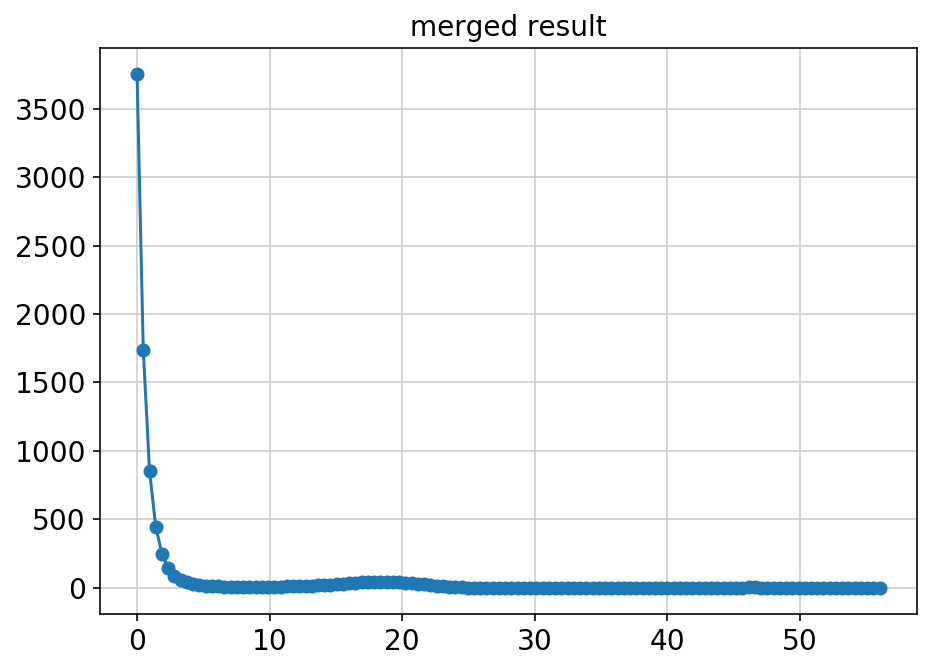

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 14.16%
>0.1: 11.14%
>0.15: 10.43%
>0.2: 9.836%
>0.25: 8.804%
>0.3: 6.701%
>0.35: 3.540%
>0.4: 1.239%


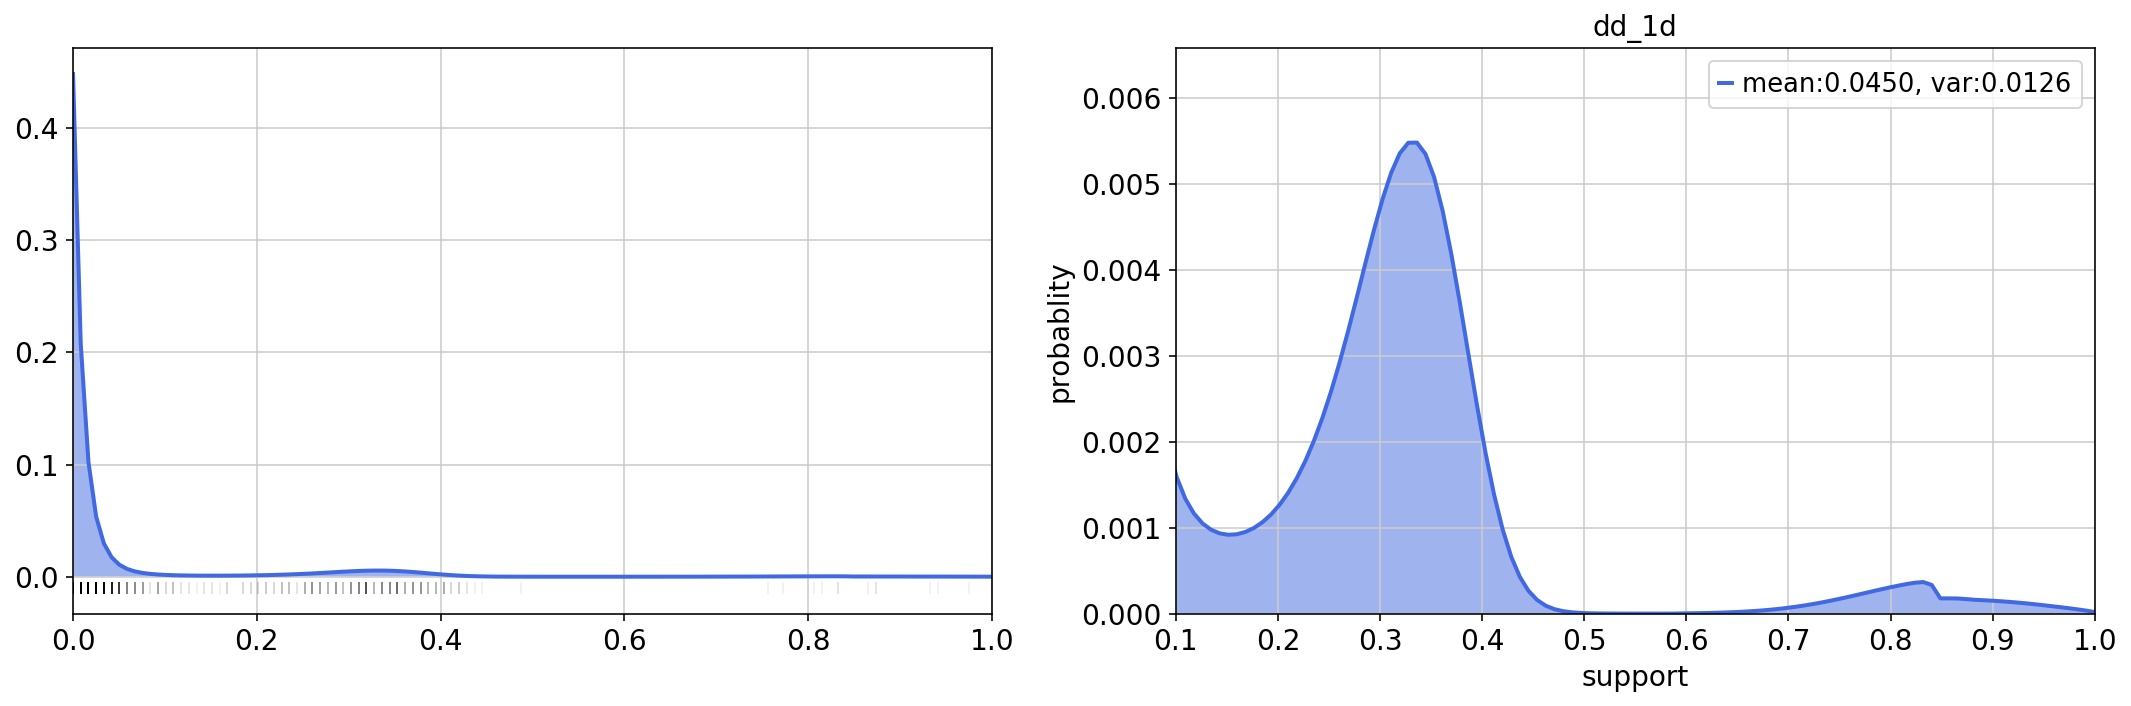

gamma: 56.0
-------------------------------------------------------------------------
CST3
Average counts per cell = 7.001789762558167


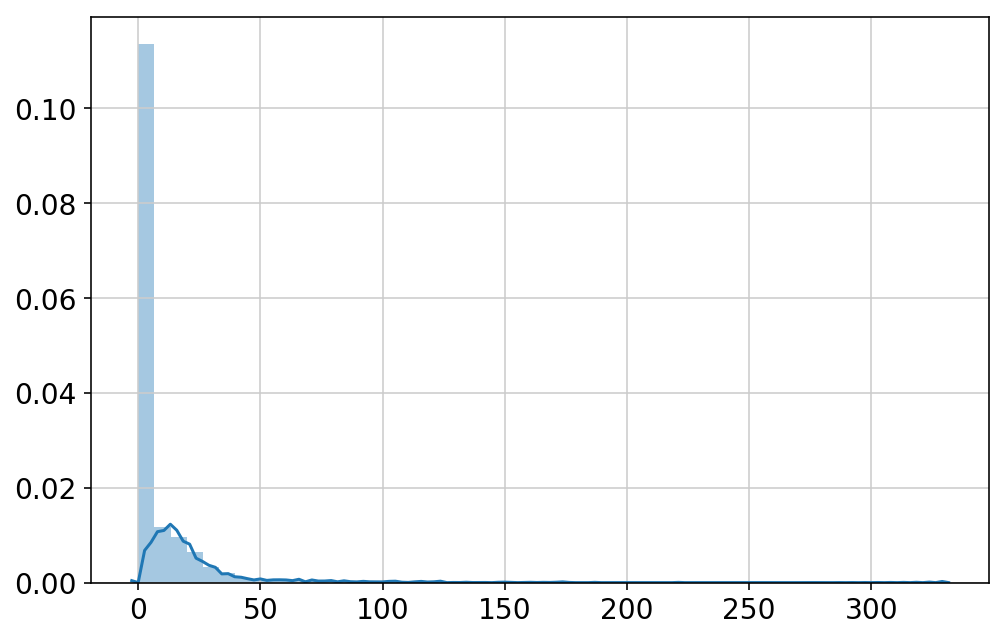

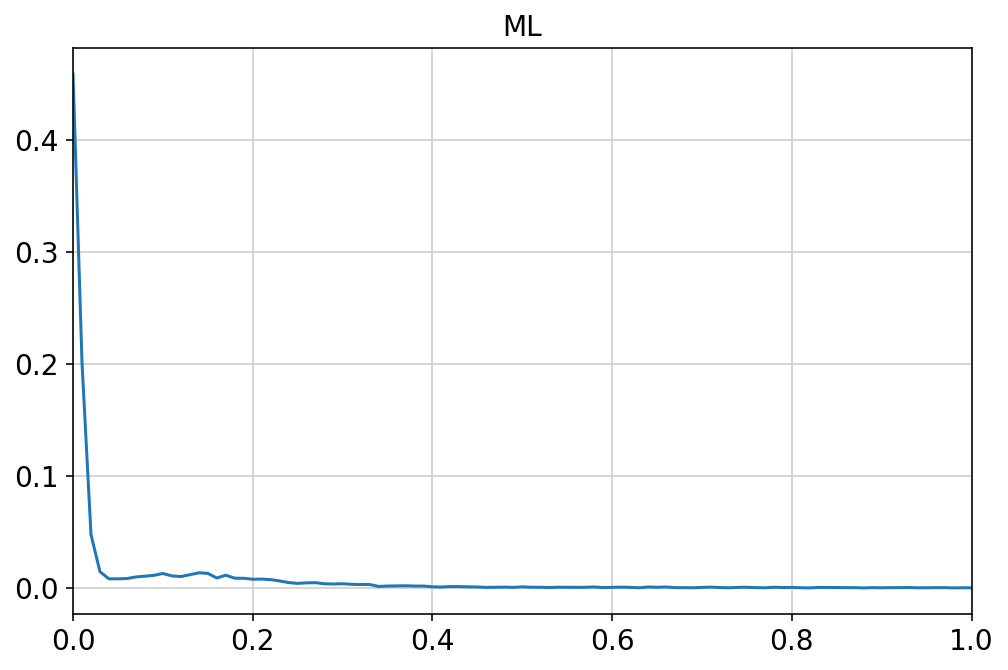

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


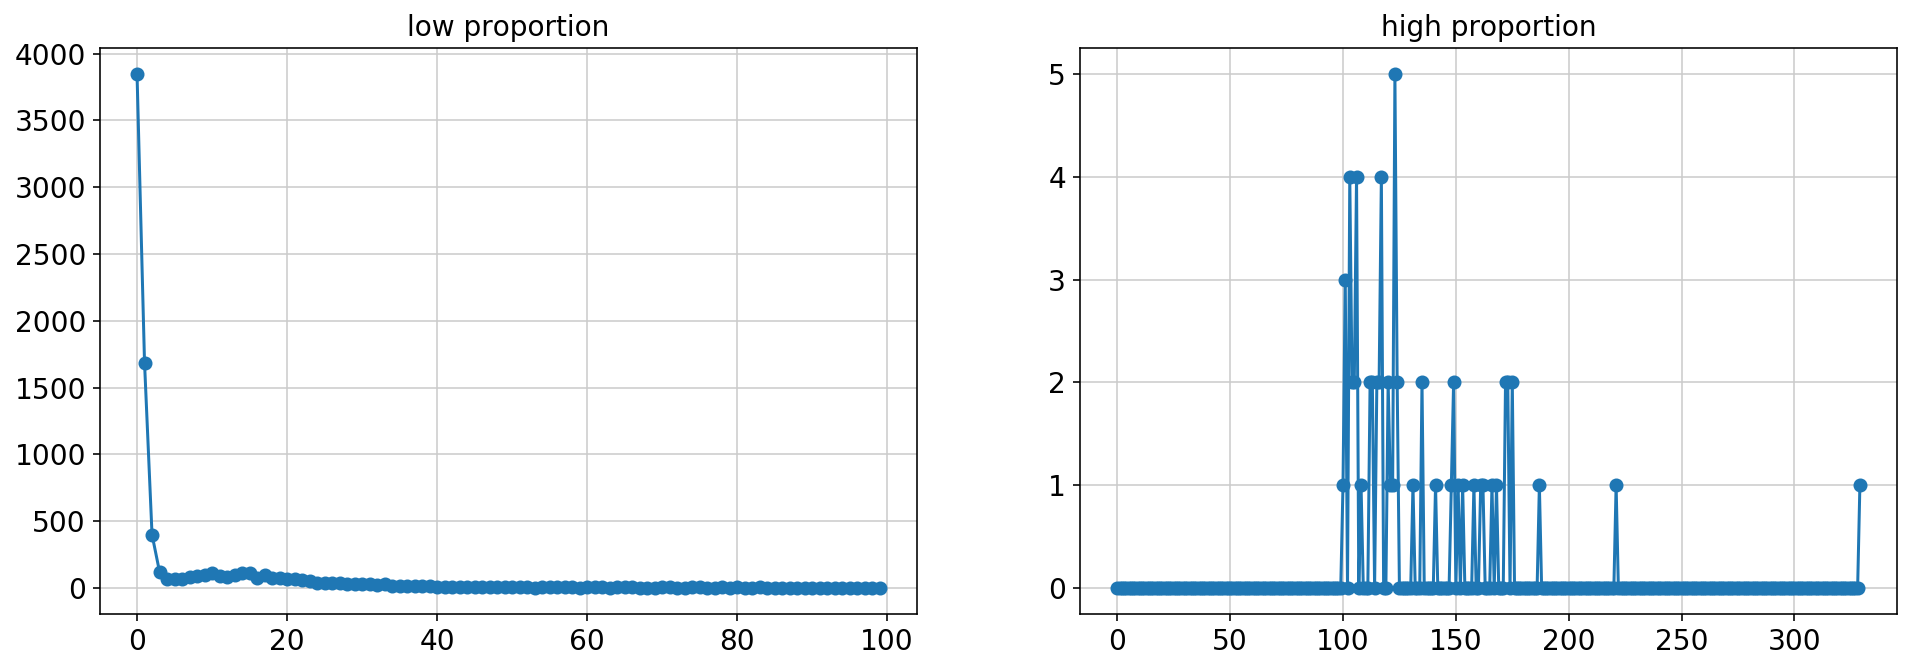

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
6.727438768727723
-13.361024493896423
8.647671902117793
-0.6724184800077637
-1.3418065565318216
Close-form gradients
[  6.72744183 -13.36101378   8.64768151  -0.67240635  -1.34180322]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.4555497898039667, reg:0.005347625380124079
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  8.76400075   9.32087886   5.63329599  -6.47088727 -17.24730821]
gamma:100


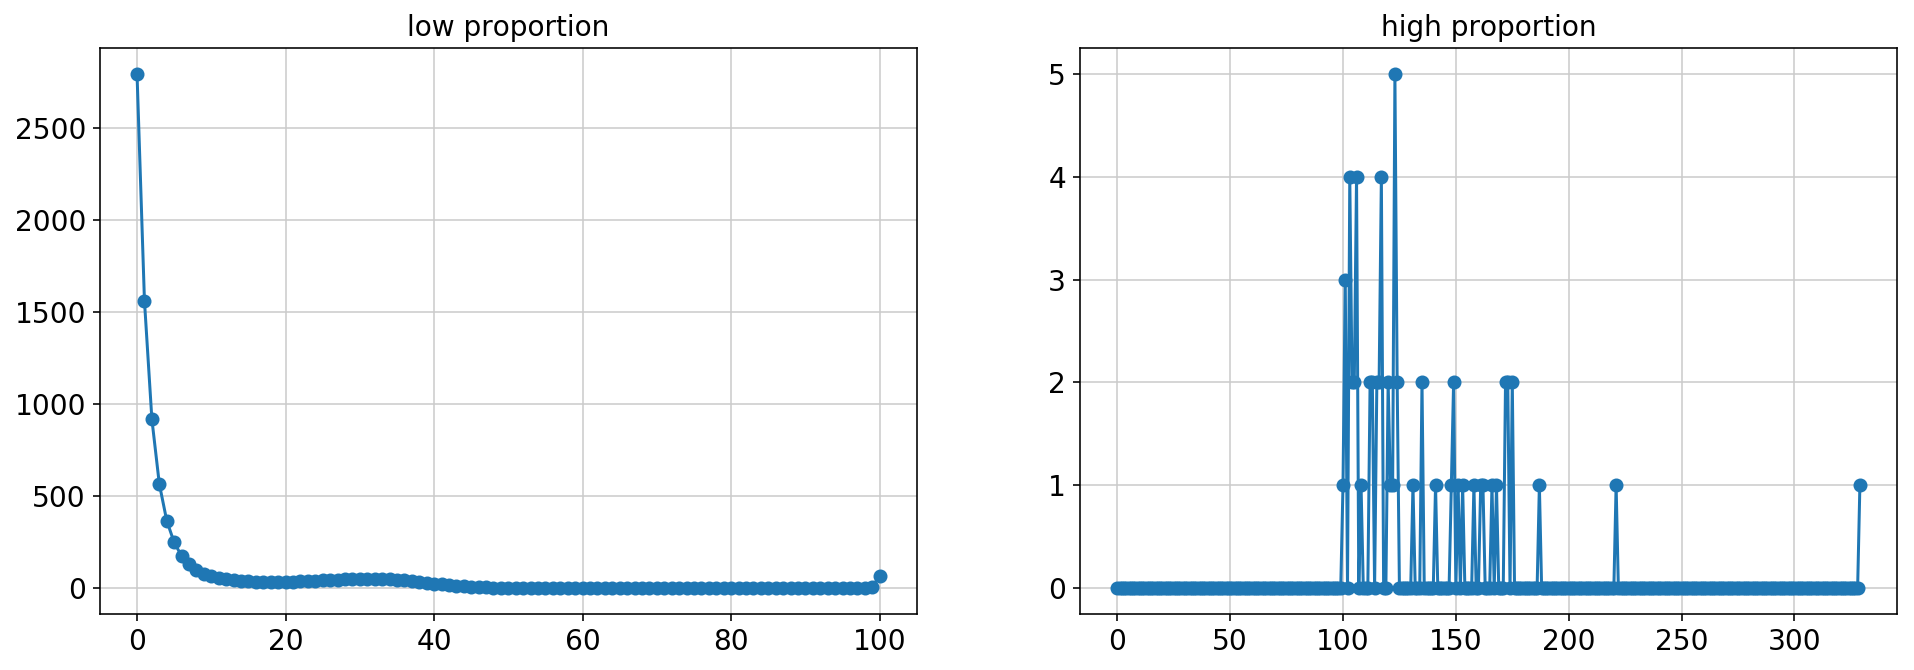

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:329.0


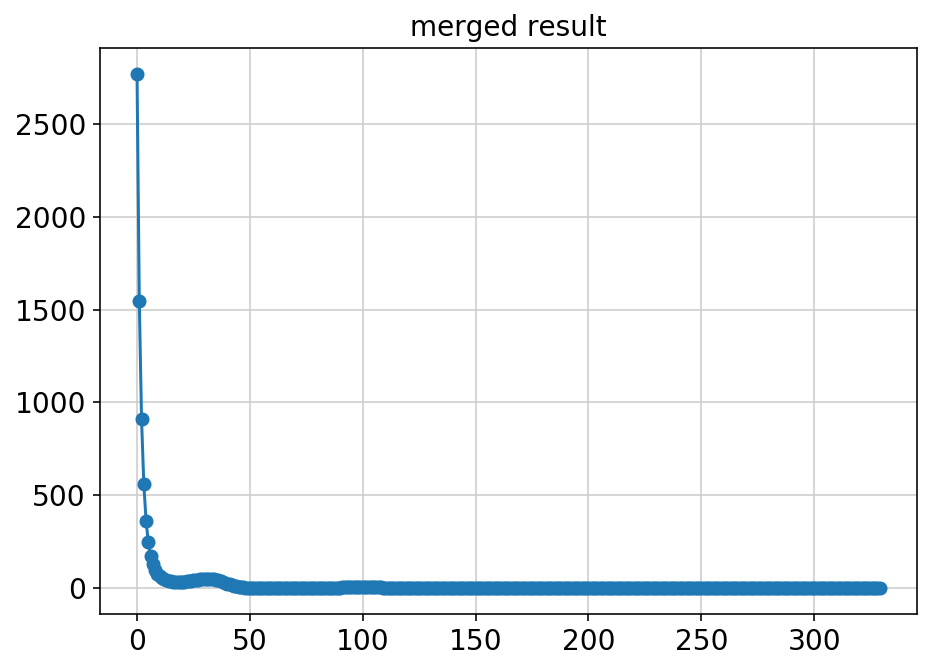

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 13.73%
>0.1: 6.034%
>0.15: 1.613%
>0.2: 1.602%
>0.25: 1.599%
>0.3: 1.101%
>0.35: 0.500%
>0.4: 0.291%


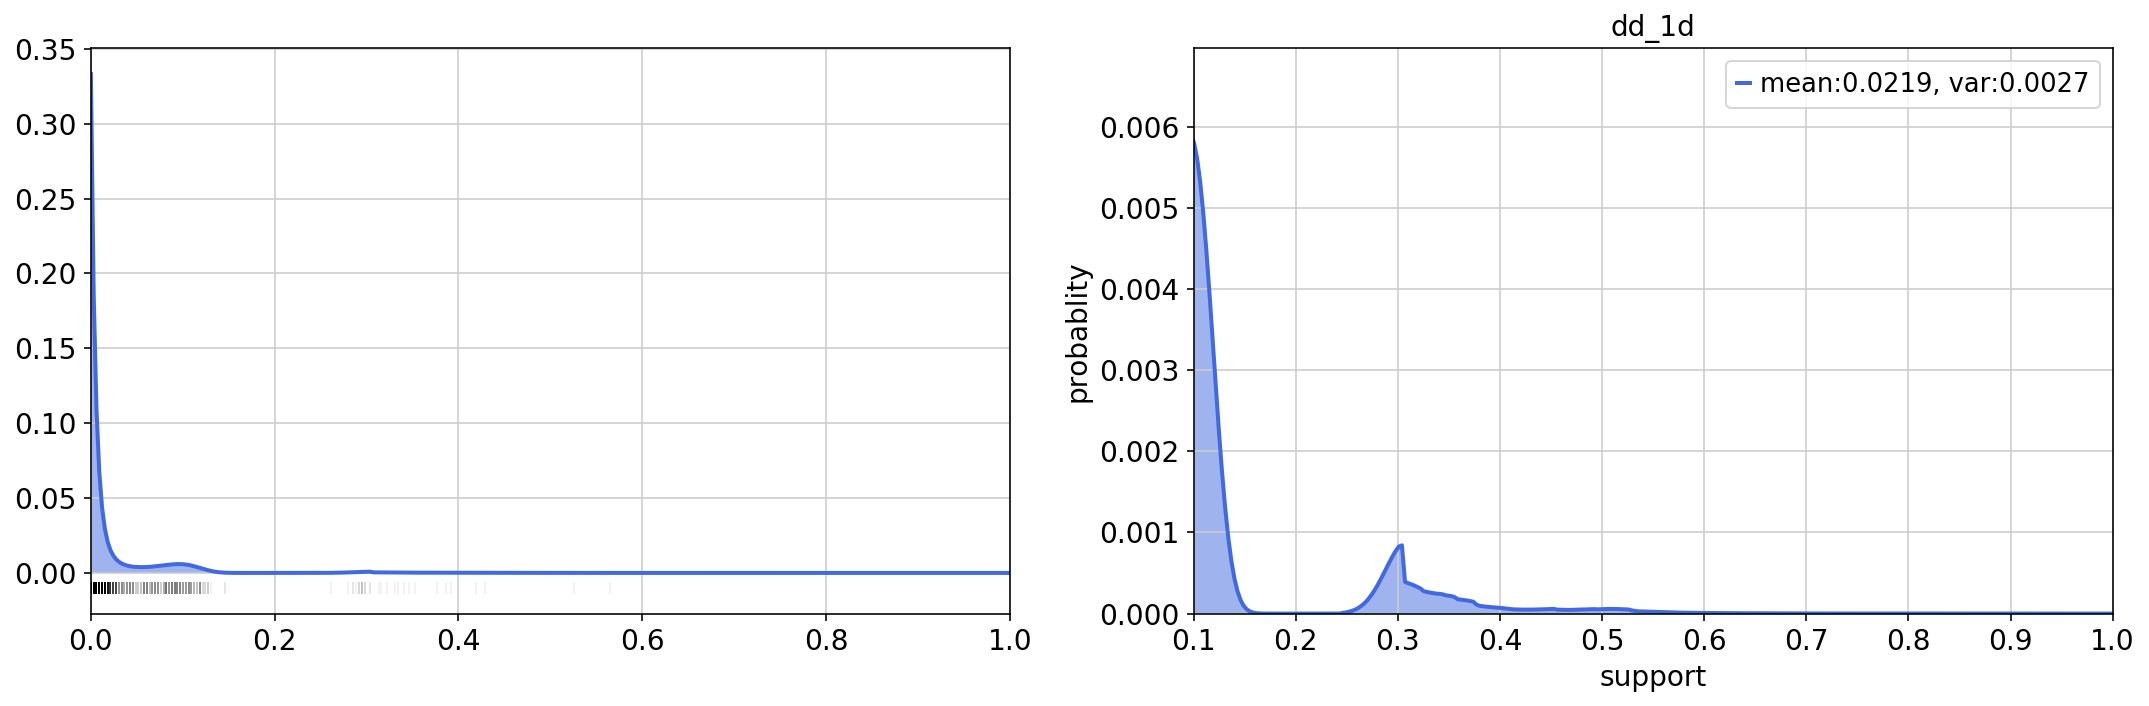

gamma: 329.0
-------------------------------------------------------------------------
CCR7
Average counts per cell = 0.4827586206896552


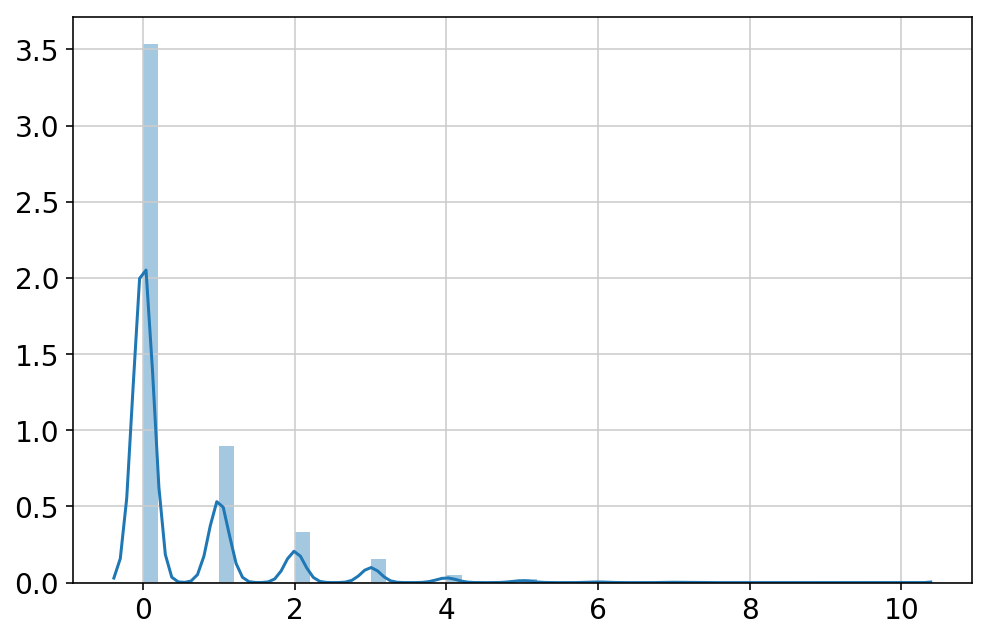

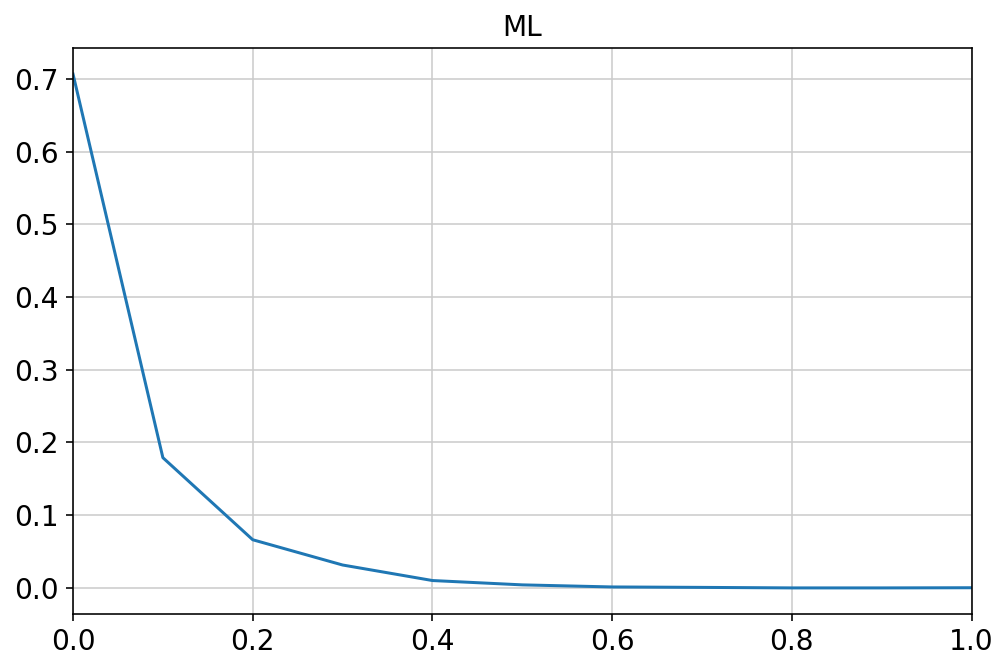

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 10

### debug: proportion separation ### start ###


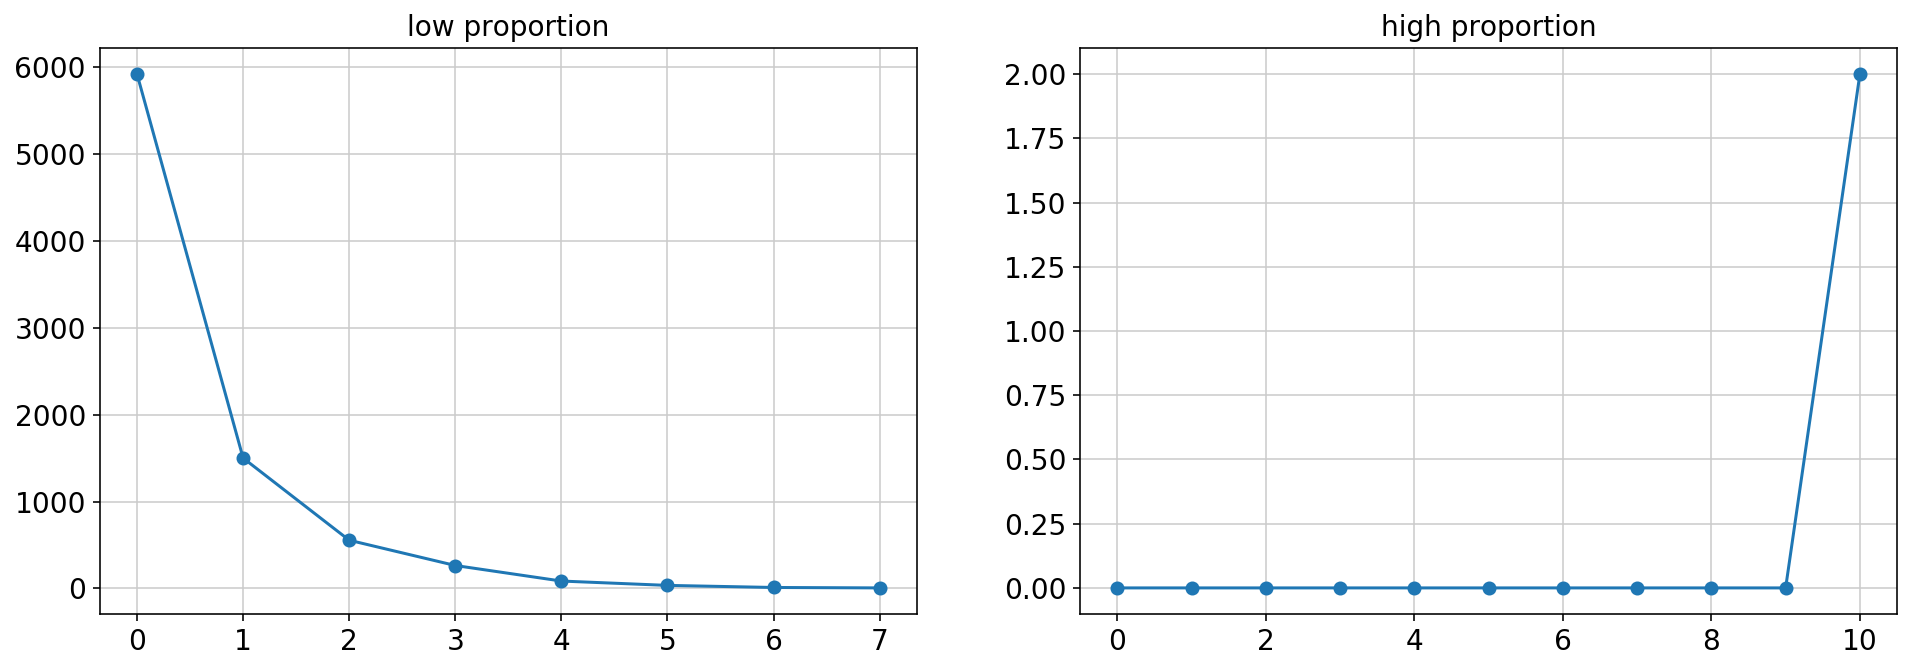

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
4.033410695214457
-7.274071717855435
3.9566452625372506
0.626430412431489
-1.3425191003335613
Close-form gradients
[ 4.0334098  -7.27407989  3.95664426  0.62644163 -1.3425158 ]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.927042617201874, reg:0.00043969282912316915
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 3.66228056  2.31528561  0.62113003 -2.06751257 -4.5316692 ]
gamma:10


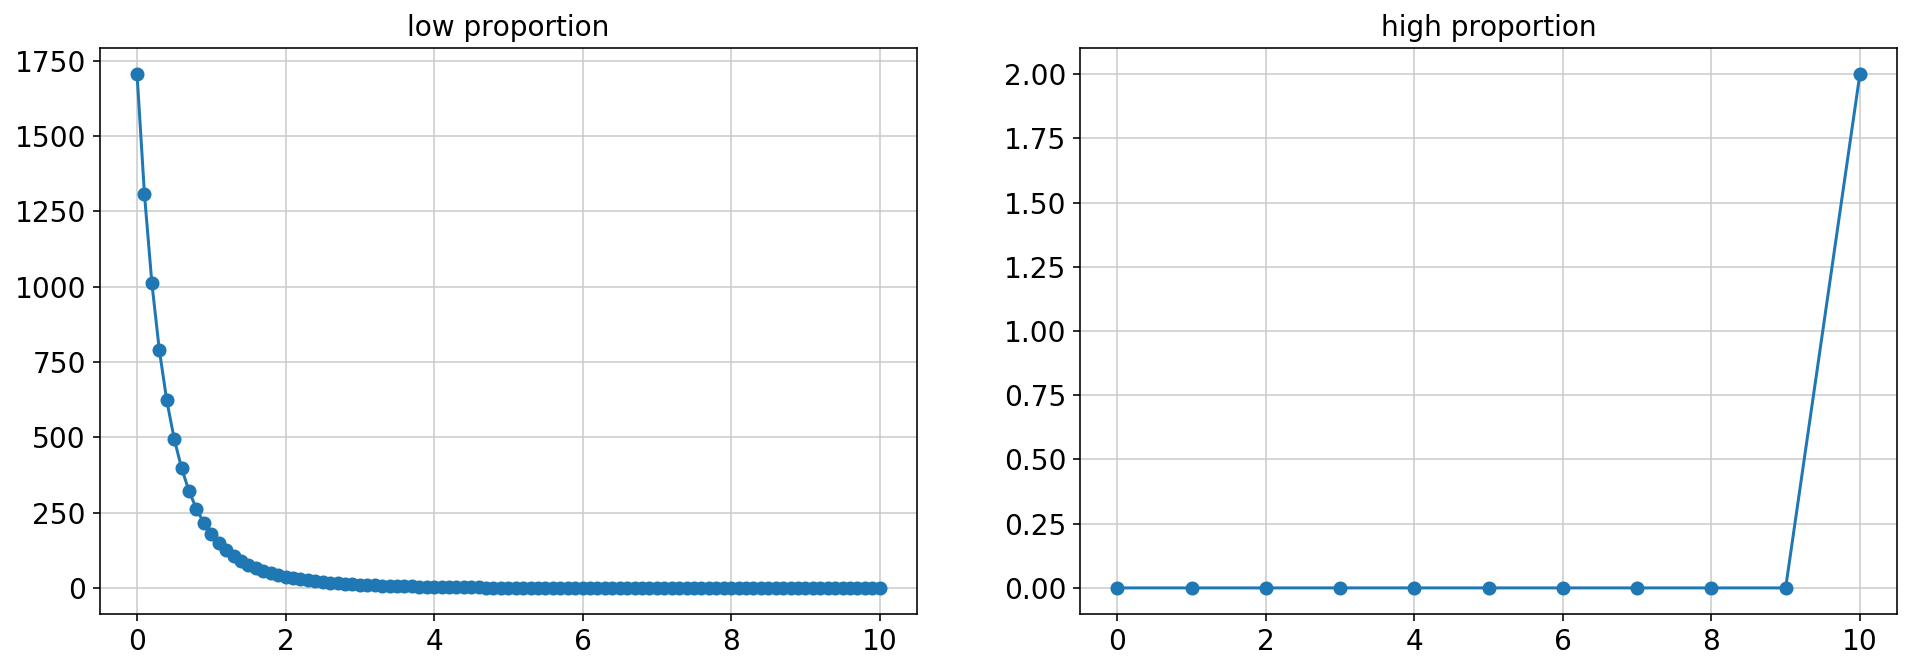

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:10.0


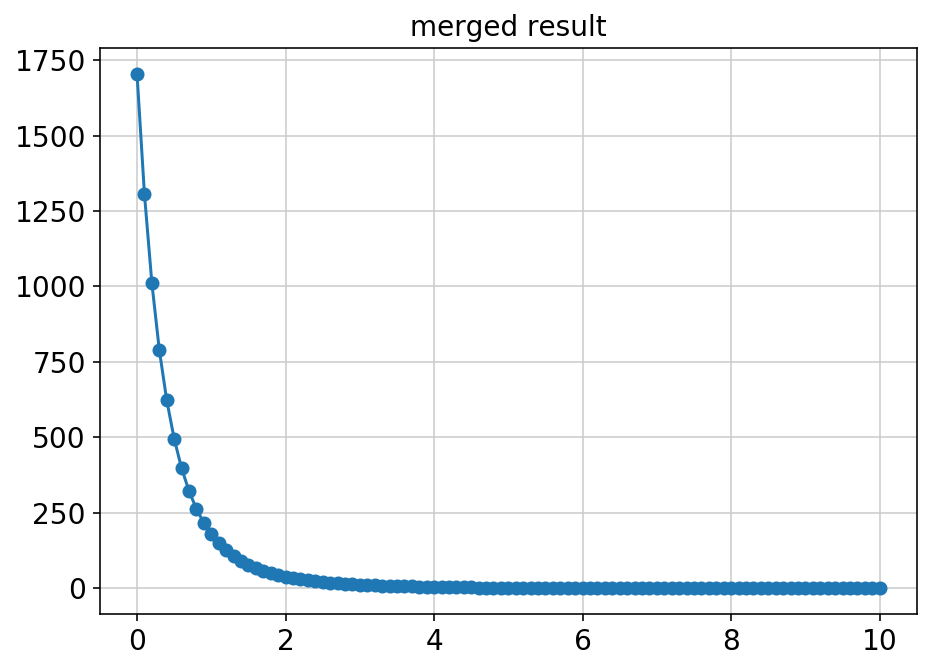

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 29.24%
>0.1: 12.84%
>0.15: 6.360%
>0.2: 3.375%
>0.25: 1.839%
>0.3: 0.993%
>0.35: 0.511%
>0.4: 0.248%


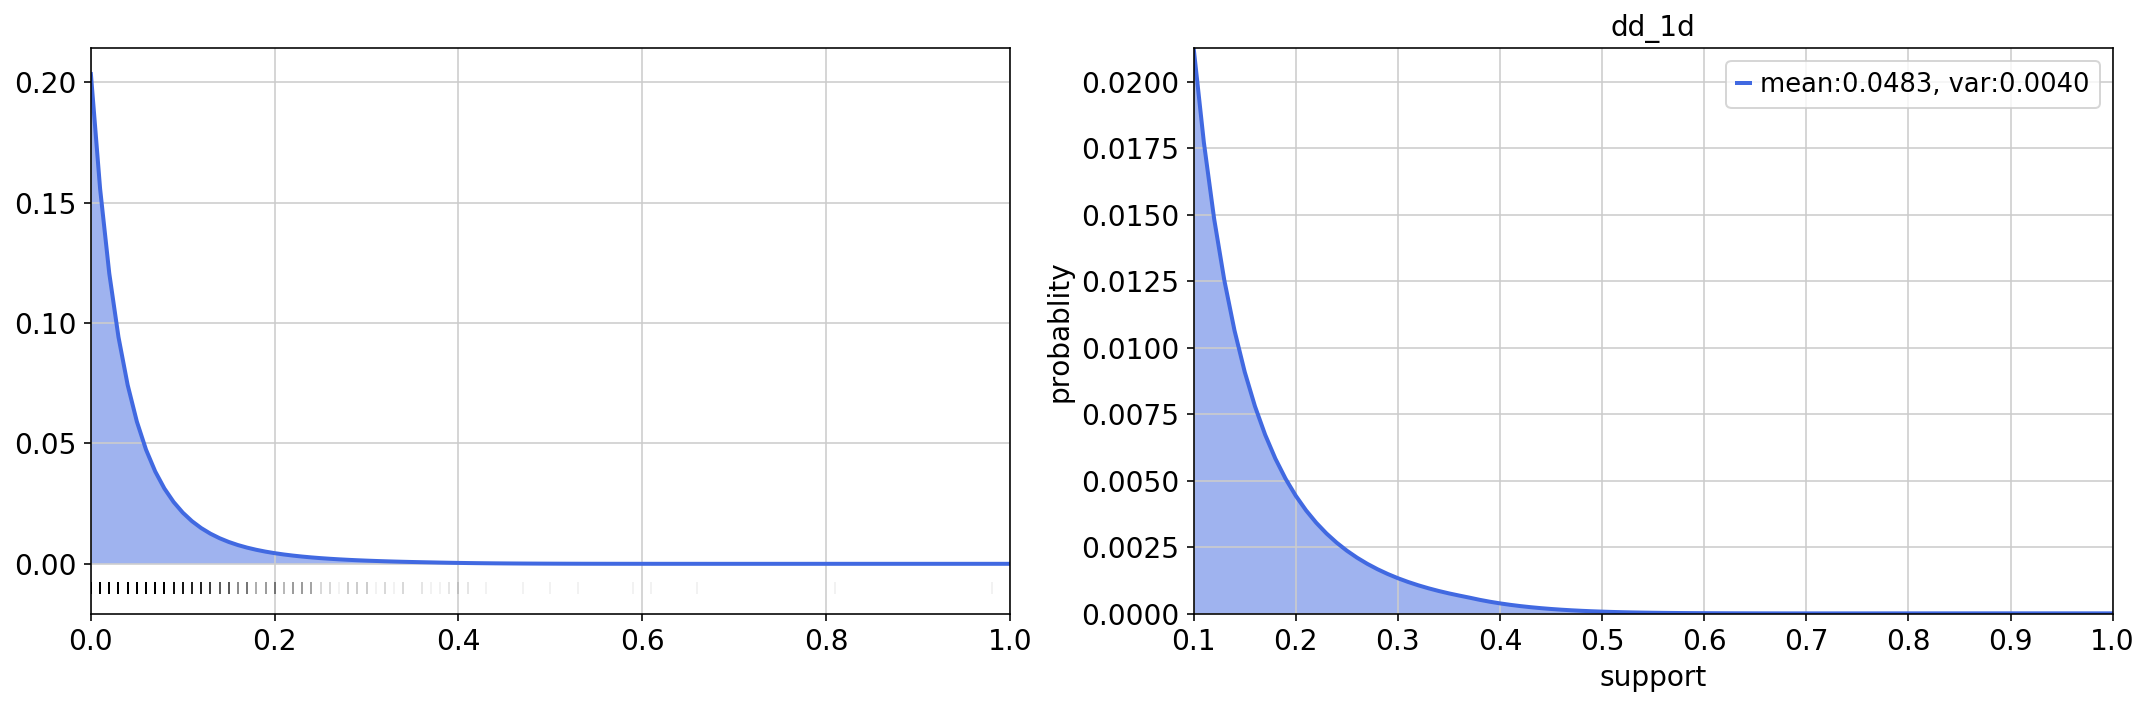

gamma: 10.0
-------------------------------------------------------------------------


In [127]:
for gene in genes:
    Y=np.array(adata[:,gene].X,dtype=int)
    print(gene)
    print("Average counts per cell =",np.sum(Y)/len(Y))
    plt.figure(figsize=[8,5])
    sns.distplot(Y)
    plt.show()
    plt.figure(figsize=[8,5])
    p_hat_ml,ml_info=ml_1d(Y)
    plt.plot(ml_info['x'],p_hat_ml)
    plt.xlim([0,1])
    plt.title('ML')
    plt.show()

    p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
    print("gamma:",dd_info['gamma'])
    print("-------------------------------------------------------------------------")

In [ ]:
def plot_density_1d(p,x):
    M1,M2 = moments(p,x)
    plt.figure(figsize=[8,5])
    plt.plot(x,p,marker='.',lw=2,markersize=0,color="royalblue",label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1.05*np.max(p)])
    
    
#     plt.bar(x,p,label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    

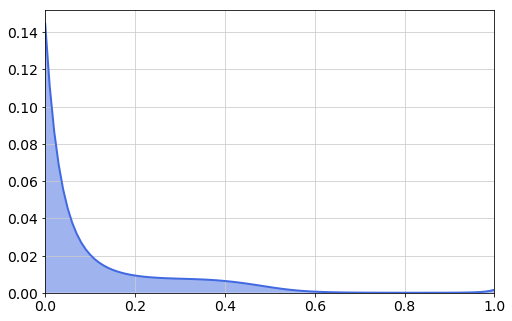

In [218]:
plot_density_1d(p_hat,dd_info['x'])